## 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile
import warnings
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## 2. EDA

### 2.1 Load Dataset and distinguish attributes

In [2]:
# load data
zf = zipfile.ZipFile('Data/Company_Bankruptcy.zip') 
cmp_bankrupt_df = pd.read_csv(zf.open('Company_Bankruptcy.csv'))

In [3]:
# get shape
cmp_bankrupt_df.shape

(6819, 96)

In [4]:
# set df display options
pd.options.display.max_rows=cmp_bankrupt_df.shape[0]
pd.options.display.max_columns=cmp_bankrupt_df.shape[1]

In [5]:
# check first rows
cmp_bankrupt_df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [6]:
# check columns
cmp_bankrupt_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
# basic statistics
cmp_bankrupt_df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

#### Conclusion
It seems there are only numeric values contained in the data. 3 of the columns contain yes/no classification information (int64 columns) the rest seem to be various KPIs given as continuous values (float64 columns). Of the columns with continuous values most are given as percentage values and a few seem to be given as values in local currency.
Number of actually bankrupt companies in the datasets is relatively low (only roughly 3%), should be kept in mind for later.

### 2.2 Check for missing values and duplicates

In [8]:
# check for null entries
cmp_bankrupt_df.isnull().values.any()

False

In [9]:
# check for duplicated rows
cmp_bankrupt_df.duplicated().any()

False

#### Conclusion
No missing values and no duplicate rows included in the data. Data is completely numeric so cannot contain strange characters representing missing data. Nothing to do here.

### 2.3 Checking Data Distributions

#### 2.3.1 Univariate Analysis

In [10]:
# get column types
float_cols = cmp_bankrupt_df.select_dtypes(include='float64').columns
int_cols = cmp_bankrupt_df.select_dtypes(include='int64').columns

In [11]:
# separate float cols by range
float_min_max_vals_df = cmp_bankrupt_df[float_cols].aggregate(['min','max'], axis = 0).T
range_condition = (float_min_max_vals_df['min'] >= 0.0) & (float_min_max_vals_df['max'] <= 1.0)
unit_range_float_cols = float_min_max_vals_df[range_condition].index
other_range_float_cols = float_min_max_vals_df[~range_condition].index

In [12]:
# show number of cols by classification
print(f'number of int cols: {int_cols.size}')
print(f'number of unit range float cols: {unit_range_float_cols.size}')
print(f'number of other range float cols: {other_range_float_cols.size}')

number of int cols: 3
number of unit range float cols: 69
number of other range float cols: 24


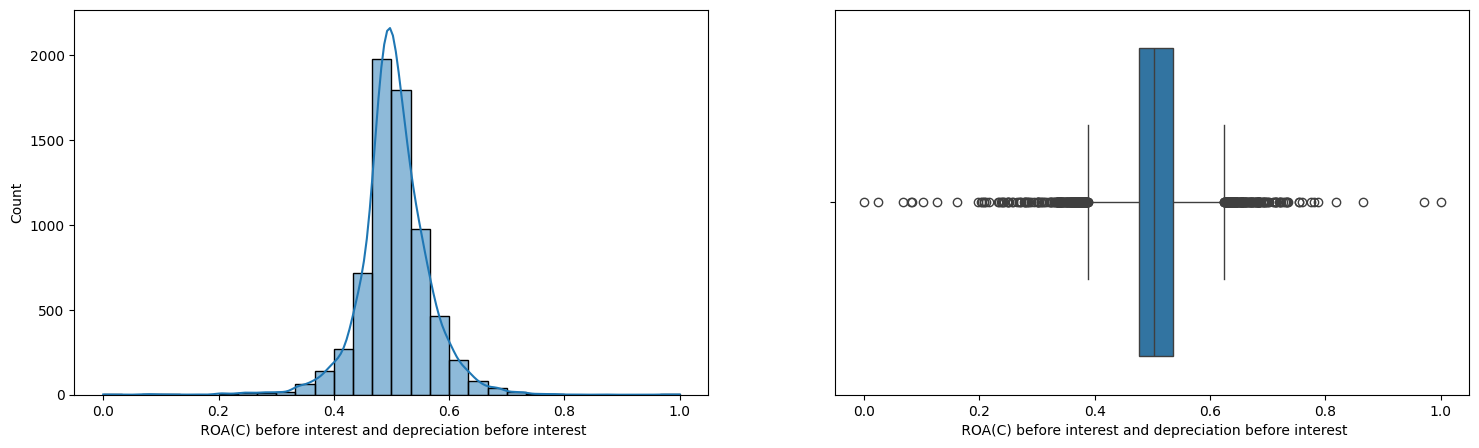

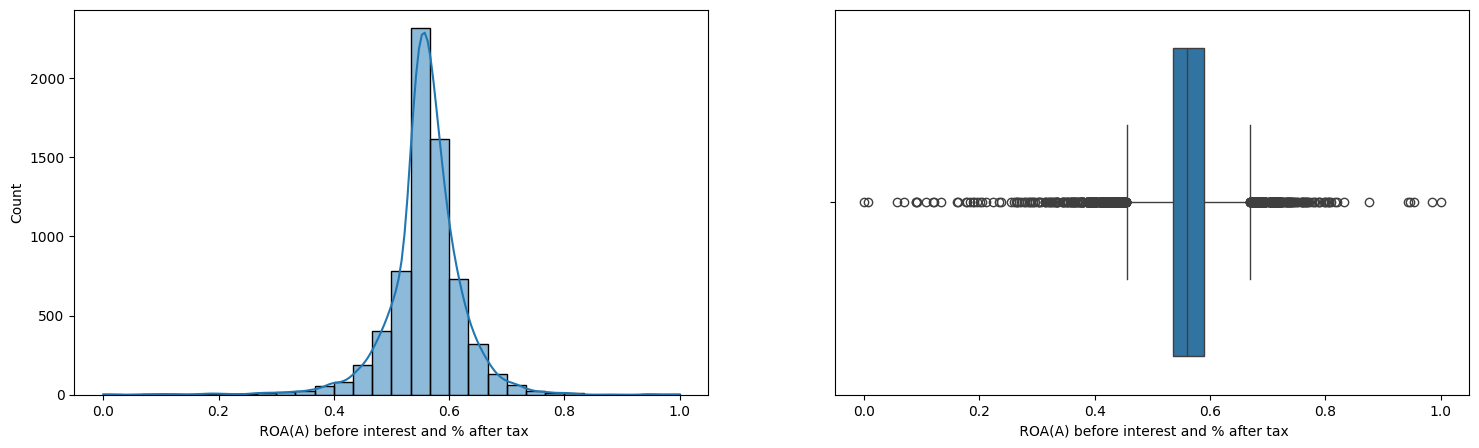

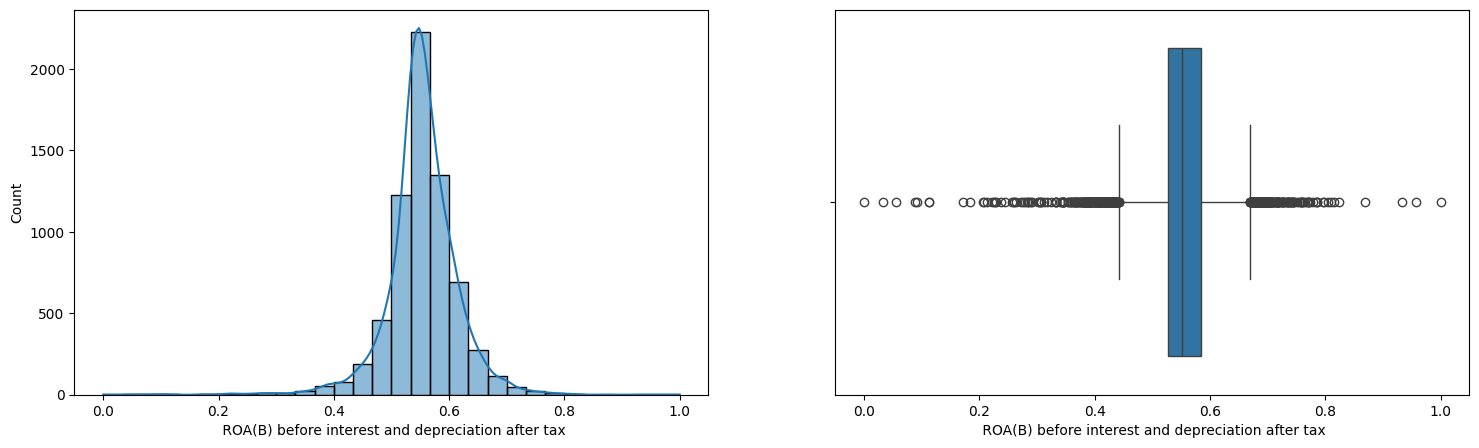

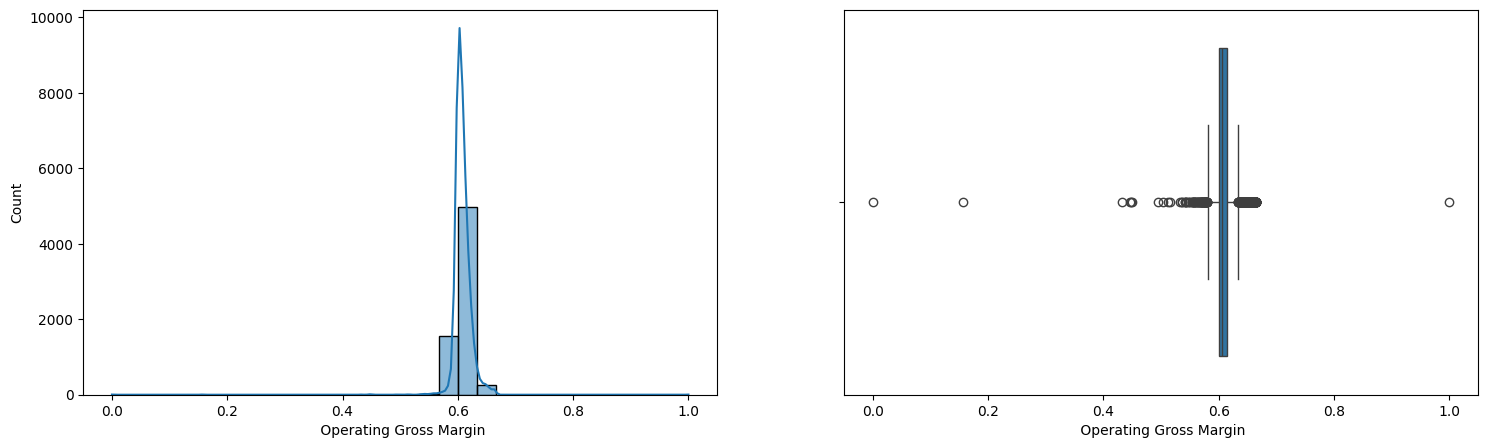

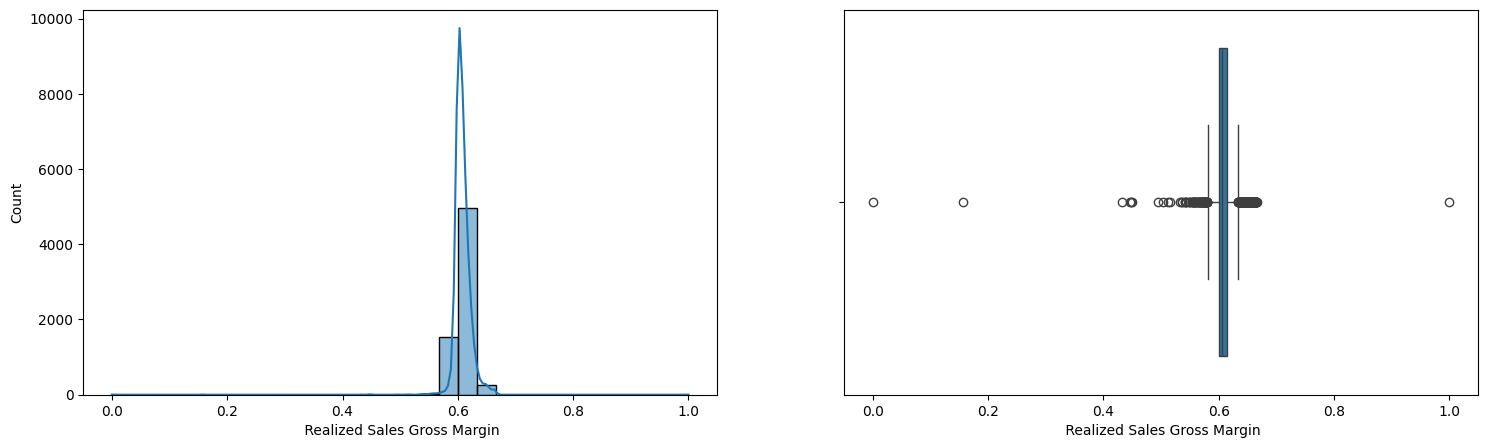

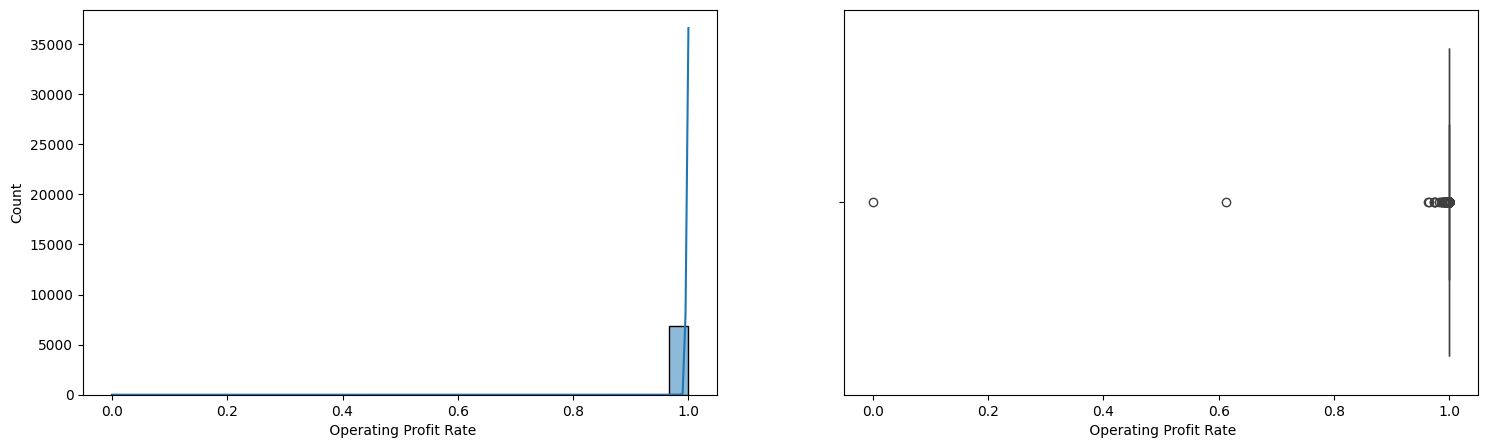

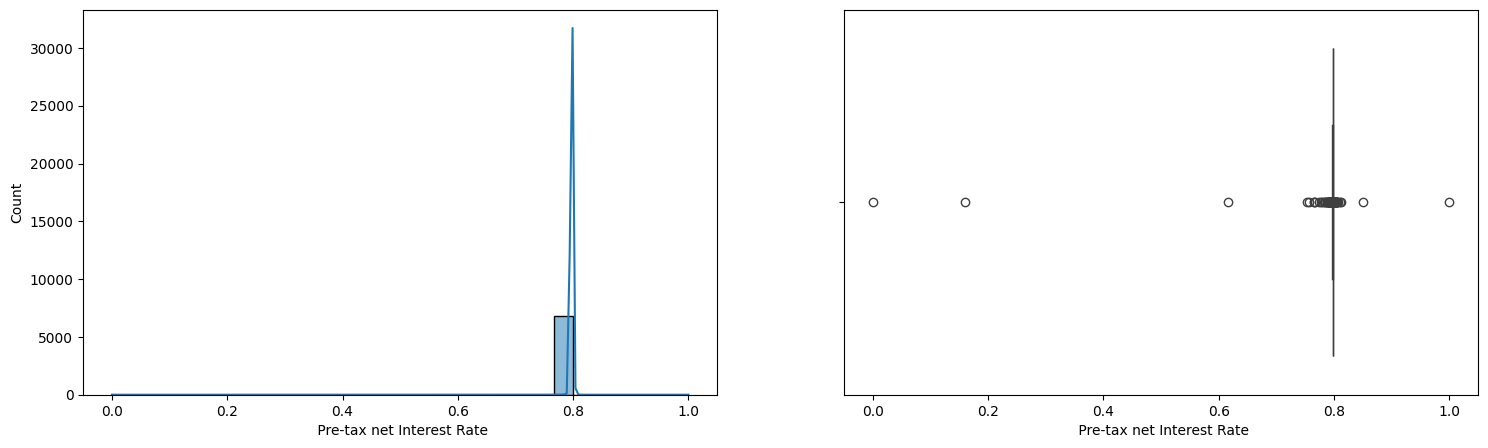

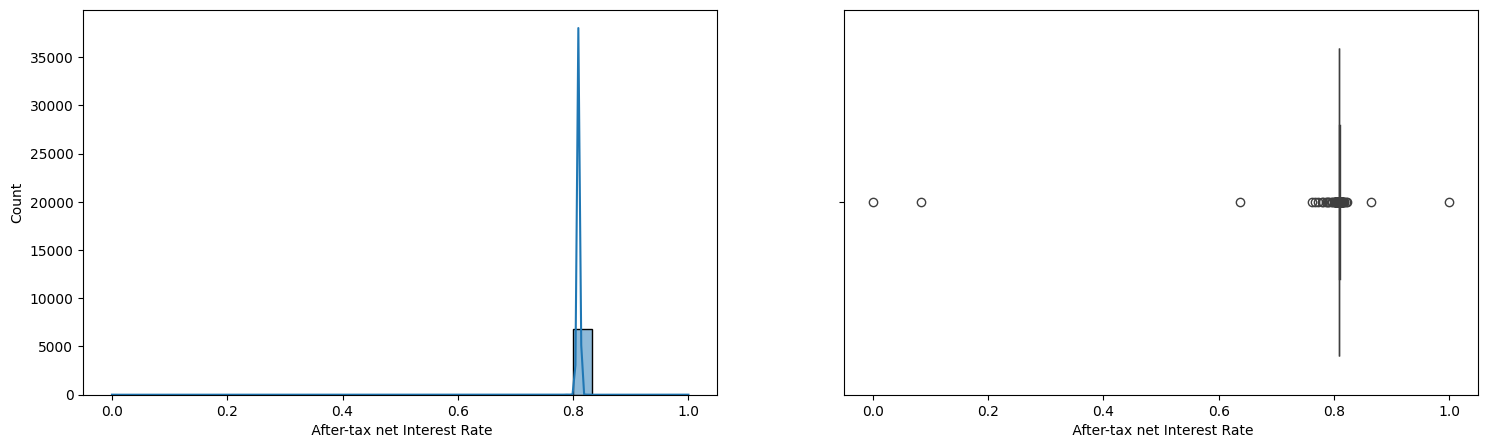

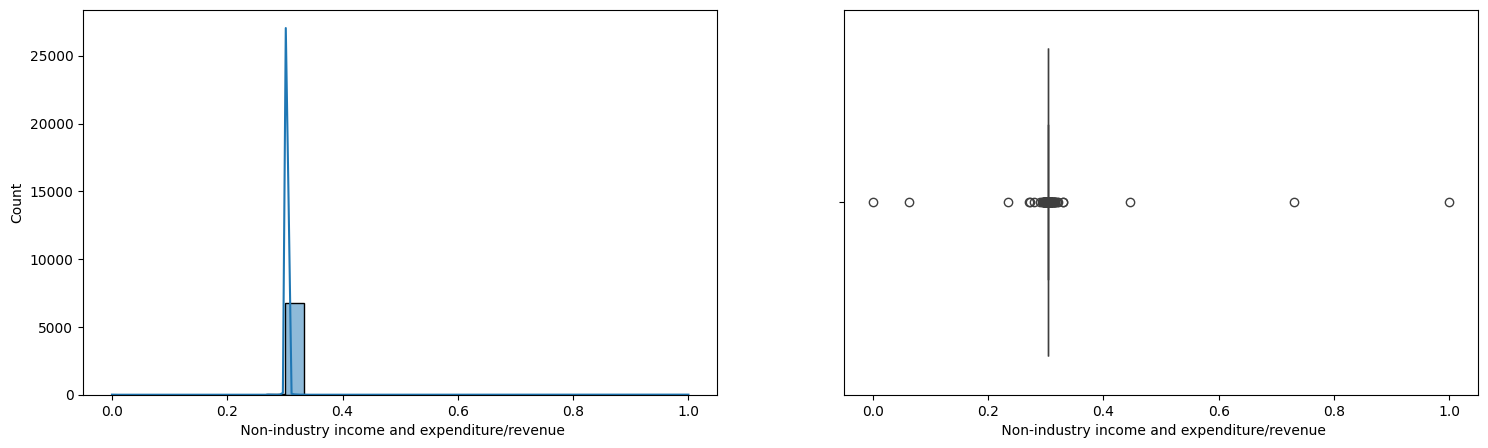

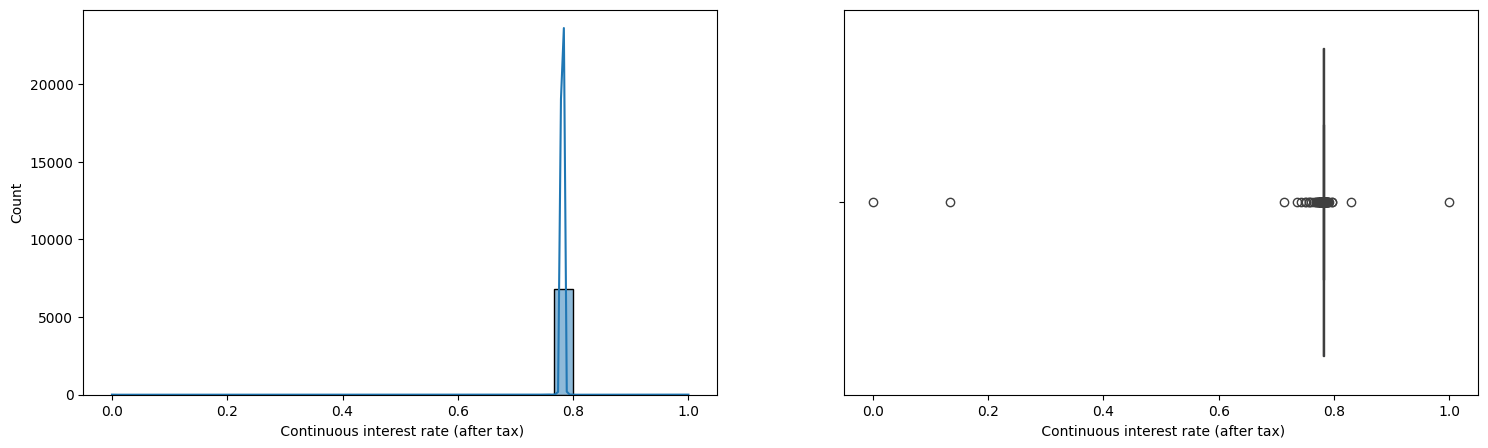

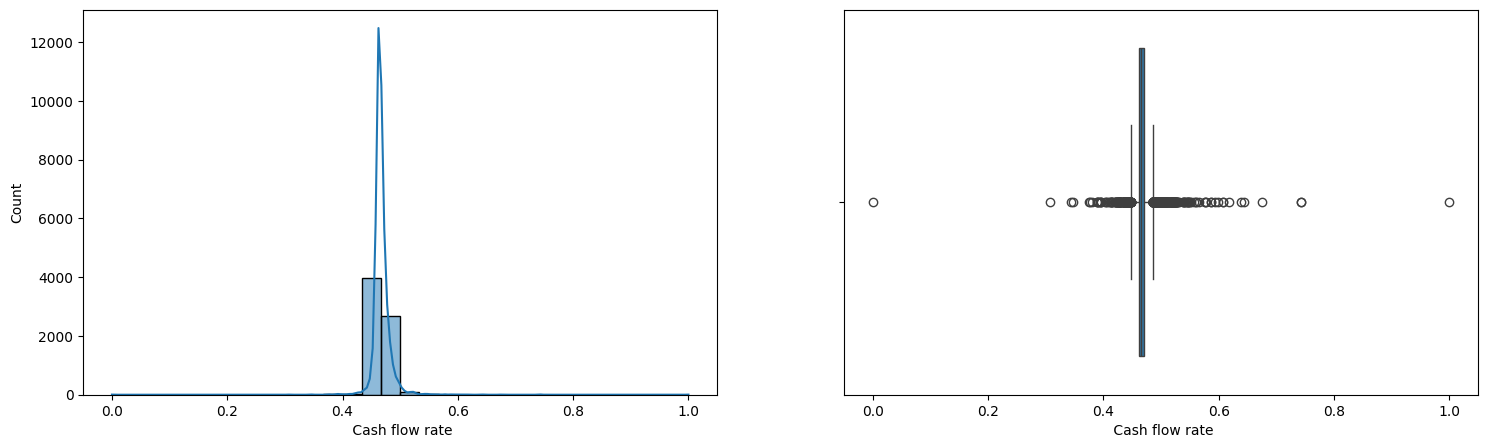

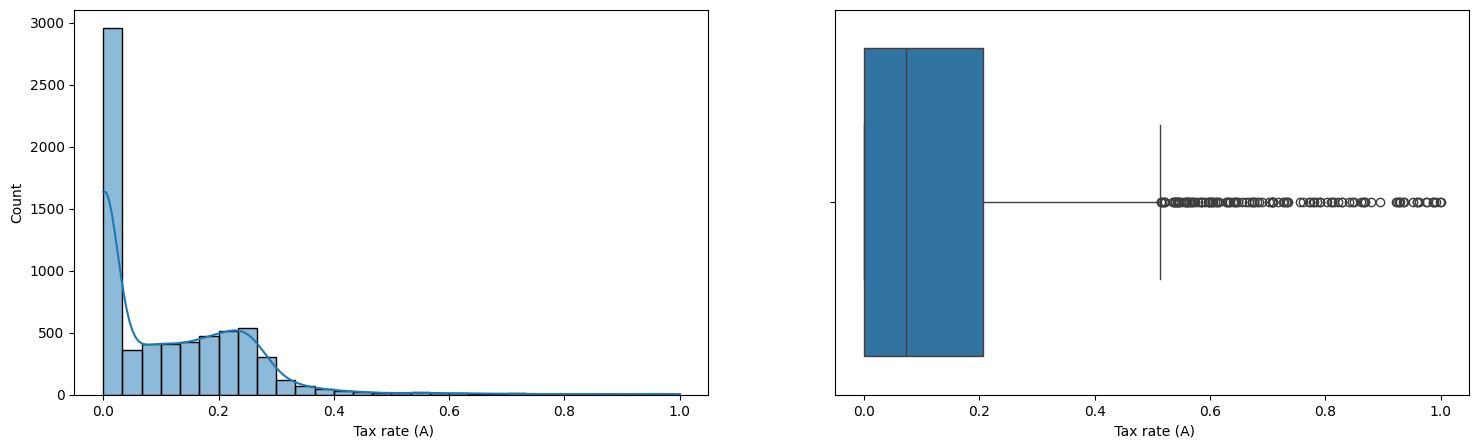

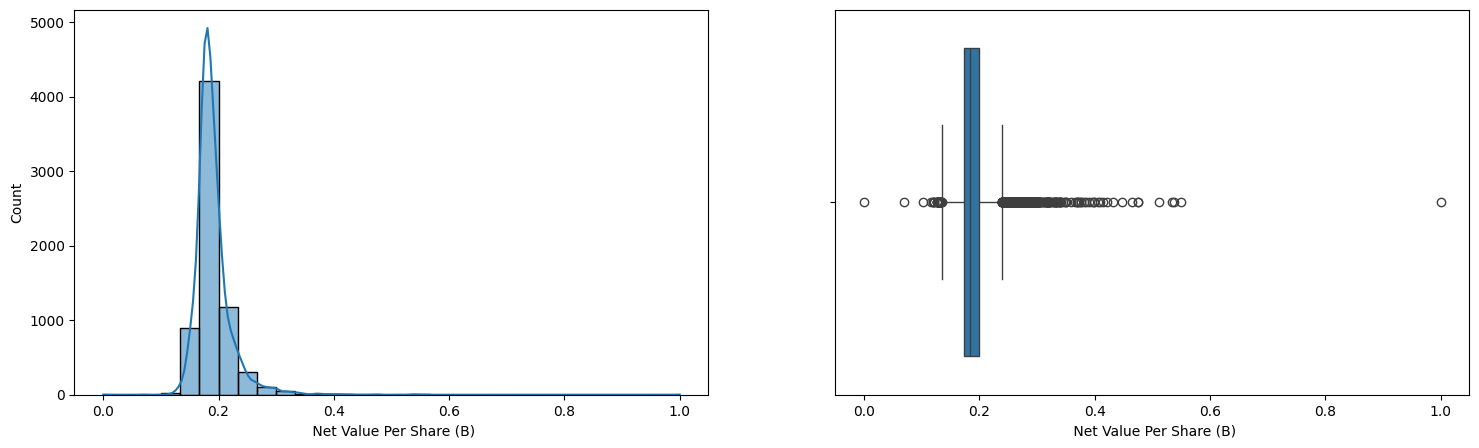

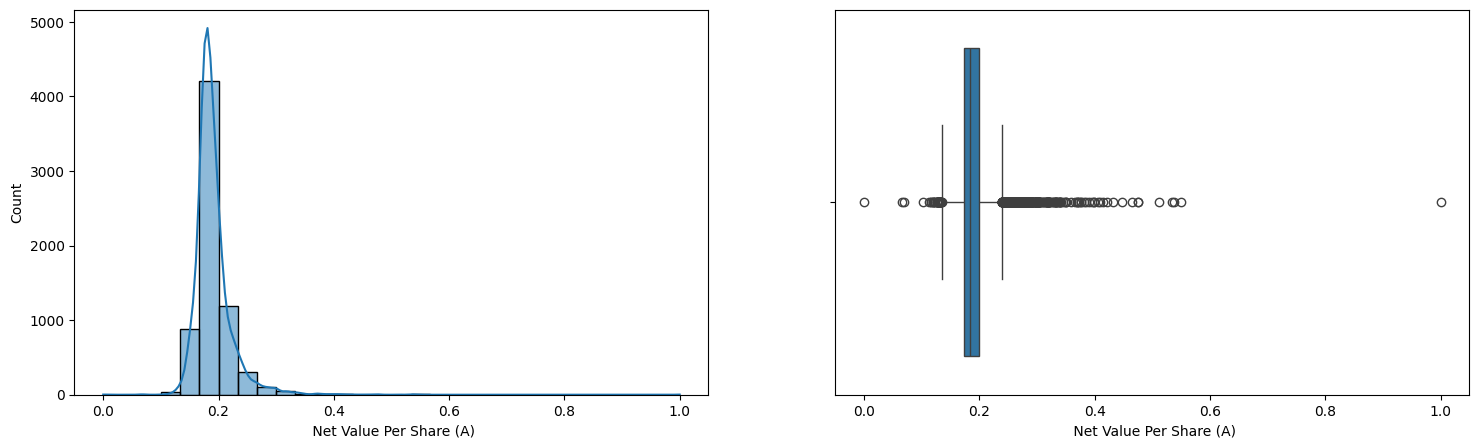

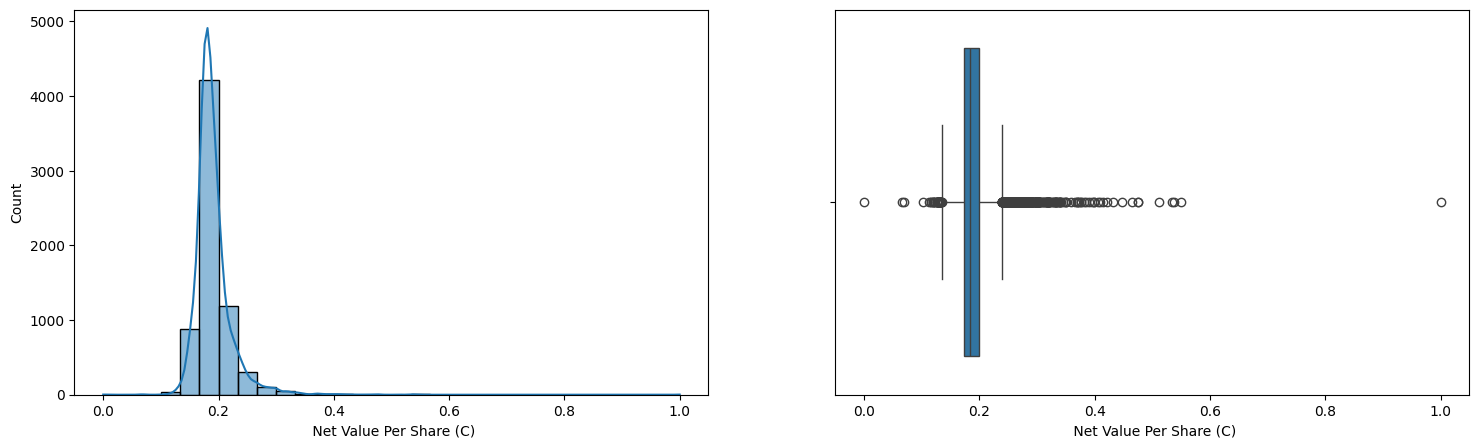

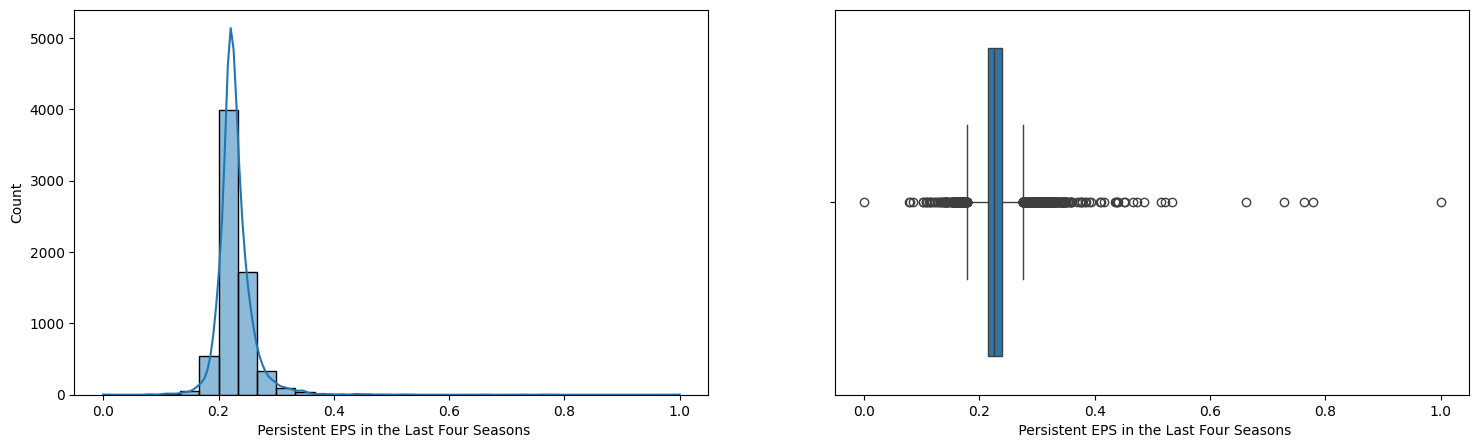

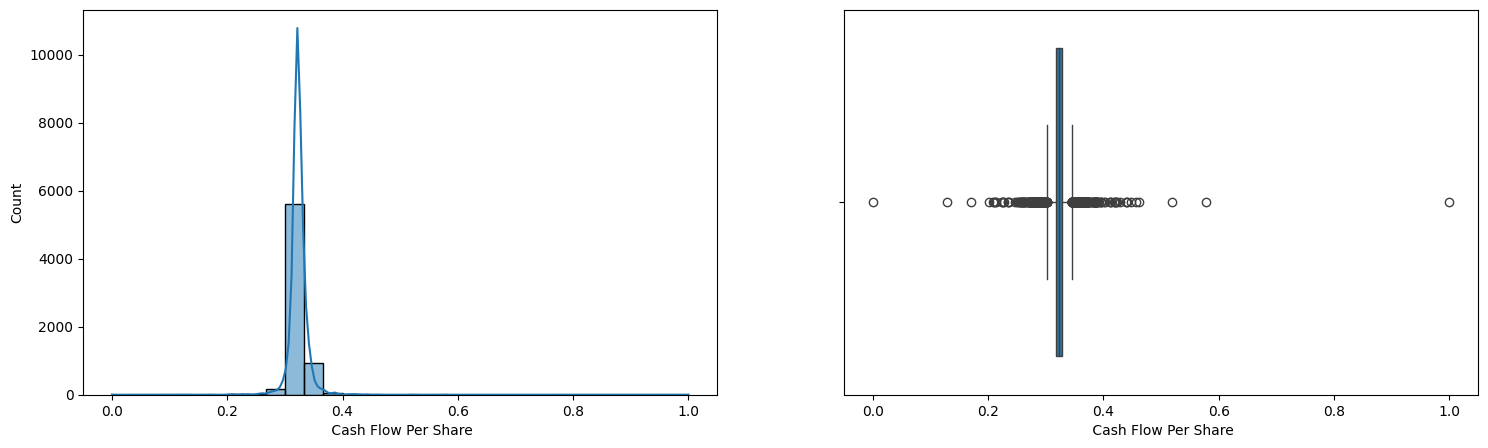

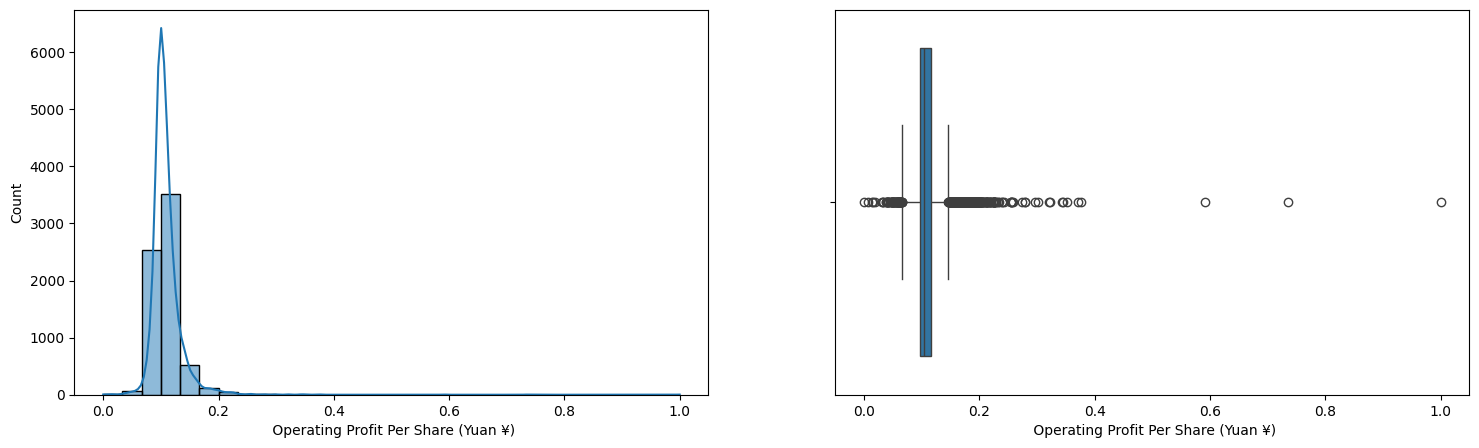

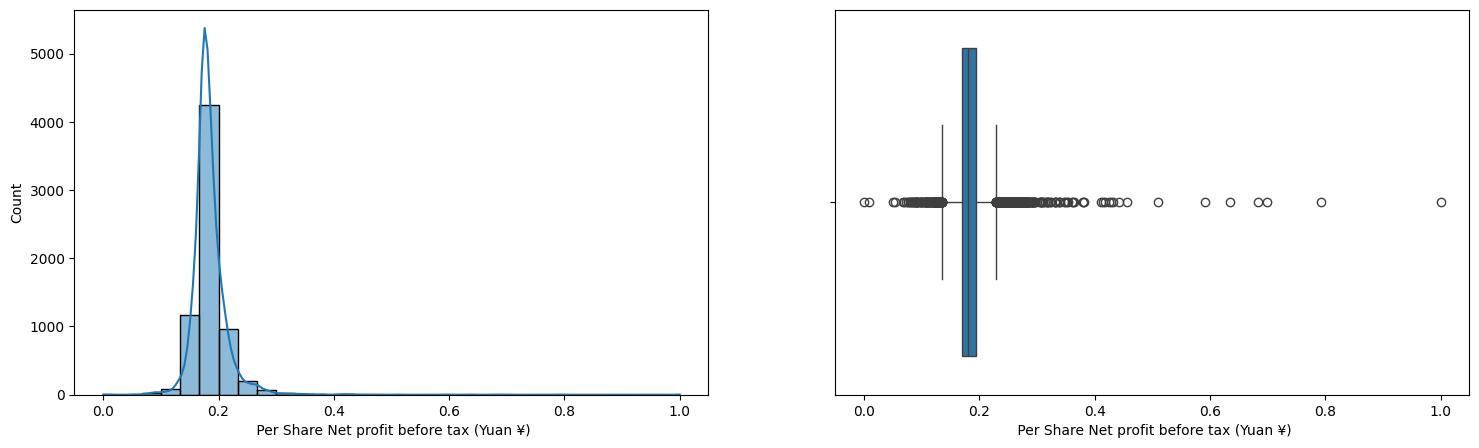

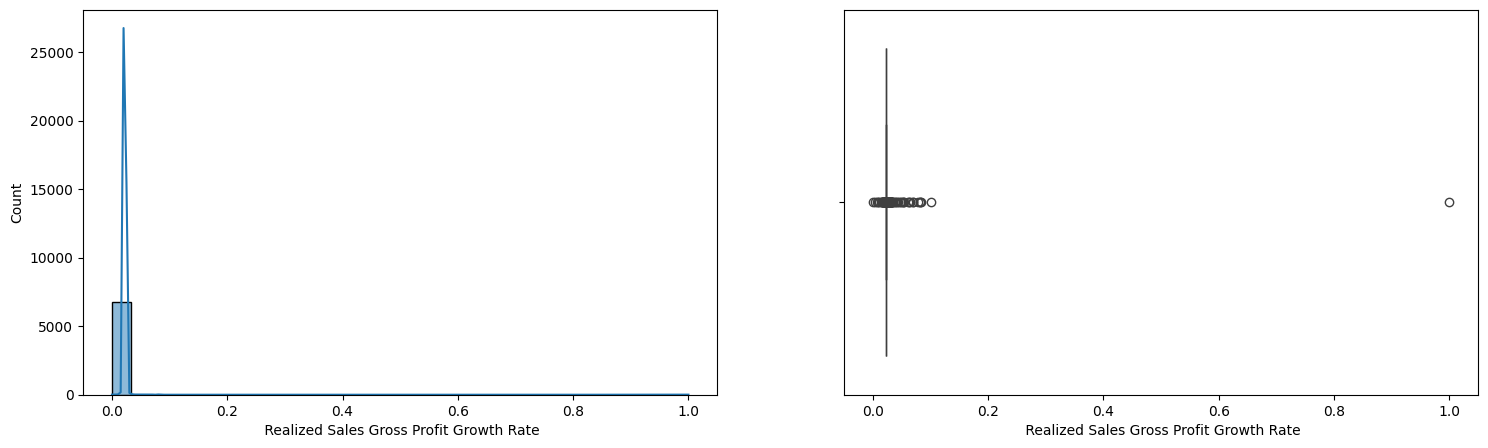

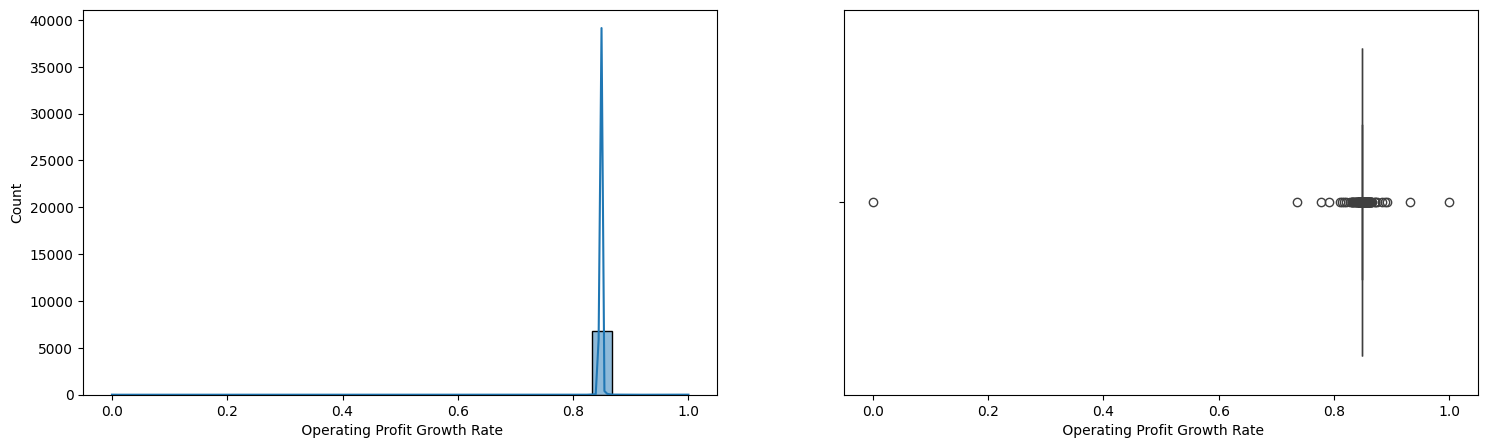

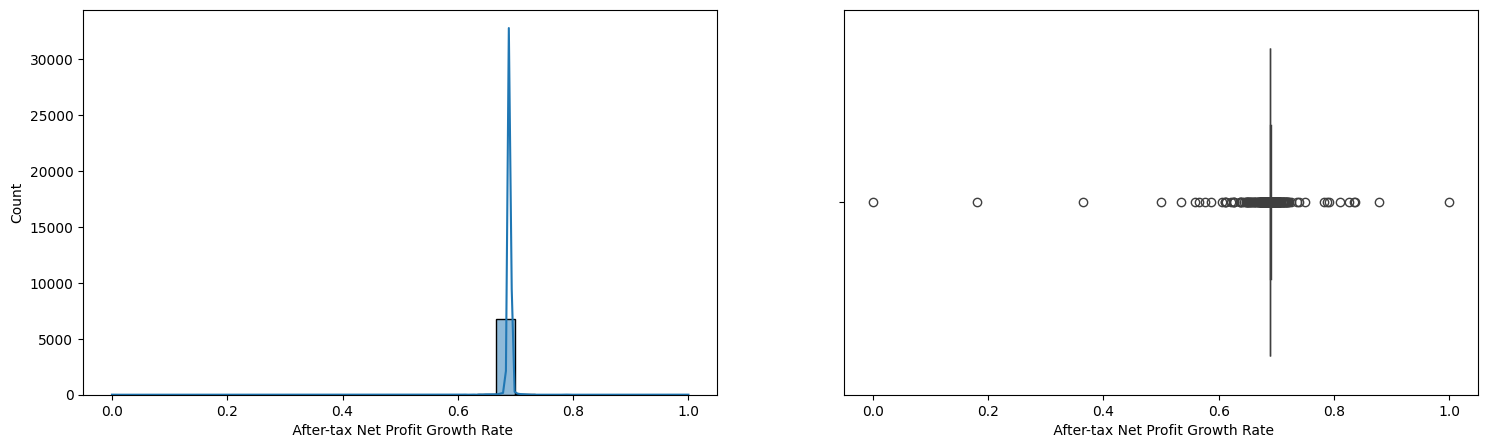

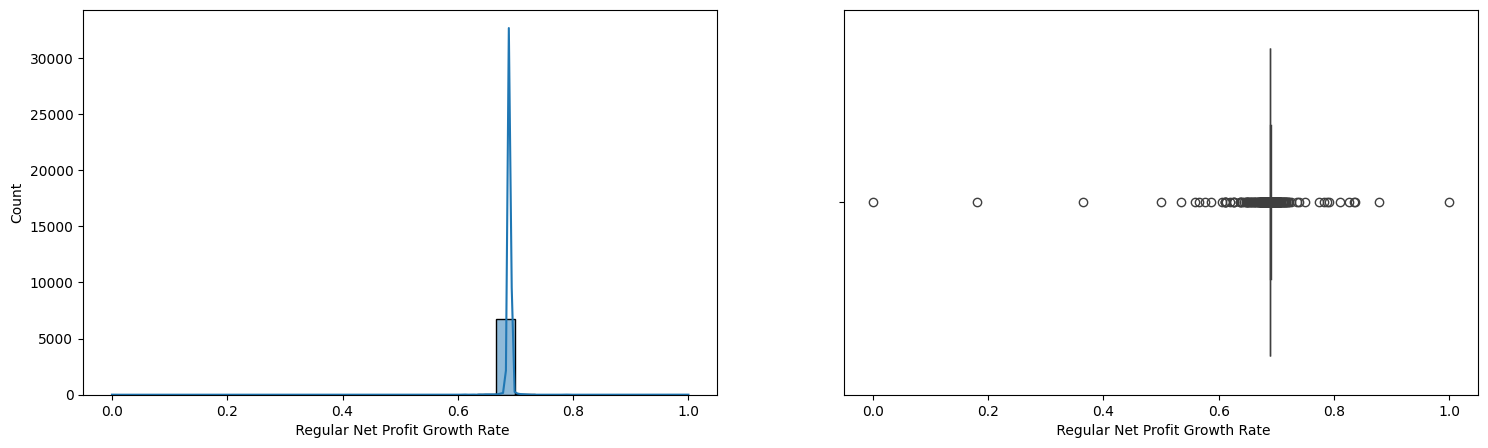

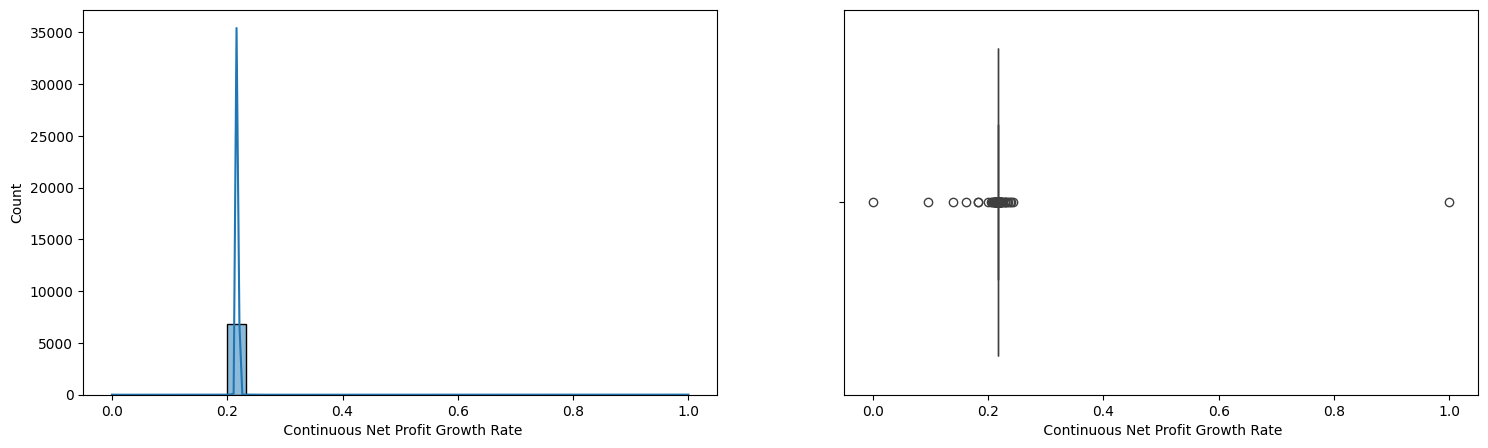

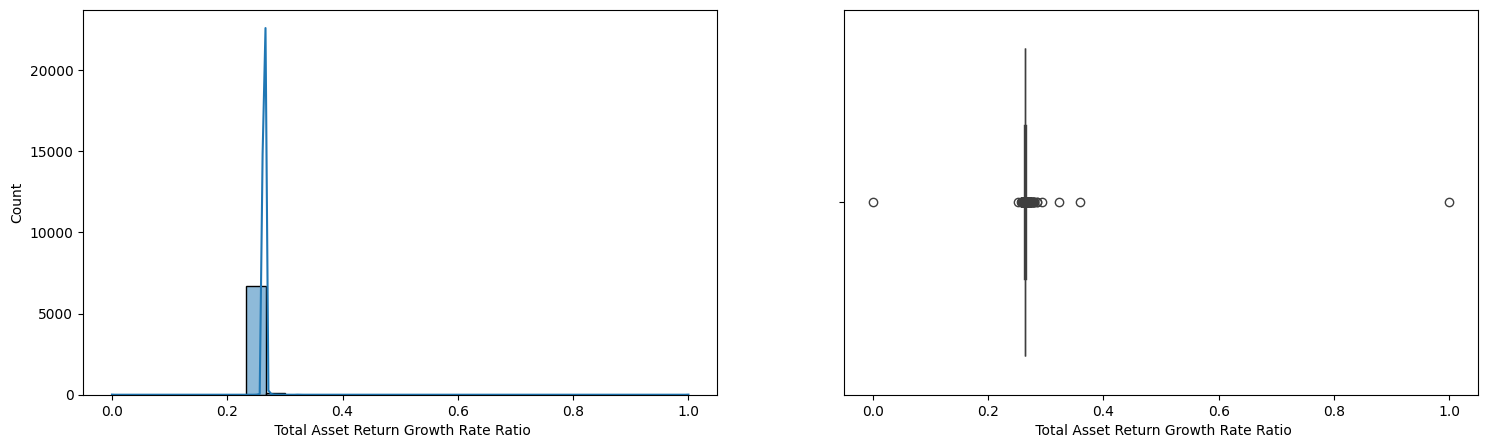

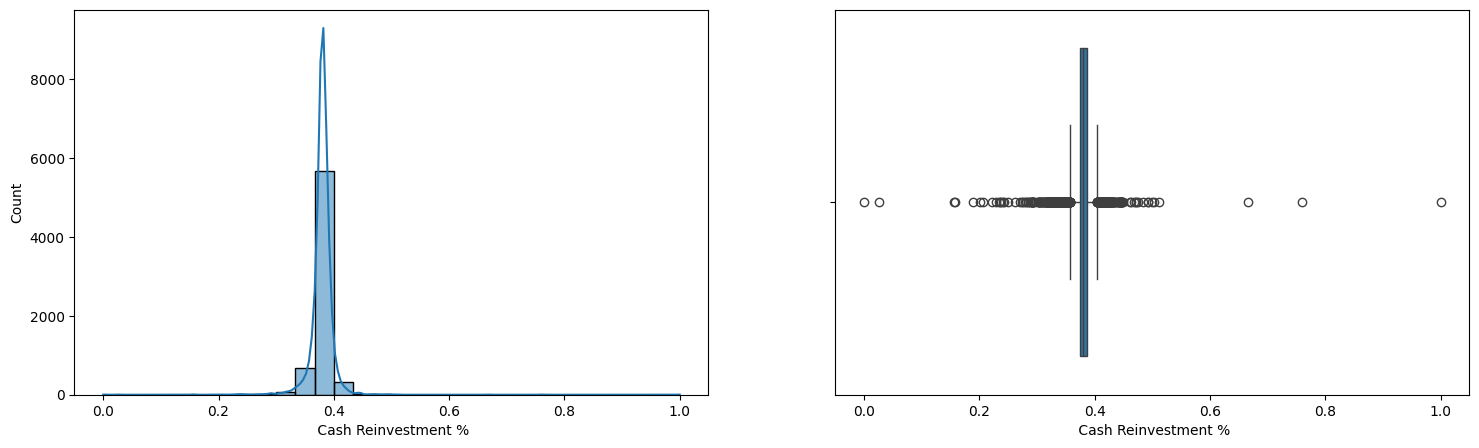

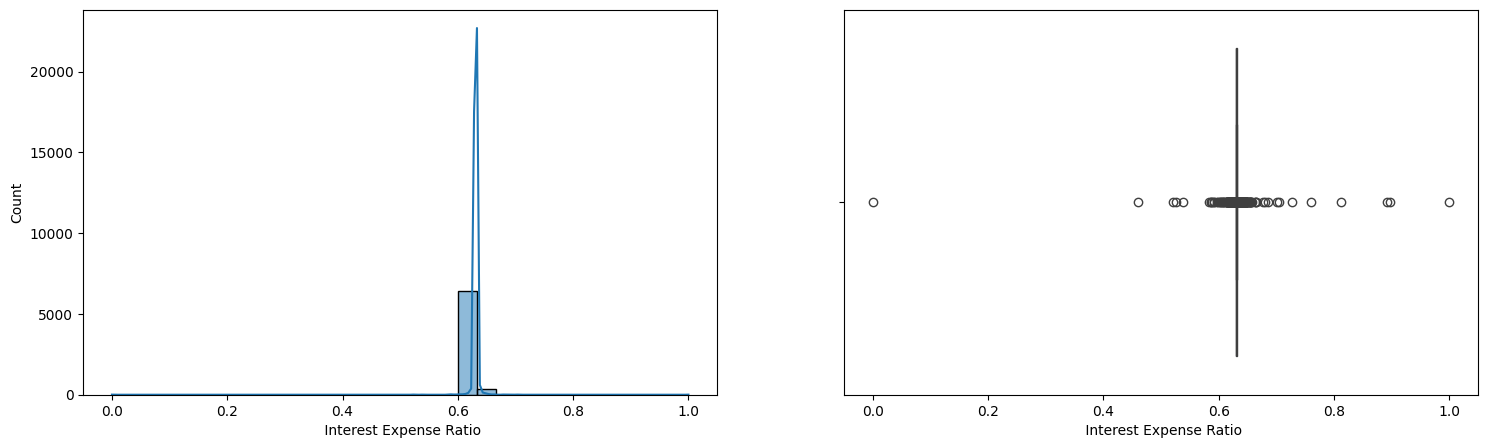

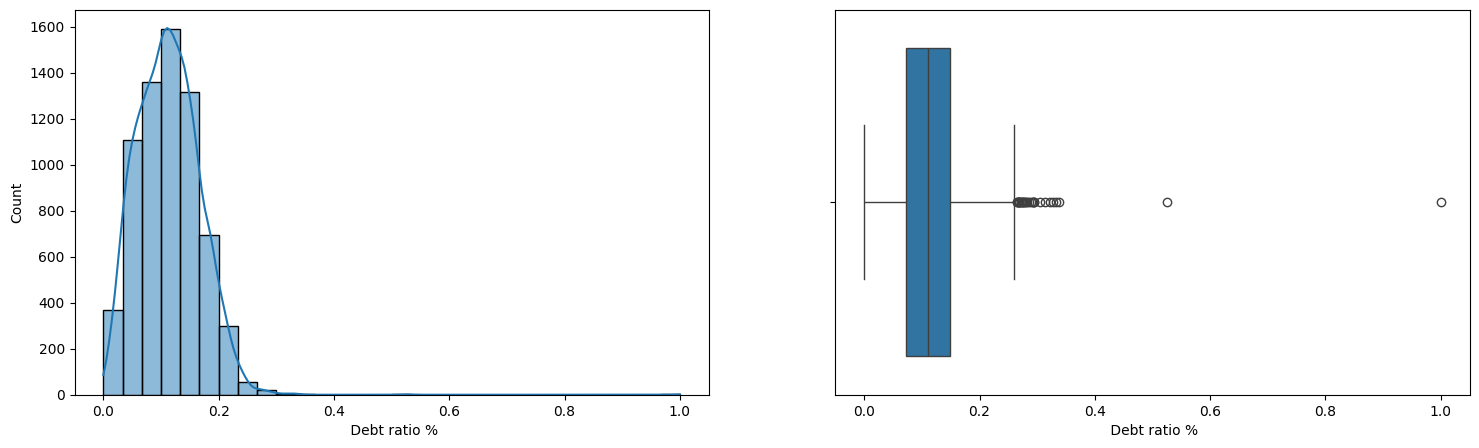

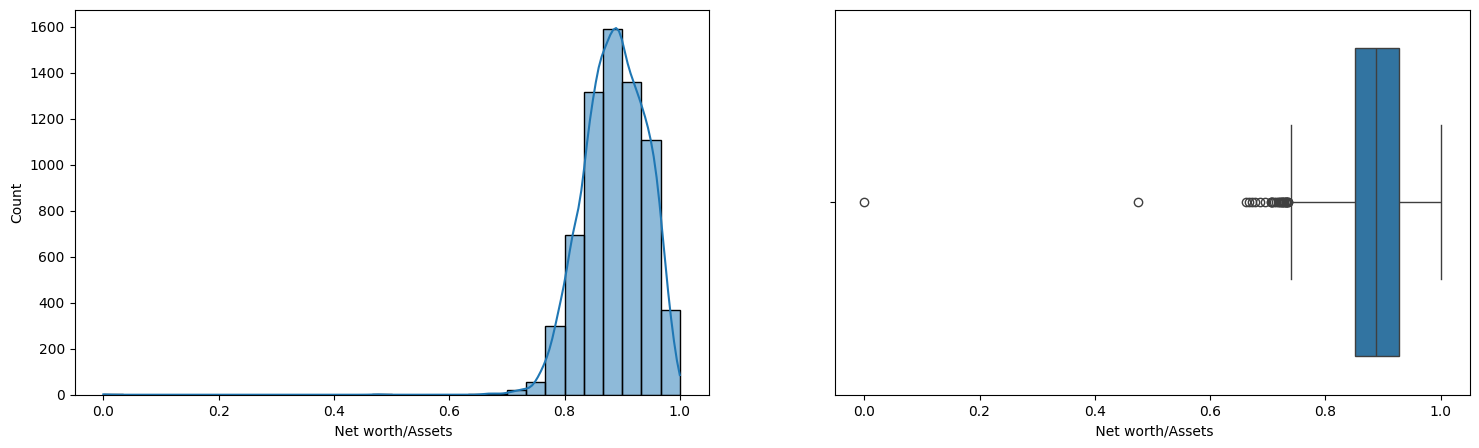

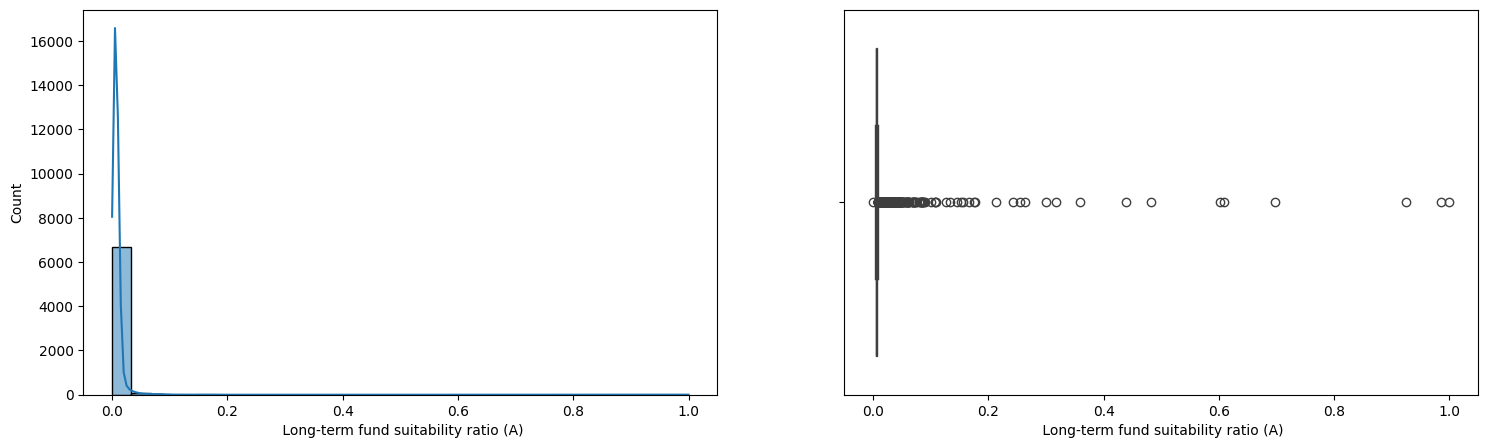

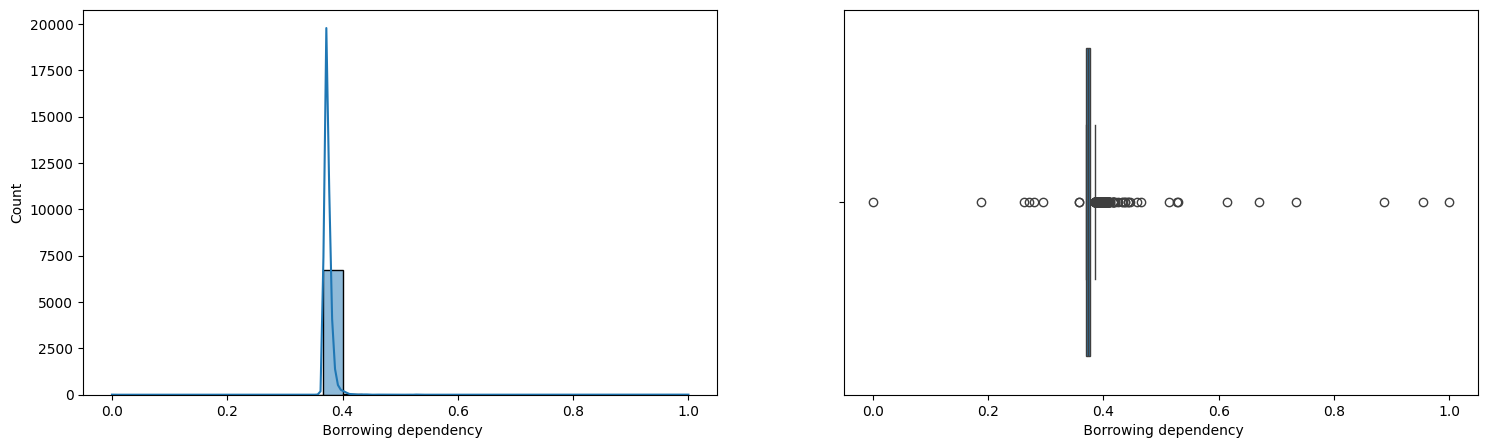

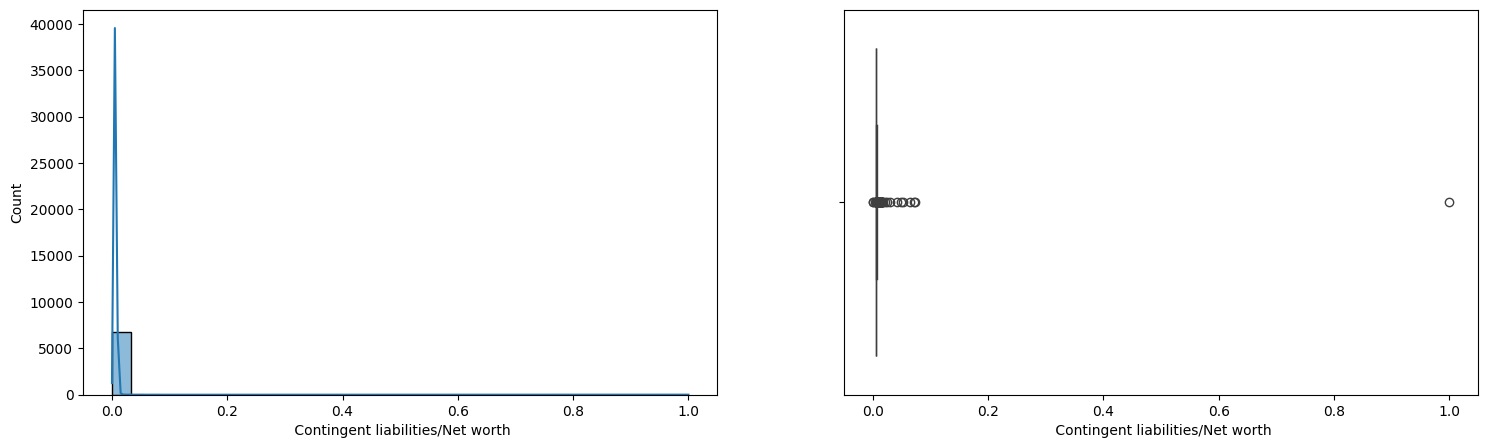

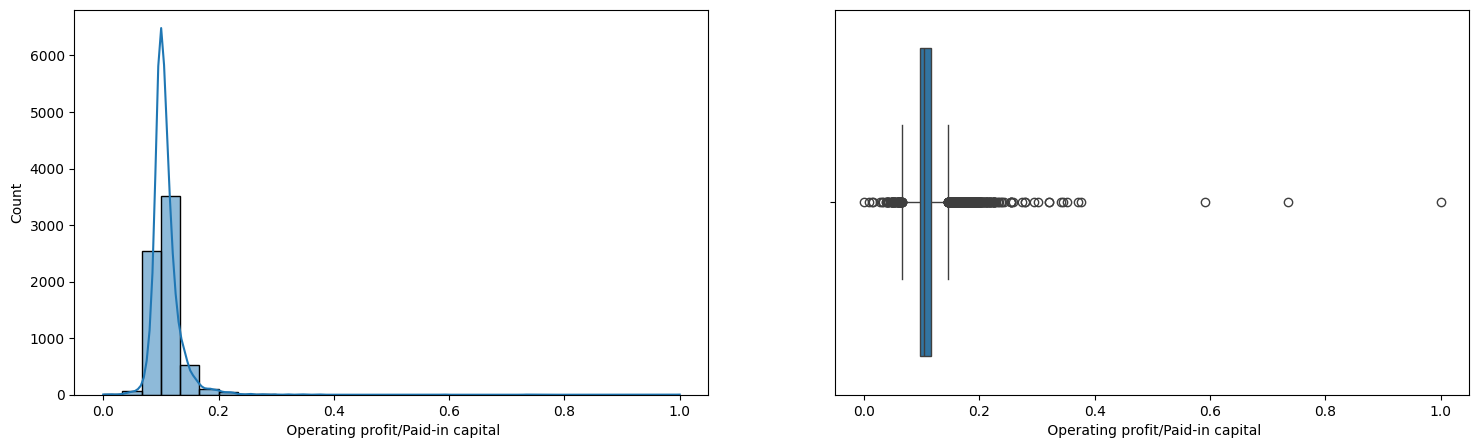

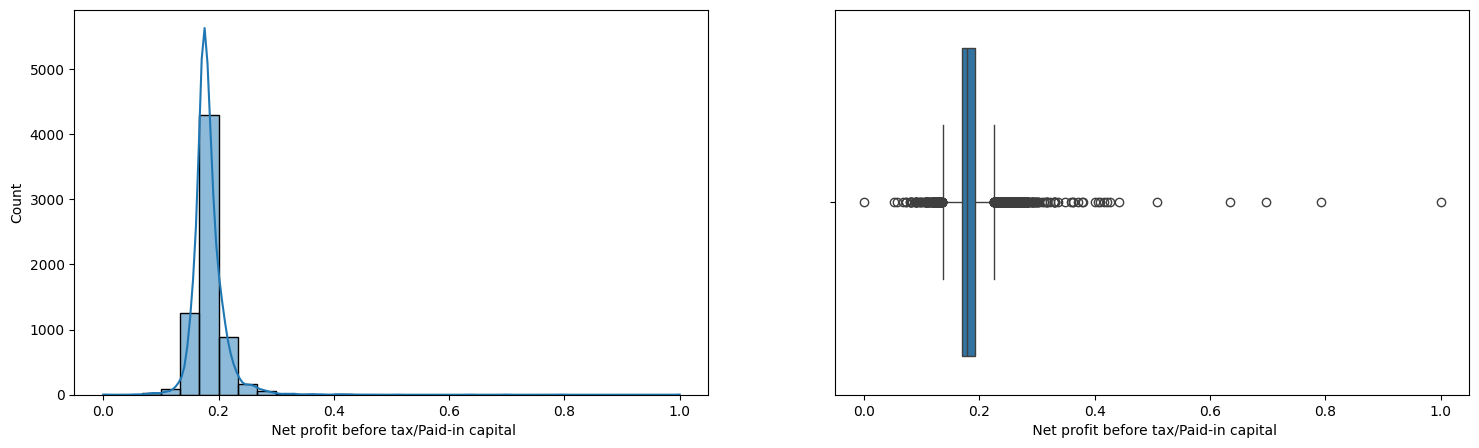

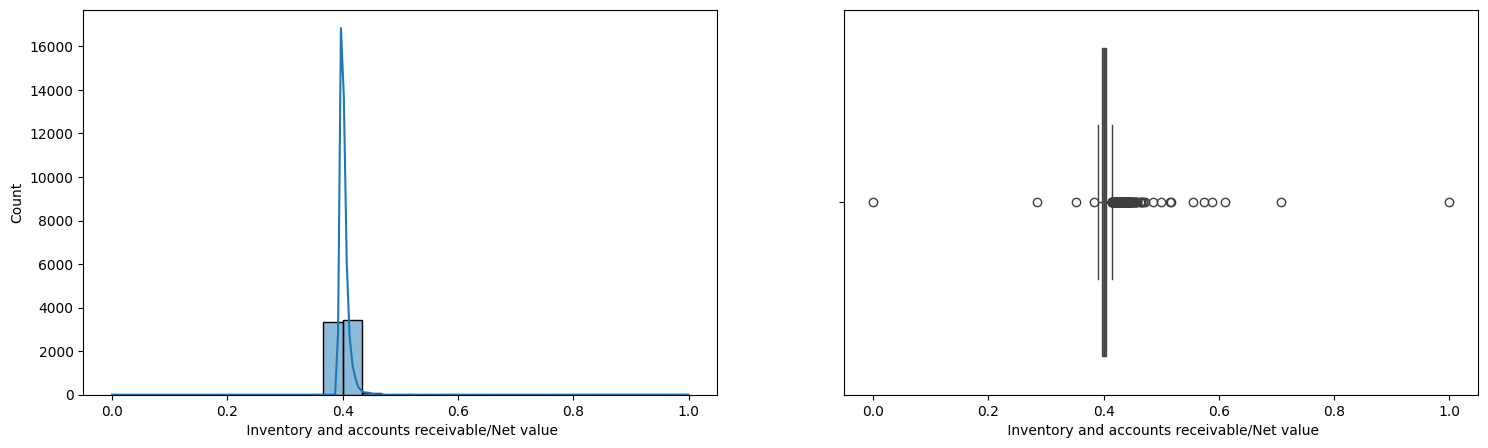

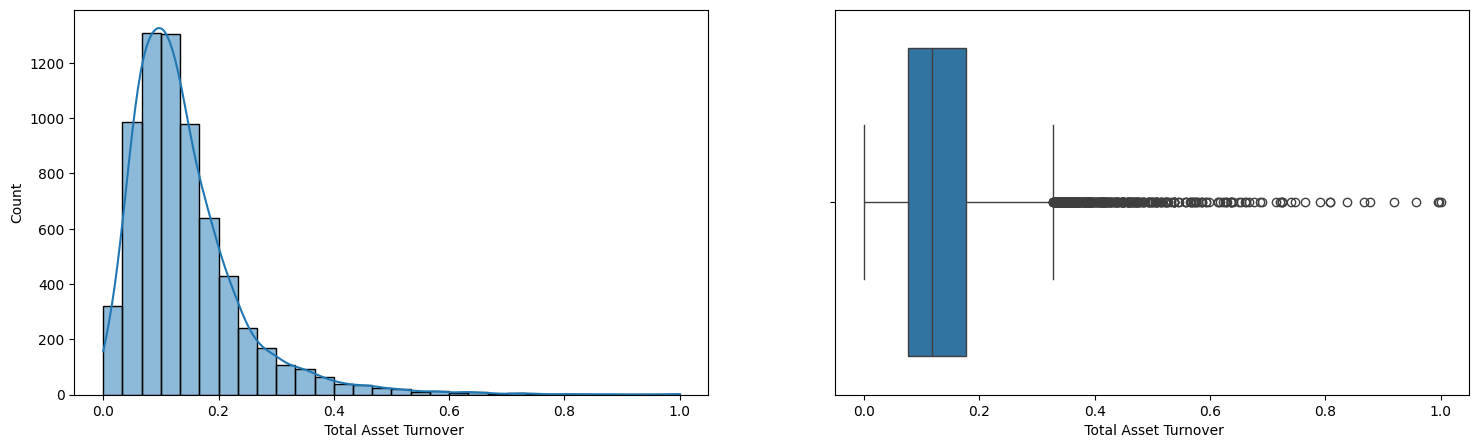

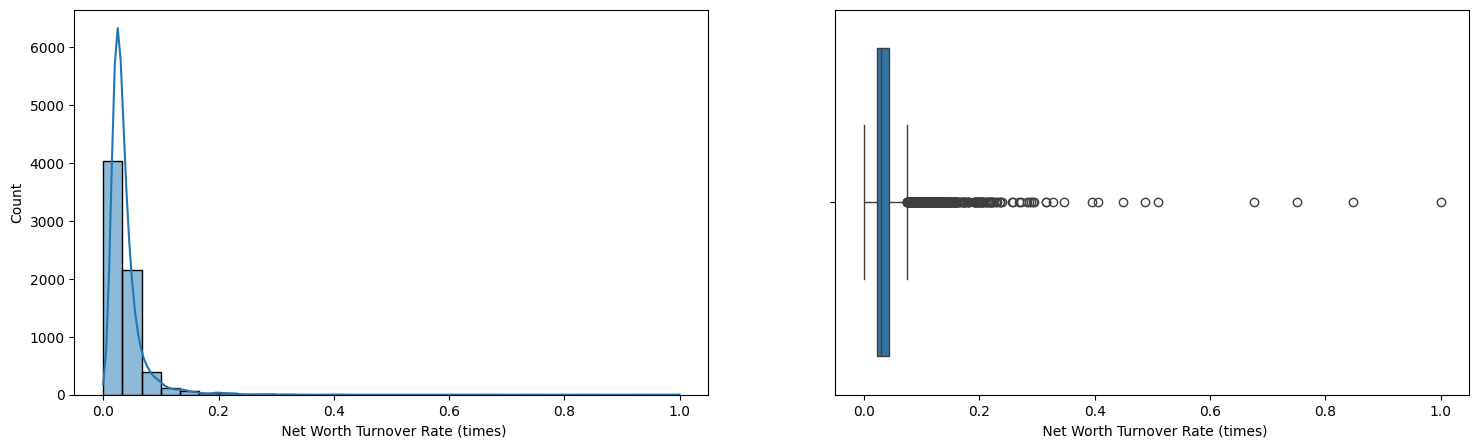

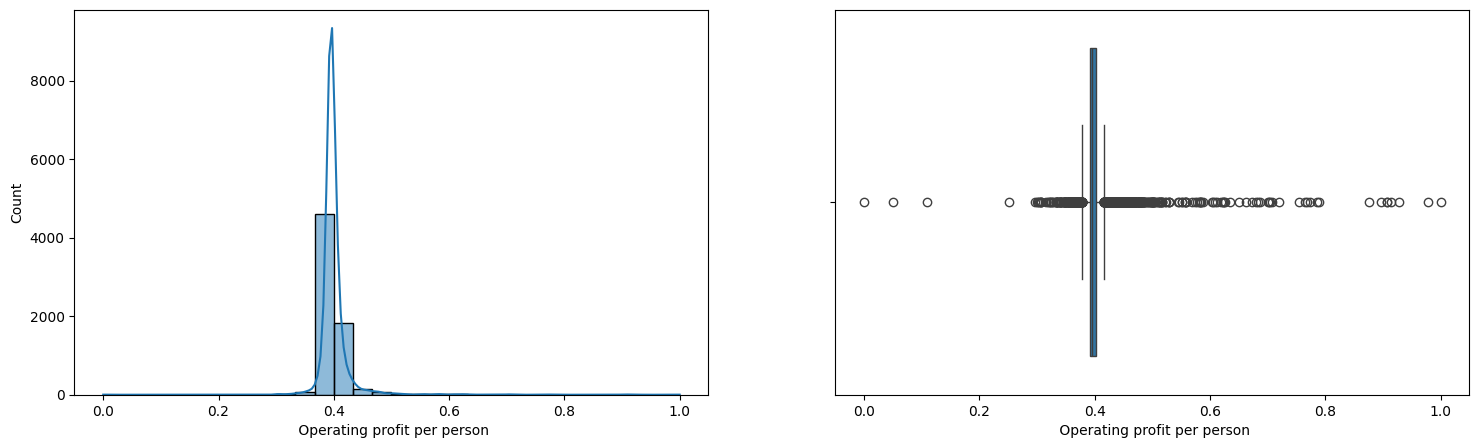

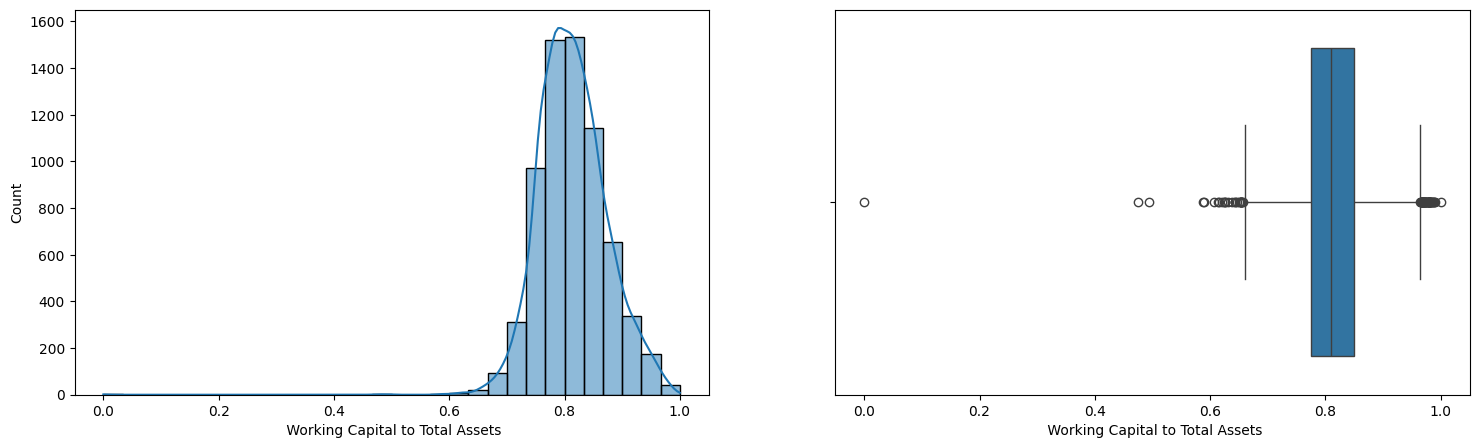

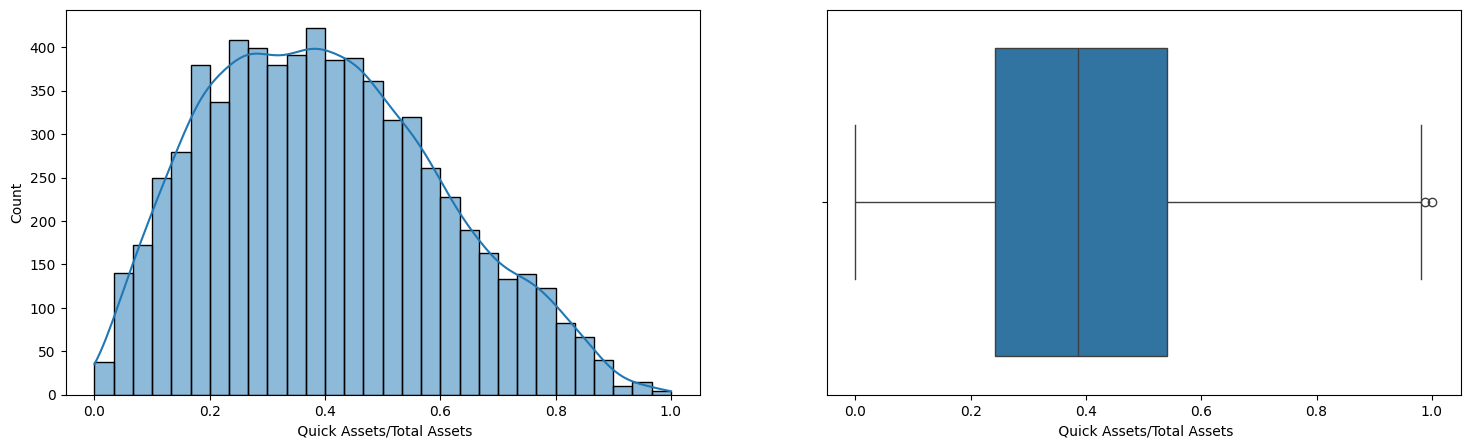

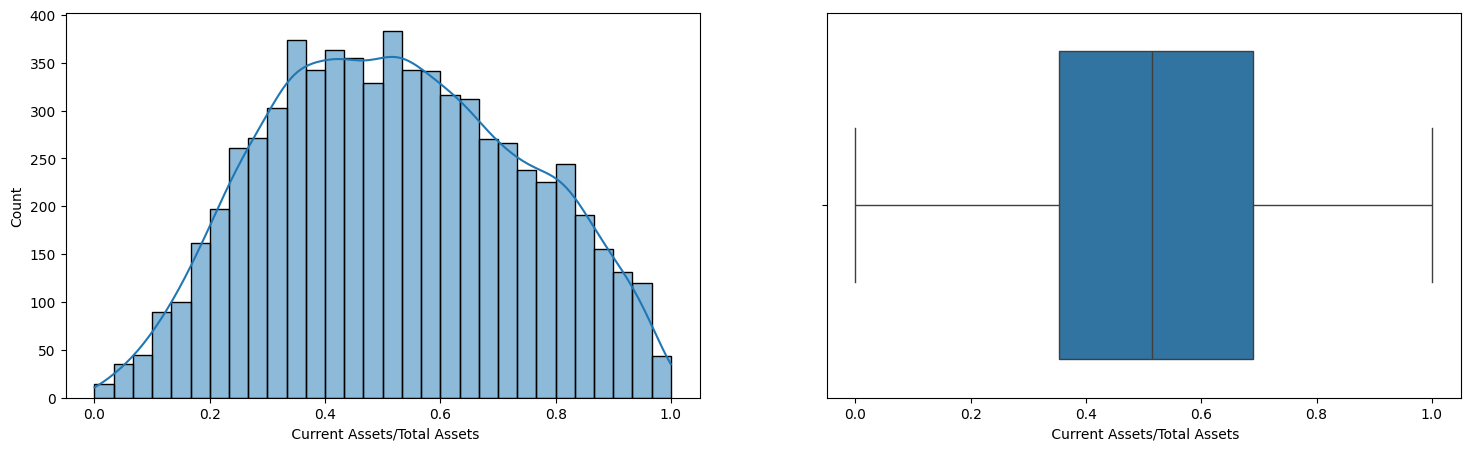

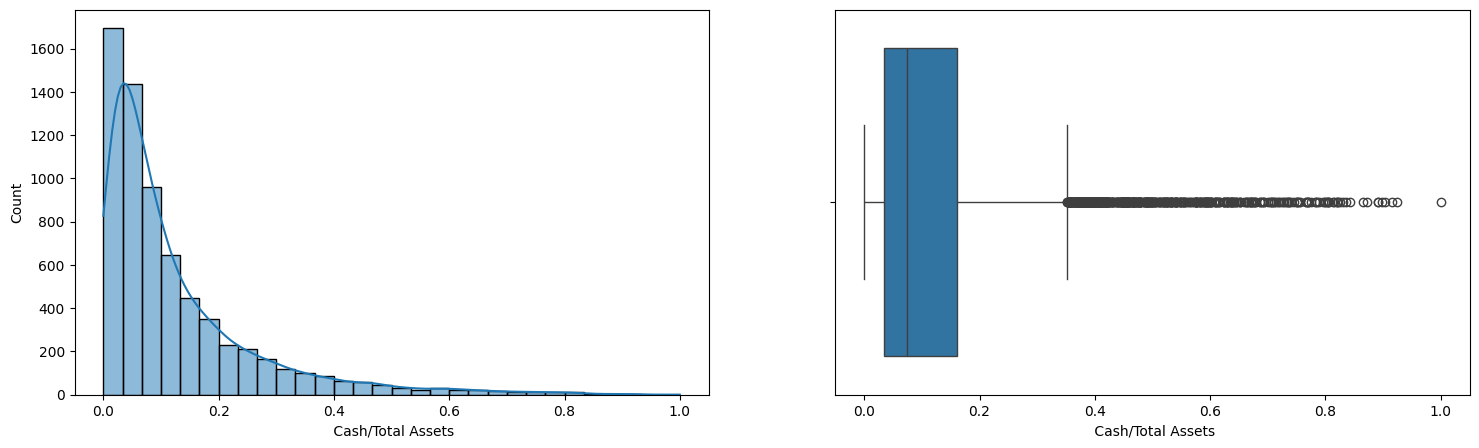

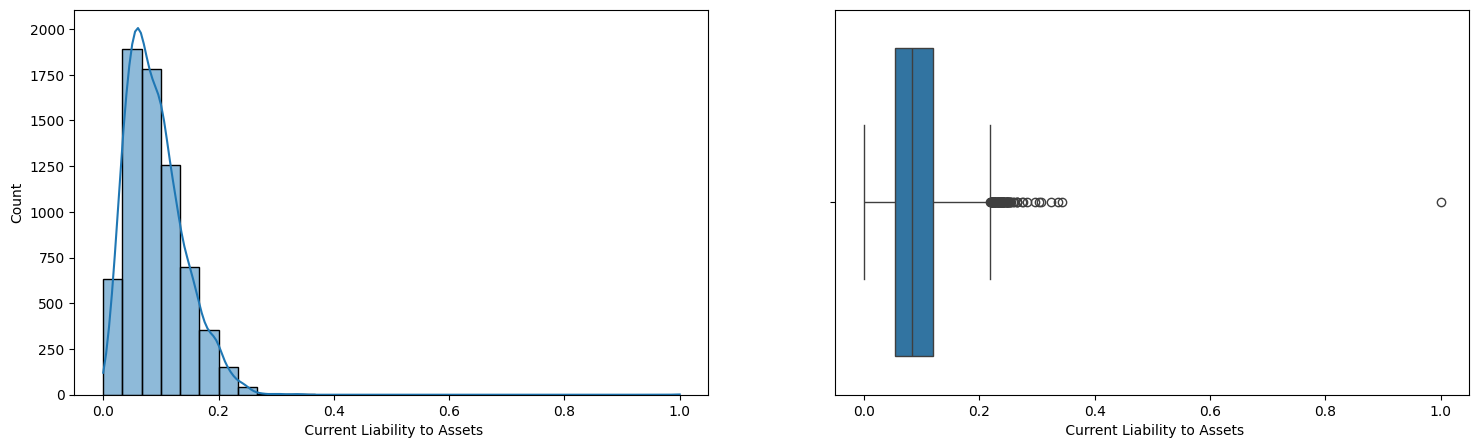

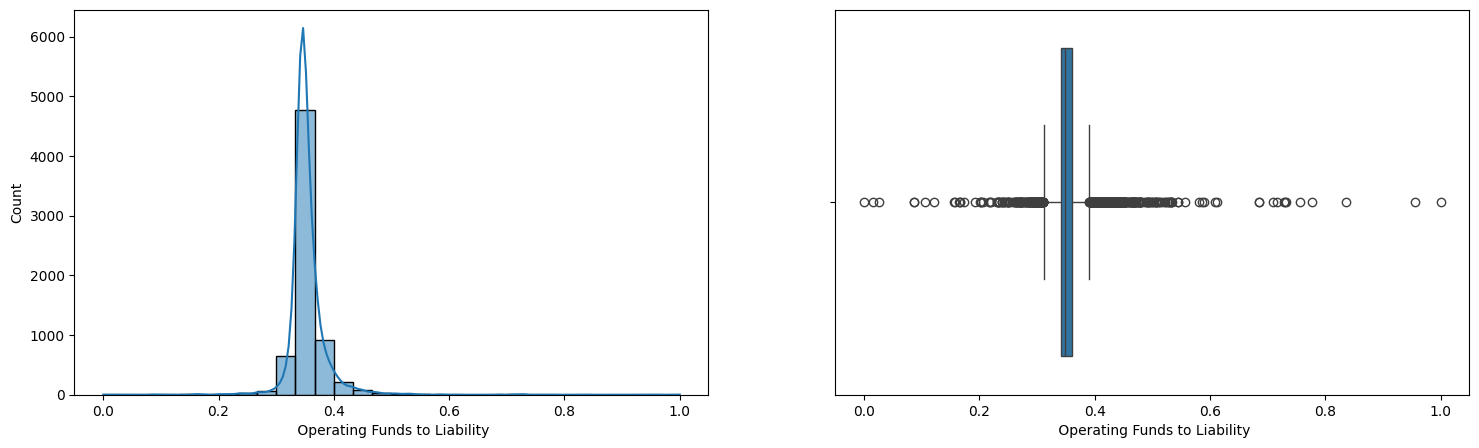

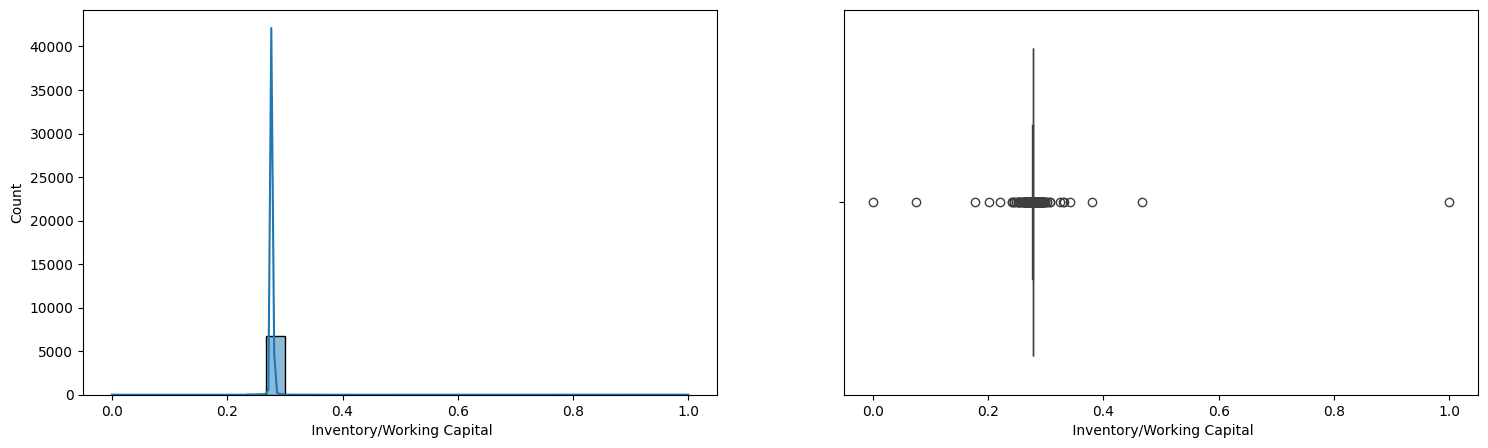

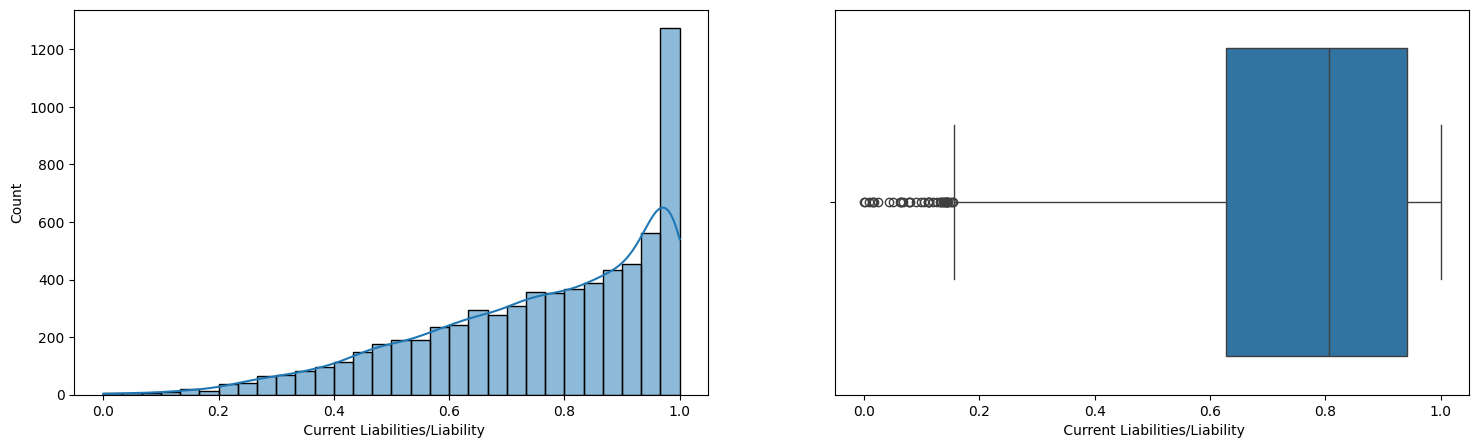

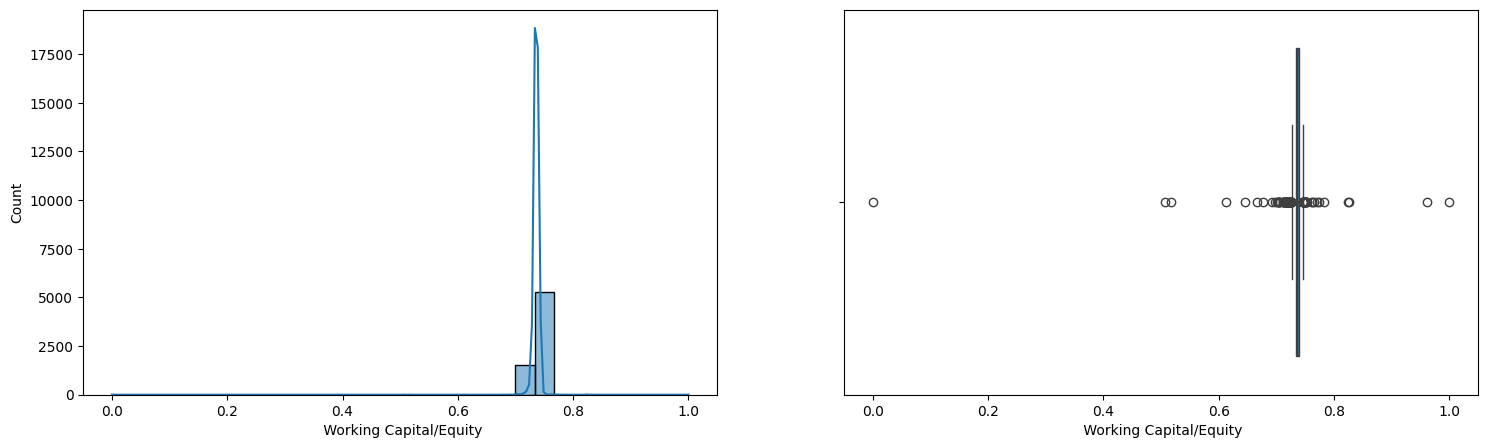

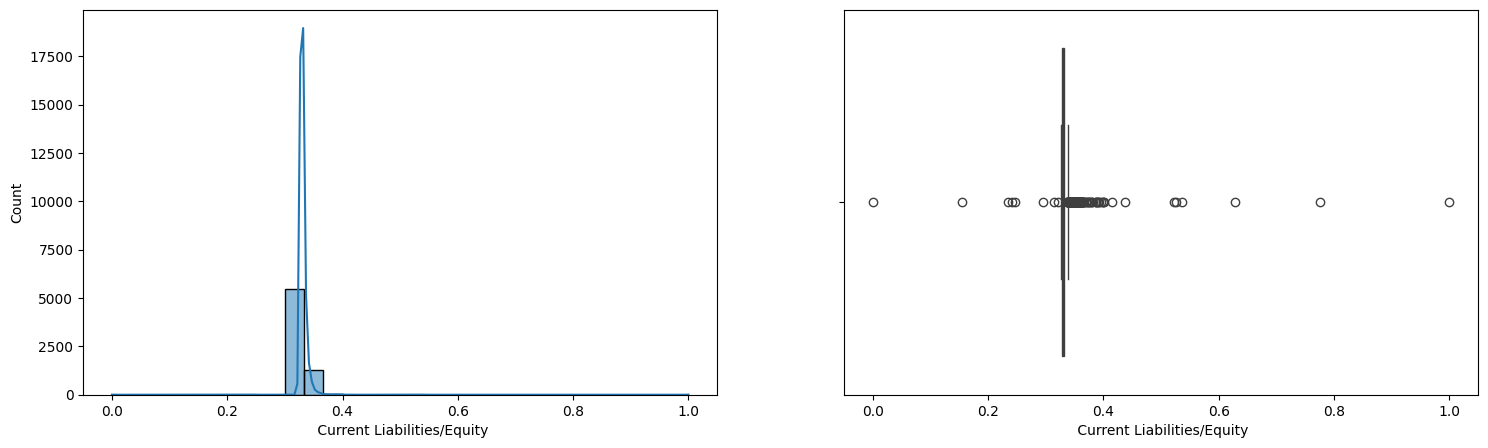

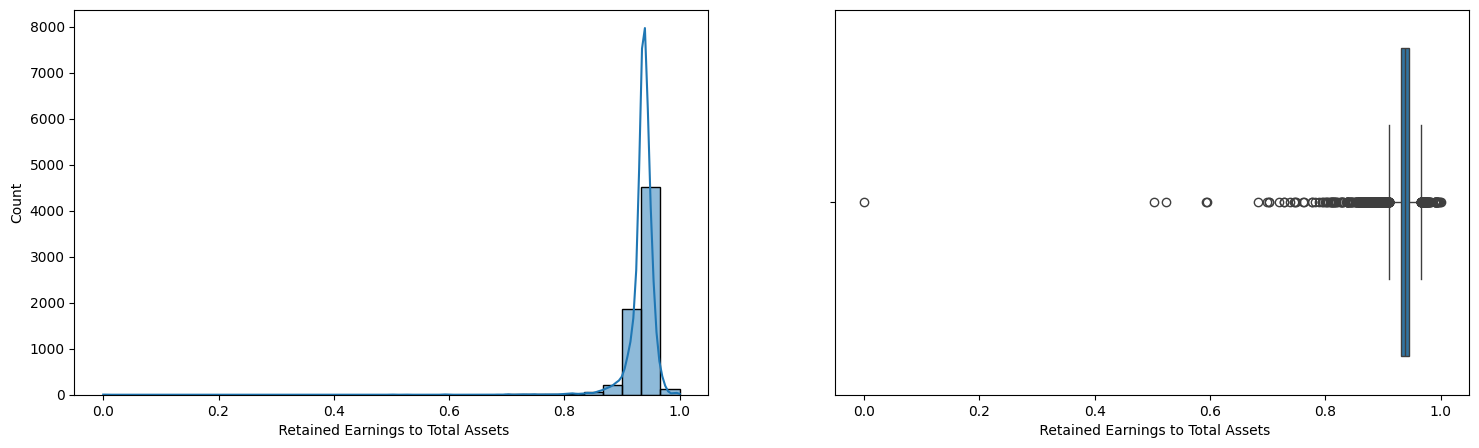

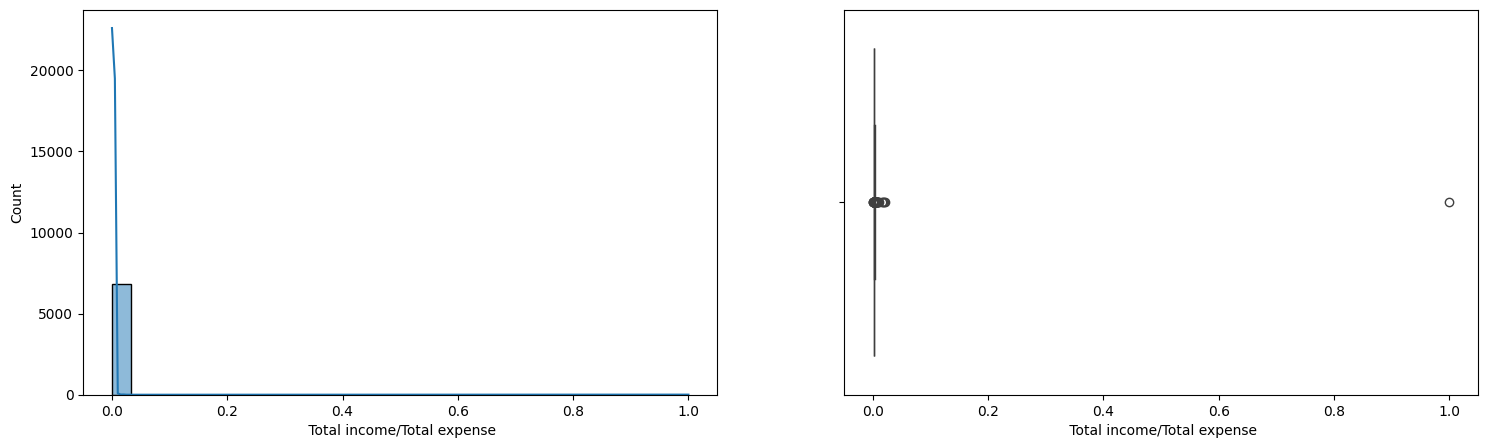

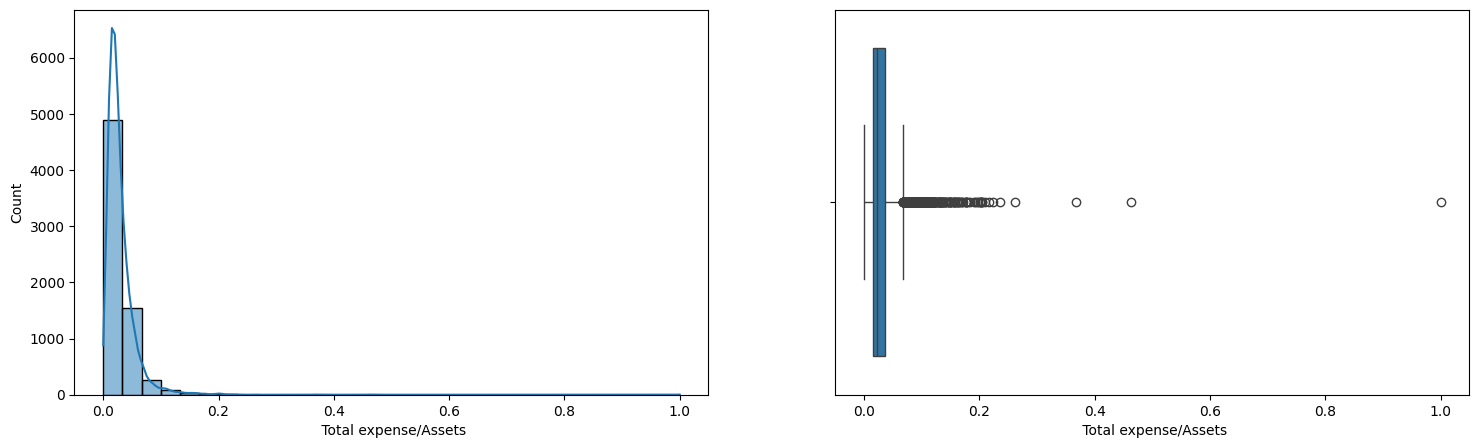

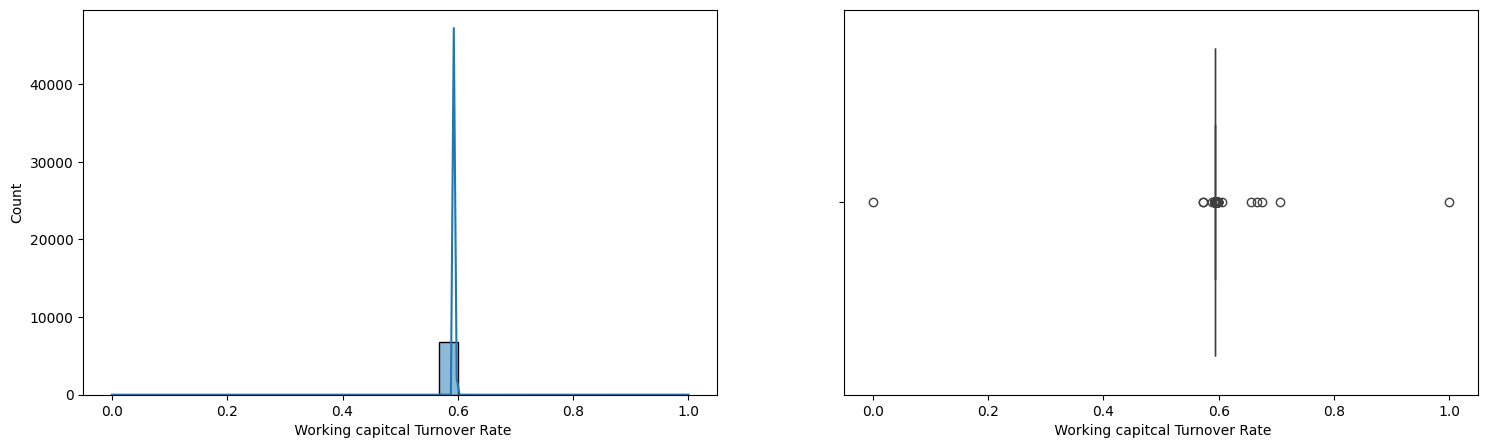

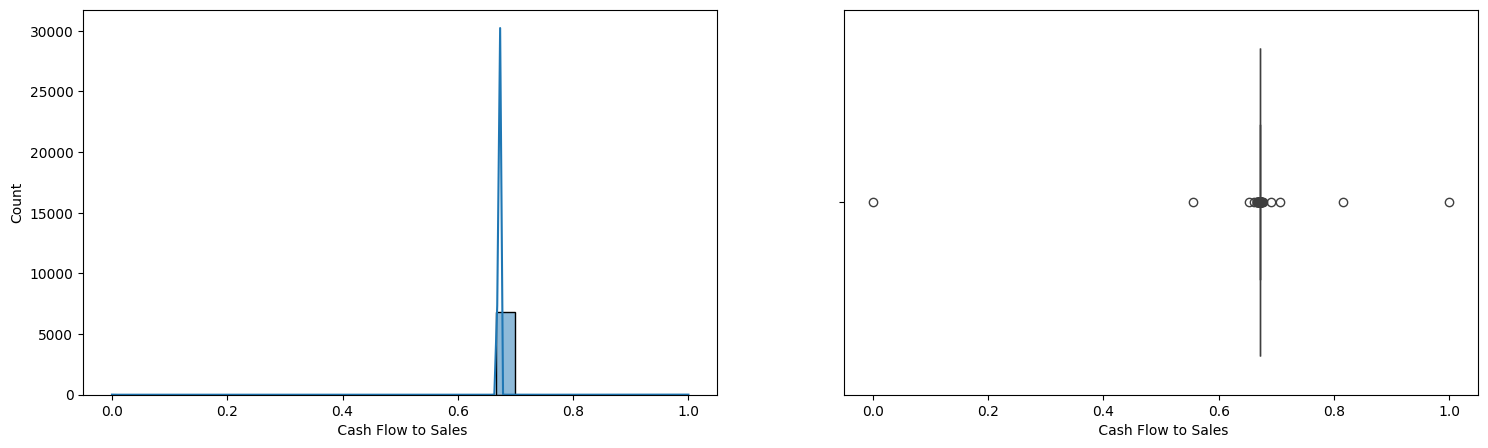

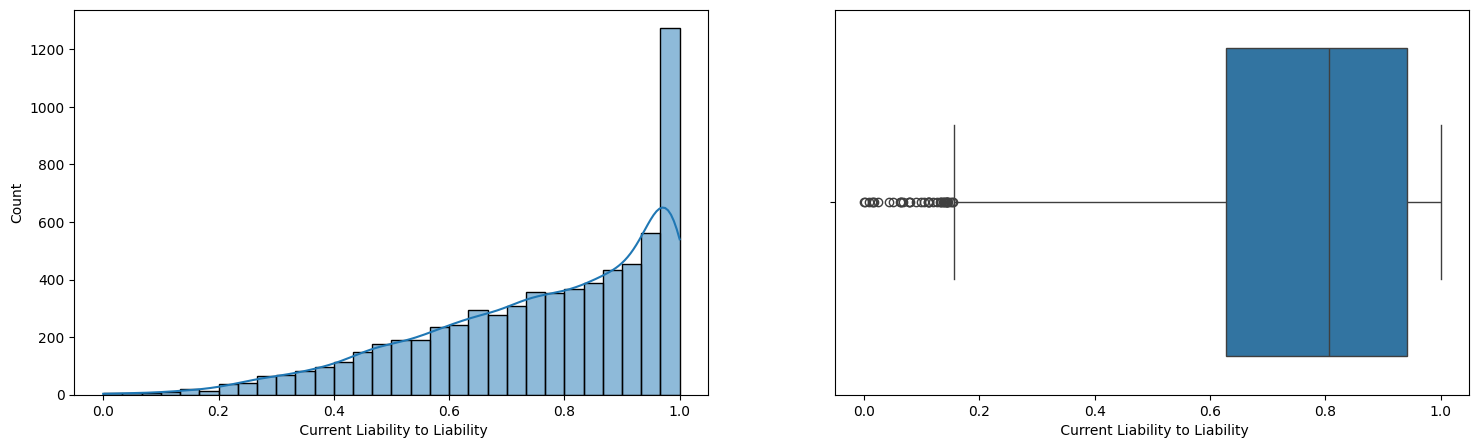

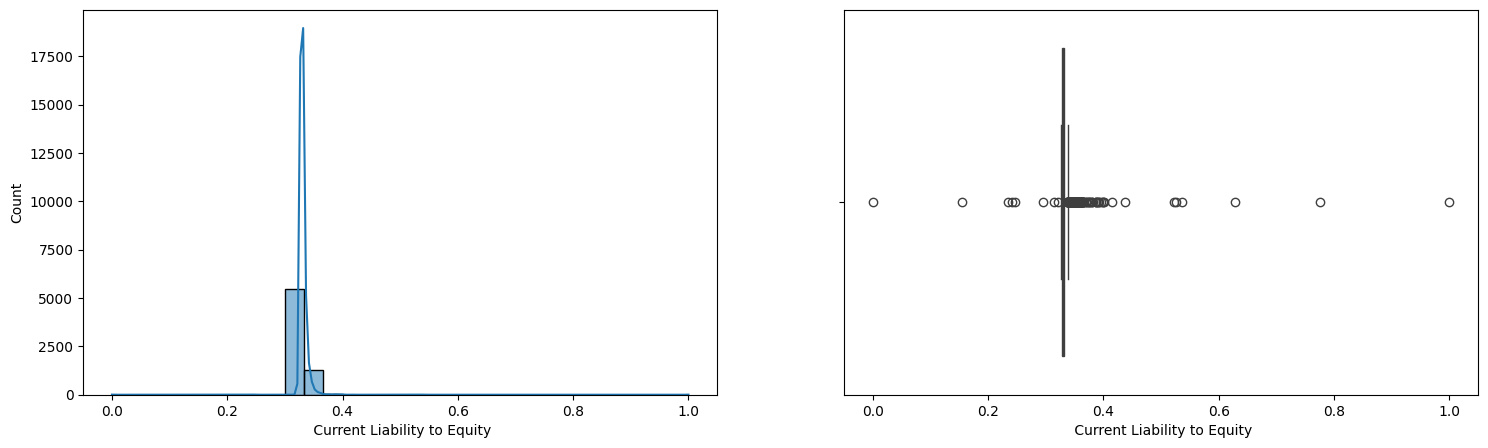

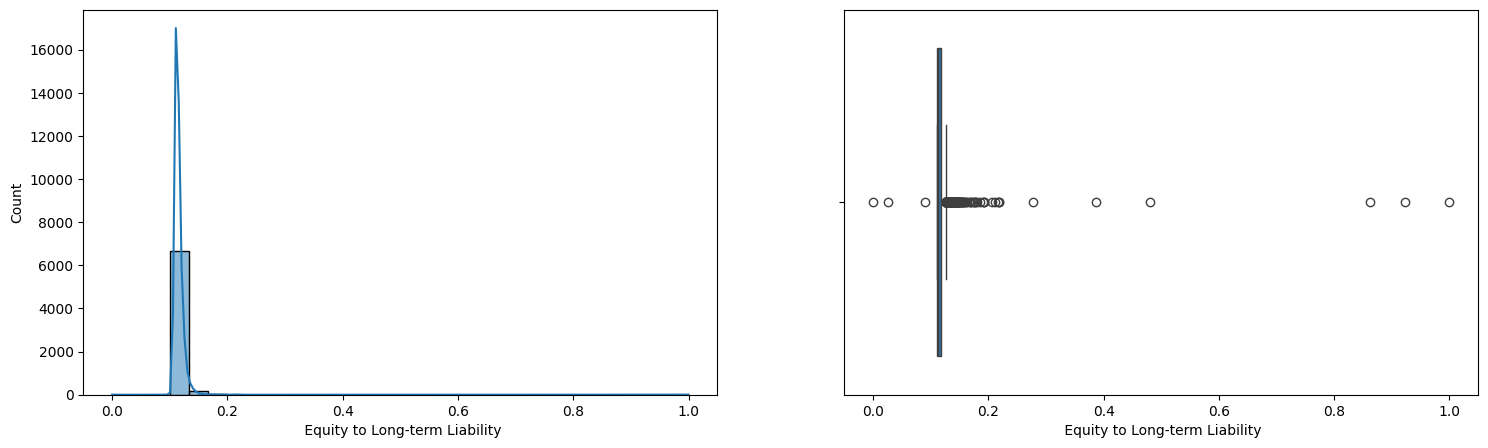

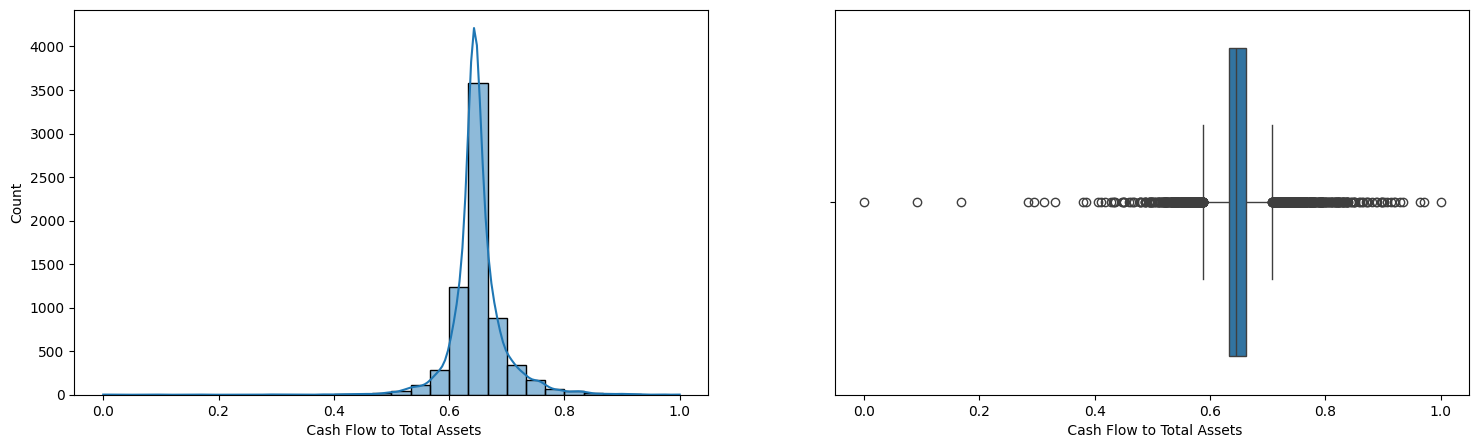

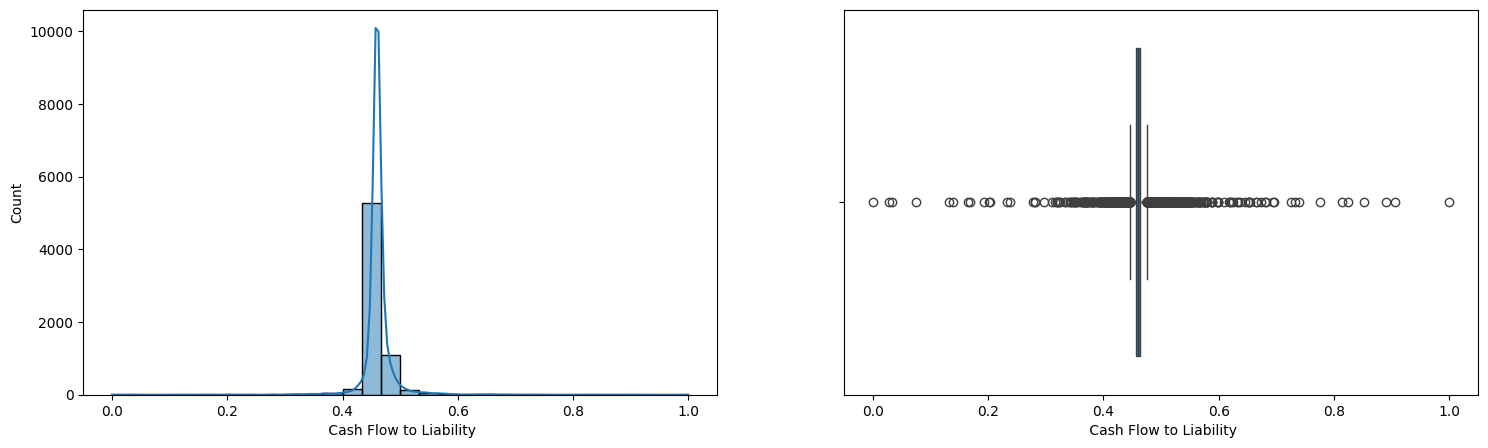

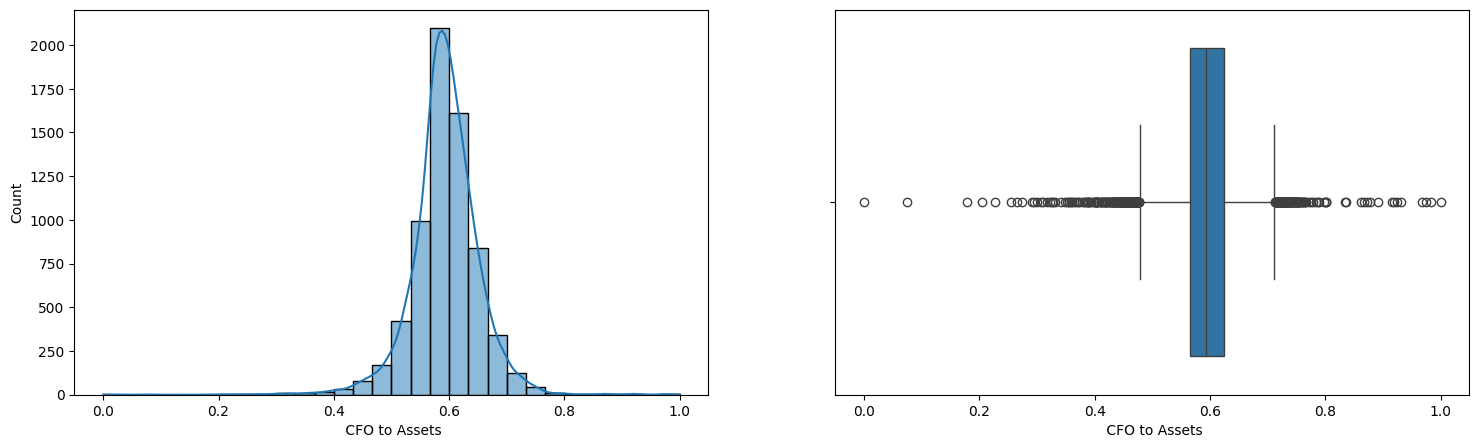

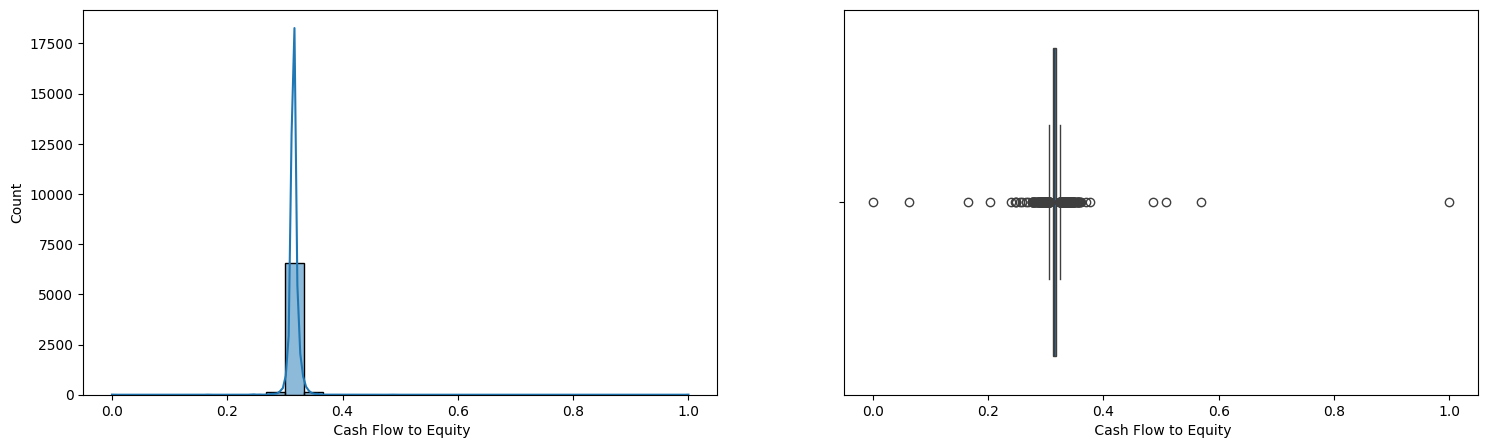

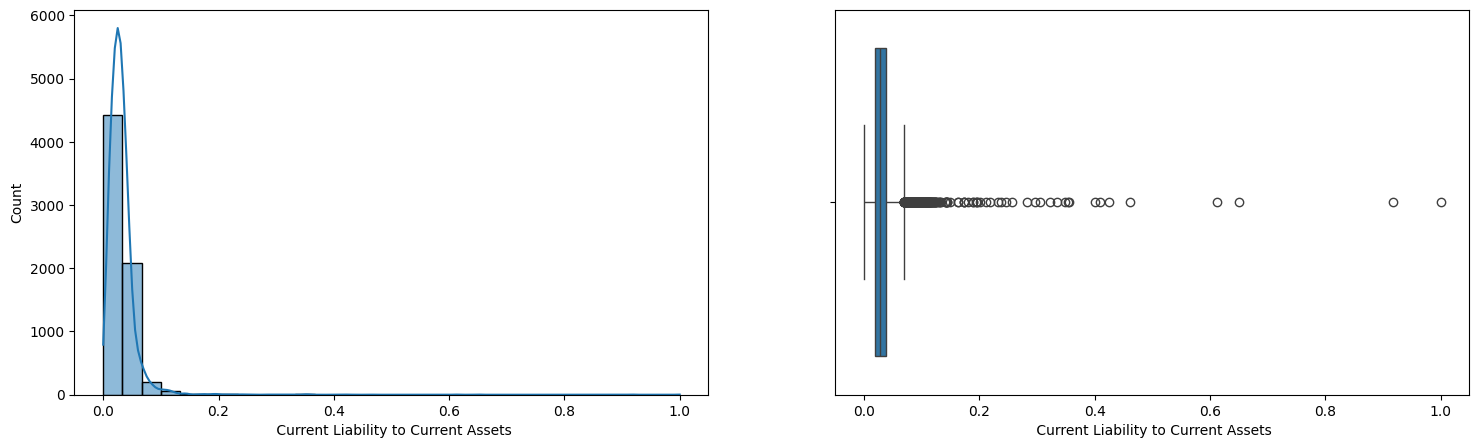

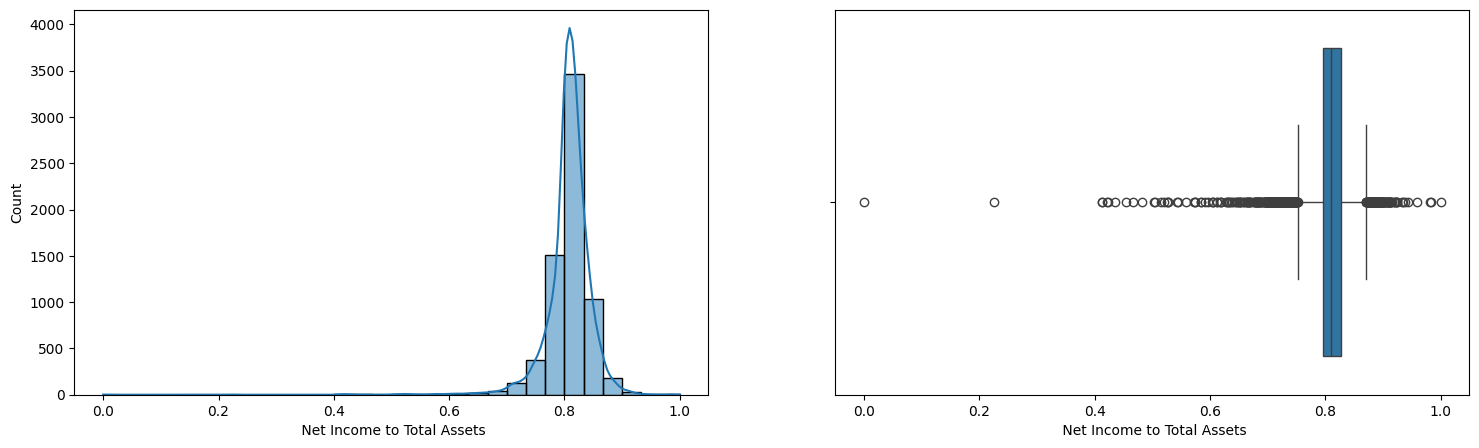

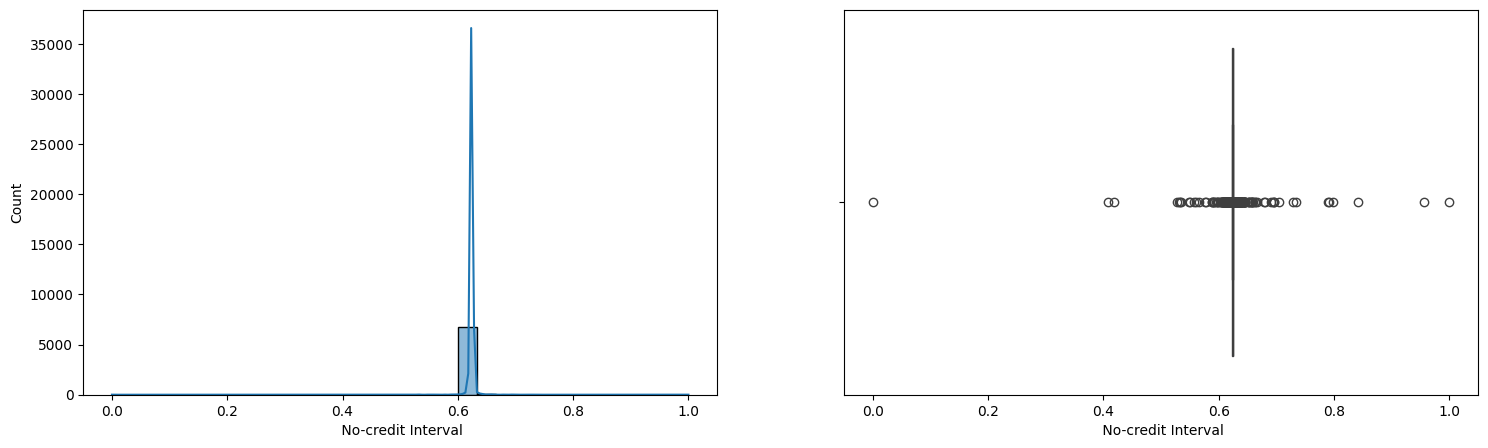

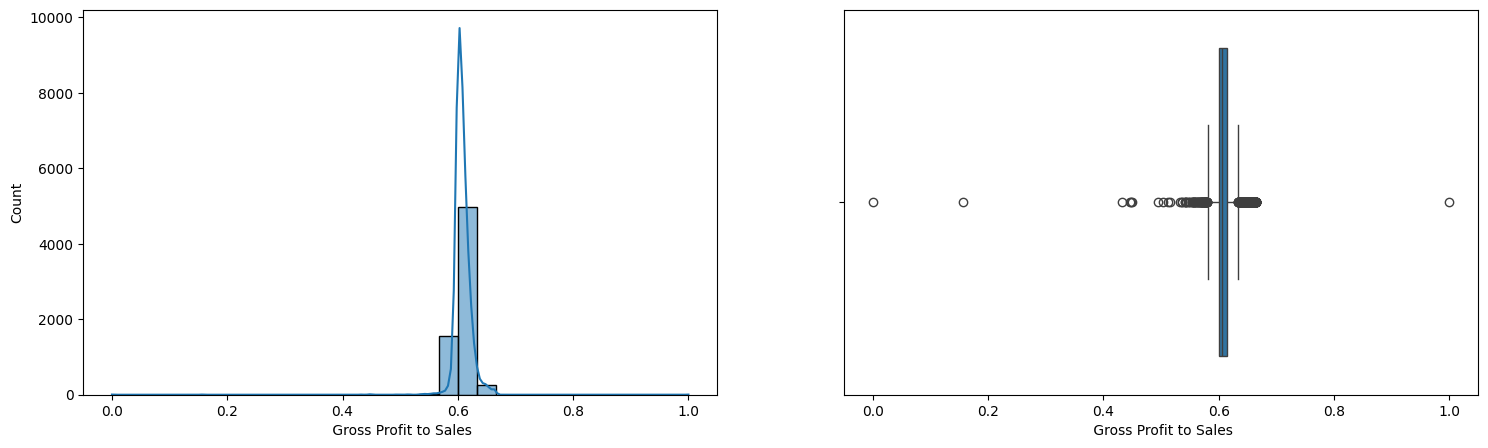

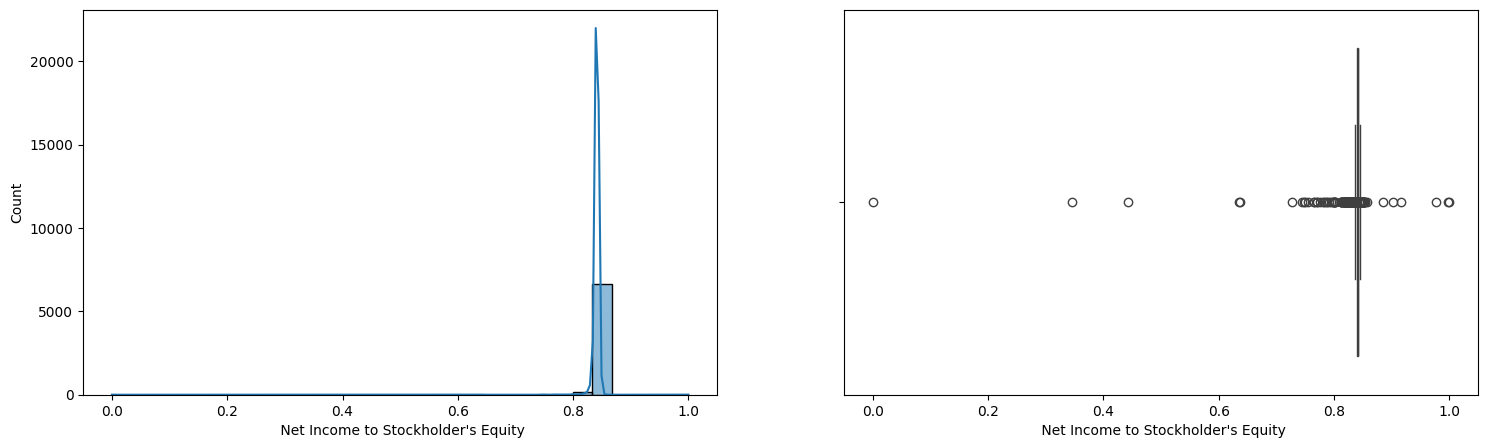

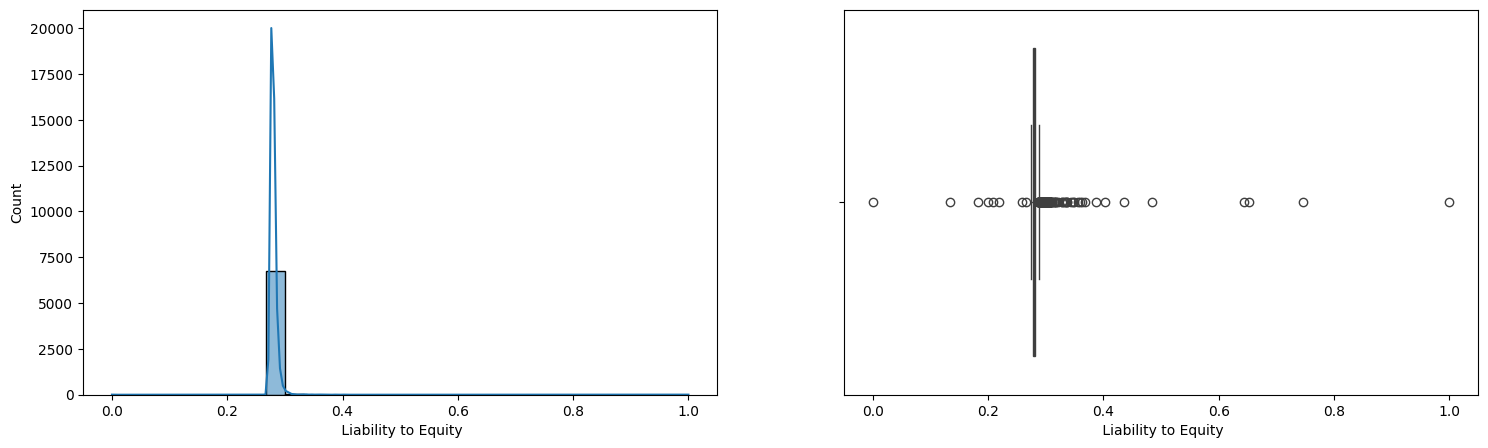

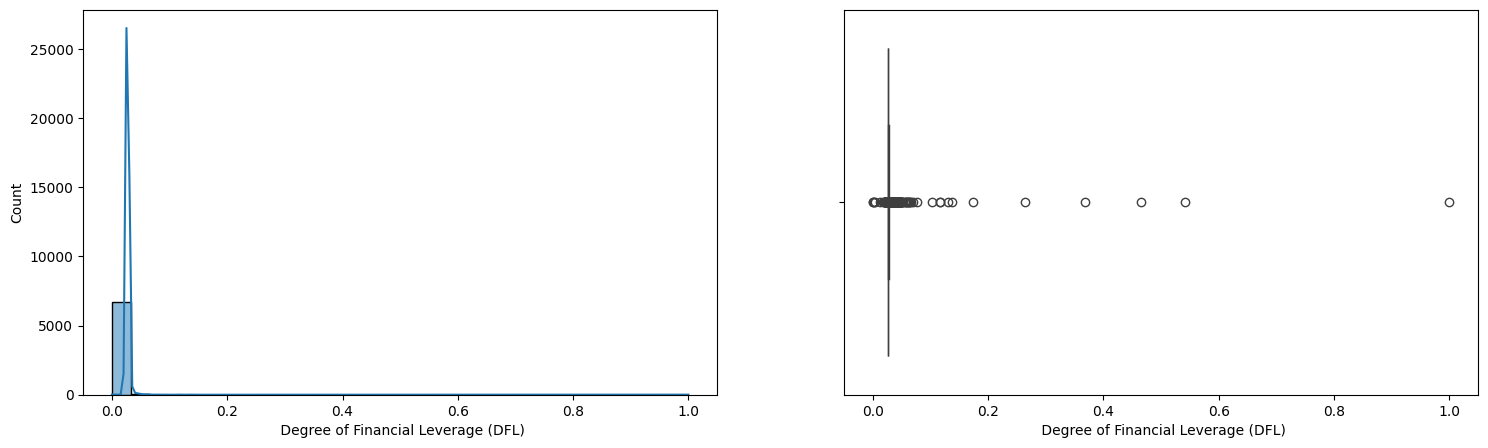

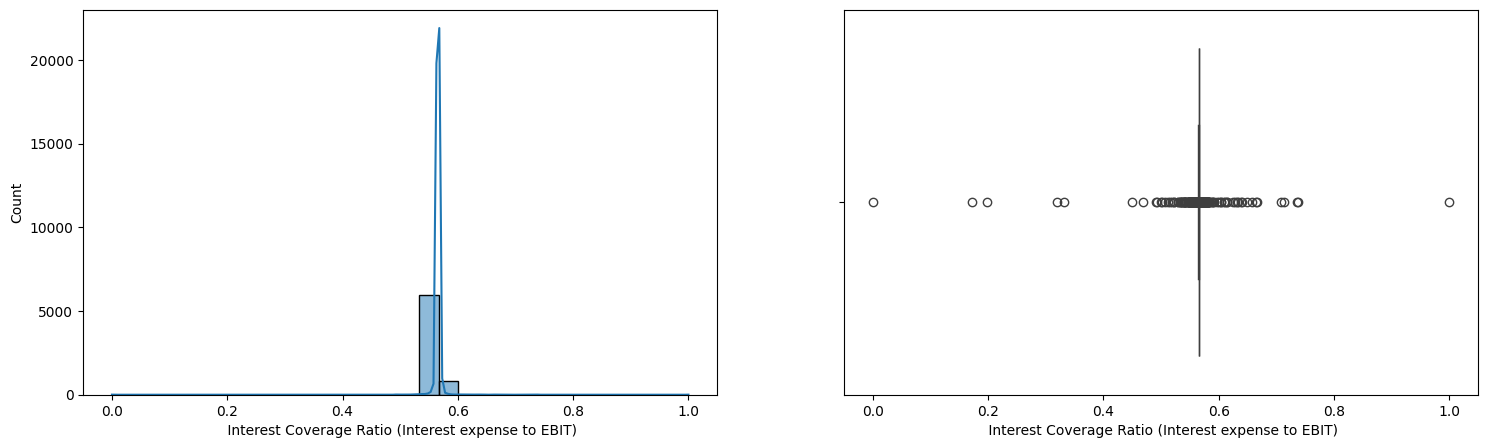

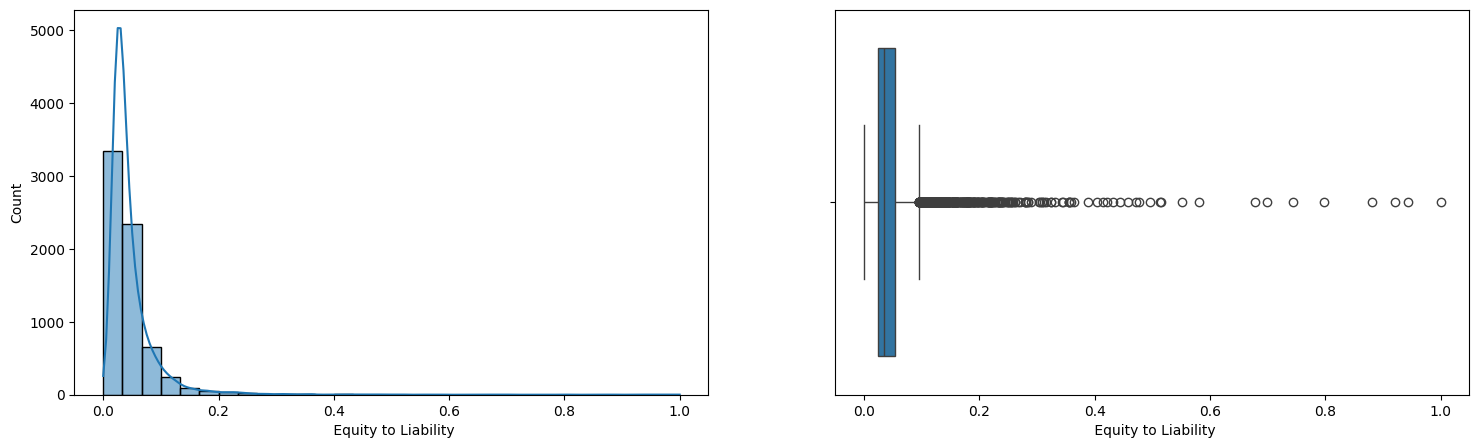

In [13]:
# visualize unit range continuous data
for col in unit_range_float_cols:
    fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data = cmp_bankrupt_df, x = col, kde = True, bins = 30)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.boxplot(data = cmp_bankrupt_df, x = col)
    plt.show()
    fig.clear()
    plt.close(fig)

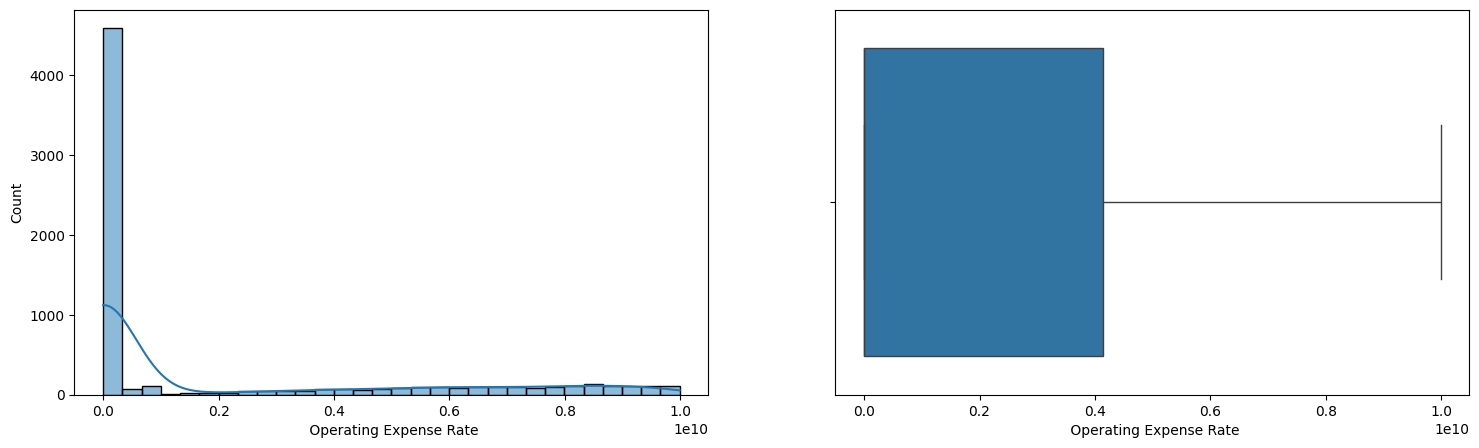

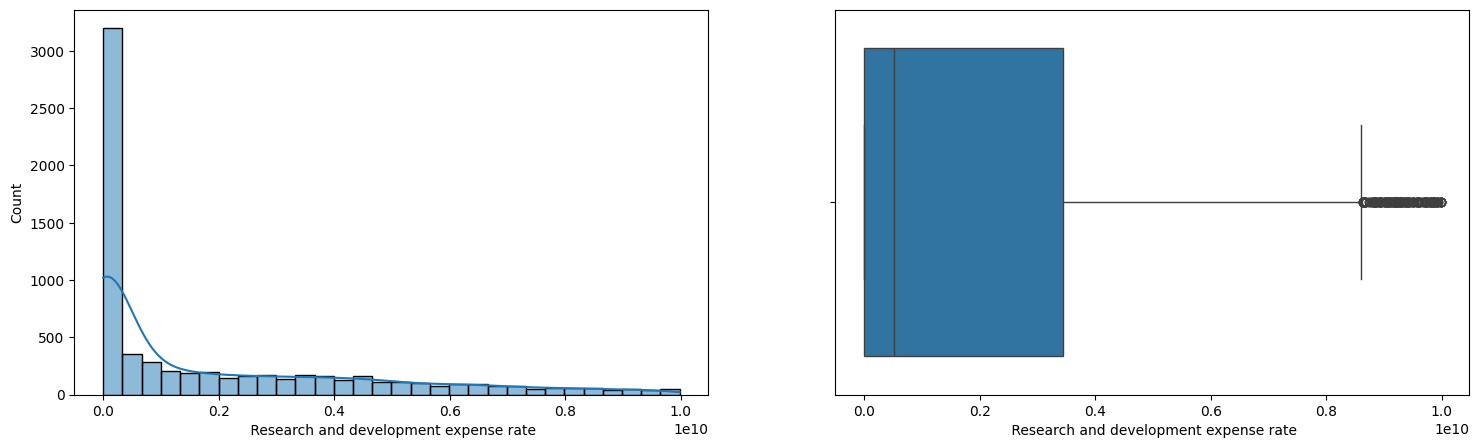

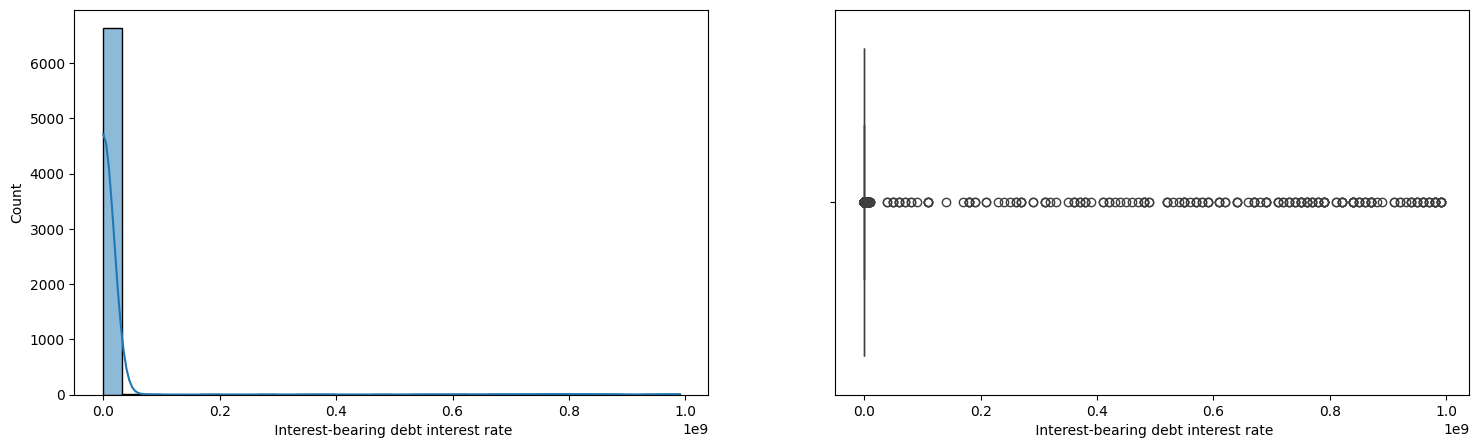

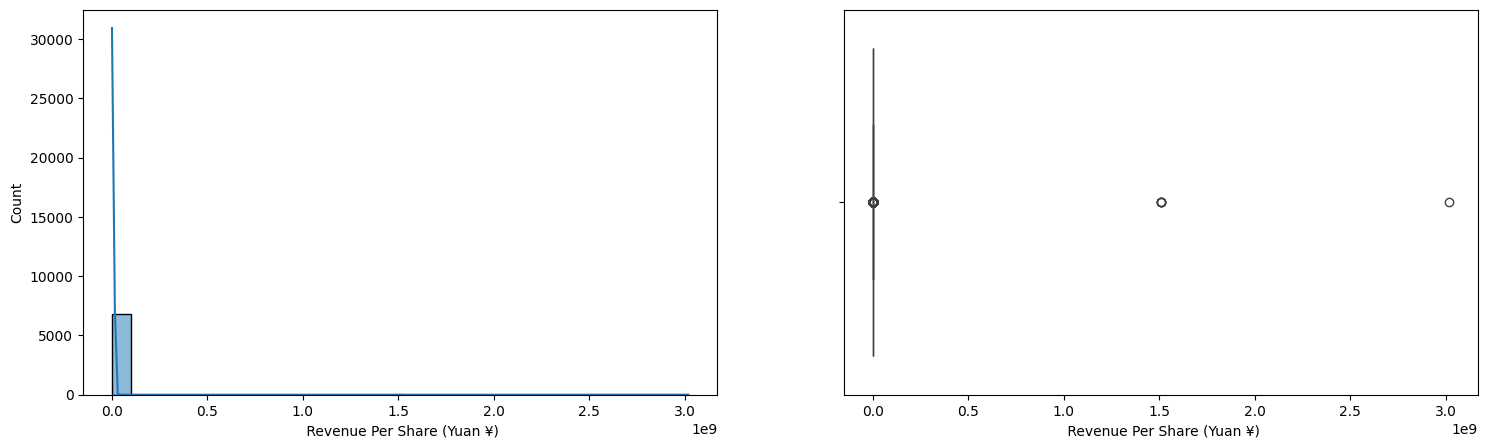

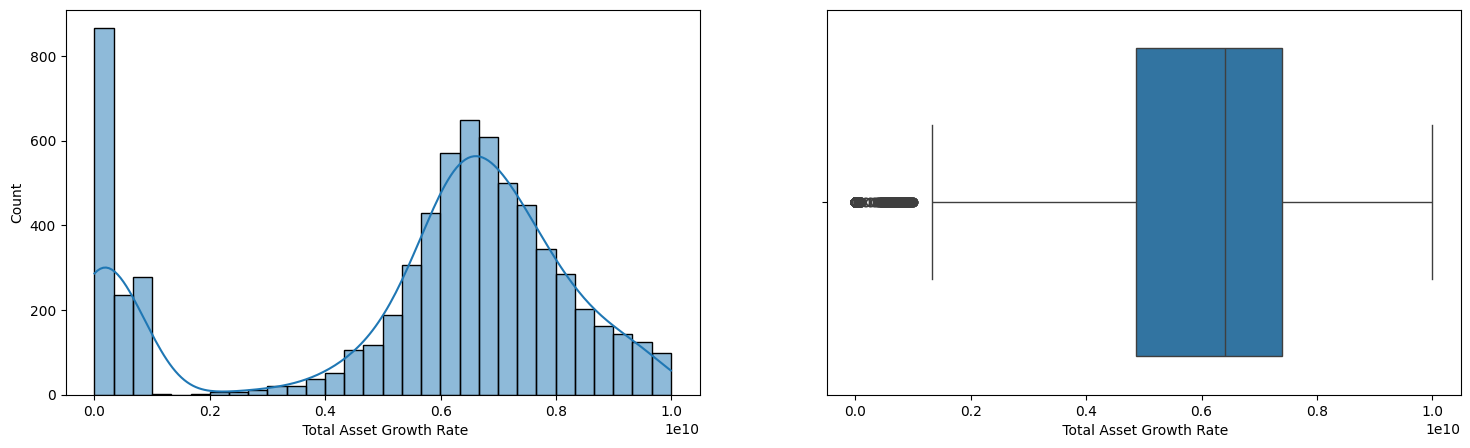

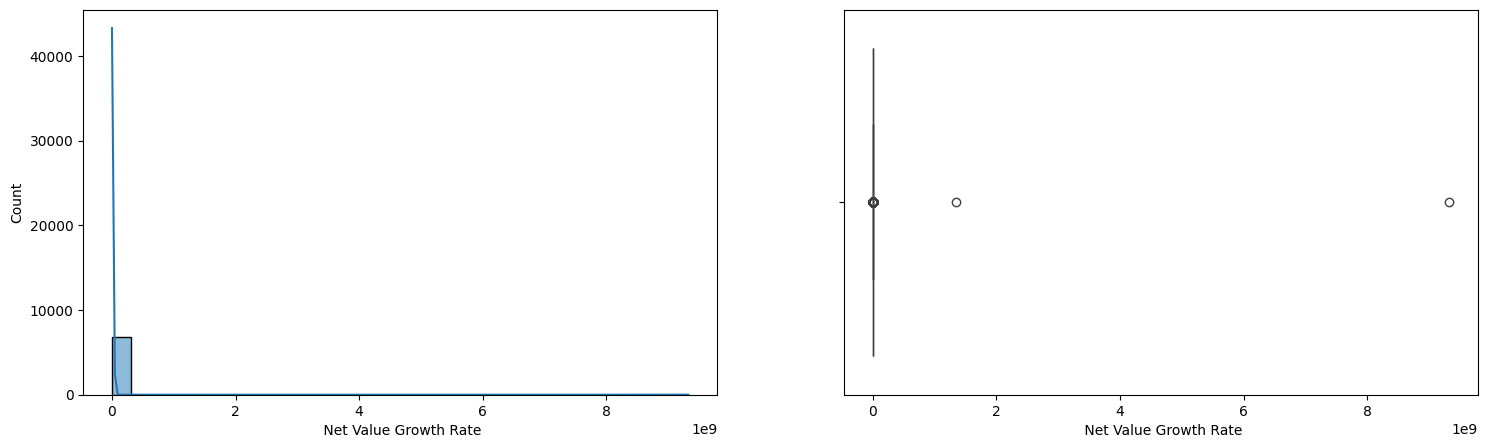

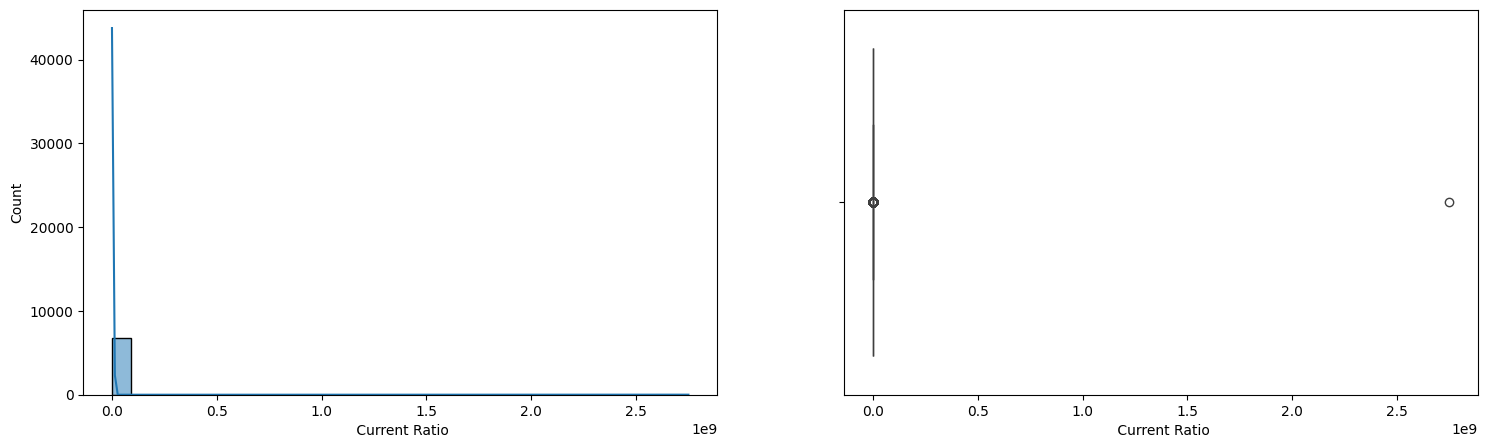

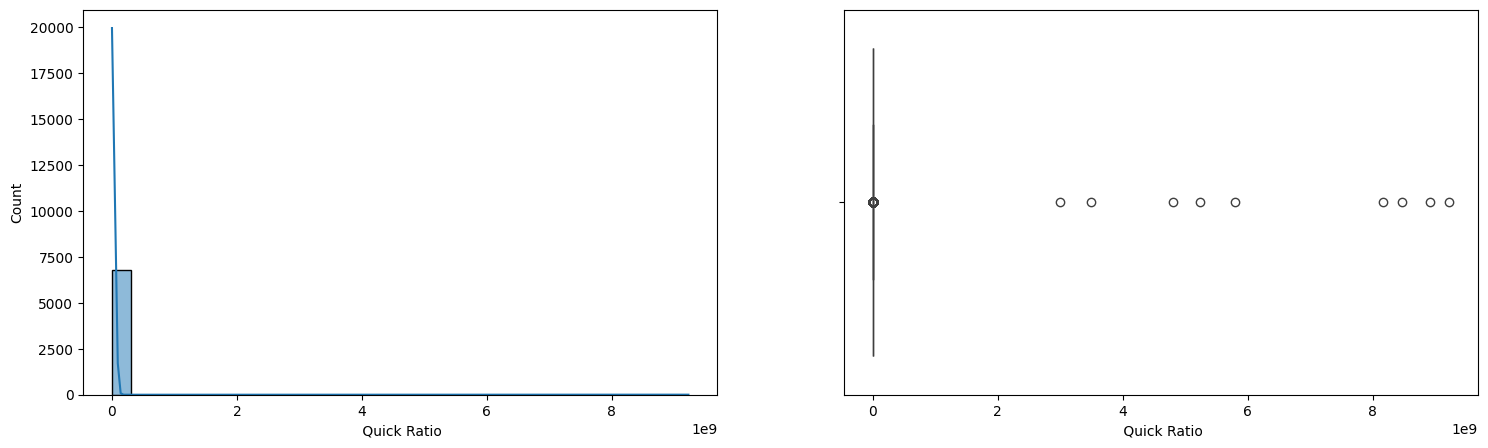

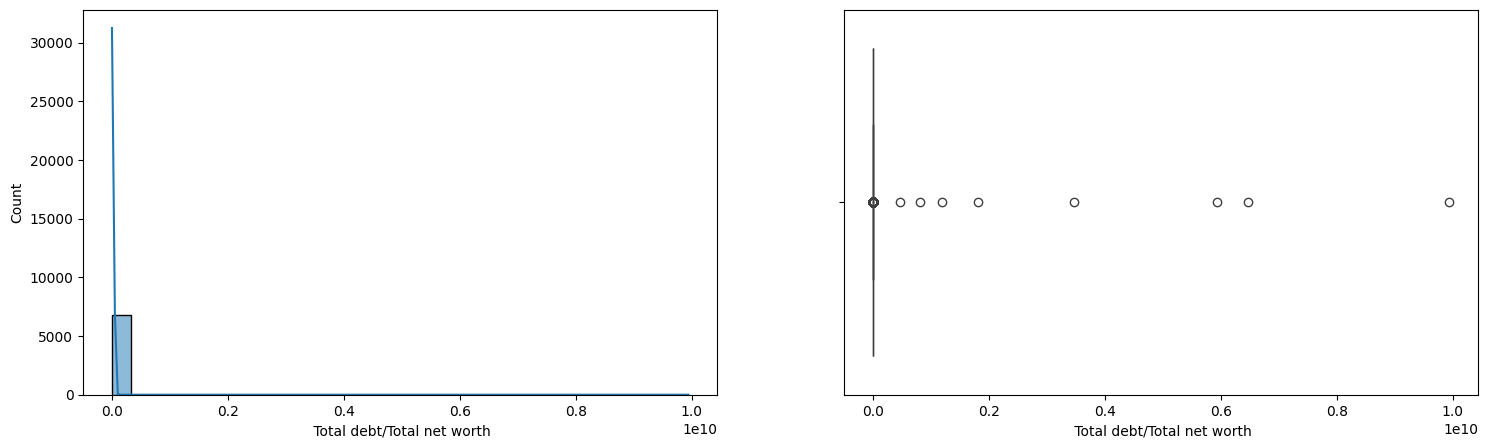

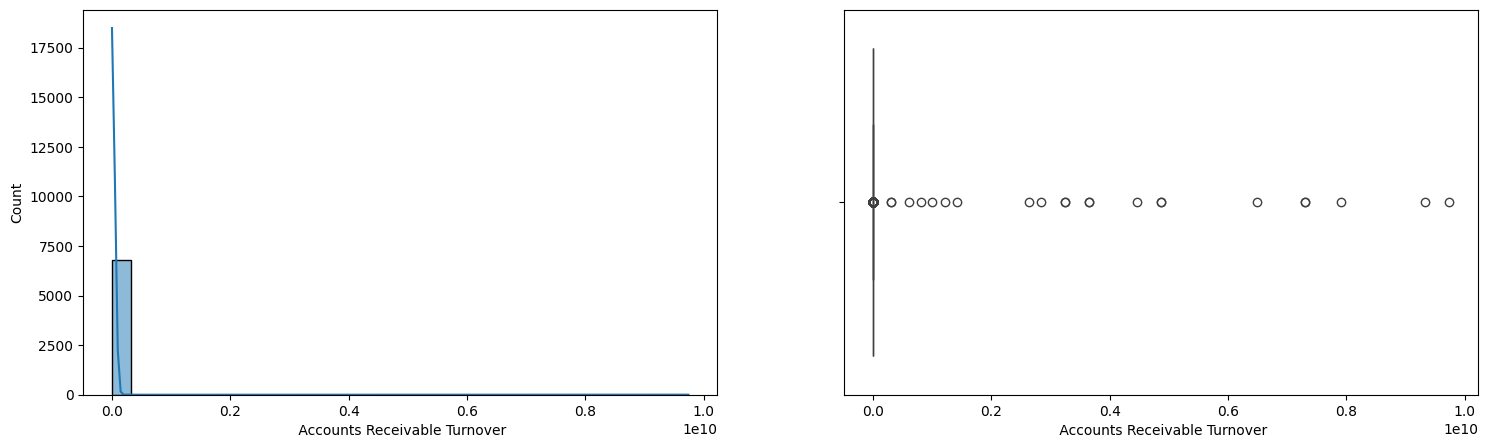

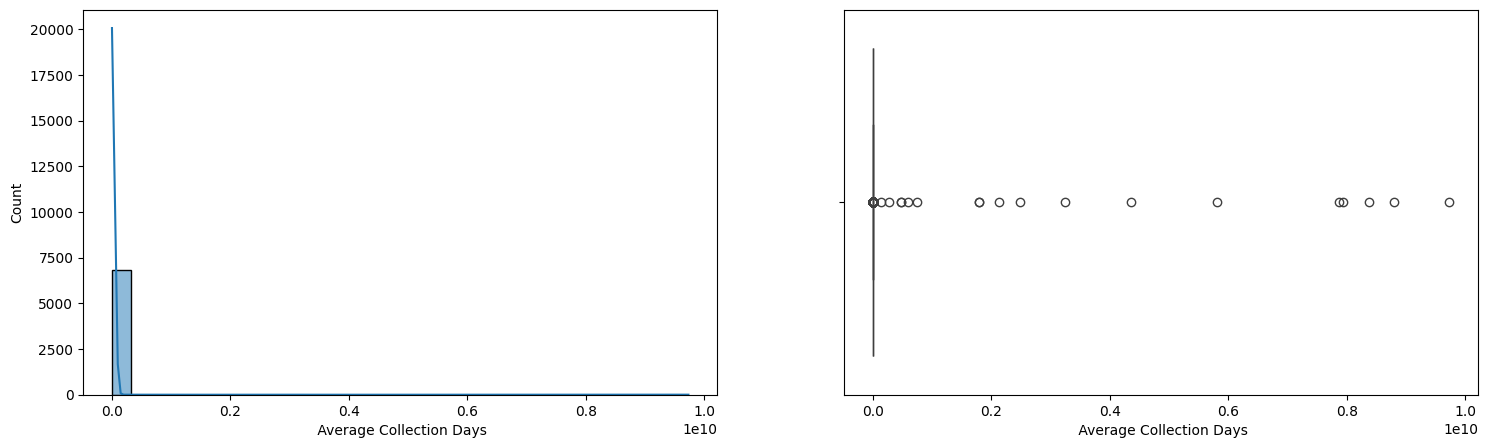

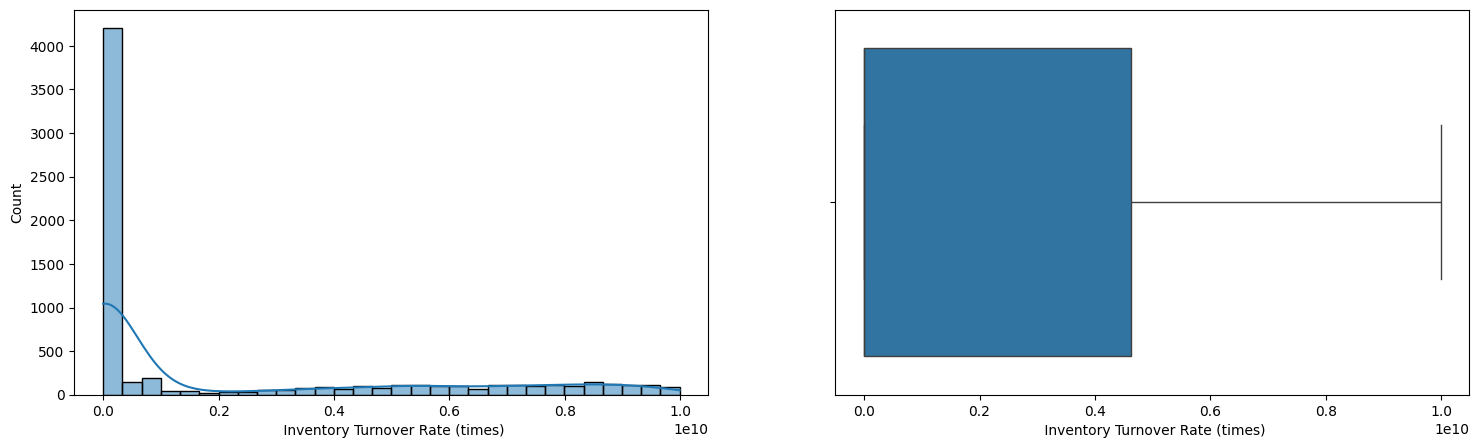

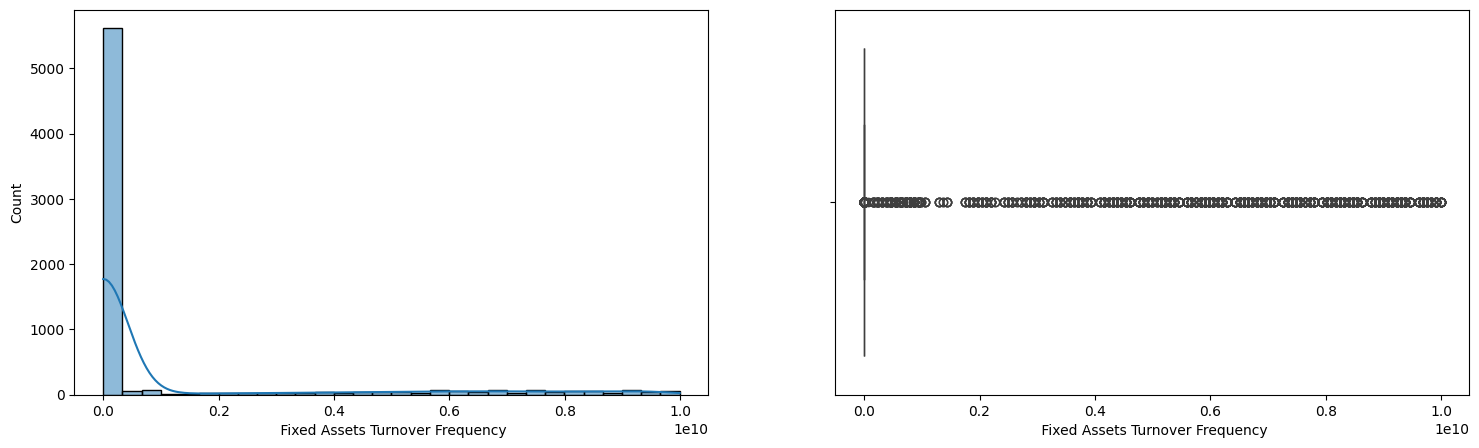

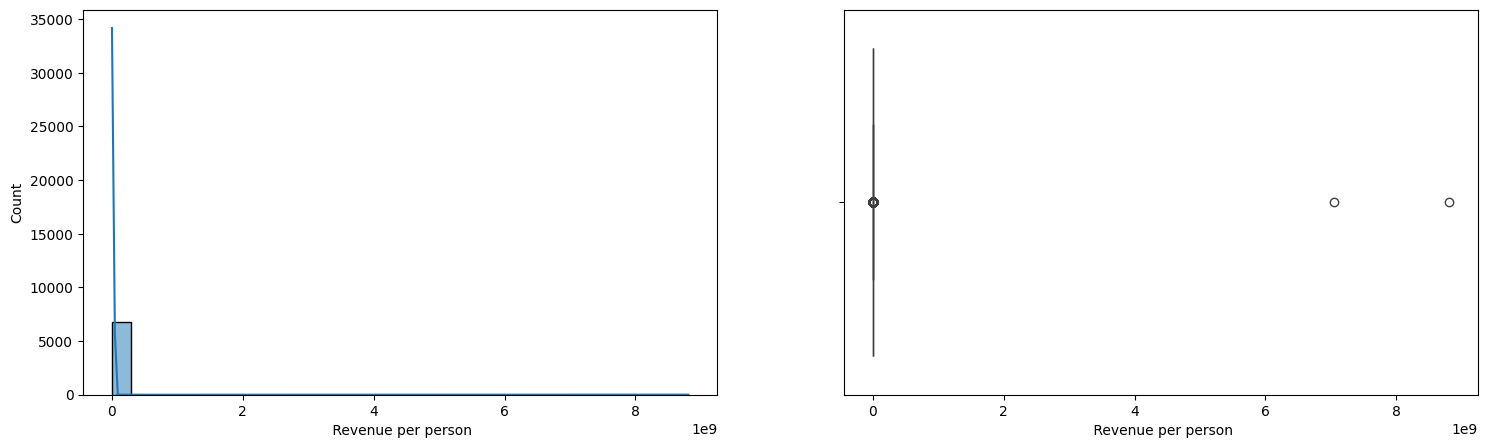

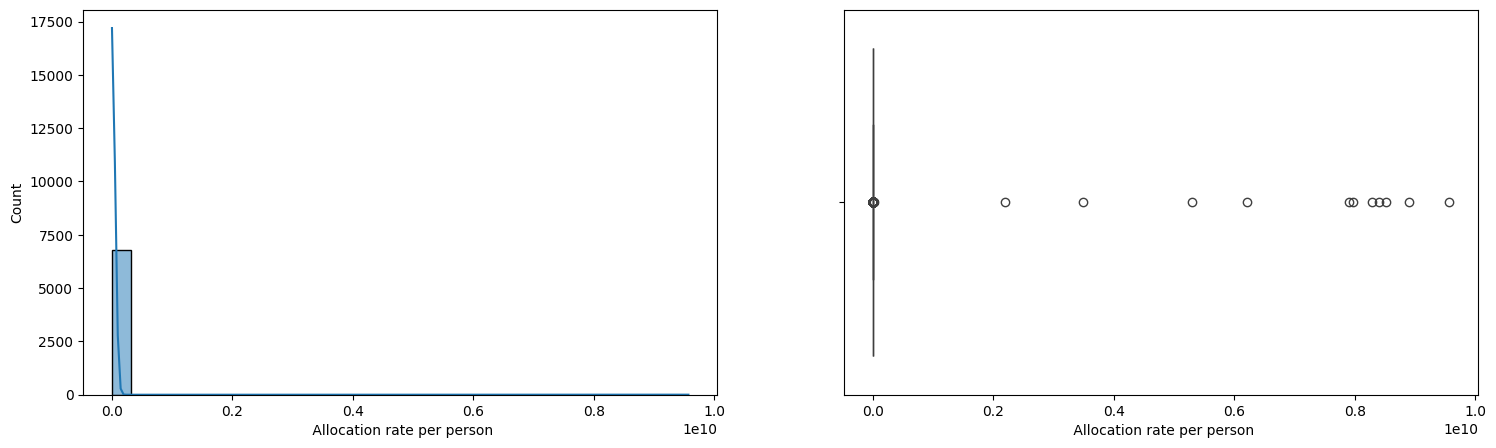

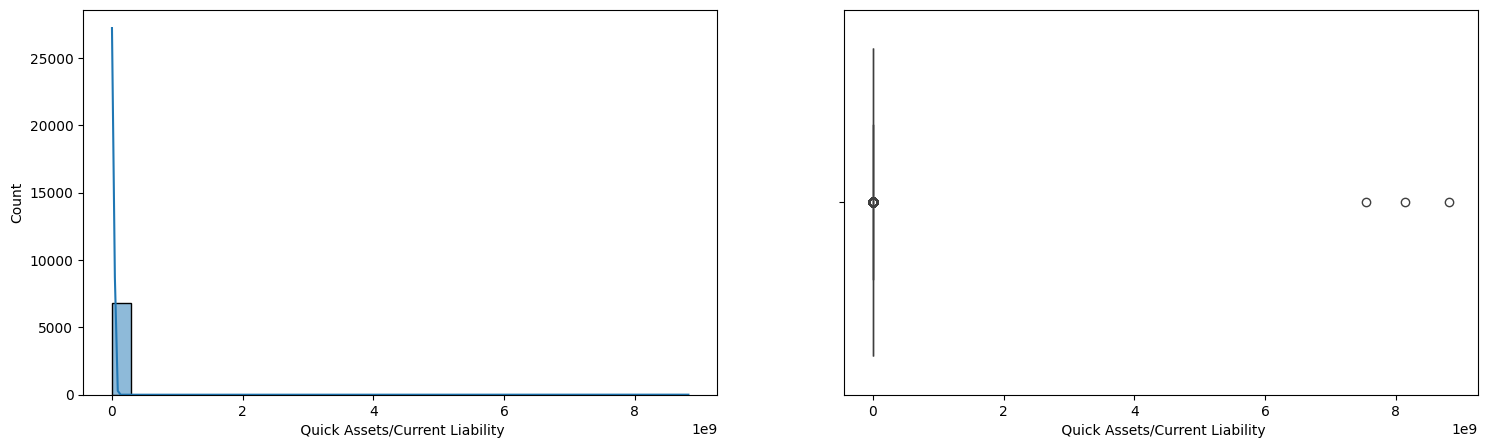

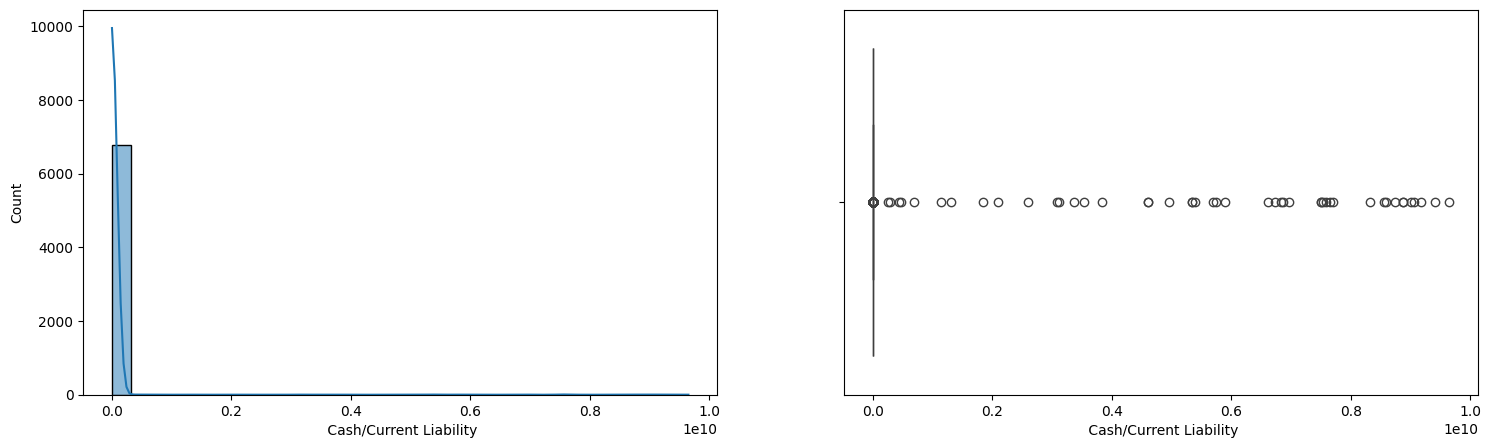

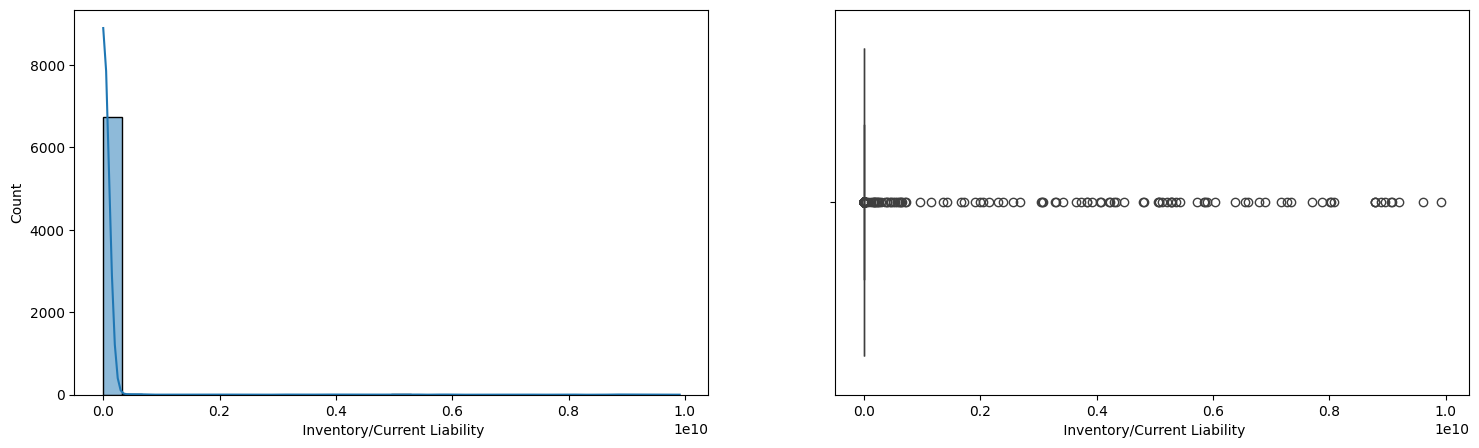

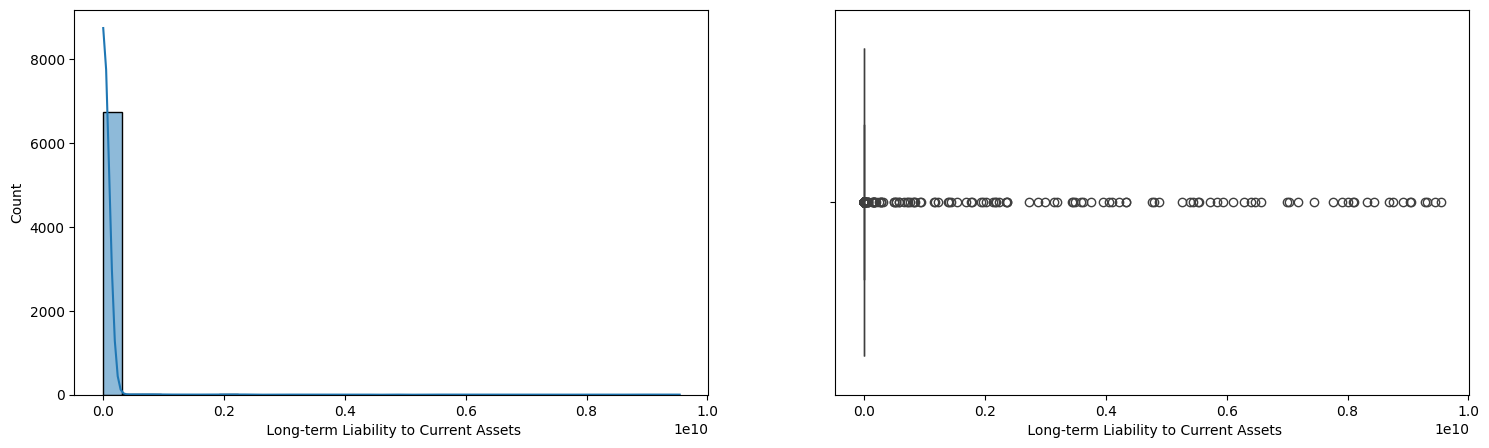

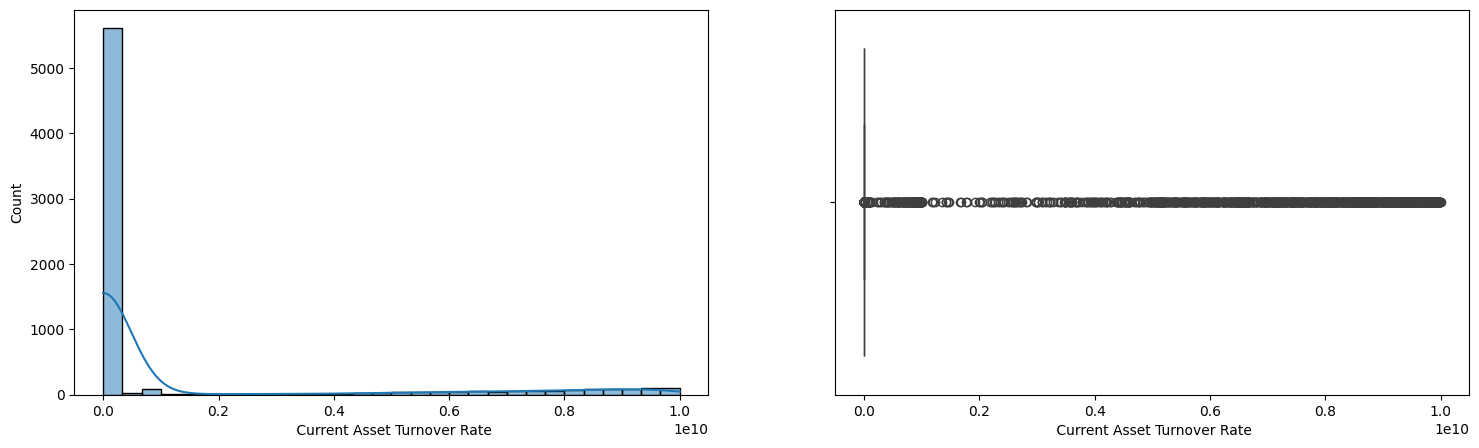

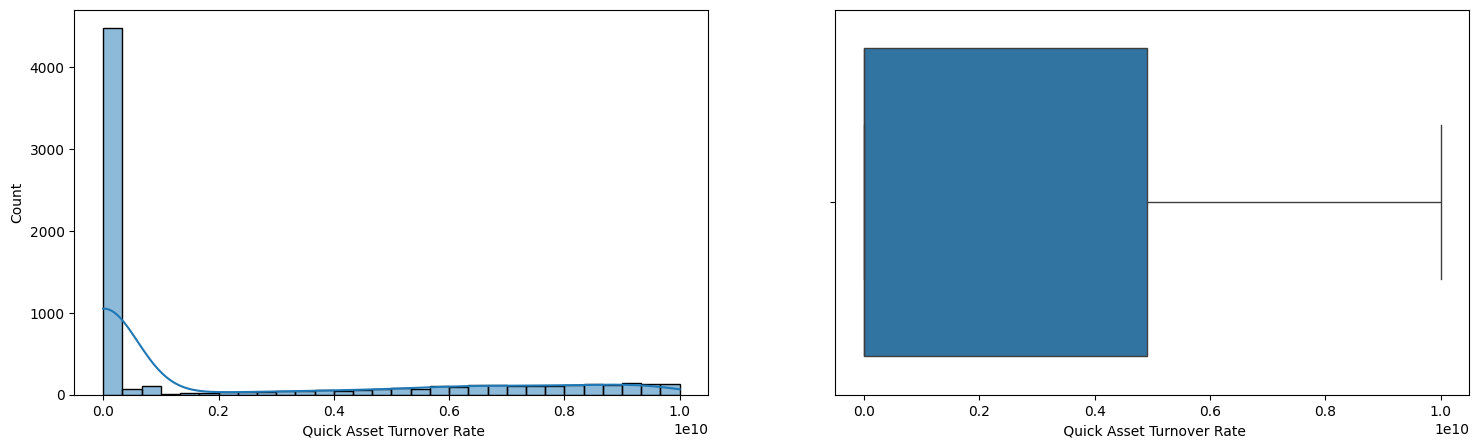

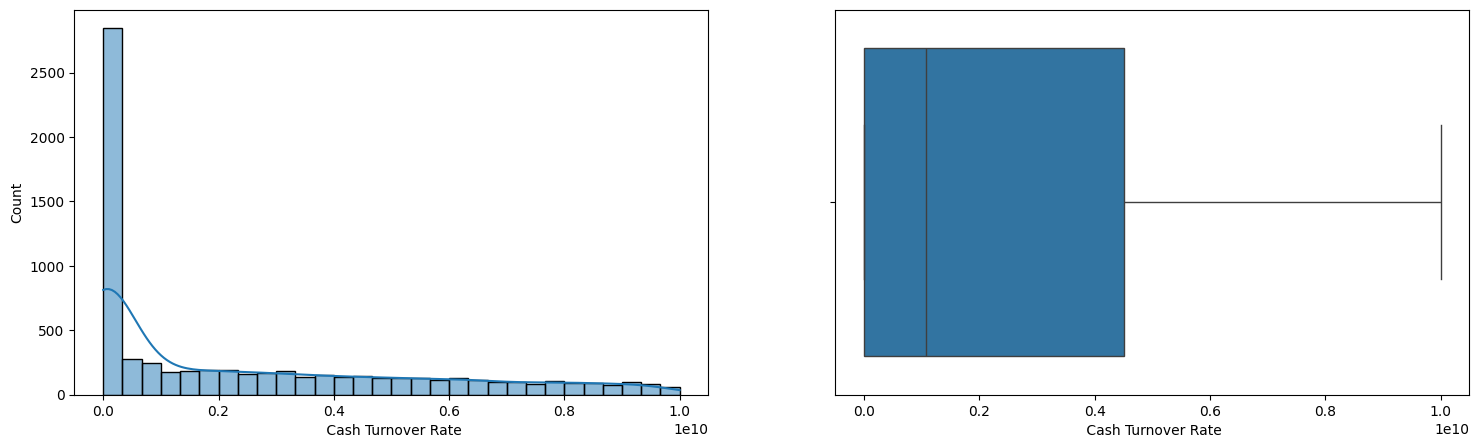

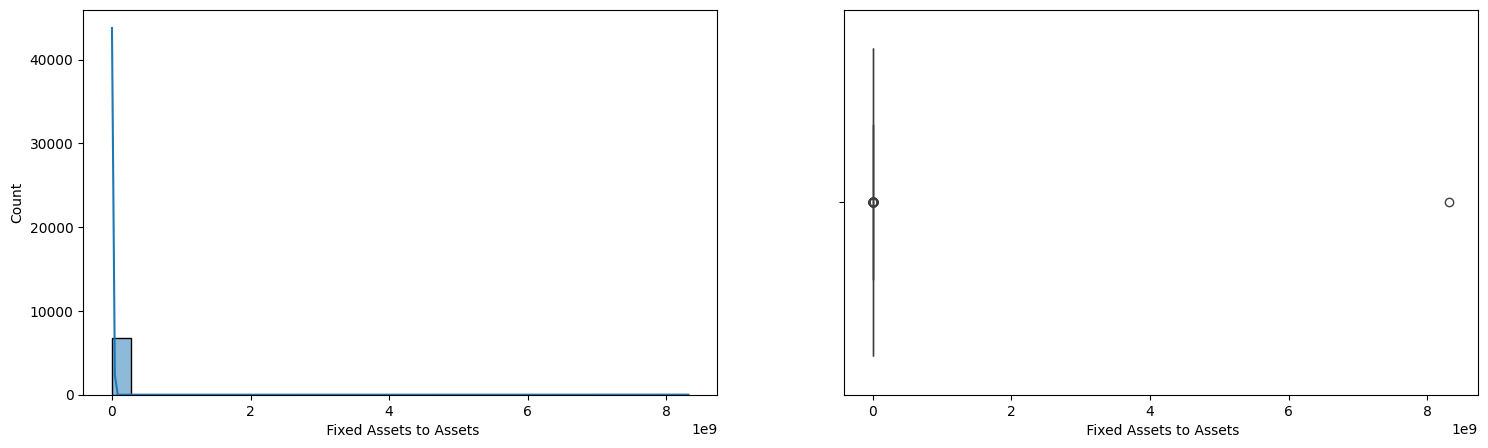

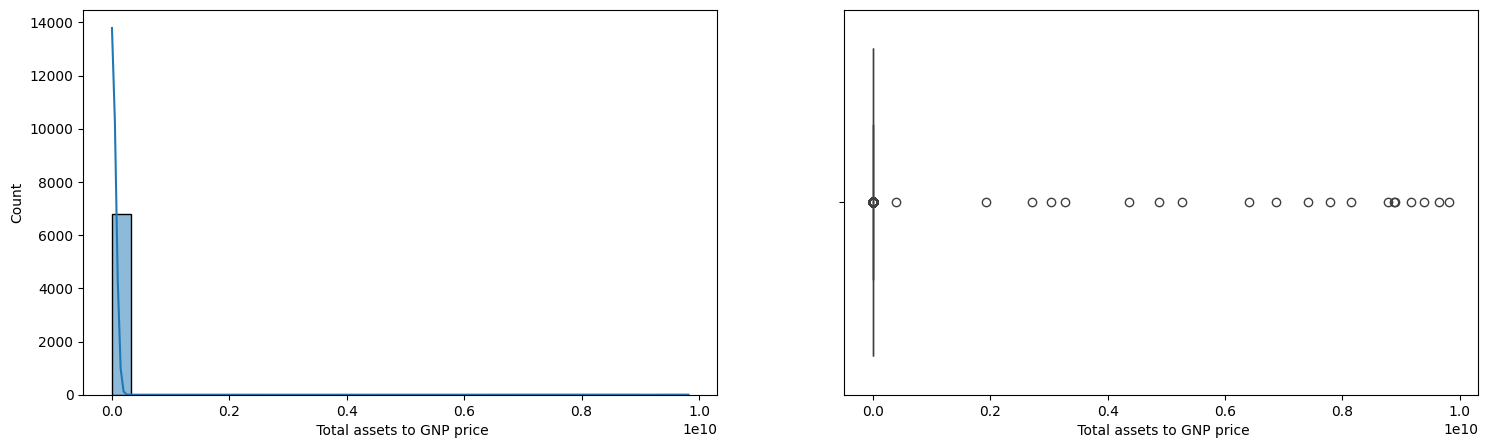

In [14]:
# visualize other range continuous data
for col in other_range_float_cols:
    fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data = cmp_bankrupt_df, x = col, kde = True, bins = 30)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.boxplot(data = cmp_bankrupt_df, x = col)
    plt.show()
    fig.clear()
    plt.close(fig)

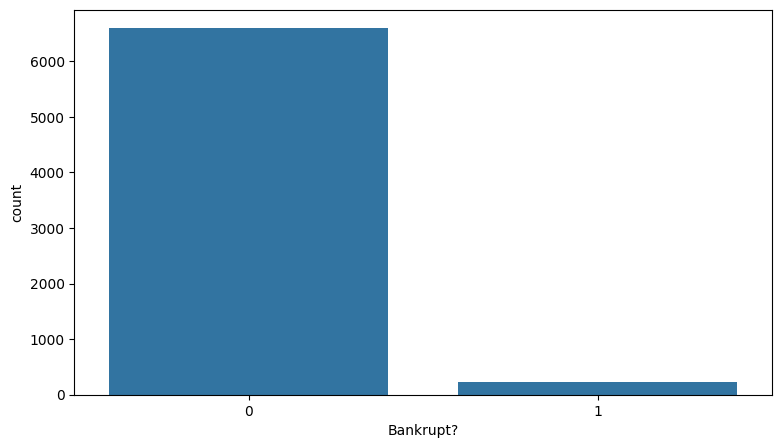

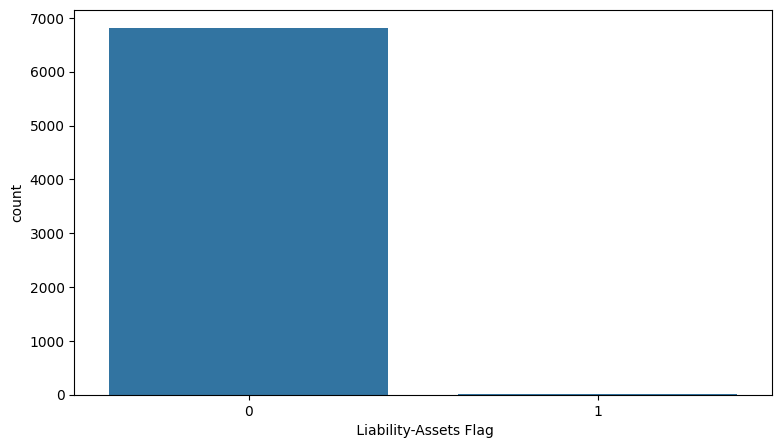

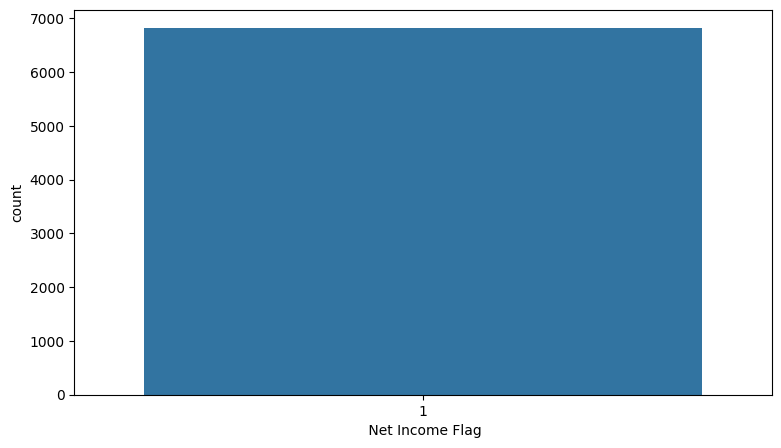

In [15]:
# visualize categorigal data
for col in int_cols:
    fig = plt.figure(num = 1, figsize = (9, 5), clear = True)
    ax = fig.add_subplot(1, 1, 1)
    ax = sns.countplot(data = cmp_bankrupt_df, x = col)
    plt.show()
    fig.clear()
    plt.close(fig)

Net Income Flag is always 1, remove since it provides no information

In [16]:
cmp_bankrupt_df_no_NIF = cmp_bankrupt_df.drop(' Net Income Flag', axis = 1)

#### 2.3.2 Multivariate Analysis

apply hierarchical clustering for better visualization of correlations

In [17]:
# function for hierarchical clustering
def hierarchical_corr_clustering(df_corr, target_col, threshold):
    # perform hierarchical clustering
    dissimilarity = 1 - abs(df_corr)
    Z = linkage(squareform(dissimilarity), 'complete')

    # determine number of clusters by setting a threshold
    labels = fcluster(Z, threshold, criterion='distance')

    # rename labels such that the biggest/smallest cluster has the lowest/highest label number
    label_counts = pd.Series(labels).value_counts()
    labels_unique_sort_by_counts = label_counts.index.values
    labels_renamed_by_cluster_size = np.argsort(labels_unique_sort_by_counts)[labels-1]

    # rearrange correlation matrix by clusters
    sorted_corr_idx = np.argsort(labels_renamed_by_cluster_size)
    df_corr_clustered = df_corr.iloc[sorted_corr_idx, sorted_corr_idx]

    # get highest absolute correlation to target_col per cluster
    labels_series_sorted = pd.Series(labels_renamed_by_cluster_size[sorted_corr_idx], name = 'labels')
    target_corr_clustered_abs = df_corr_clustered[target_col].abs()
    labels_series_sorted.index = target_corr_clustered_abs.index
    target_corr_abs_w_label = pd.concat([target_corr_clustered_abs, labels_series_sorted], axis = 1)
    target_corr_abs_max_by_cluster_idx = target_corr_abs_w_label.groupby('labels')[target_col].idxmax().values
    target_corr_abs_max_by_cluster = target_corr_clustered_abs[target_corr_abs_max_by_cluster_idx].sort_values(ascending = False).drop(target_col)

    return df_corr_clustered, target_corr_abs_max_by_cluster

In [18]:
# get correlation matrix and perform hierarchical clustering
cmp_df_corr = cmp_bankrupt_df_no_NIF.corr()
df_corr_clustered, target_corr_abs_max_by_cluster = hierarchical_corr_clustering(cmp_df_corr, 'Bankrupt?', 0.5)

<Axes: >

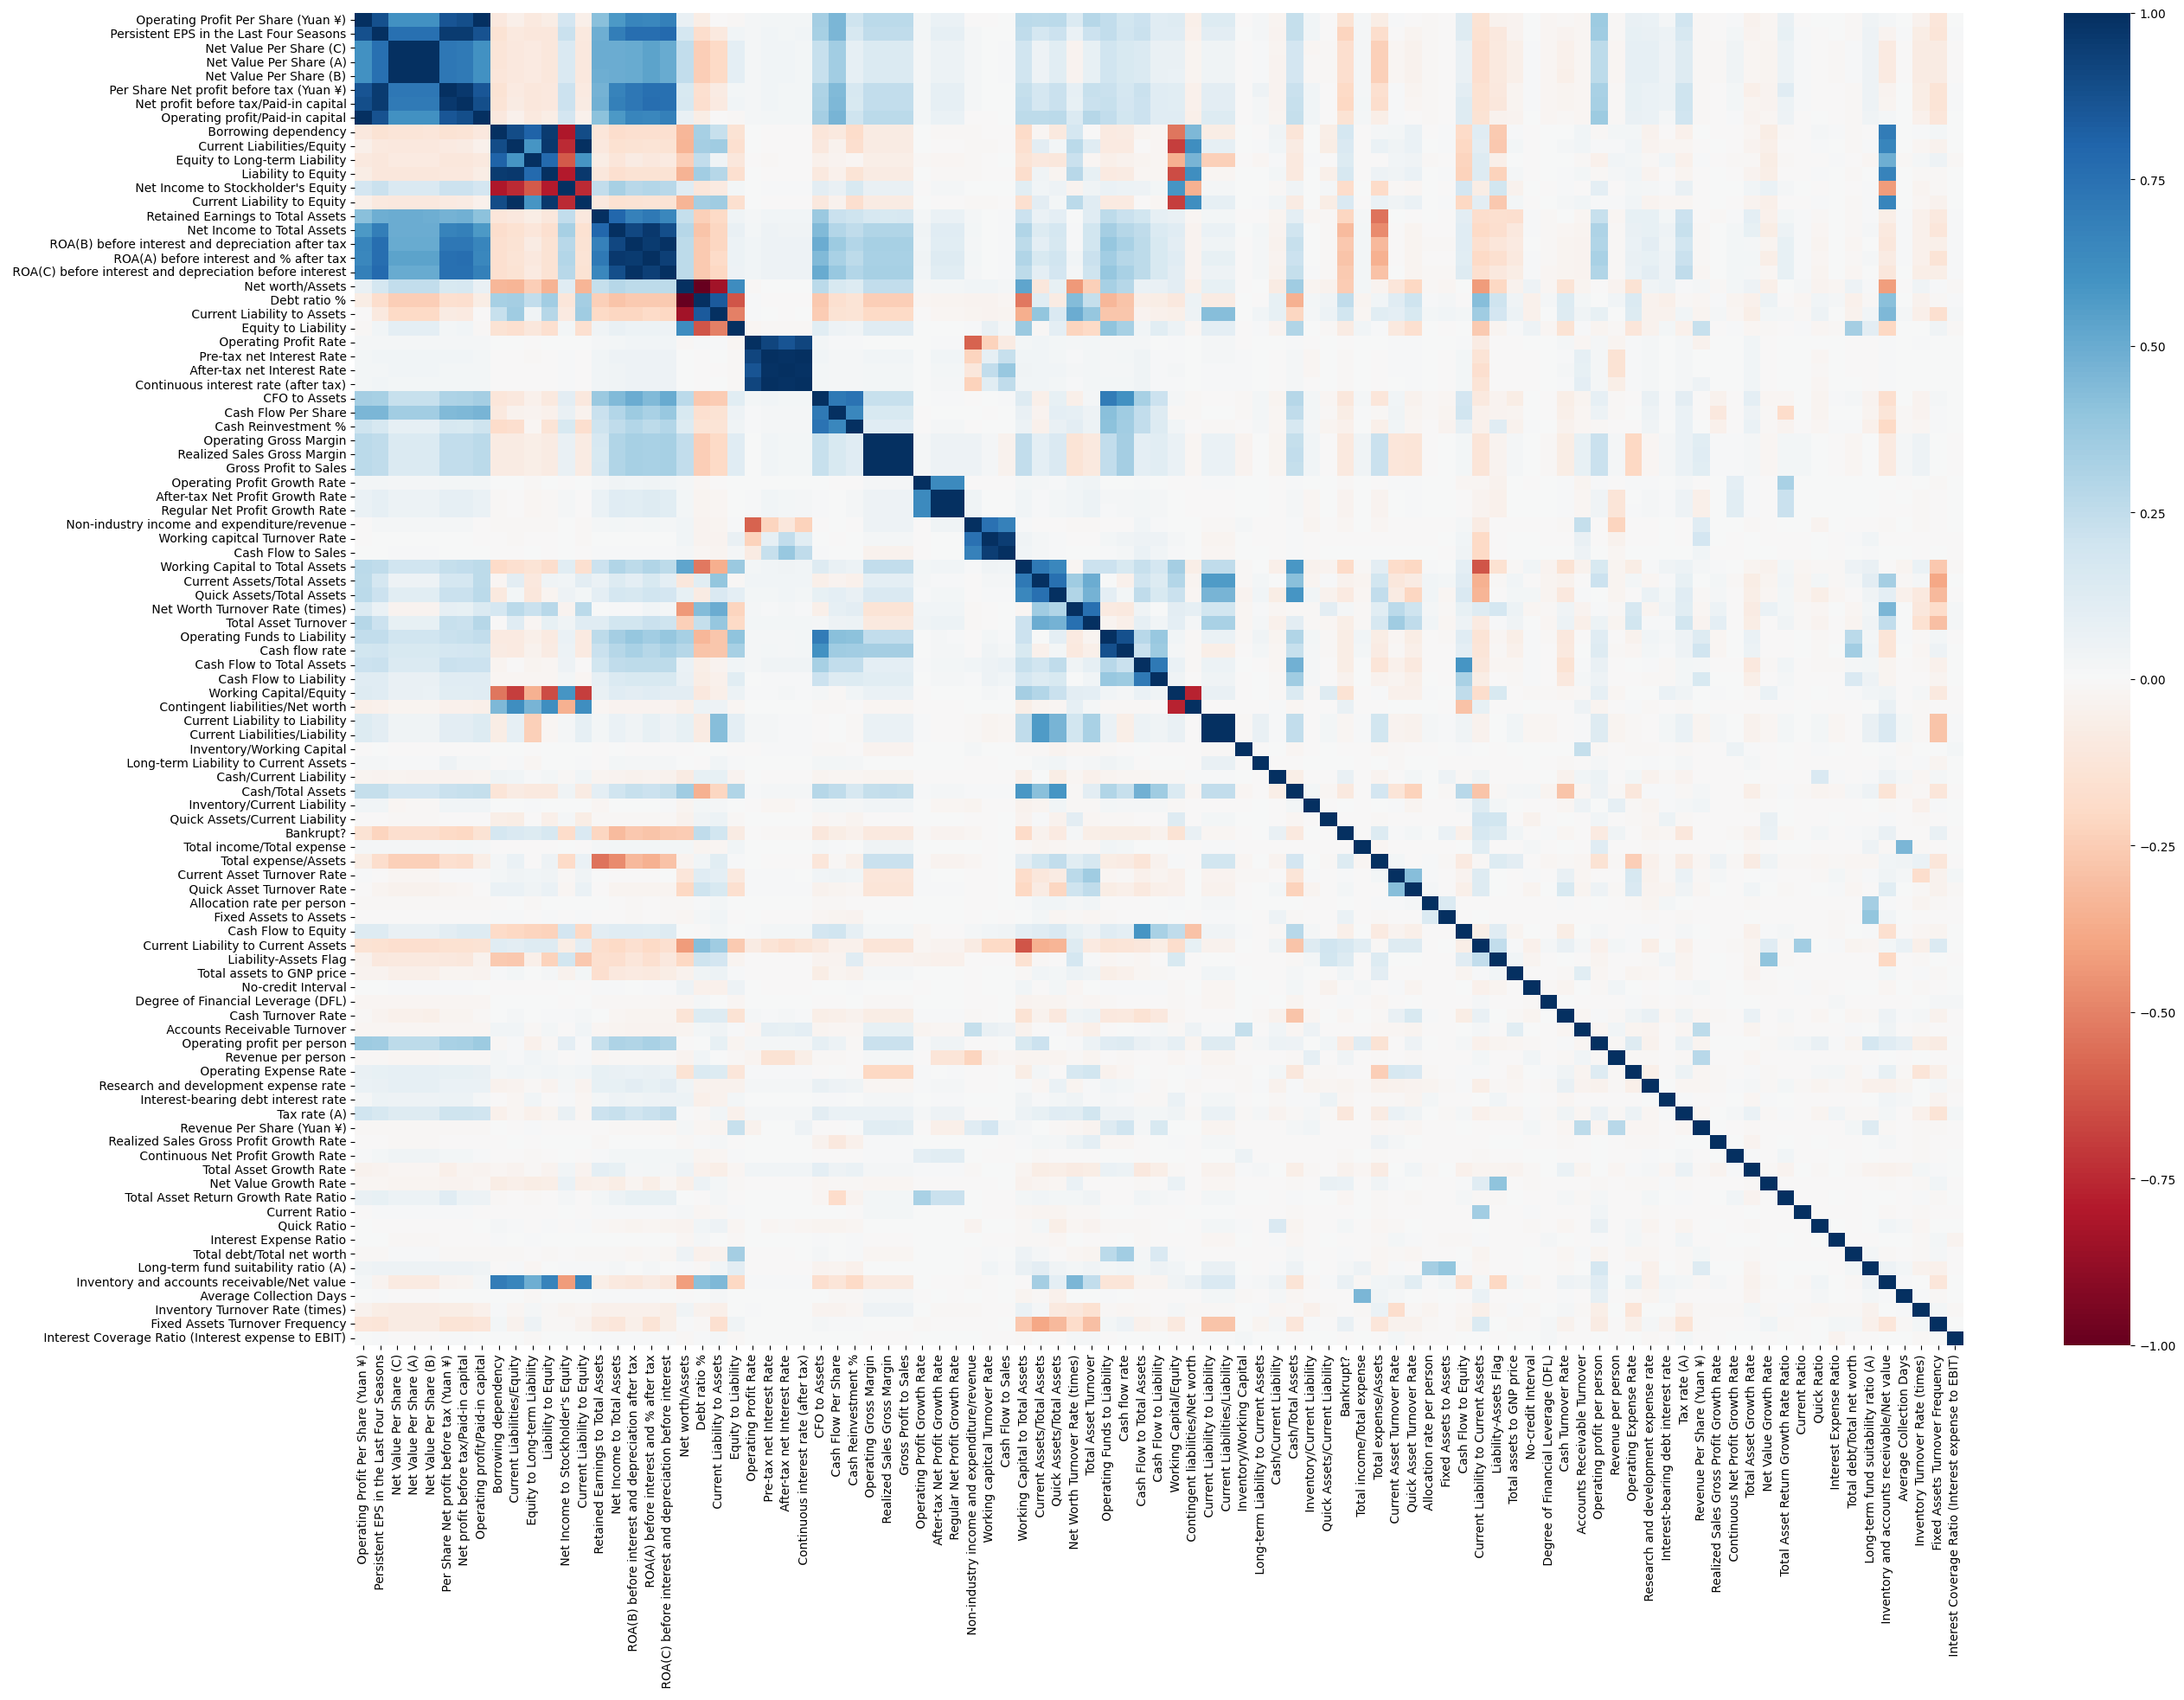

In [19]:
# show correlations
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr_clustered, cbar=True, cmap='RdBu', vmin = -1, vmax = 1)

In [20]:
# show sorted correlation to 'Bankrupt?'
target_corr = cmp_df_corr['Bankrupt?'].sort_values().drop('Bankrupt?')
target_corr

Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets                                          -0.250161
Persistent EPS in the Last Four Seasons                   -0.219560
Retained Earnings to Total Assets                         -0.217779
Net profit before tax/Paid-in capital                     -0.207857
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Working Capital to Total Assets                           -0.193083
Net Income to Stockholder's Equity                        -0.180987
Net Value Per Share (A)                                   -0.165465
Net Value Per Share (B)                                   -0.165399
Net Value Per Share (C)                                   -0.164784
Working Capital/Equity                          

In [21]:
# show highest absolute correlation to 'Bankrupt?' per cluster
target_corr_abs_max_by_cluster

Net Income to Total Assets                            0.315457
Net worth/Assets                                      0.250161
Persistent EPS in the Last Four Seasons               0.219560
Working Capital to Total Assets                       0.193083
Net Income to Stockholder's Equity                    0.180987
Current Liability to Current Assets                   0.171306
Working Capital/Equity                                0.147221
Liability-Assets Flag                                 0.139212
Total expense/Assets                                  0.139049
CFO to Assets                                         0.115383
Tax rate (A)                                          0.109706
Cash/Total Assets                                     0.100130
Gross Profit to Sales                                 0.100044
Operating profit per person                           0.092842
Cash/Current Liability                                0.077921
Operating Funds to Liability                          0

show plots of data based on 'Bankrupt?'

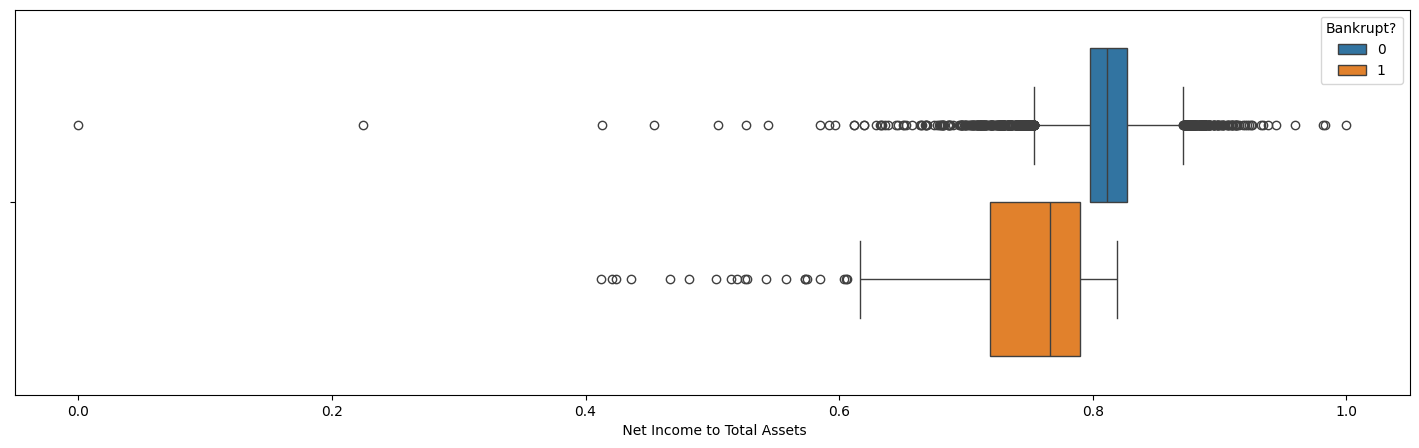

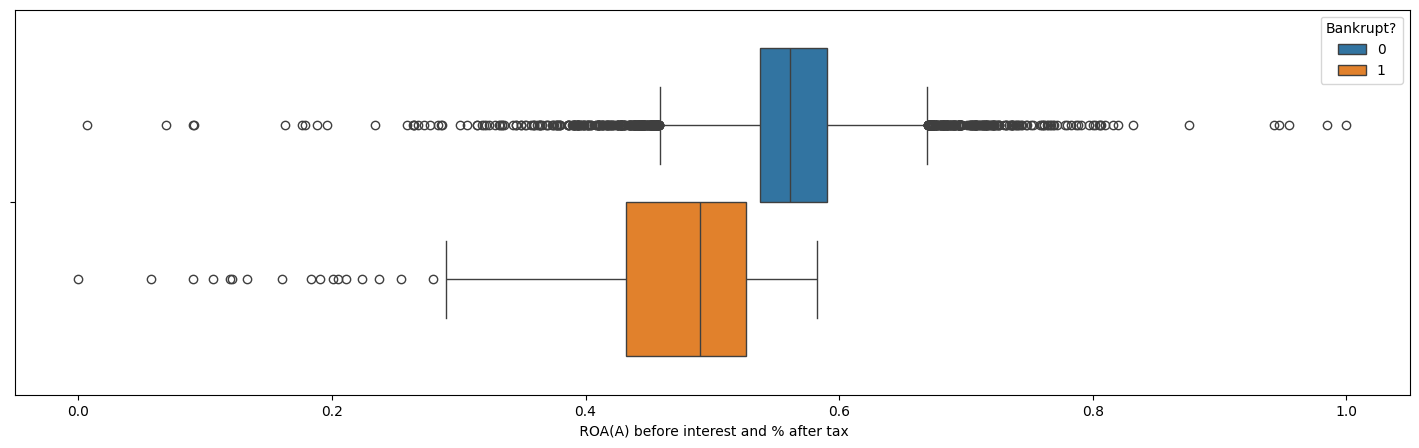

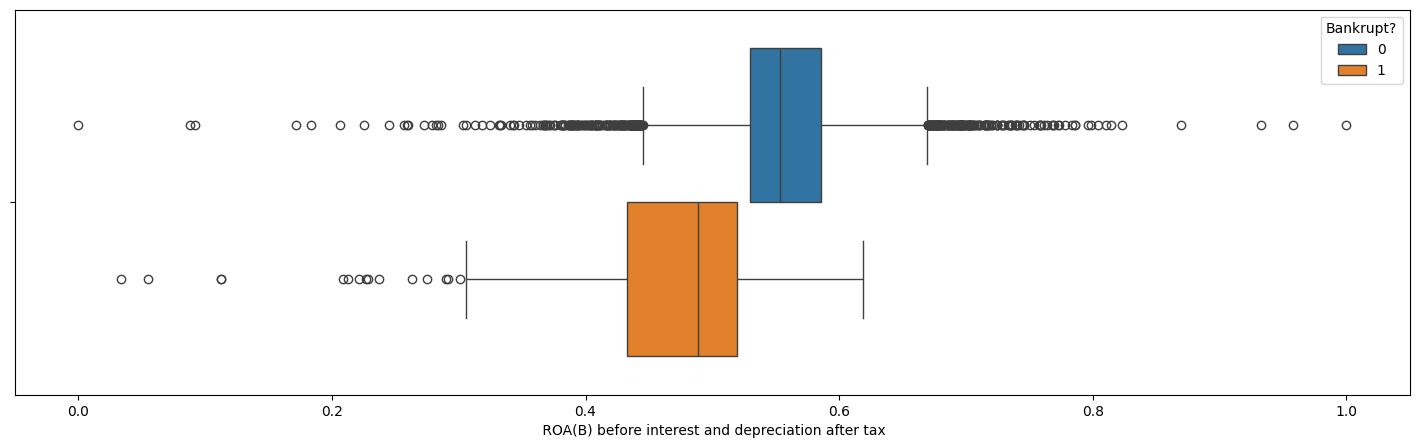

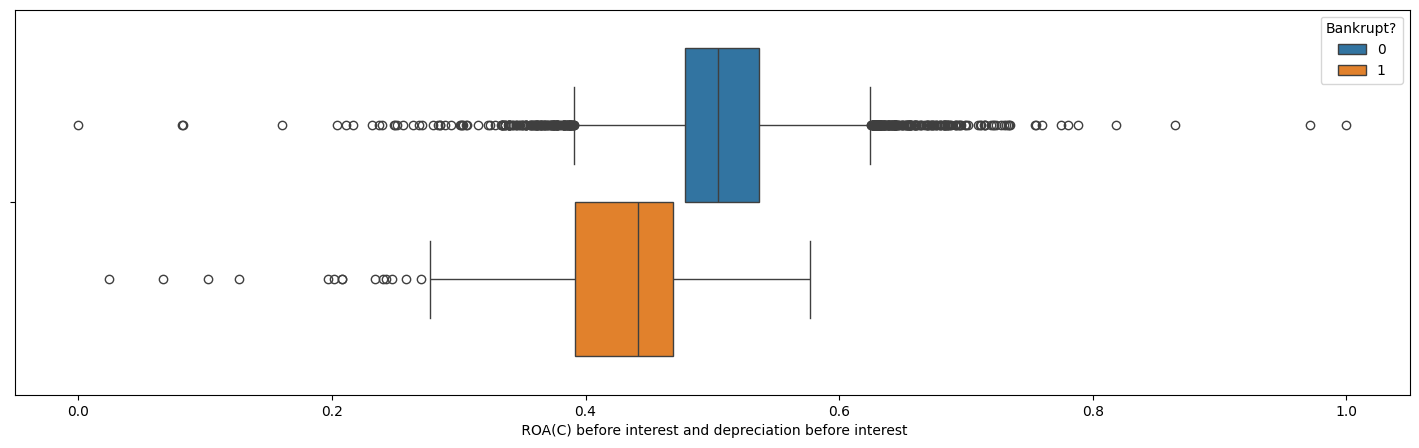

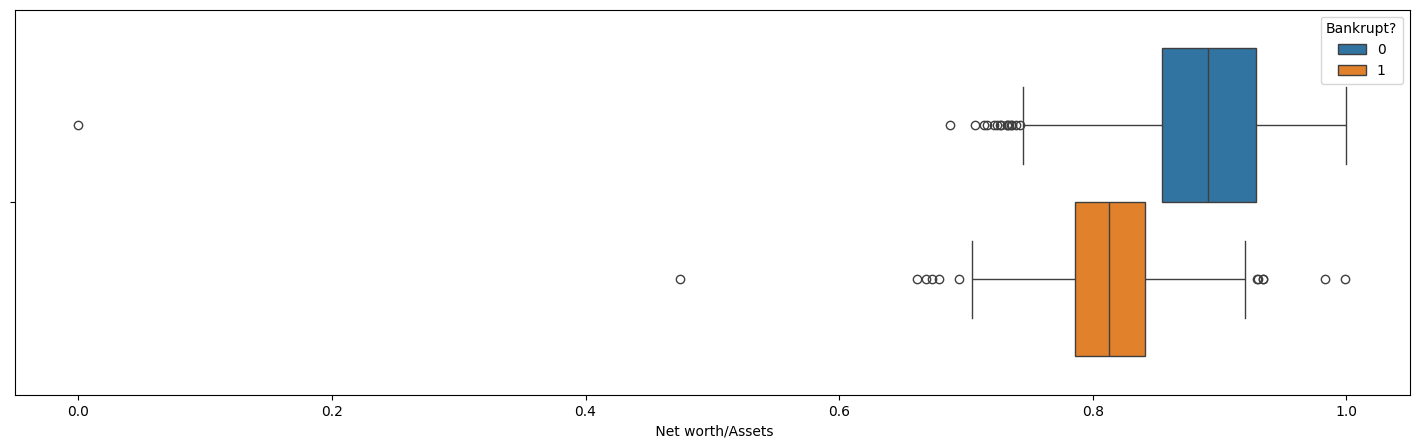

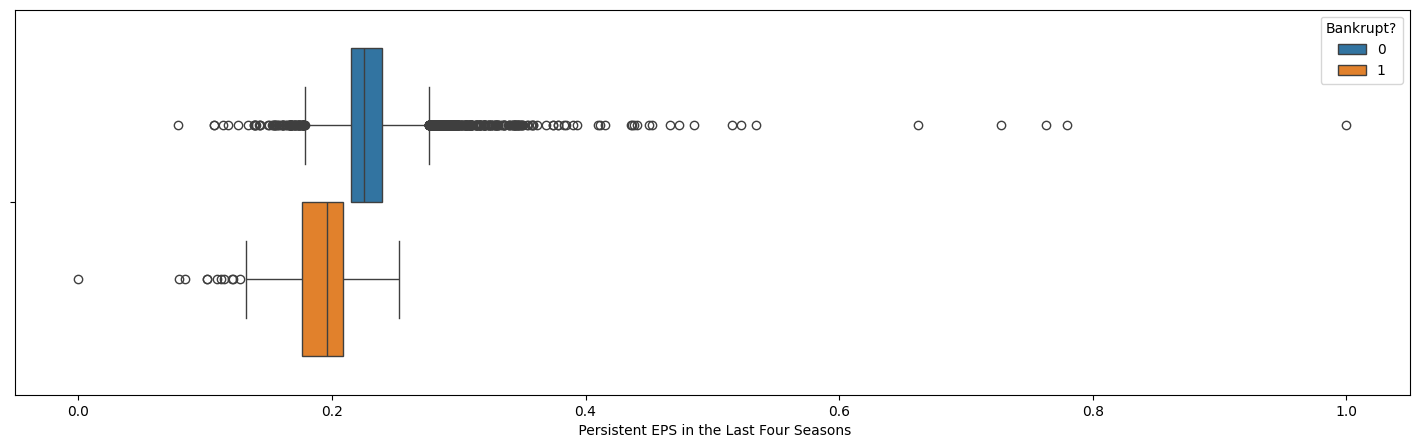

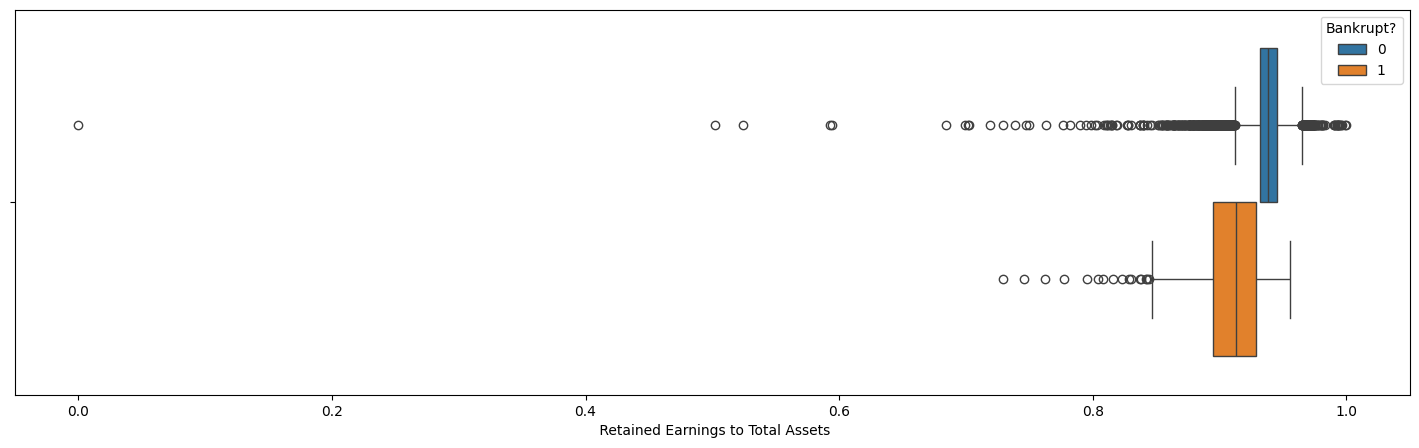

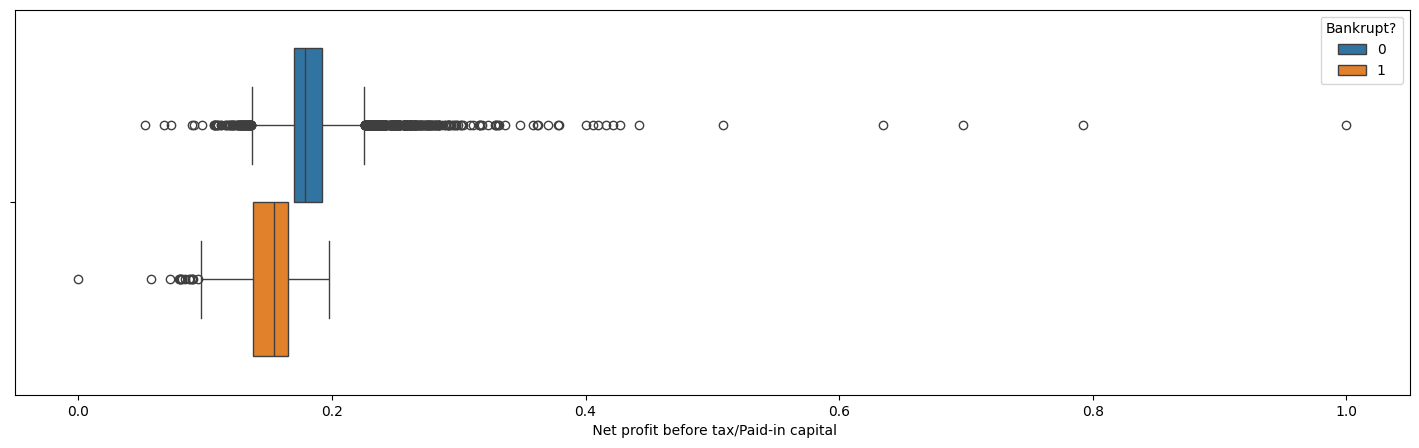

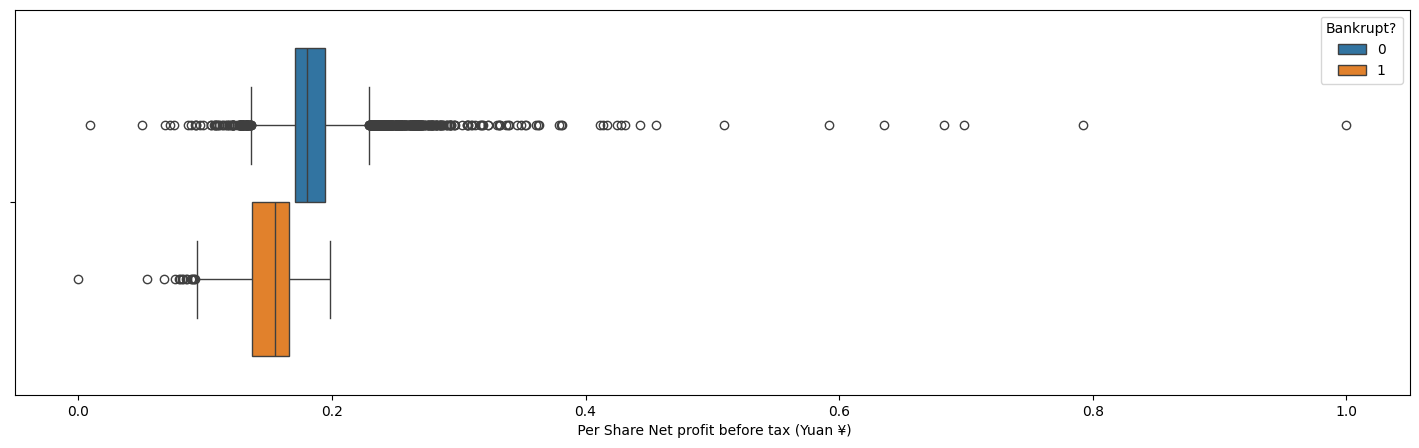

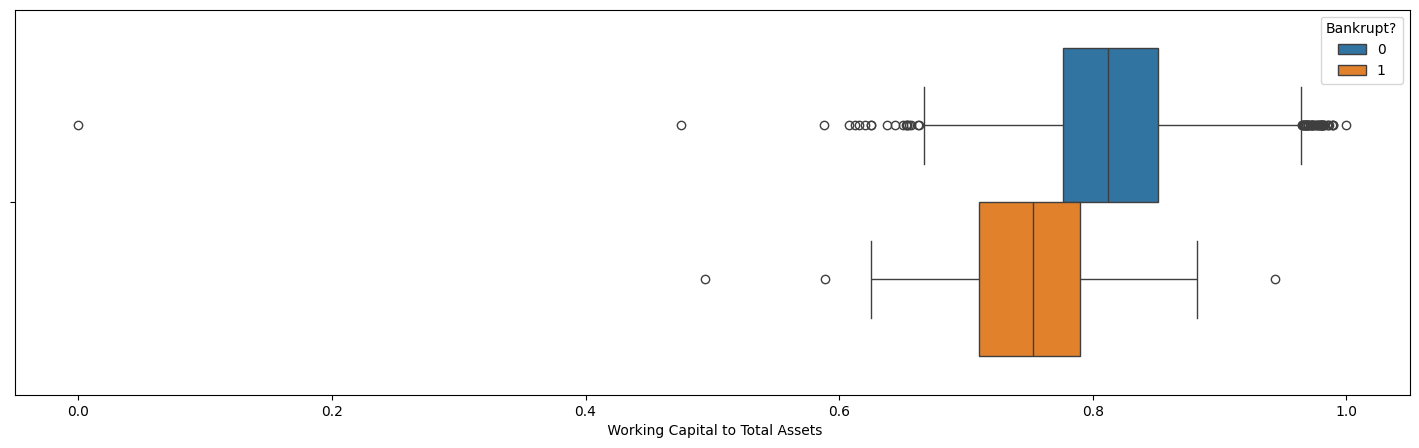

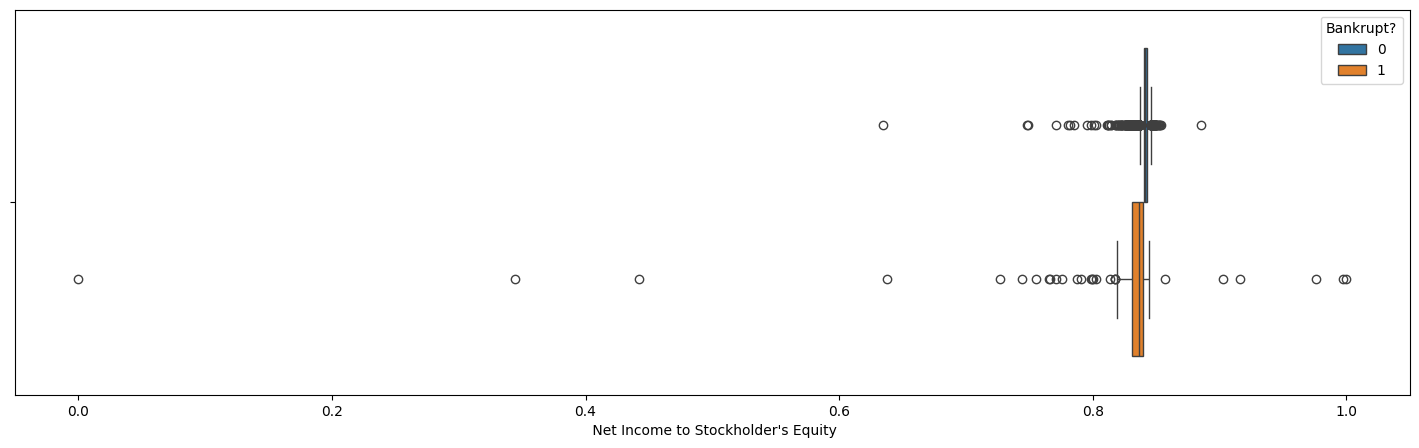

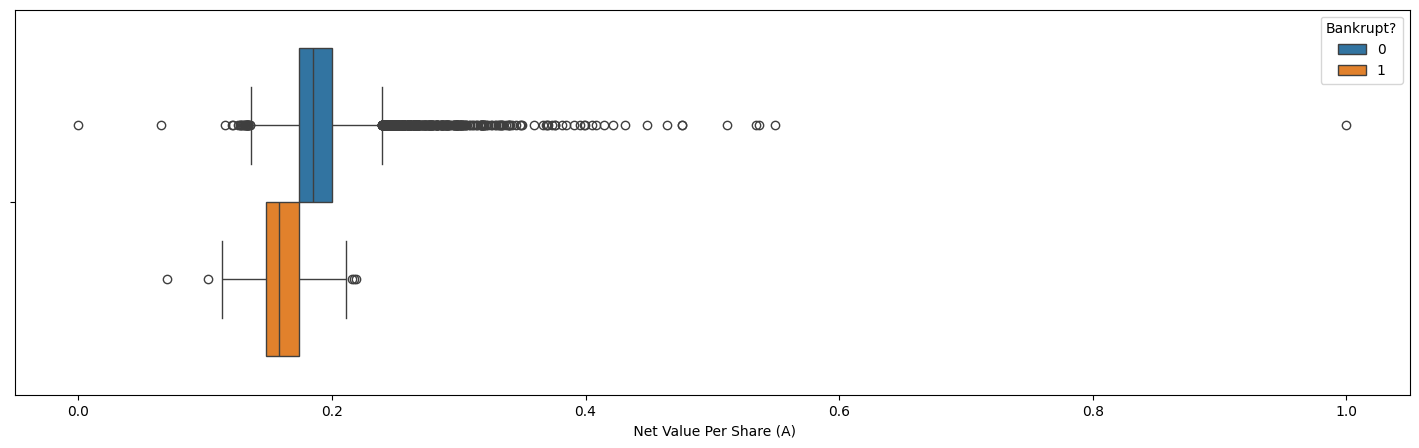

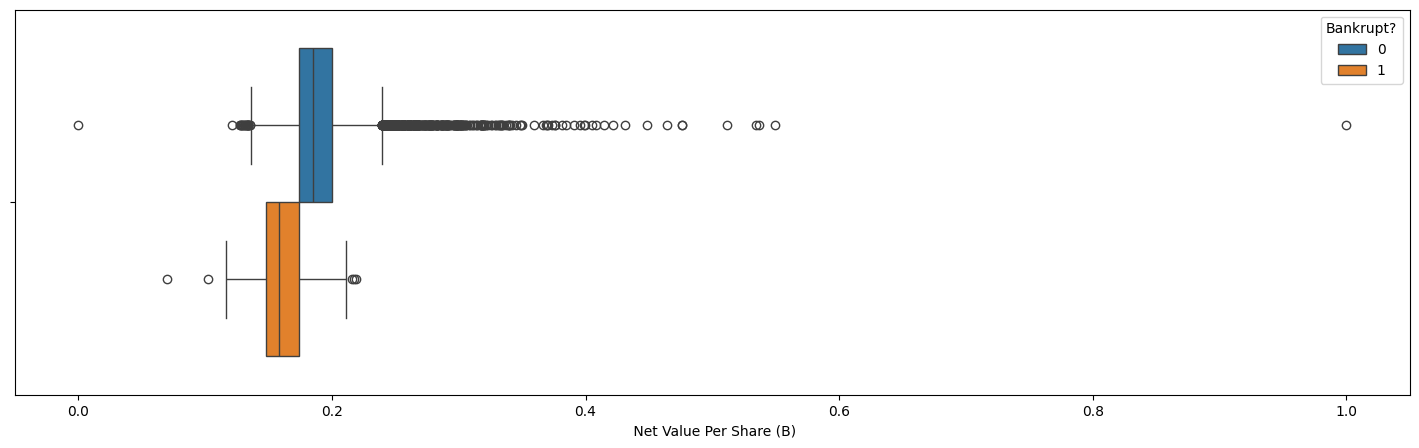

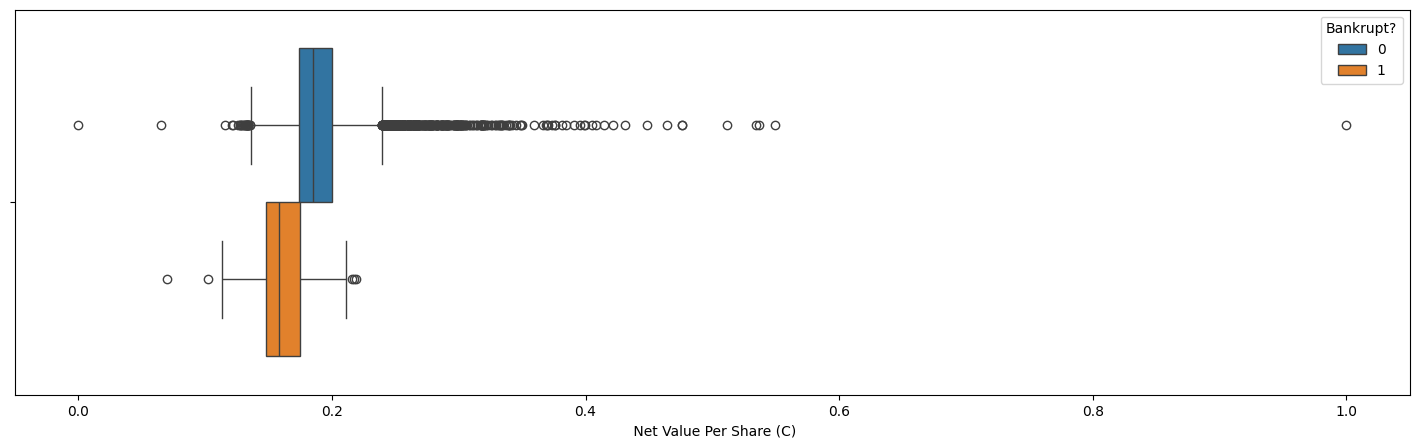

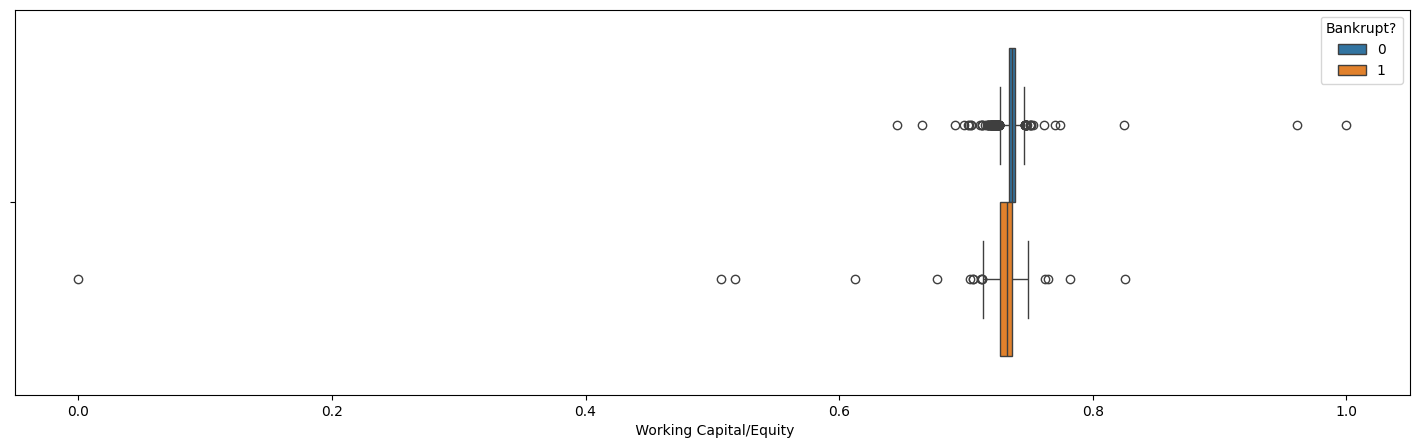

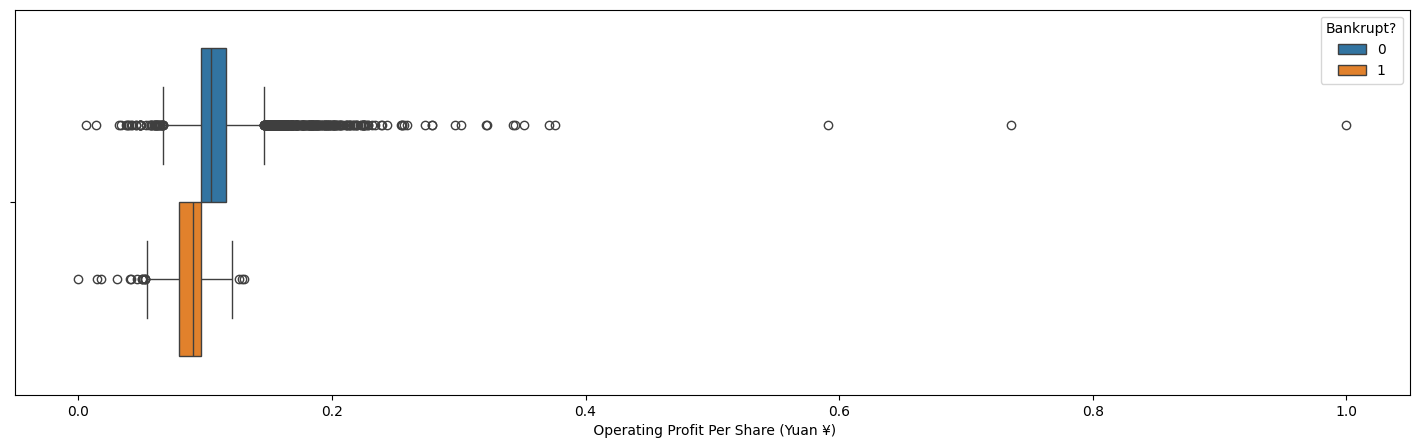

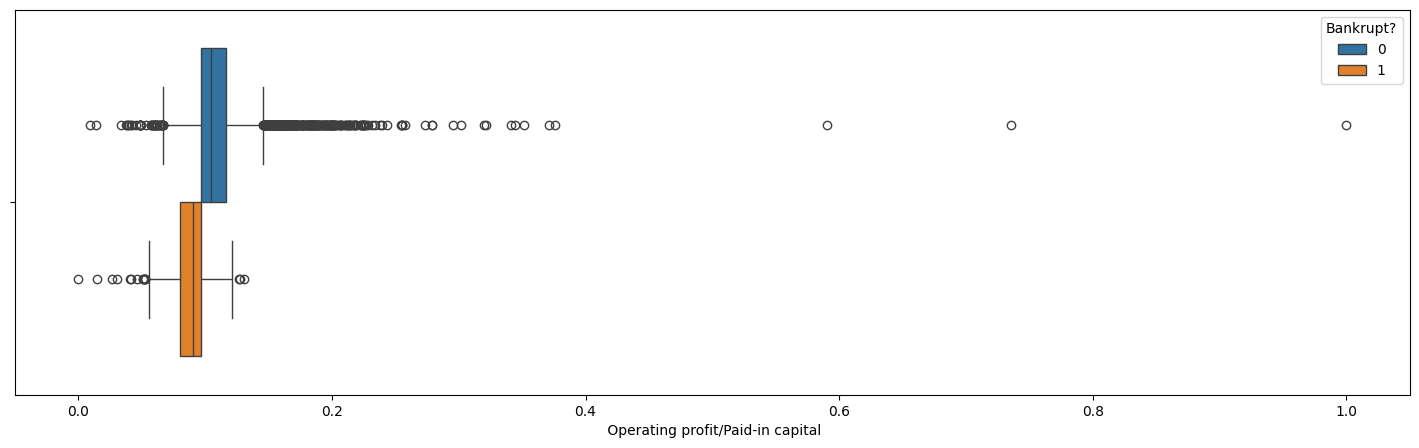

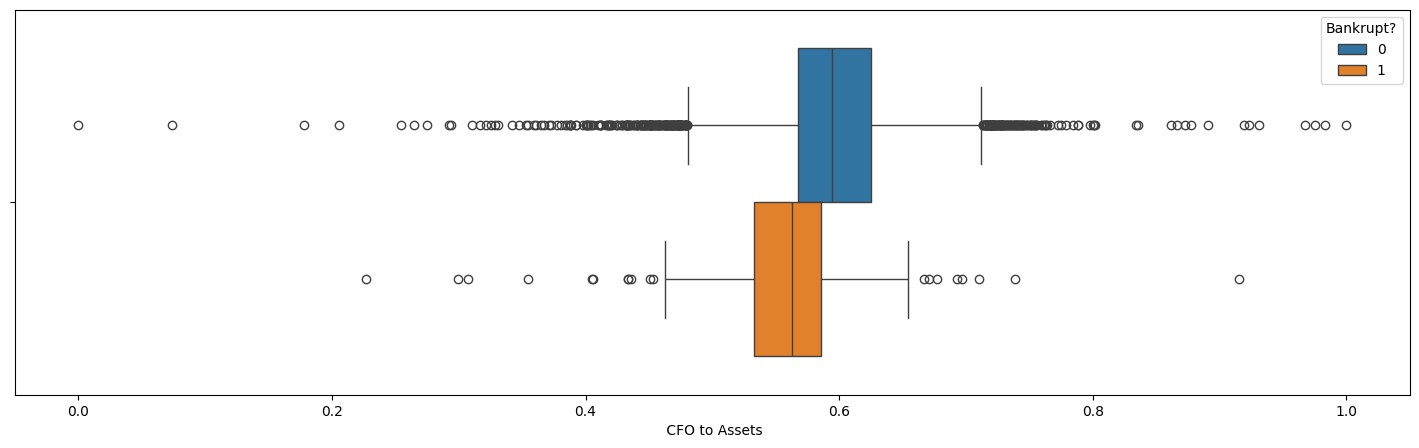

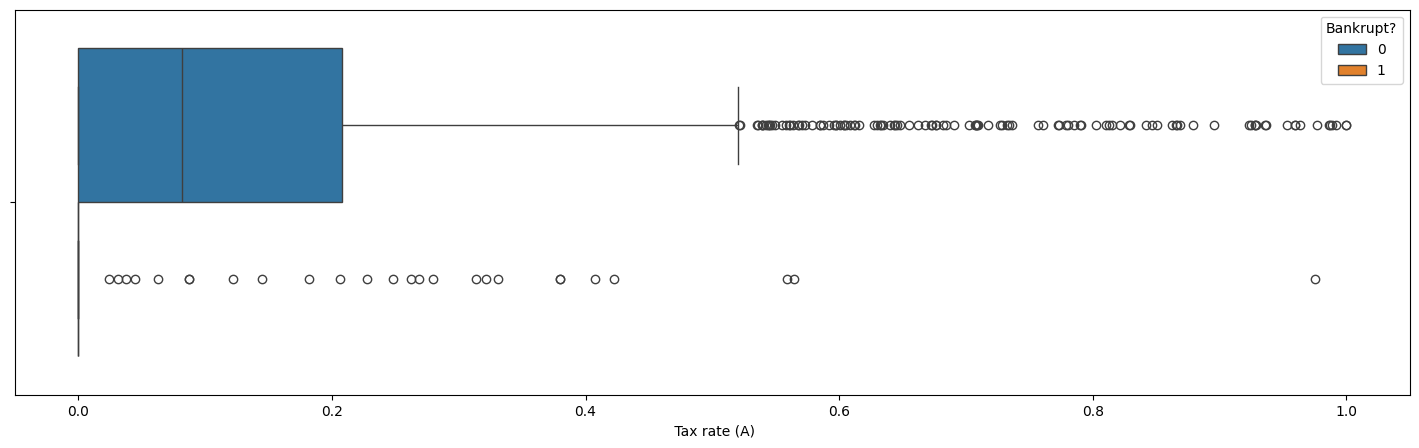

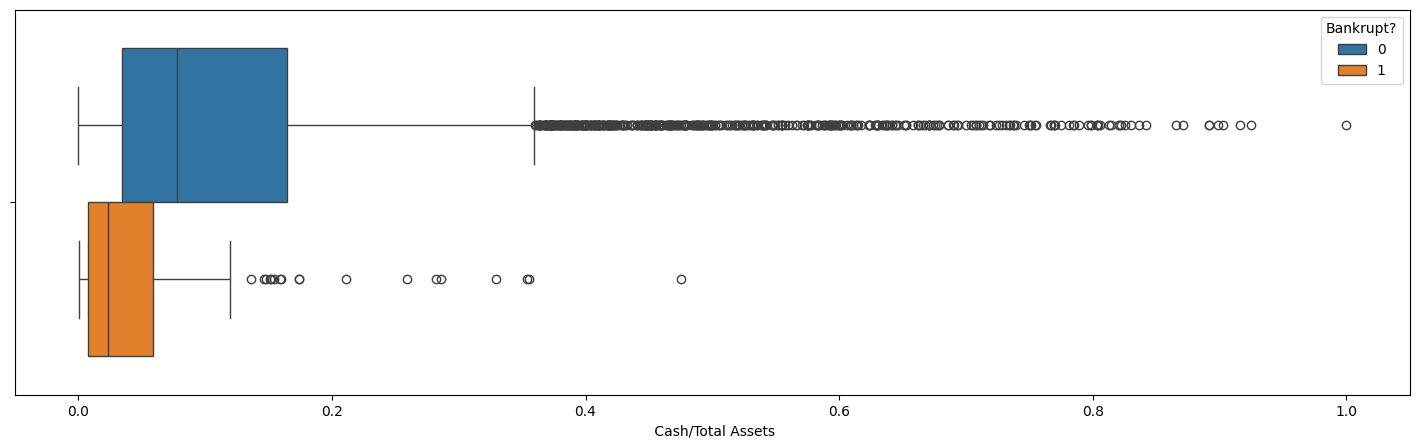

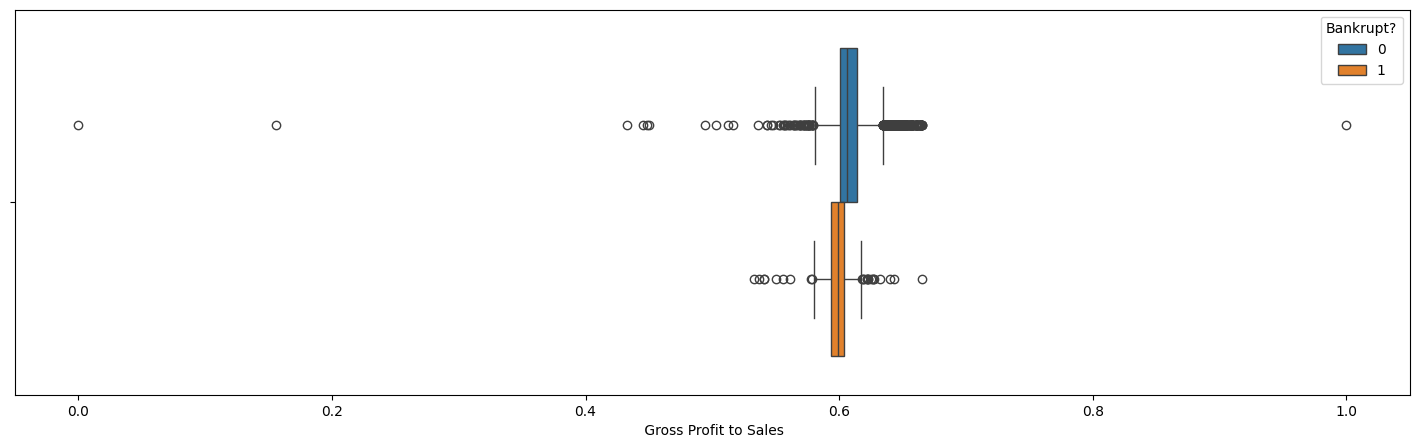

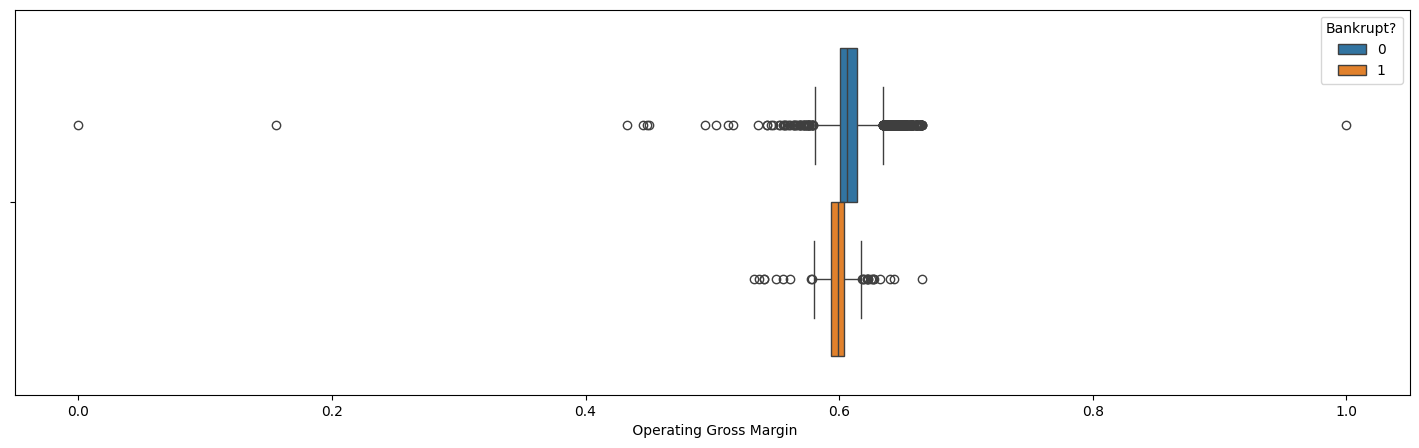

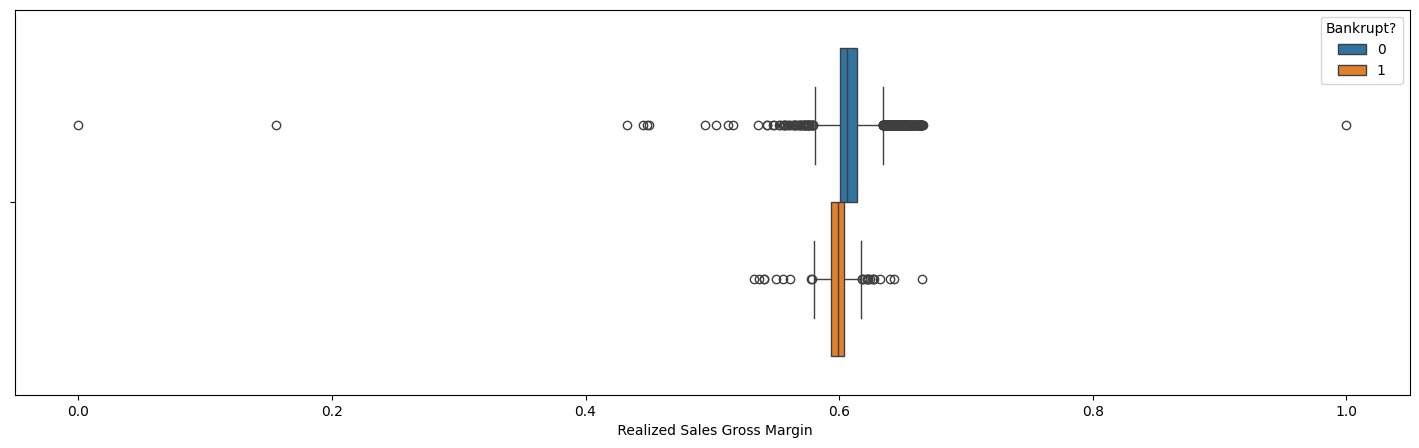

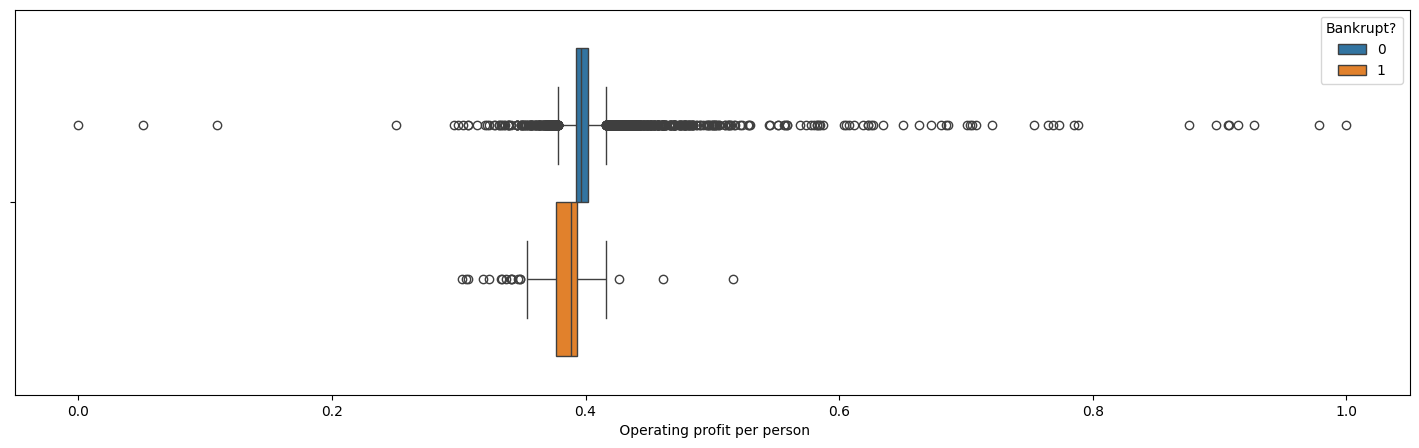

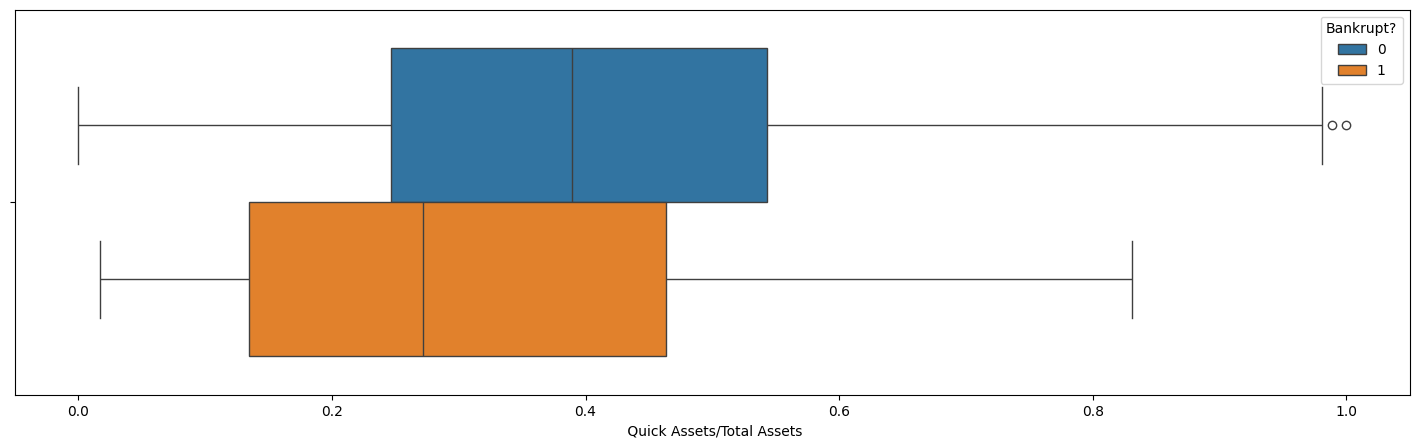

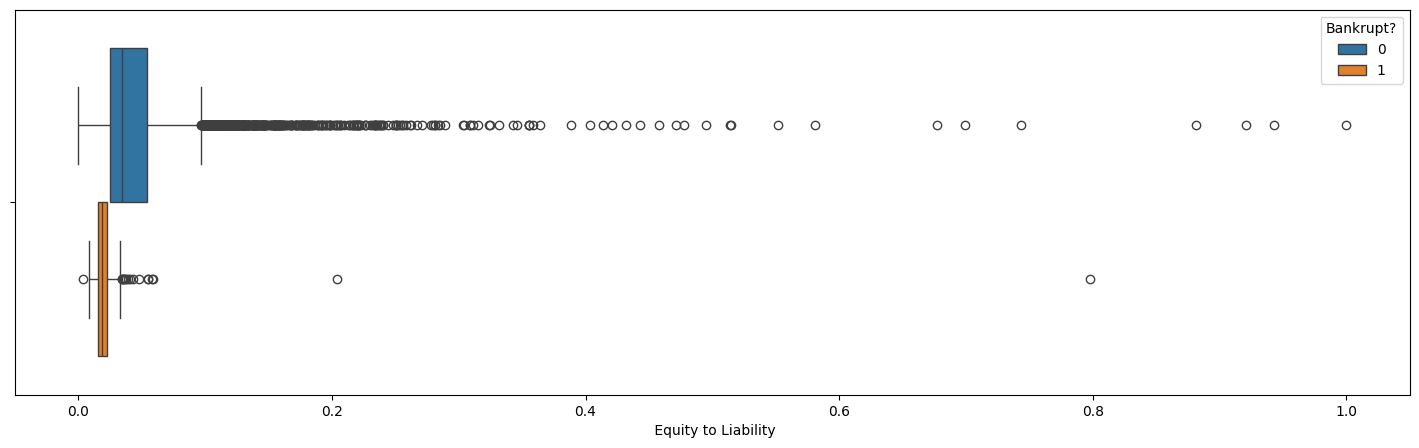

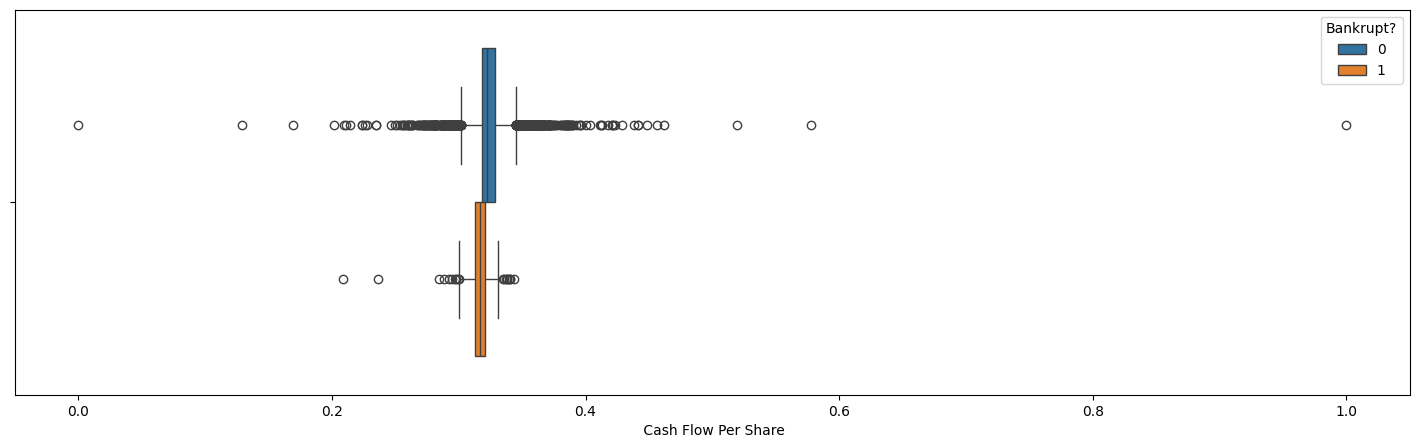

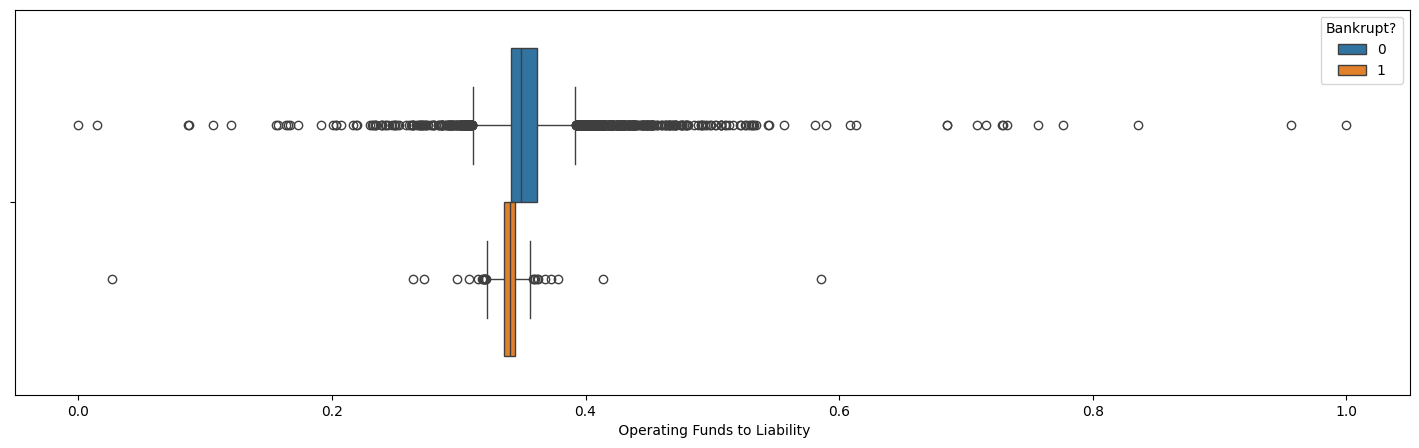

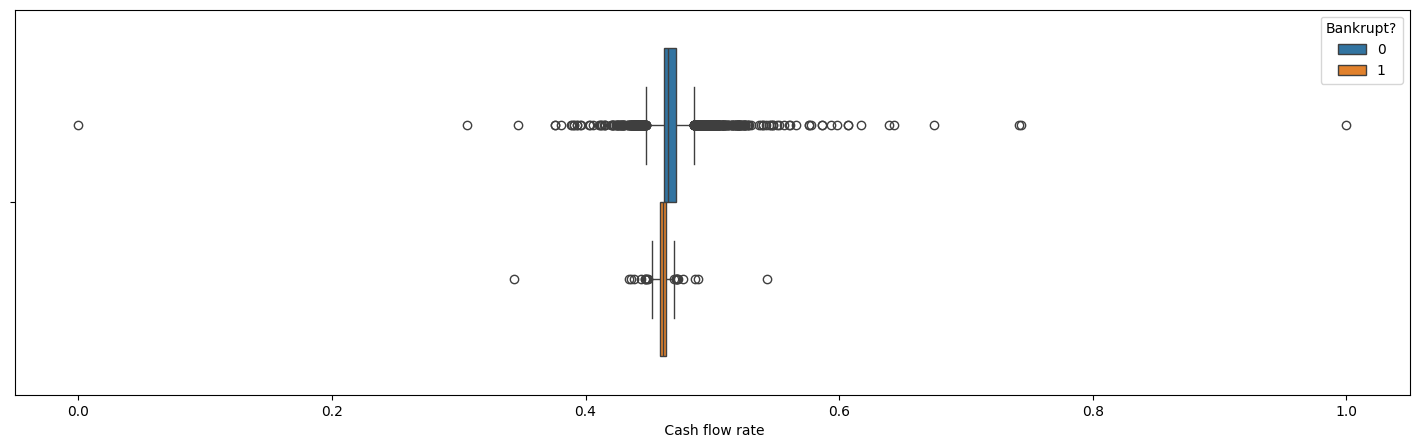

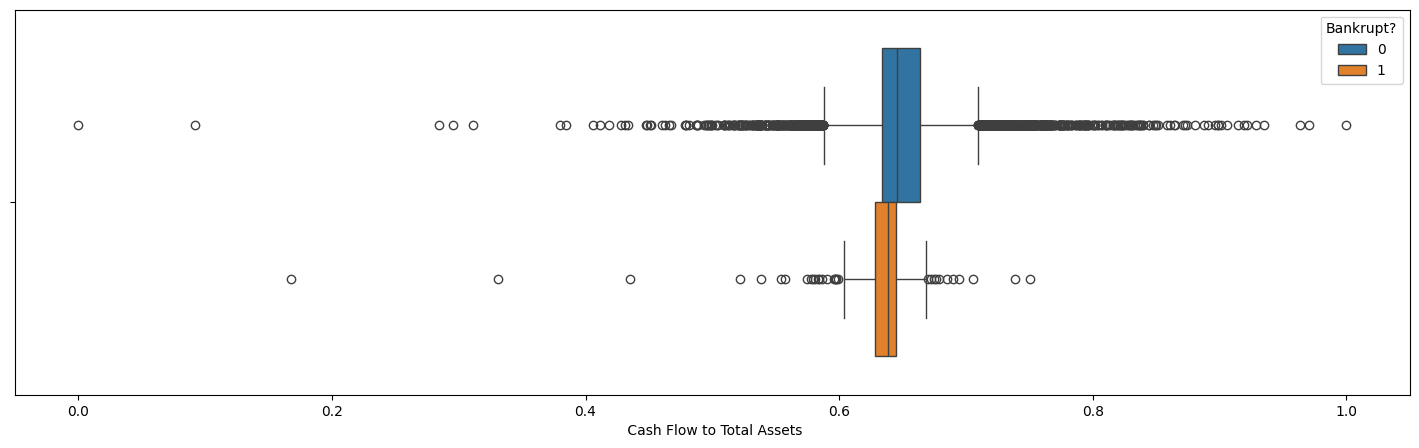

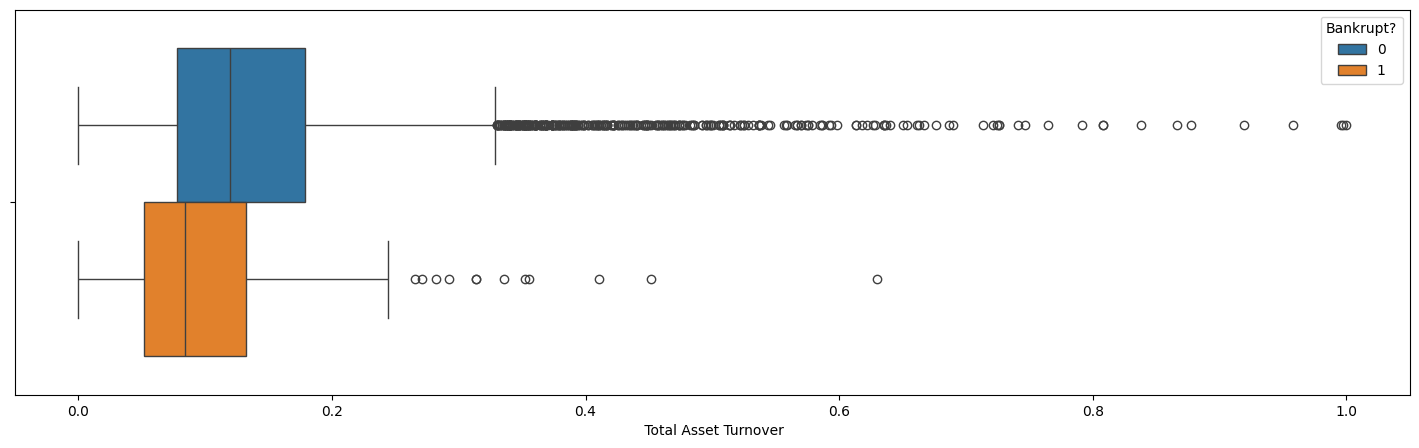

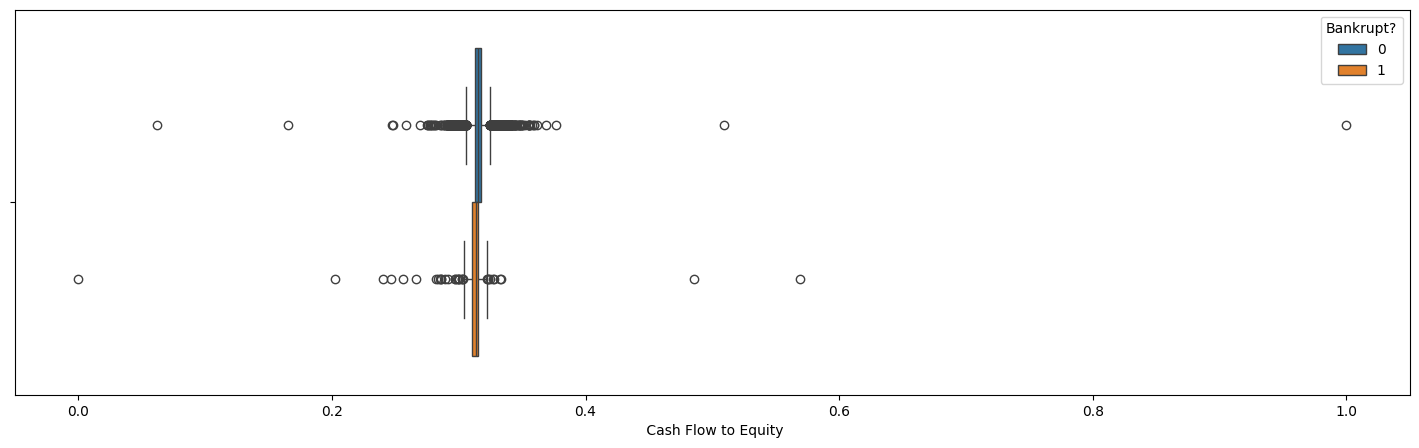

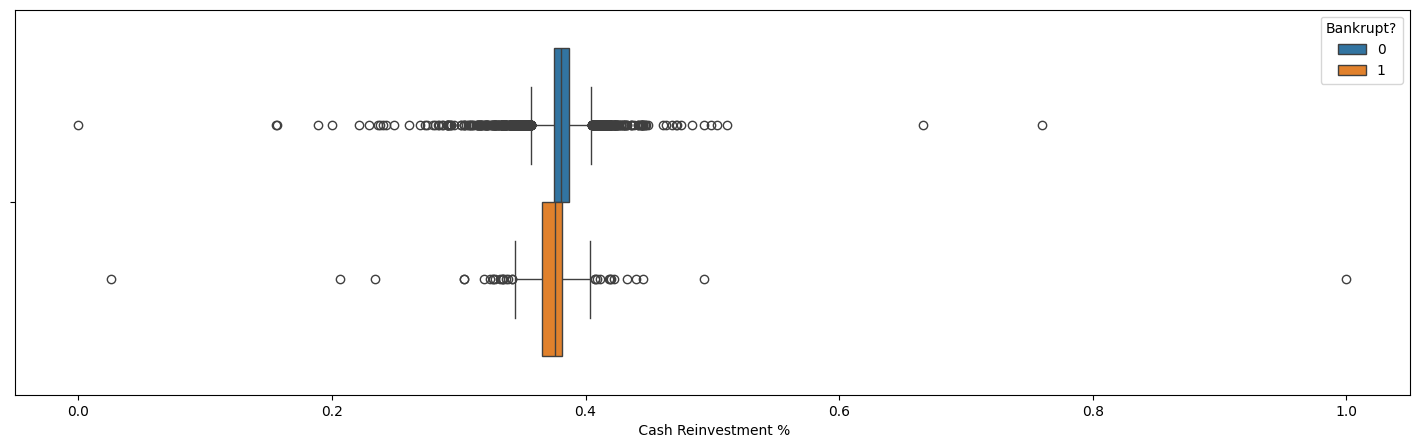

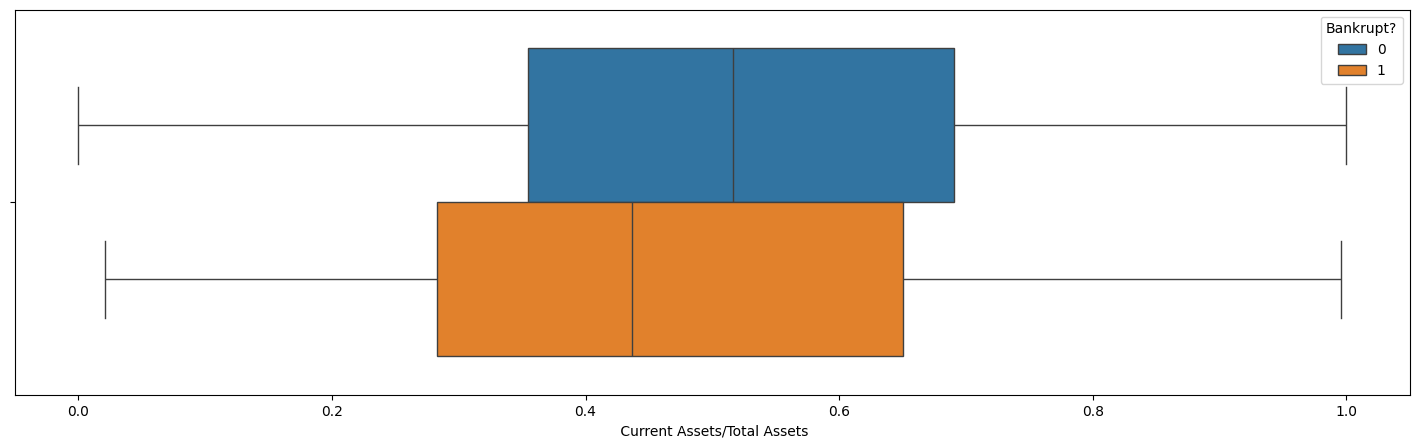

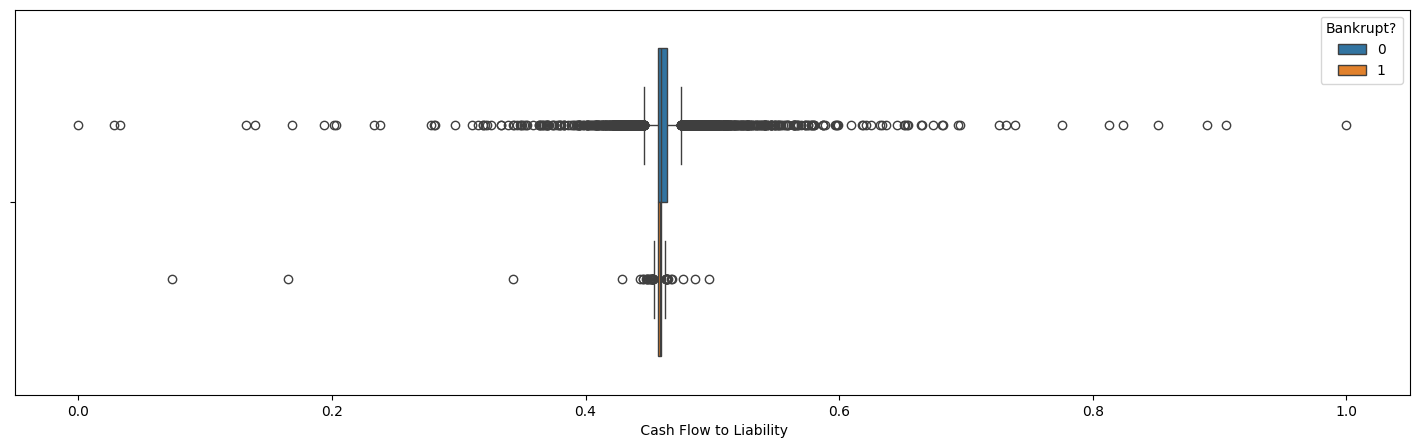

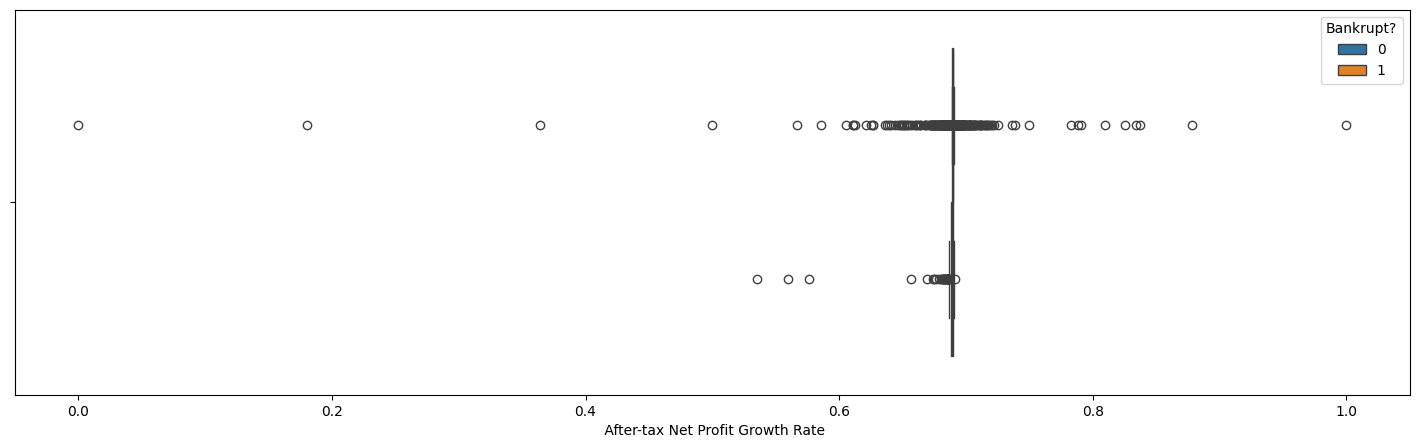

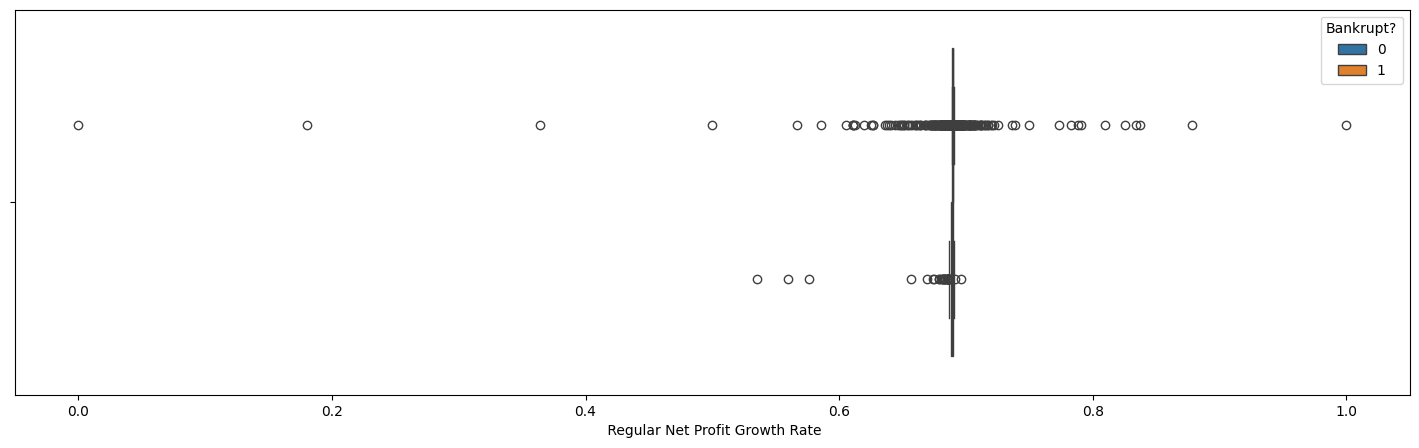

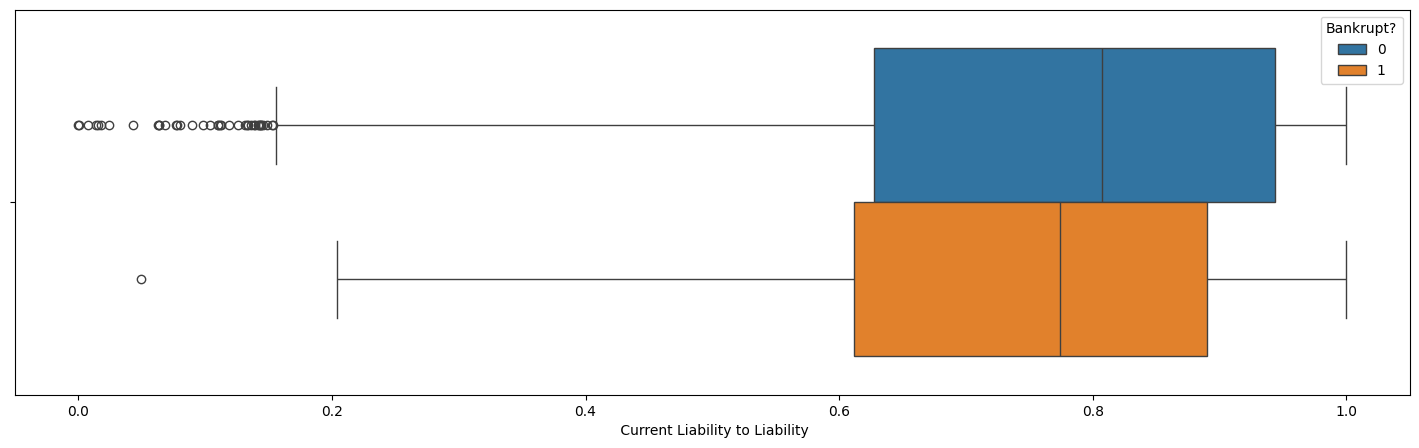

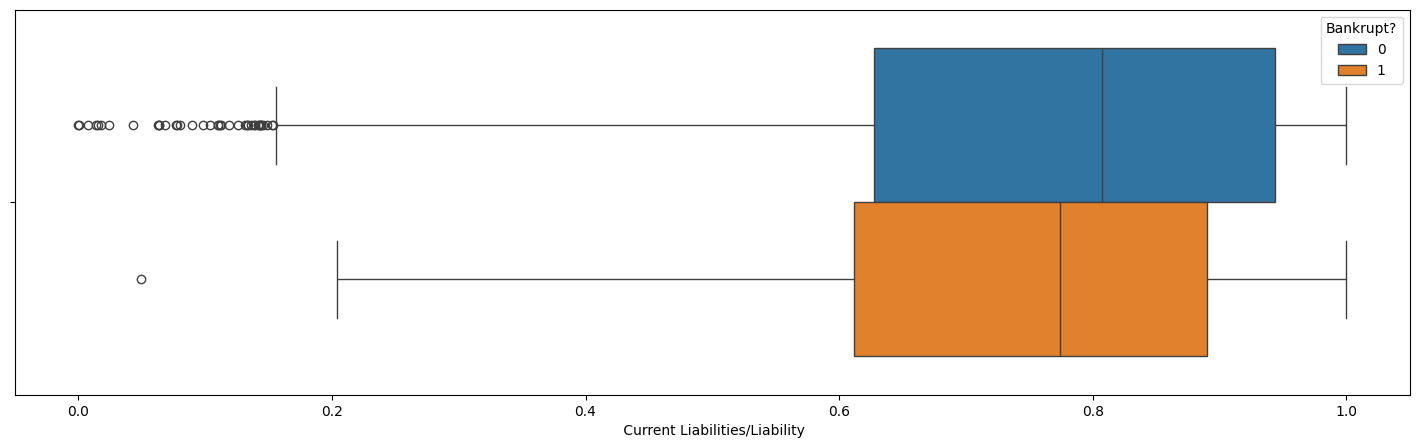

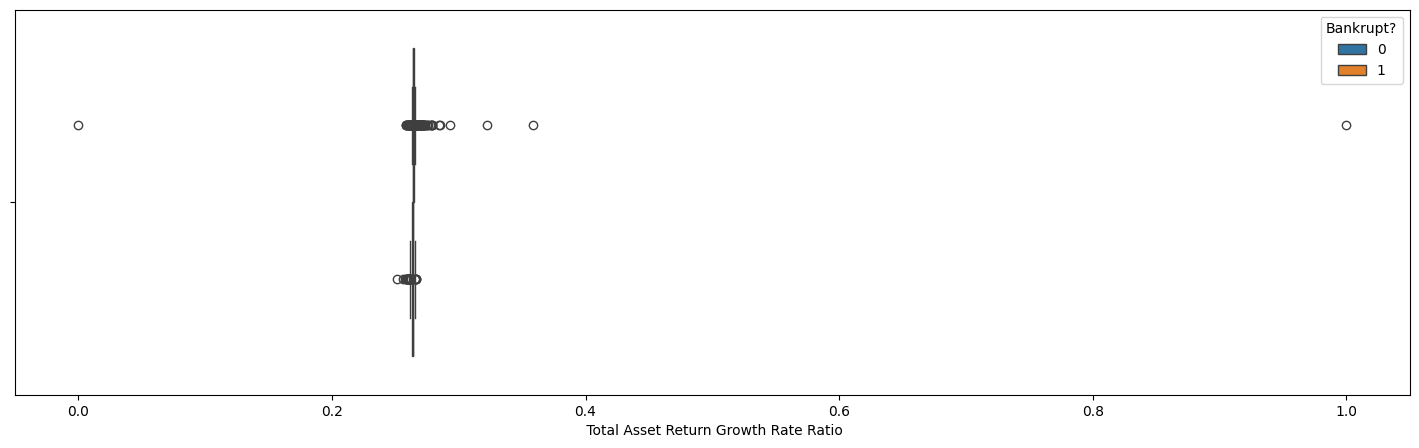

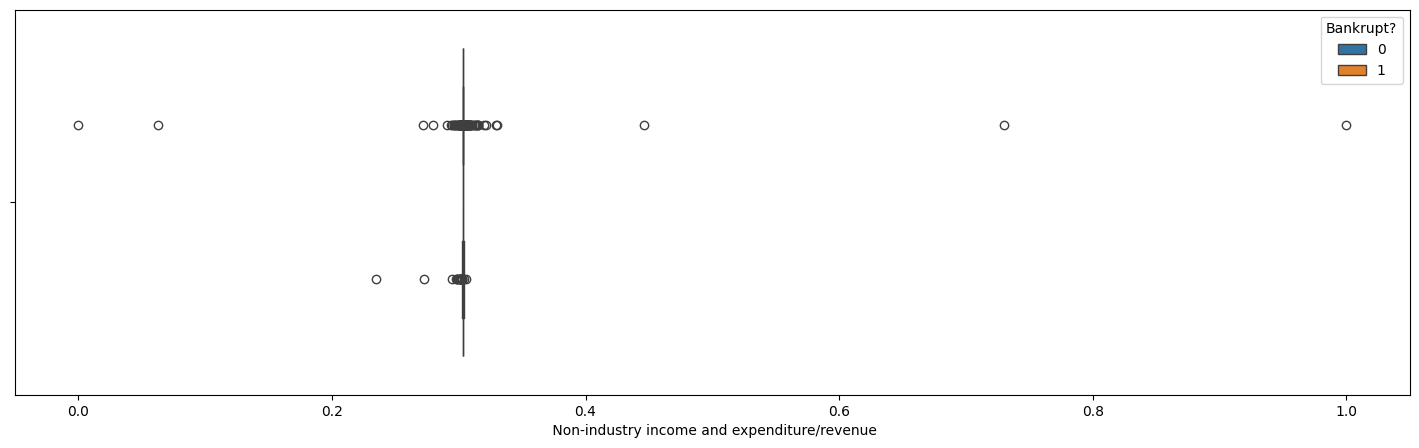

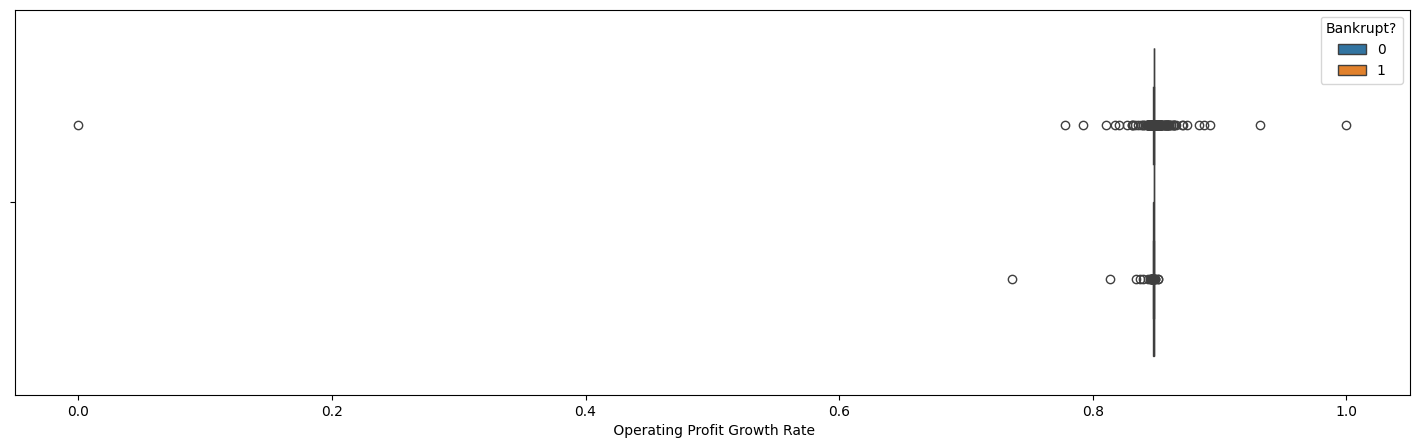

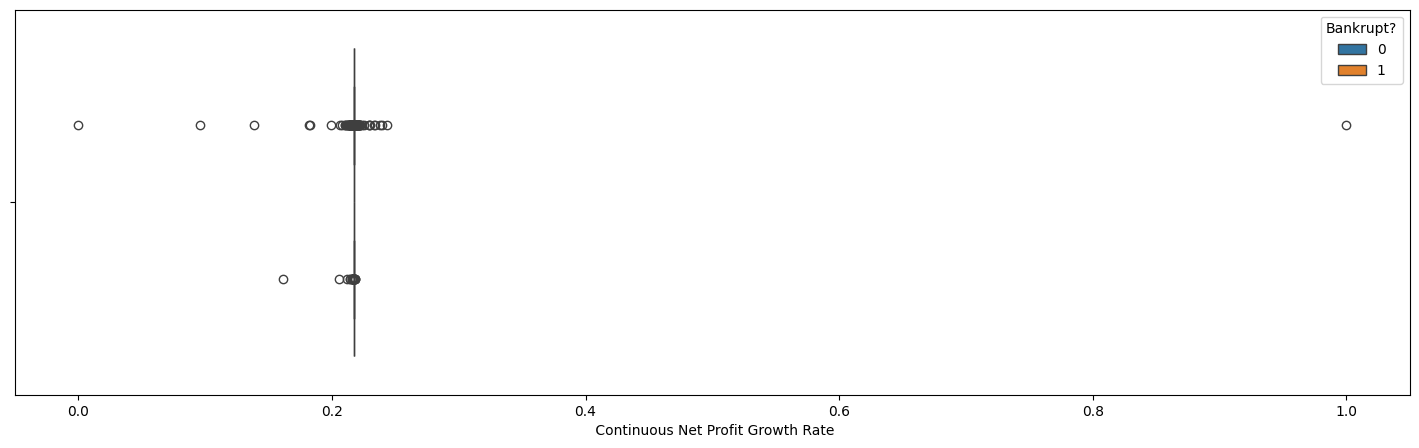

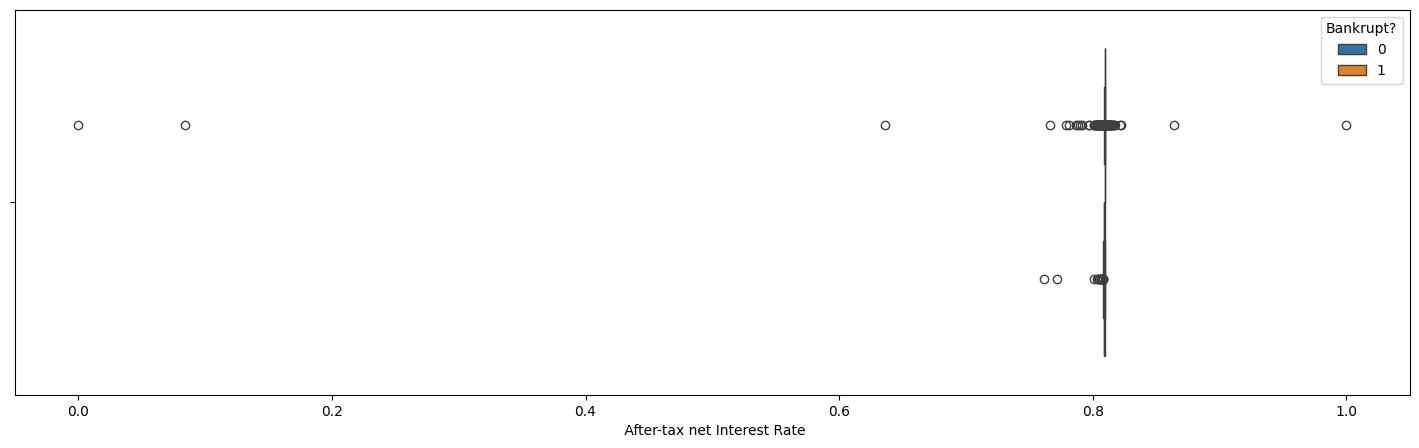

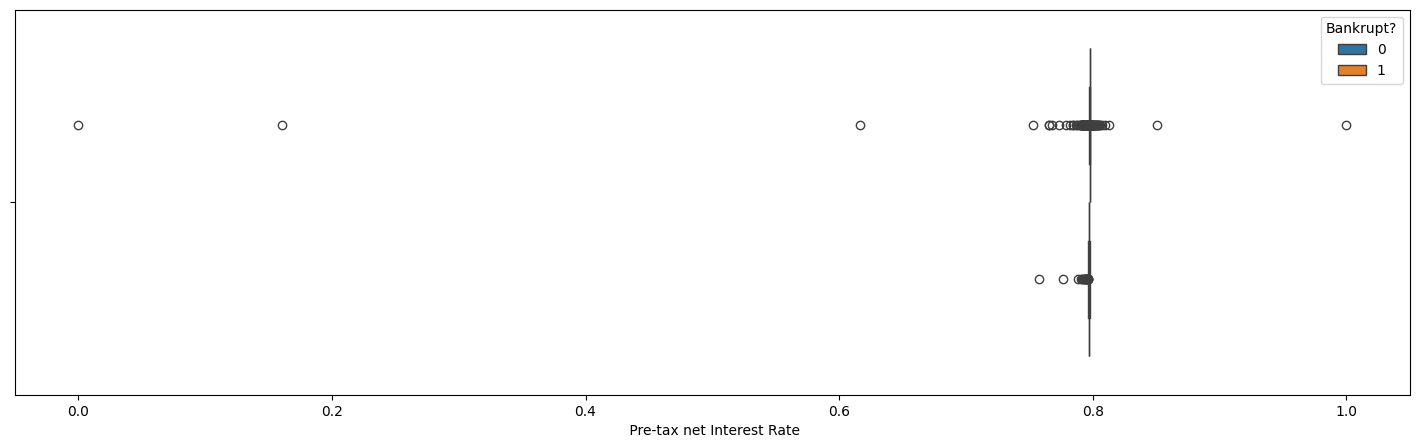

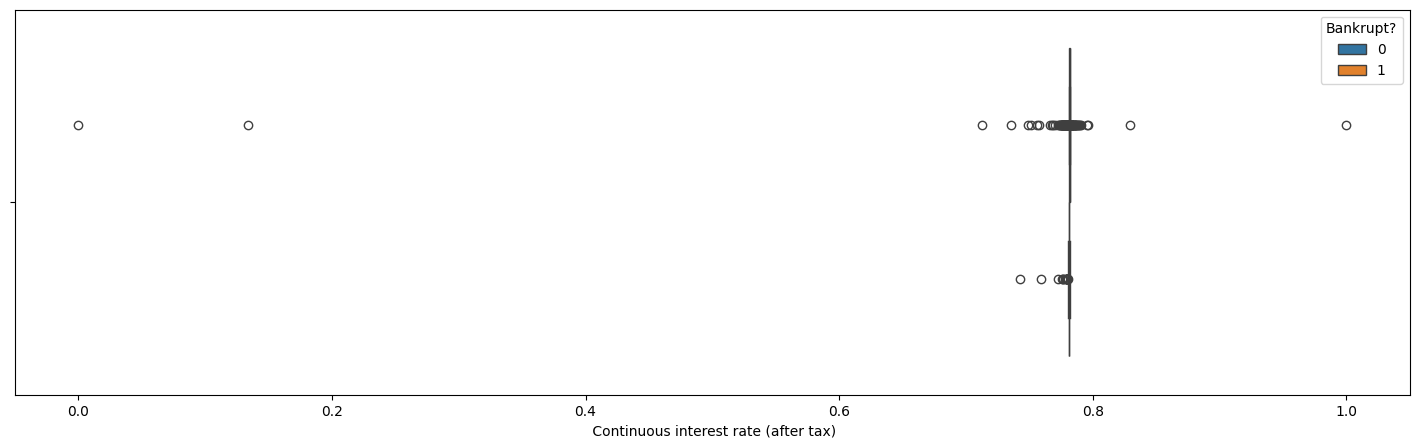

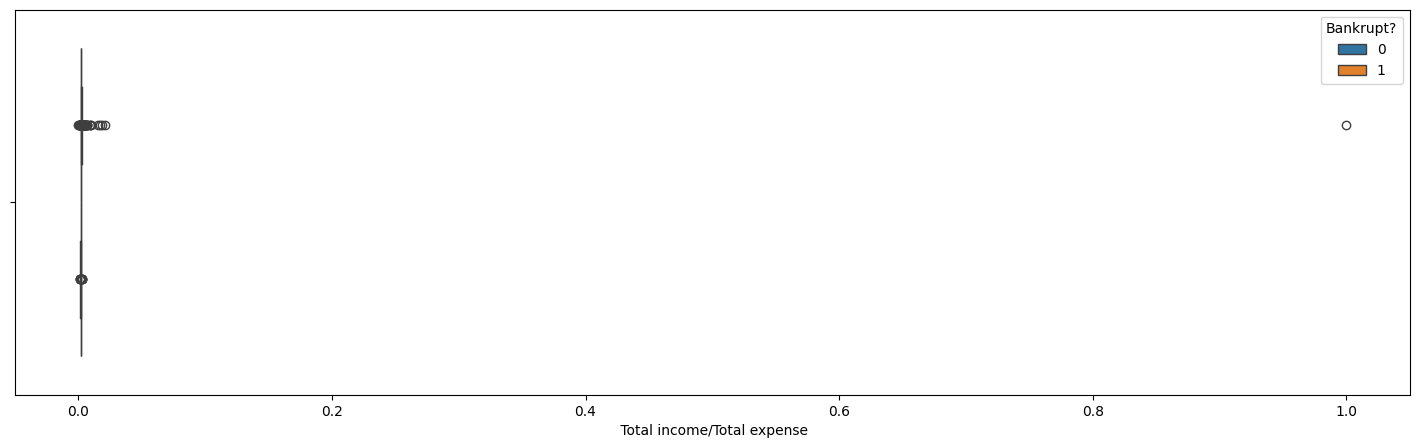

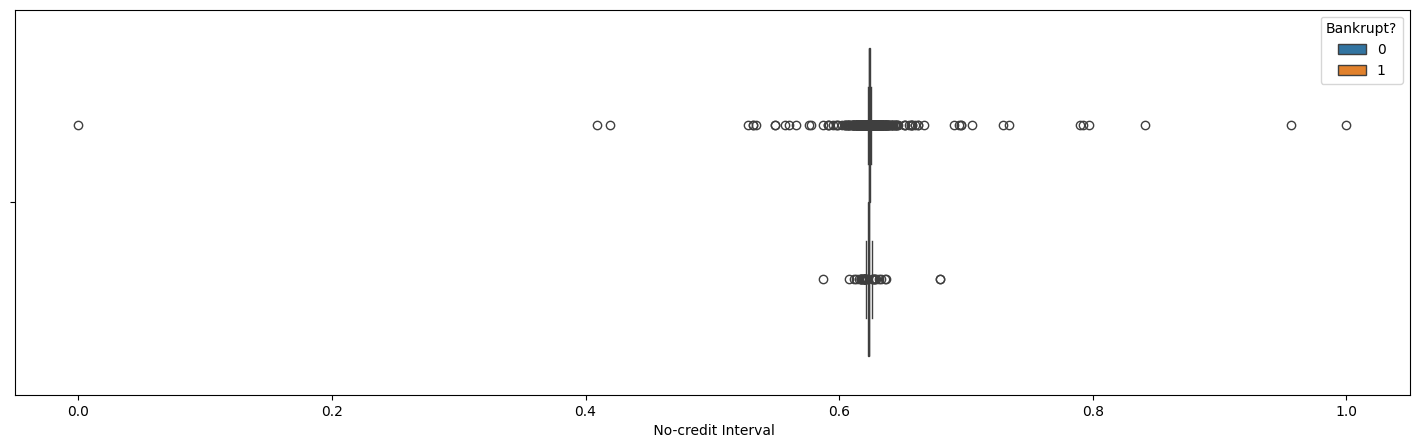

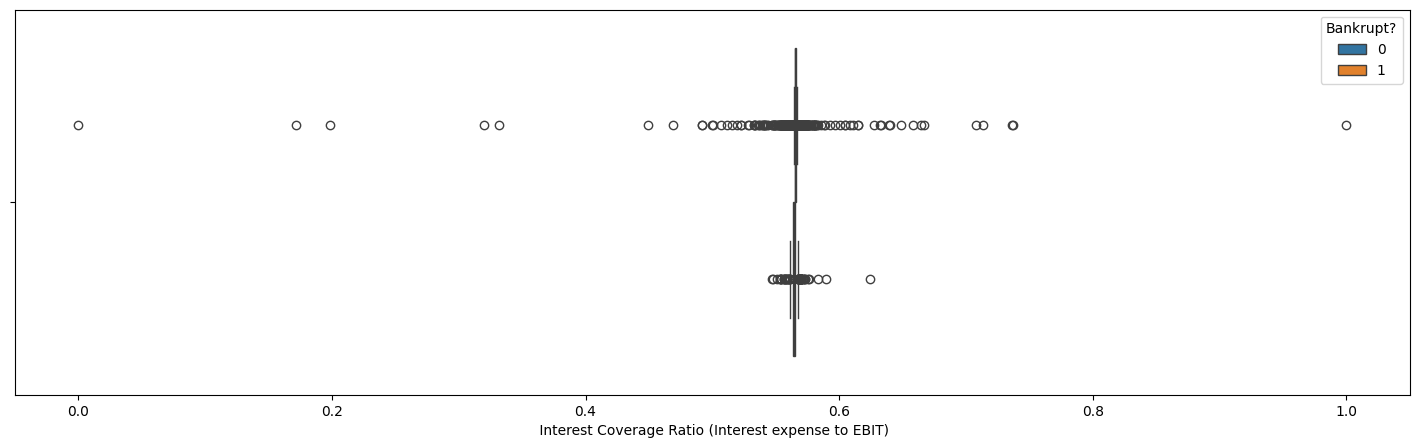

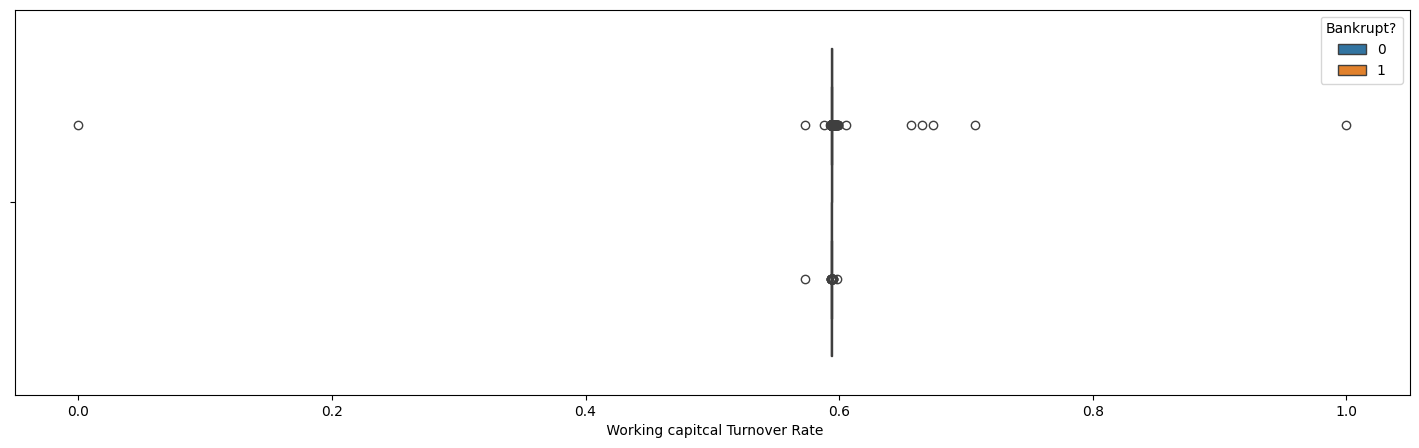

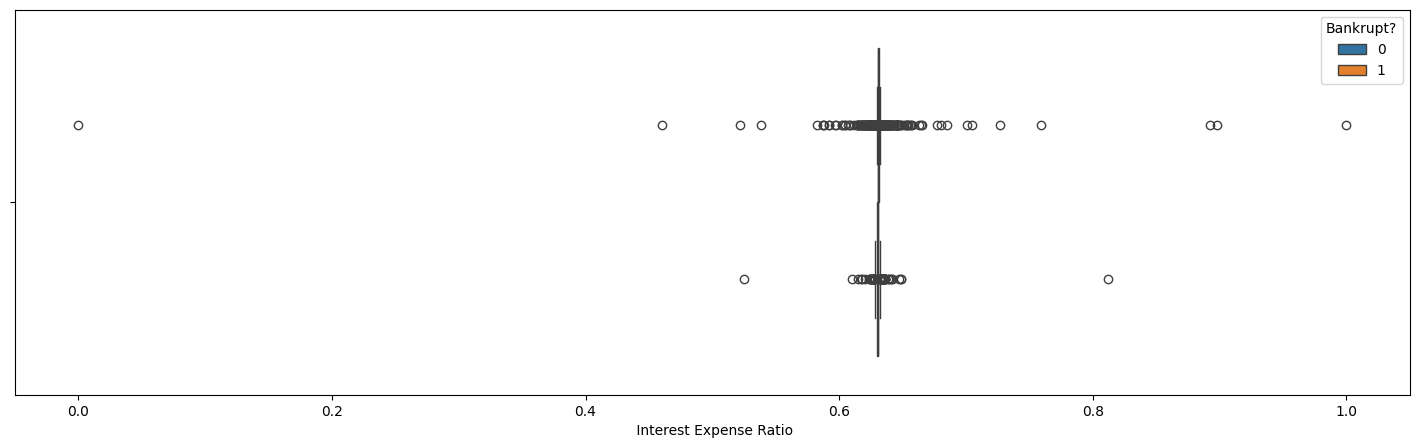

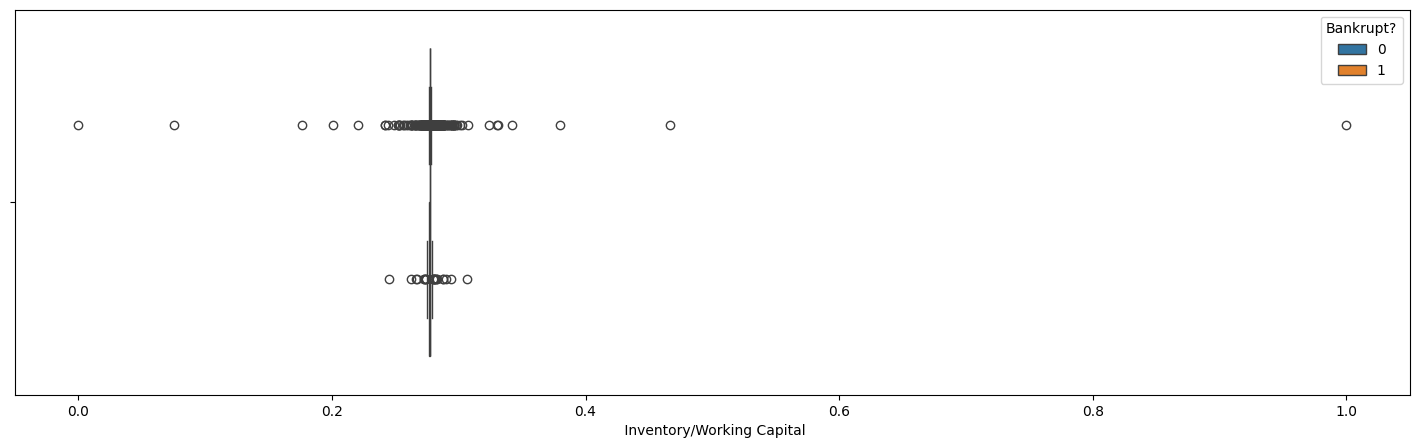

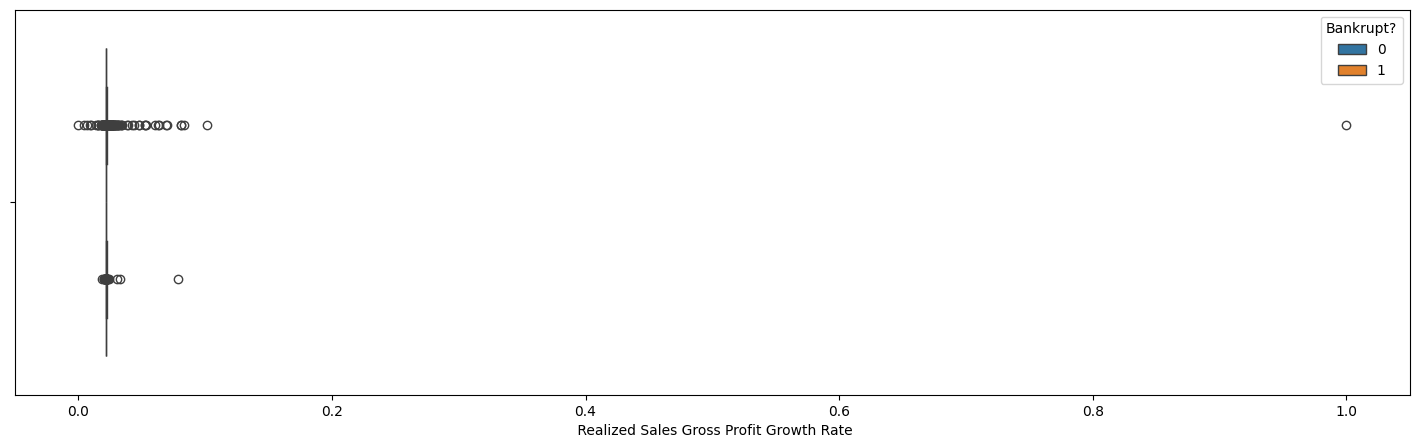

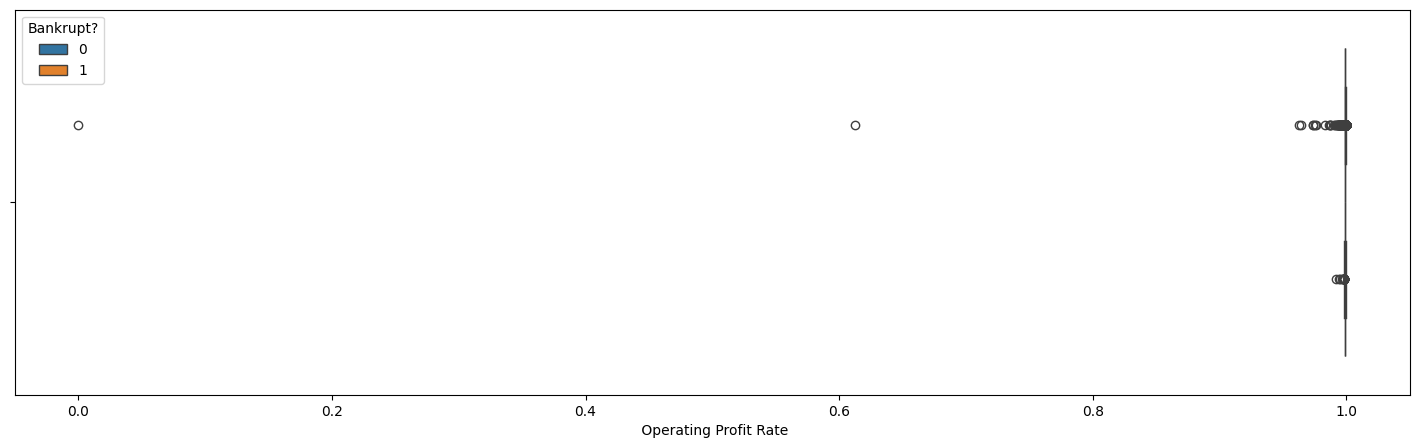

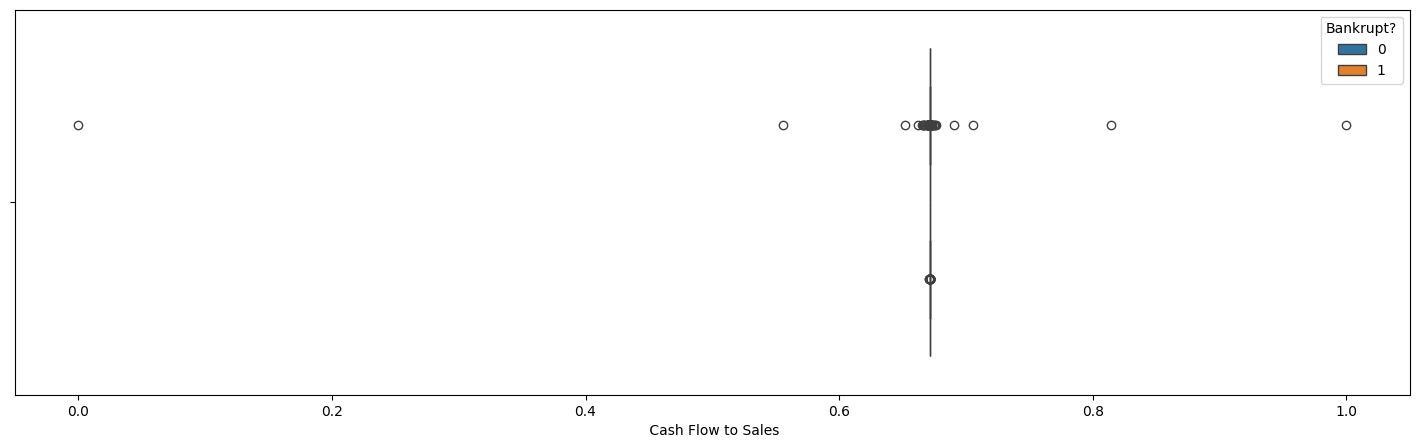

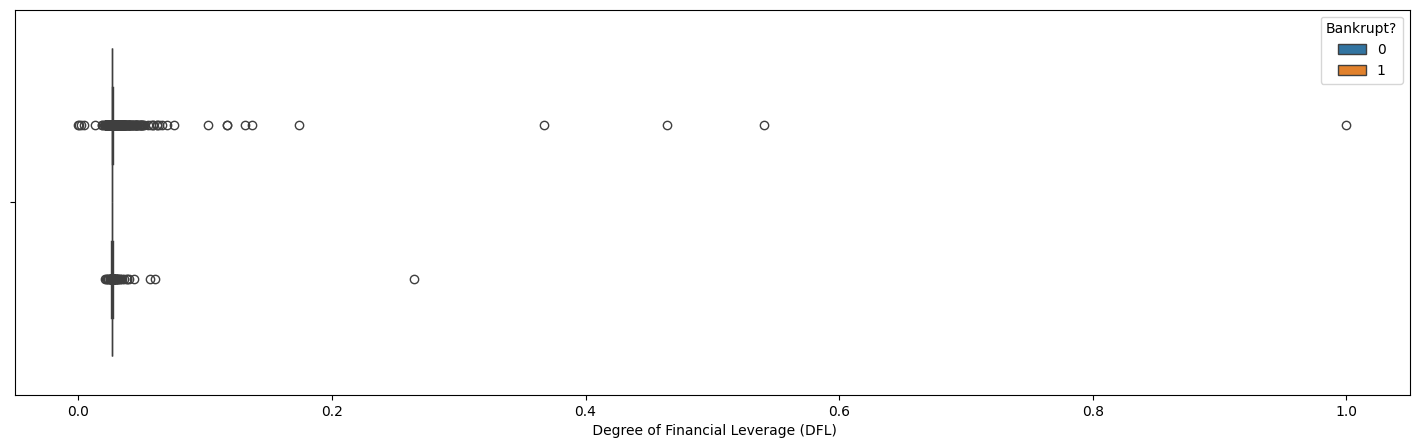

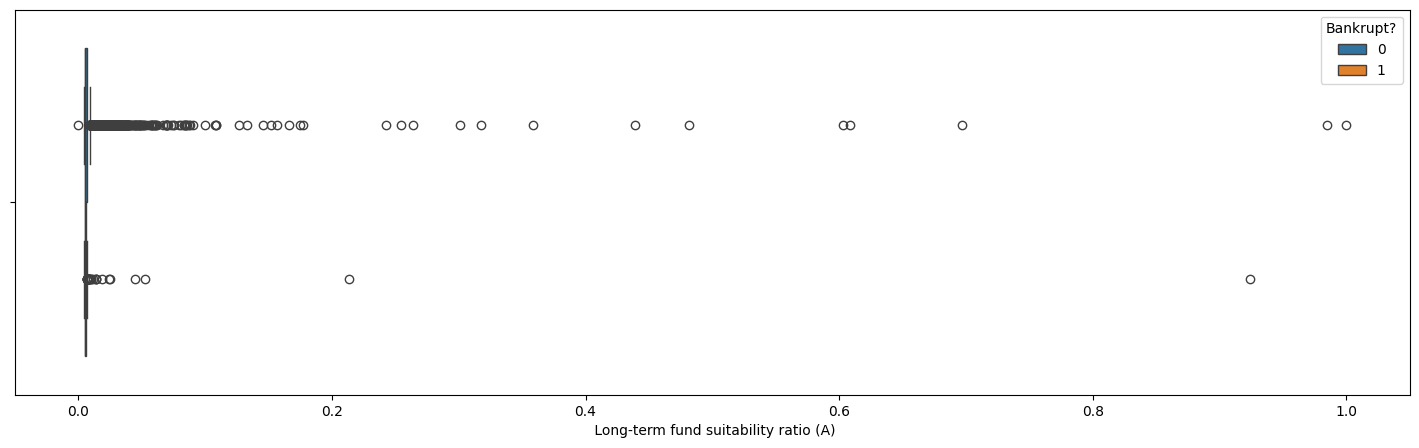

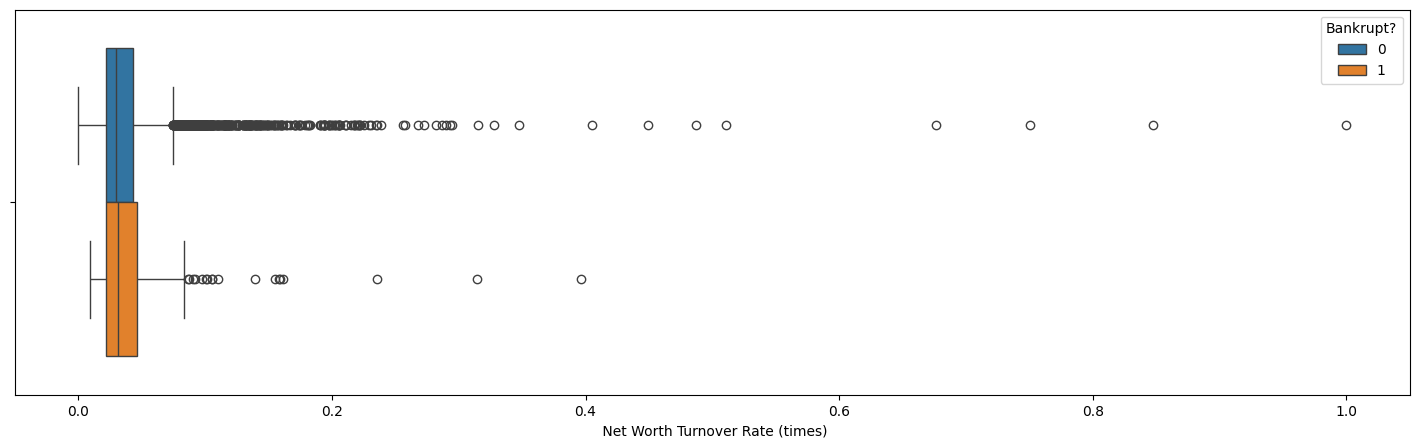

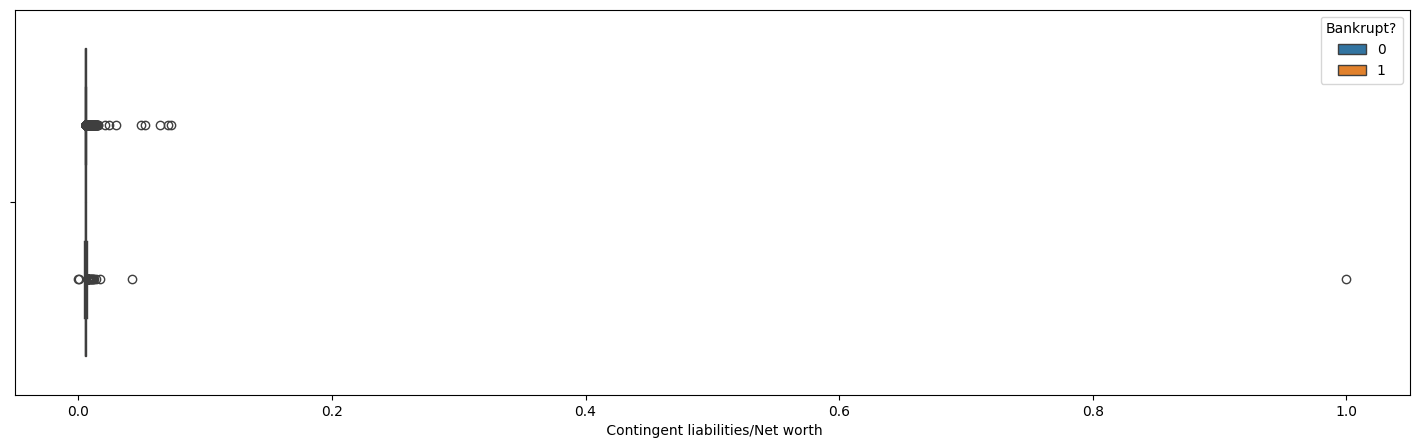

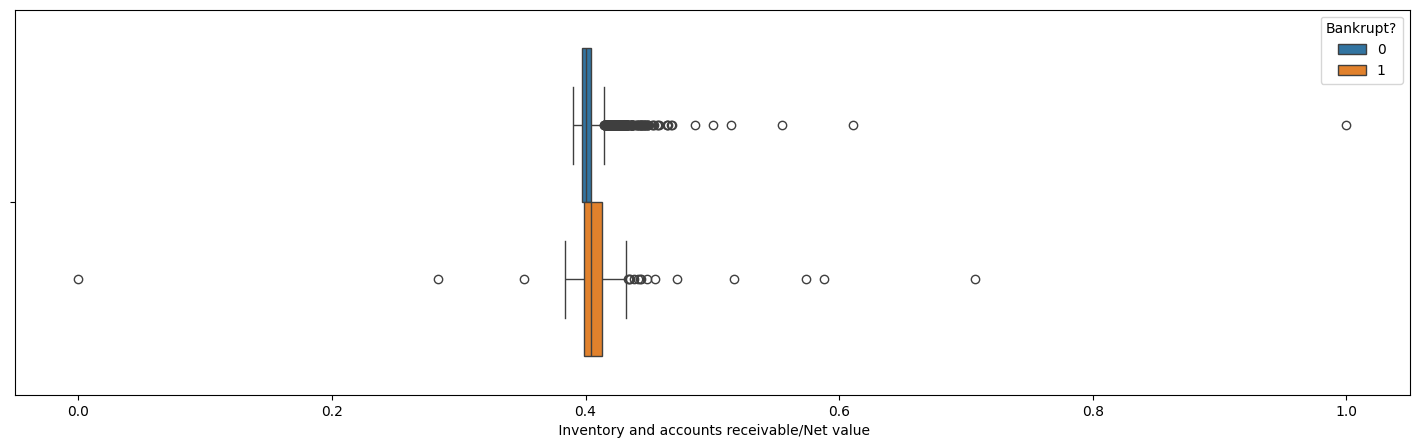

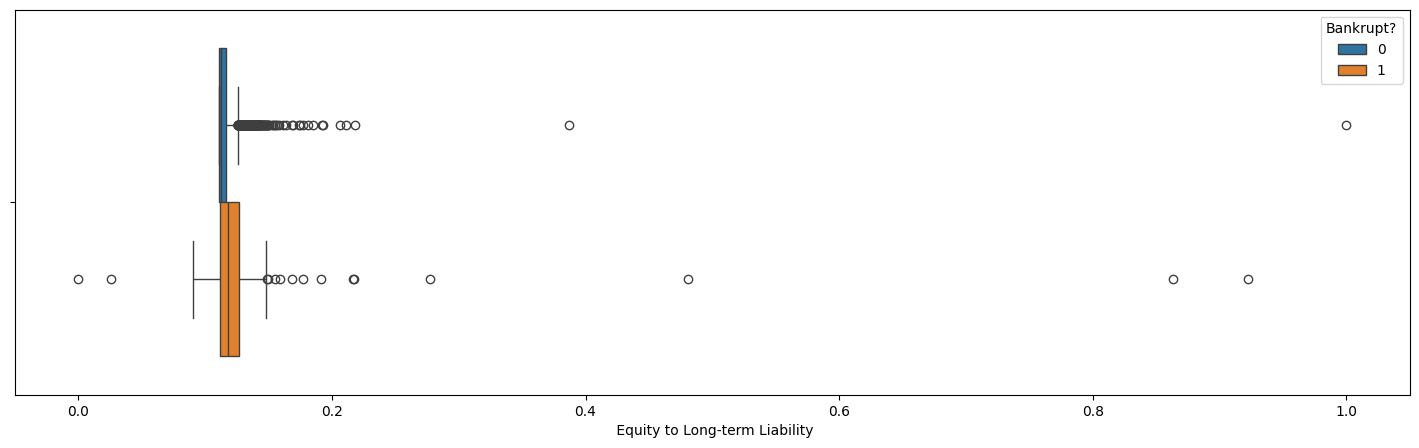

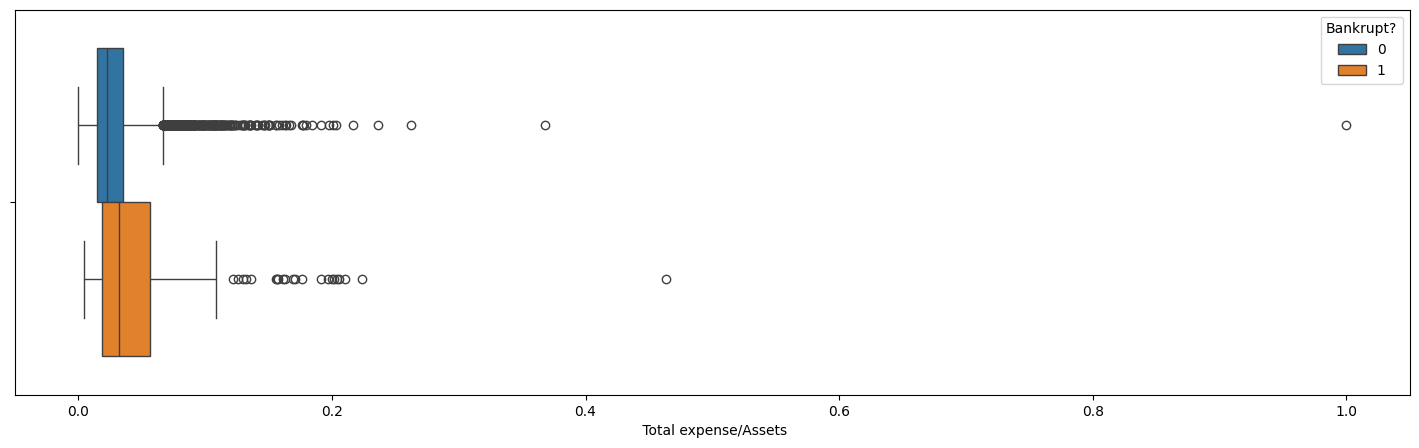

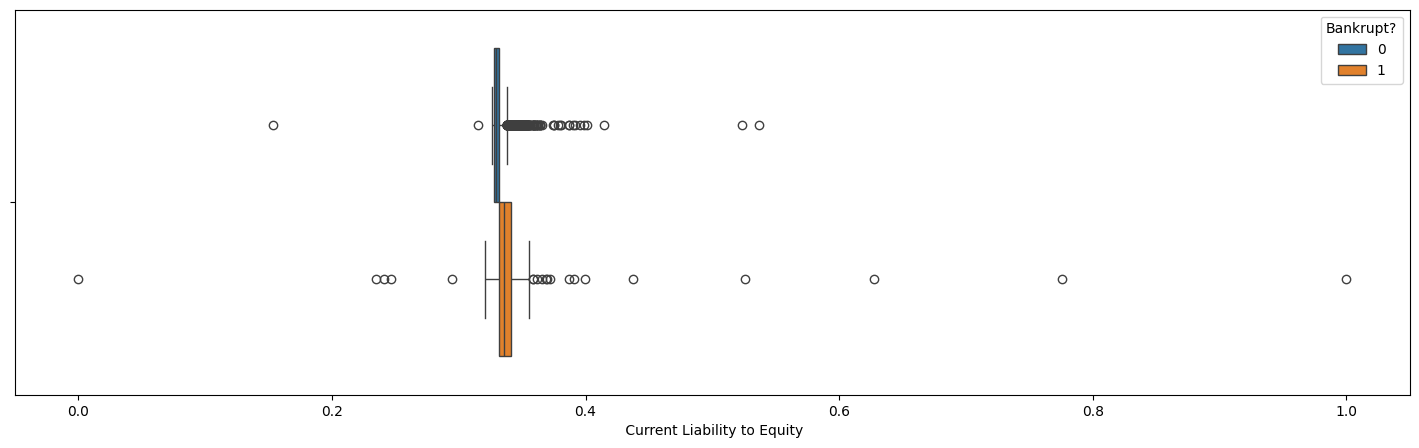

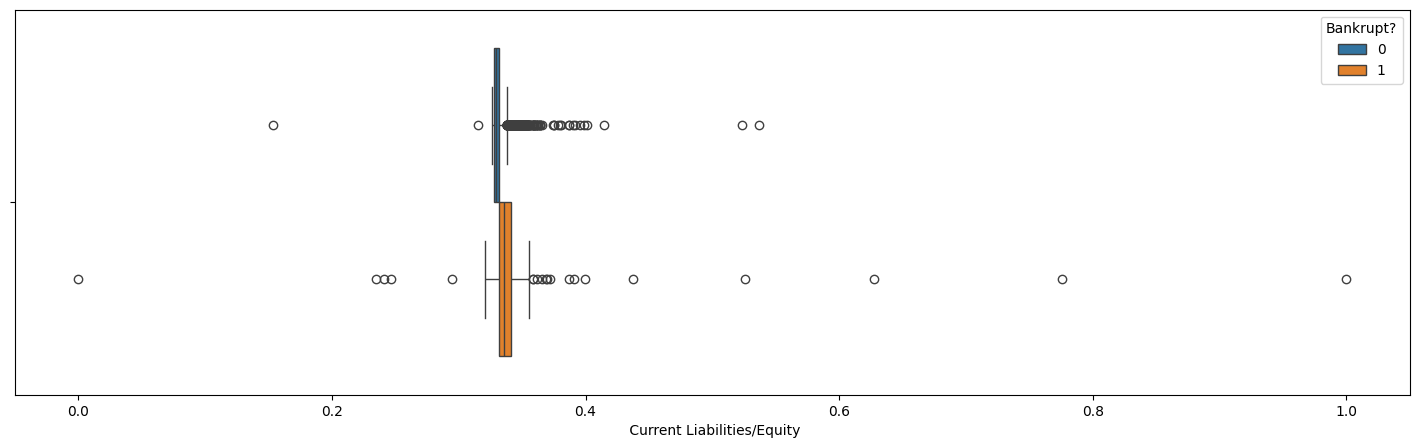

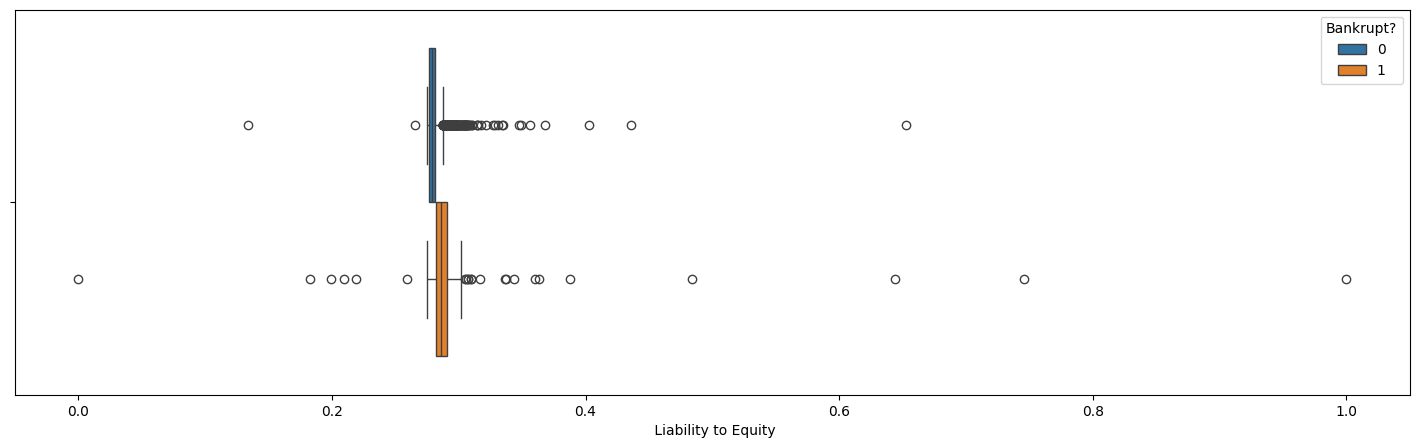

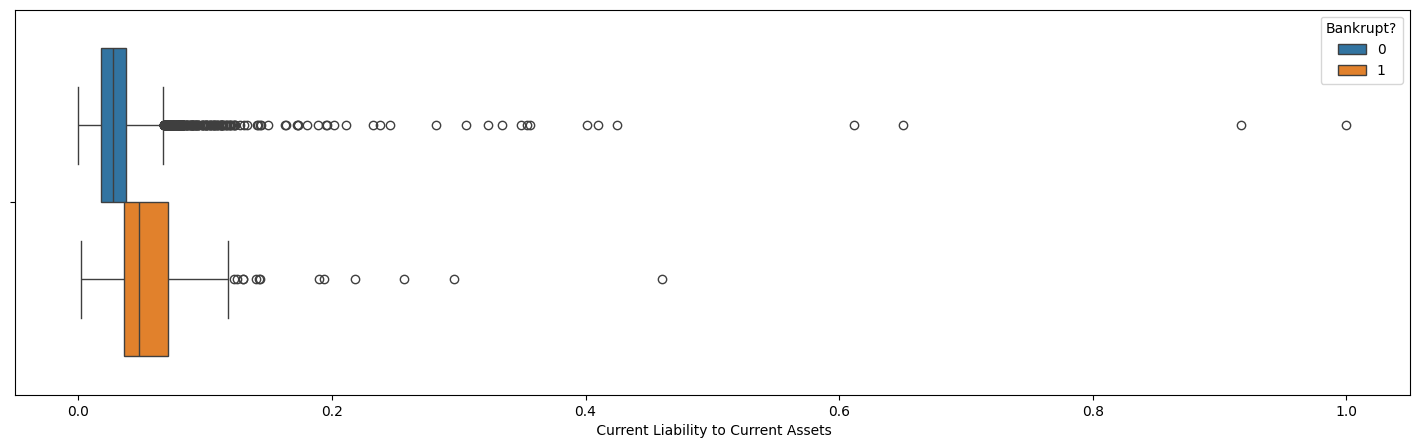

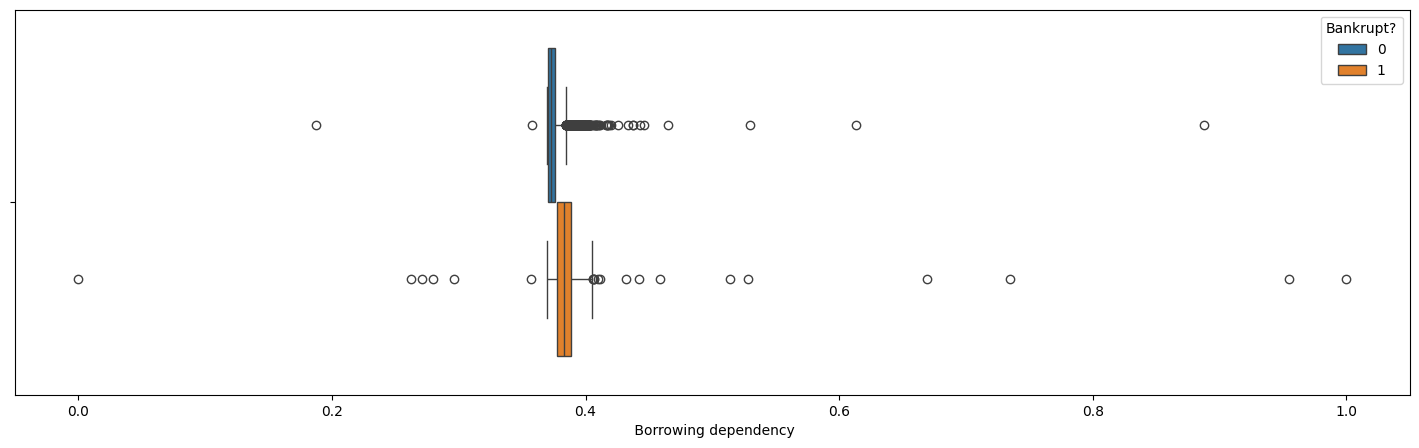

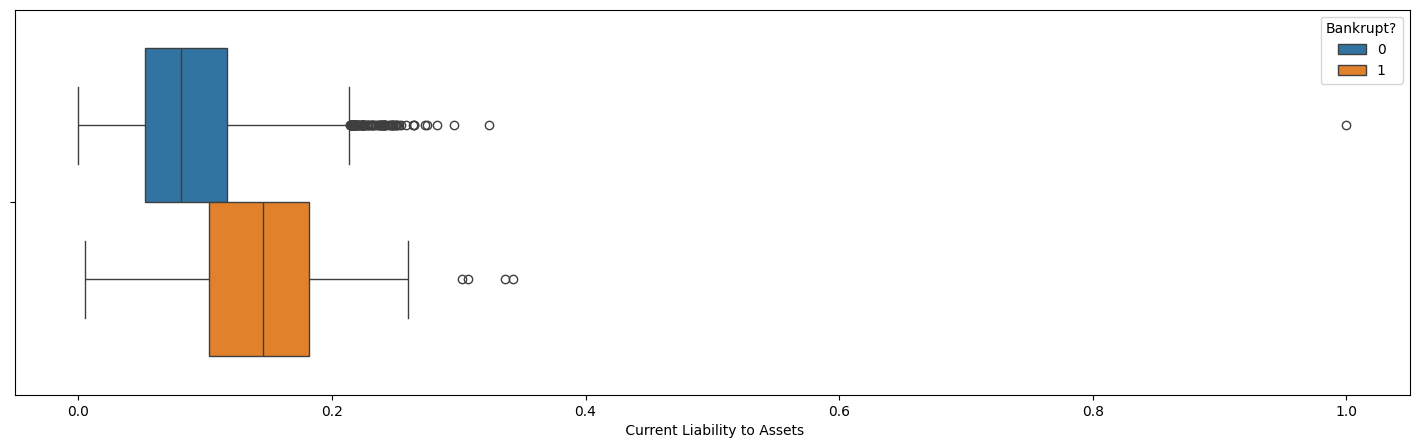

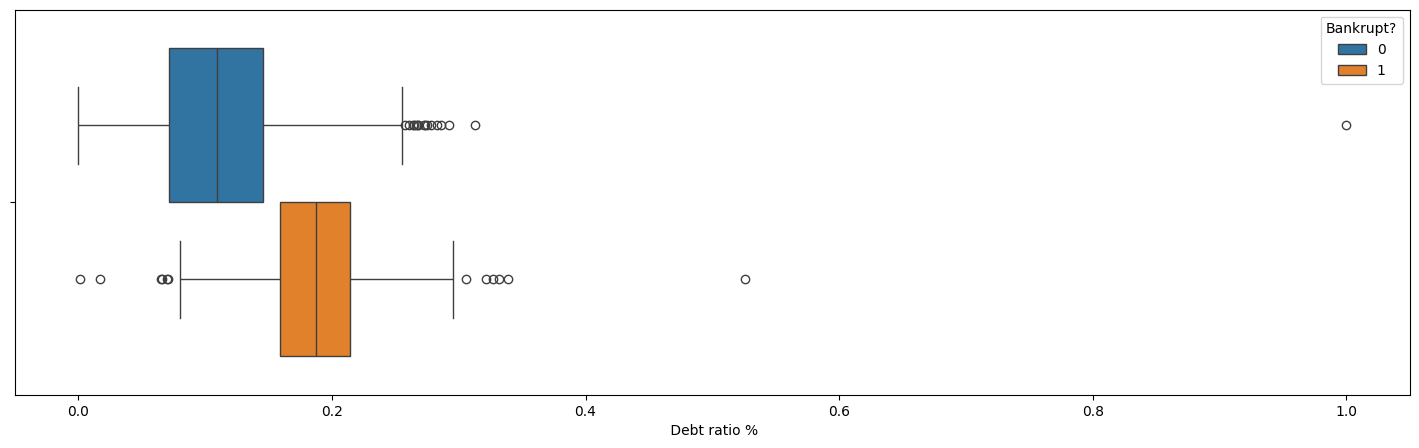

In [22]:
# show boxplots of unit range float data based on 'Bankrupt?'
unit_range_float_cols_sorted = cmp_df_corr.loc[unit_range_float_cols, 'Bankrupt?'].sort_values().index
for col in unit_range_float_cols_sorted:
    fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
    ax = fig.add_subplot(1, 1, 1)
    ax = sns.boxplot(data = cmp_bankrupt_df_no_NIF, x = col, hue = 'Bankrupt?')
    plt.show()
    fig.clear()
    plt.close(fig)

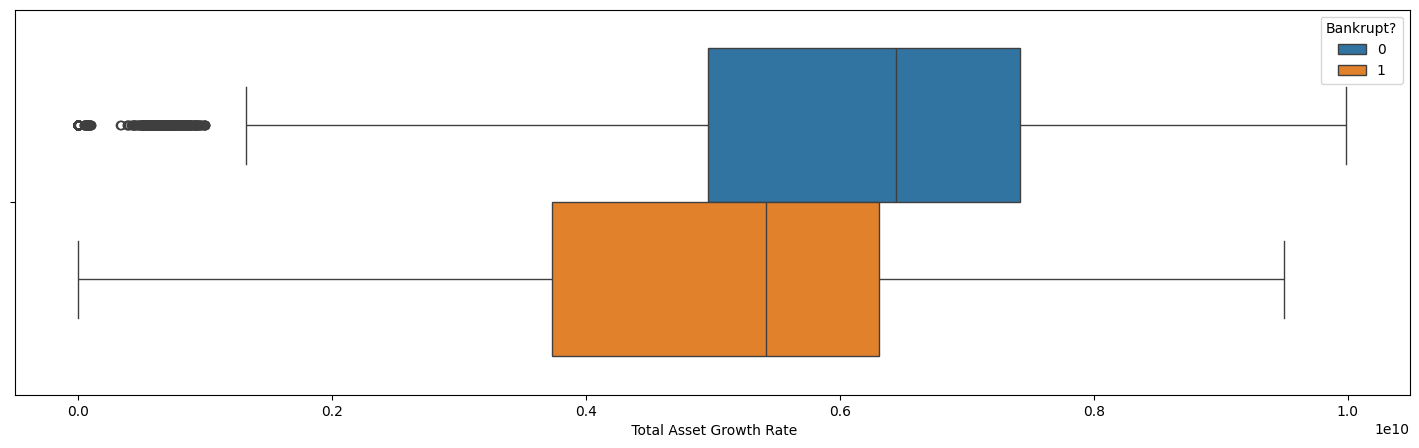

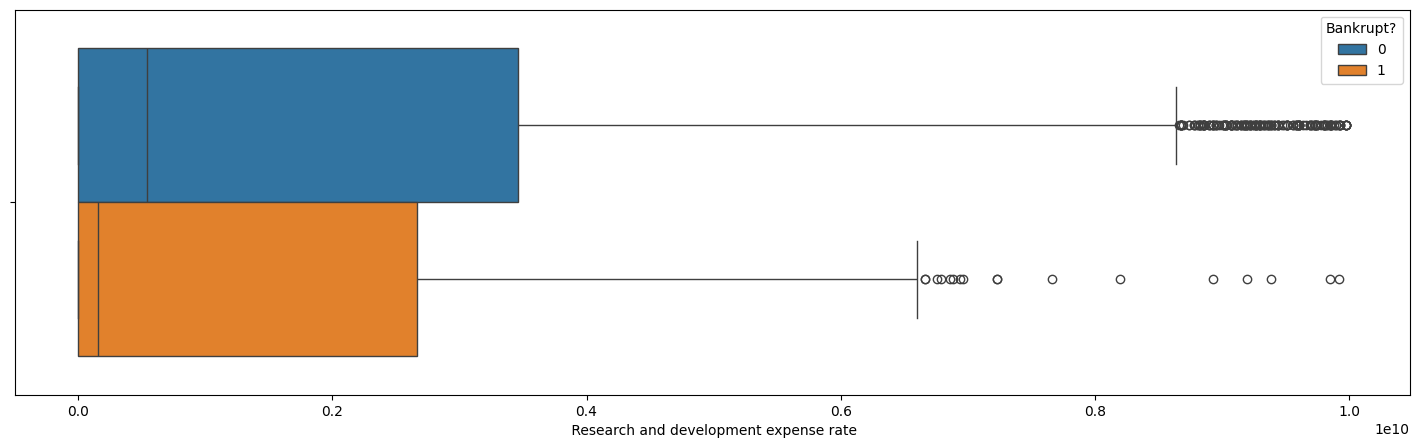

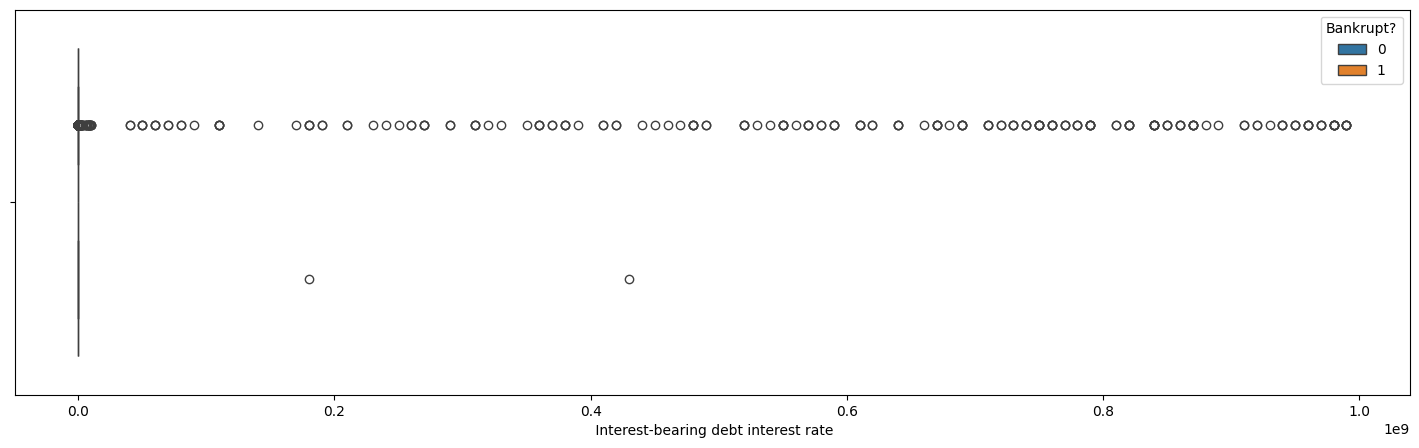

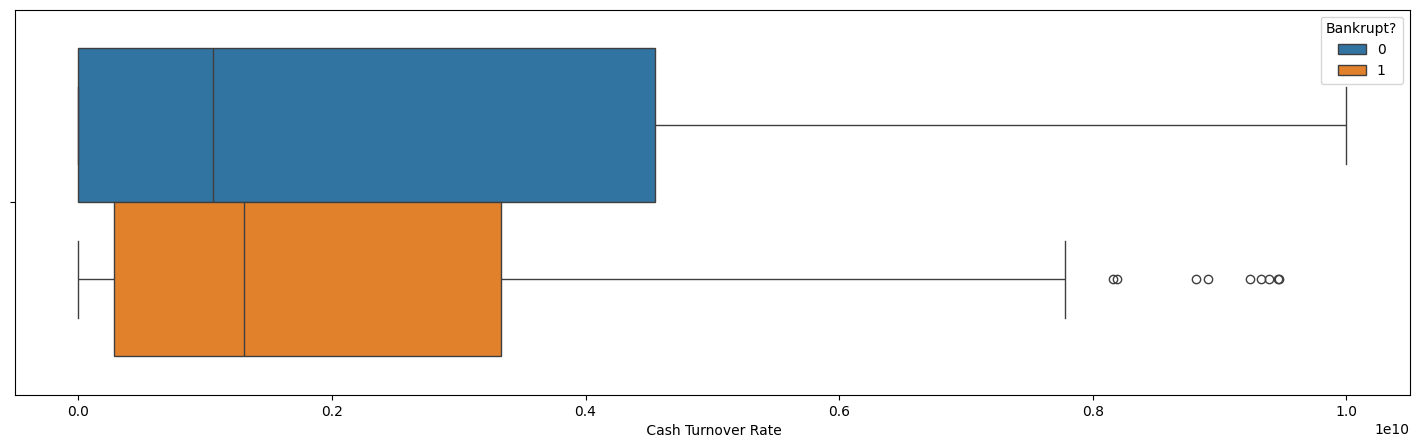

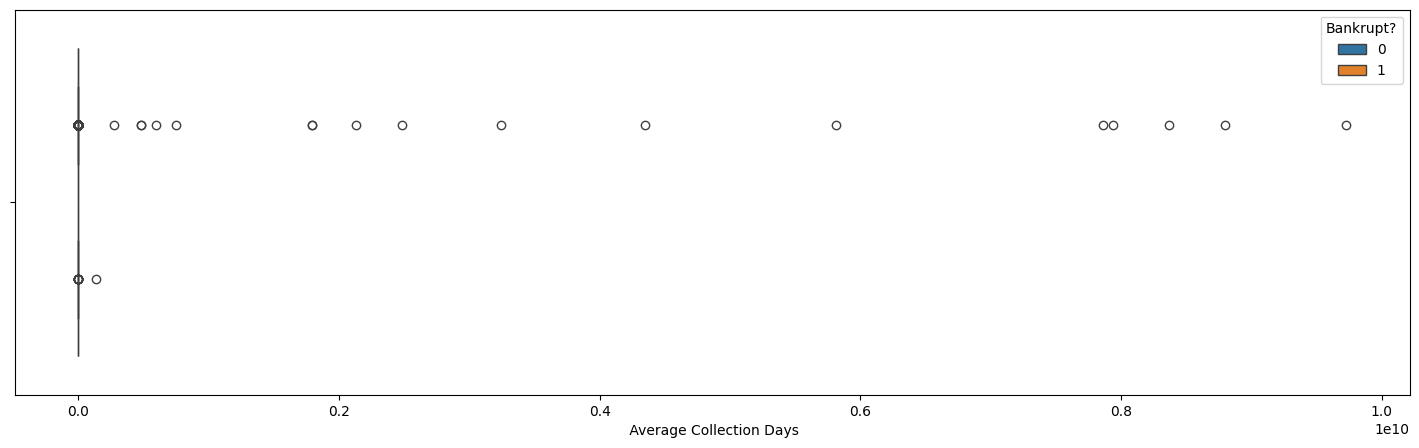

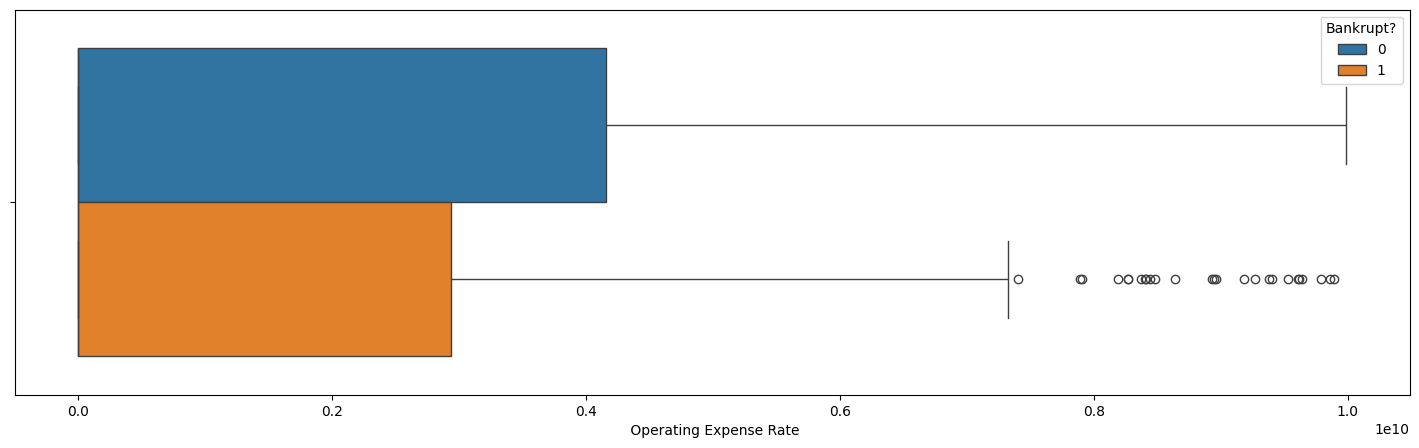

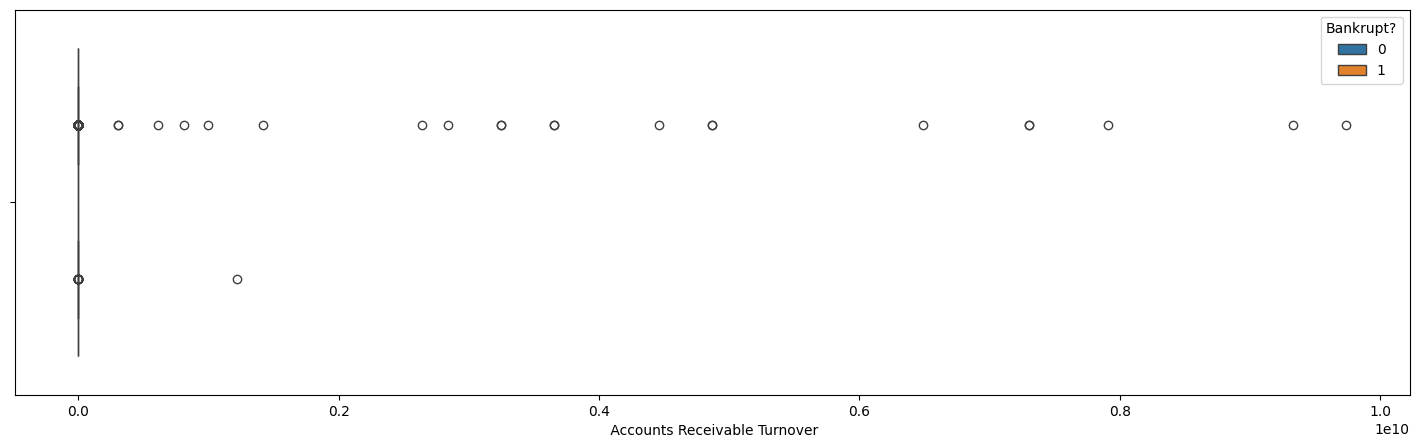

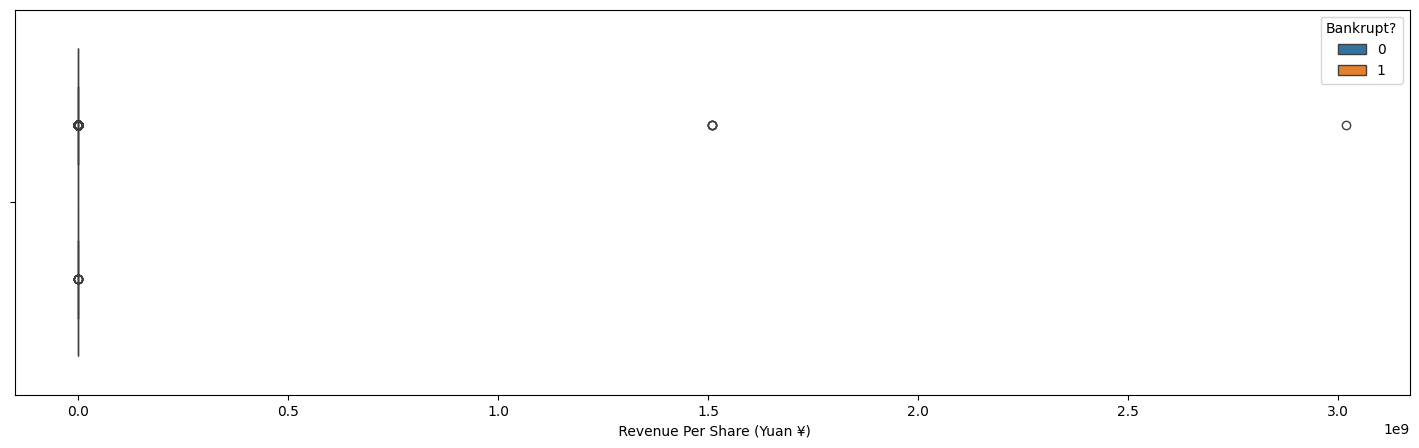

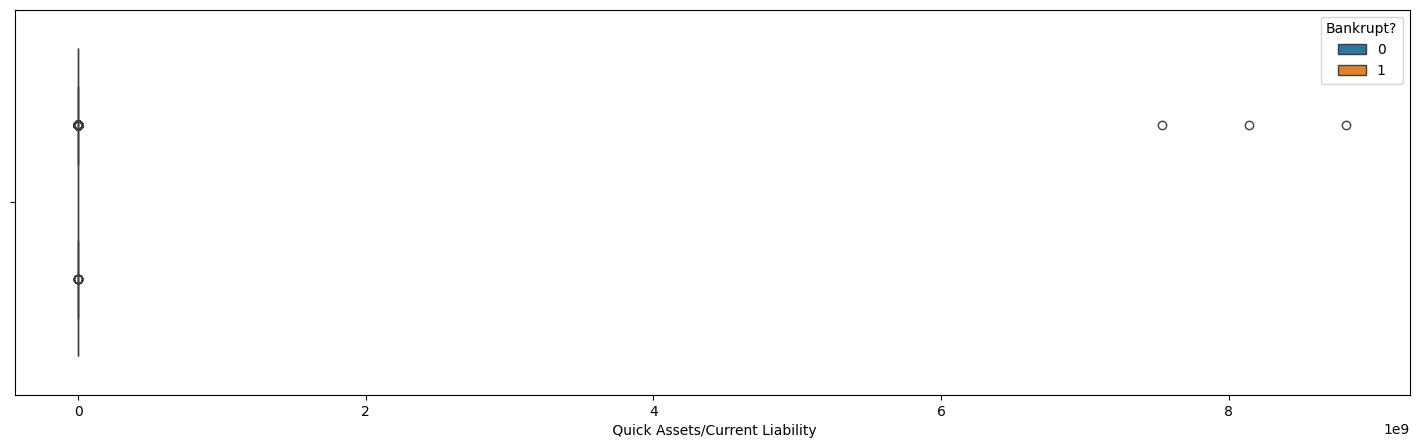

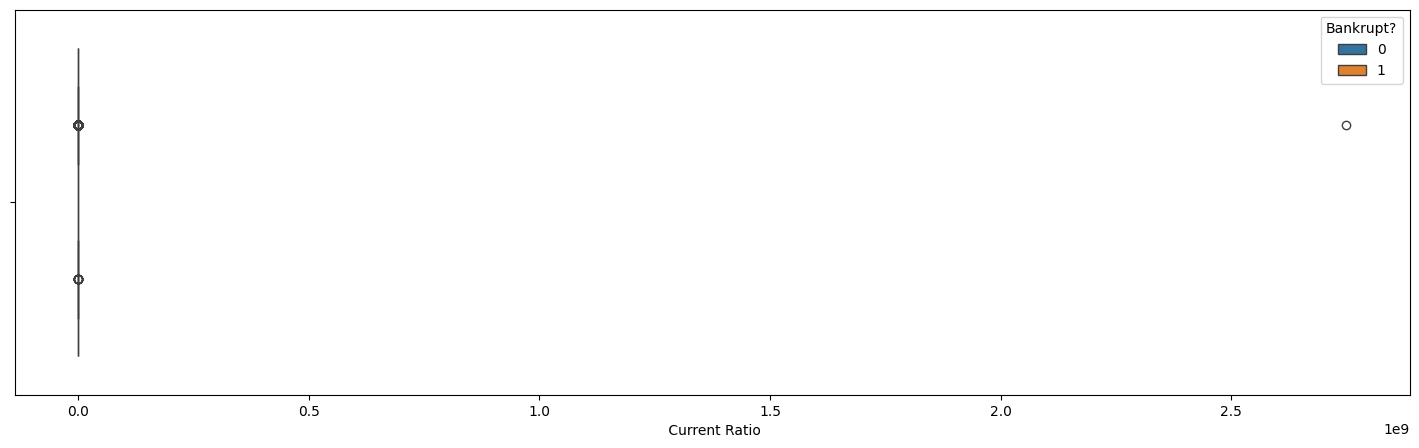

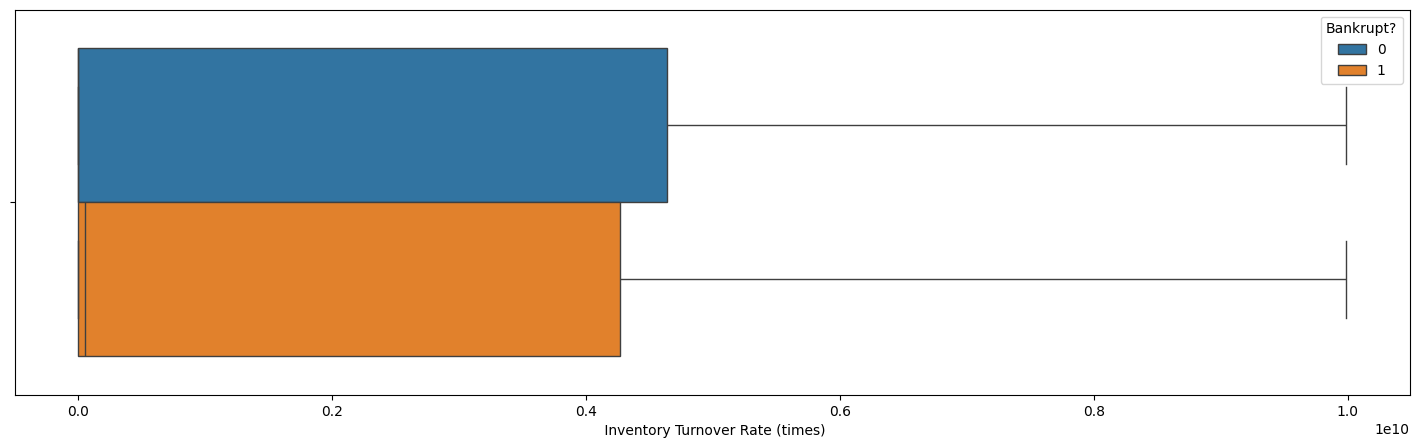

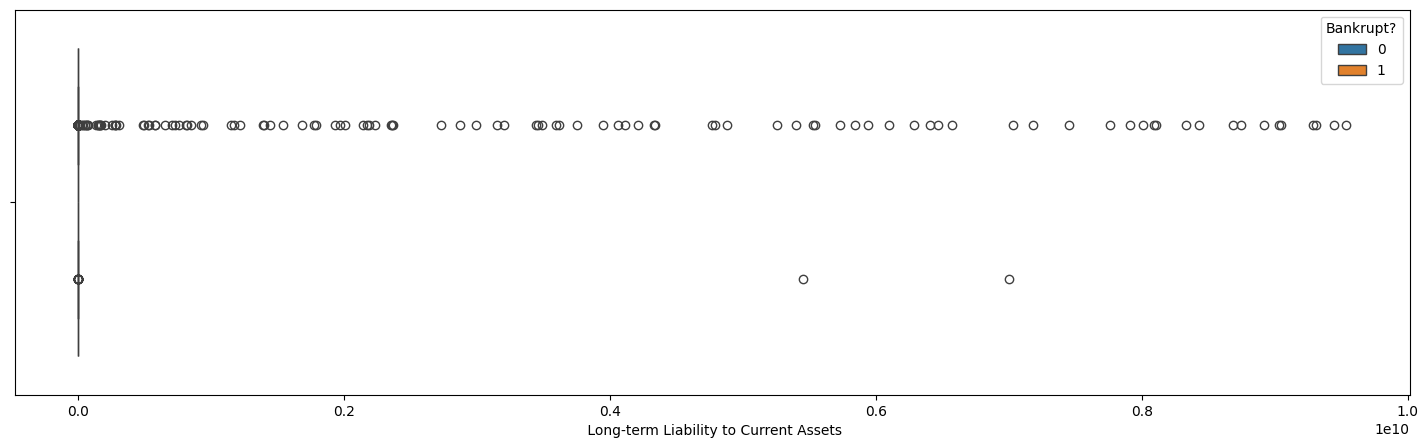

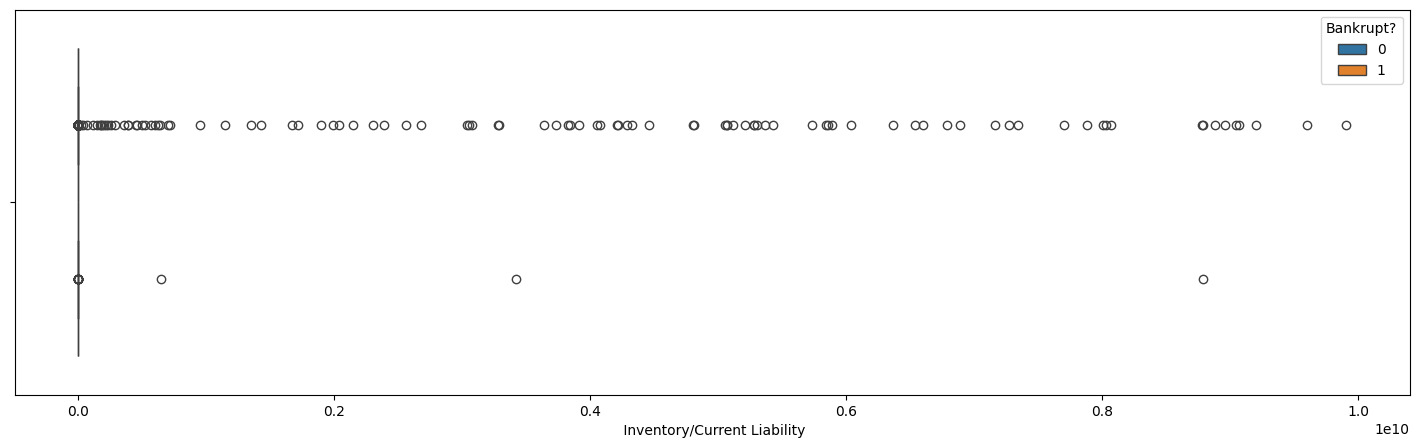

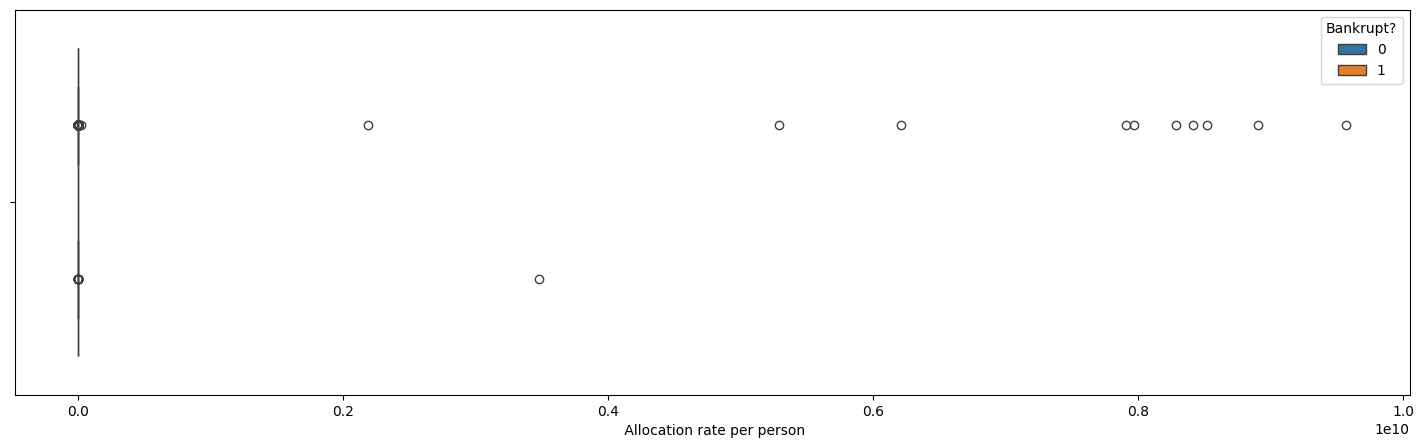

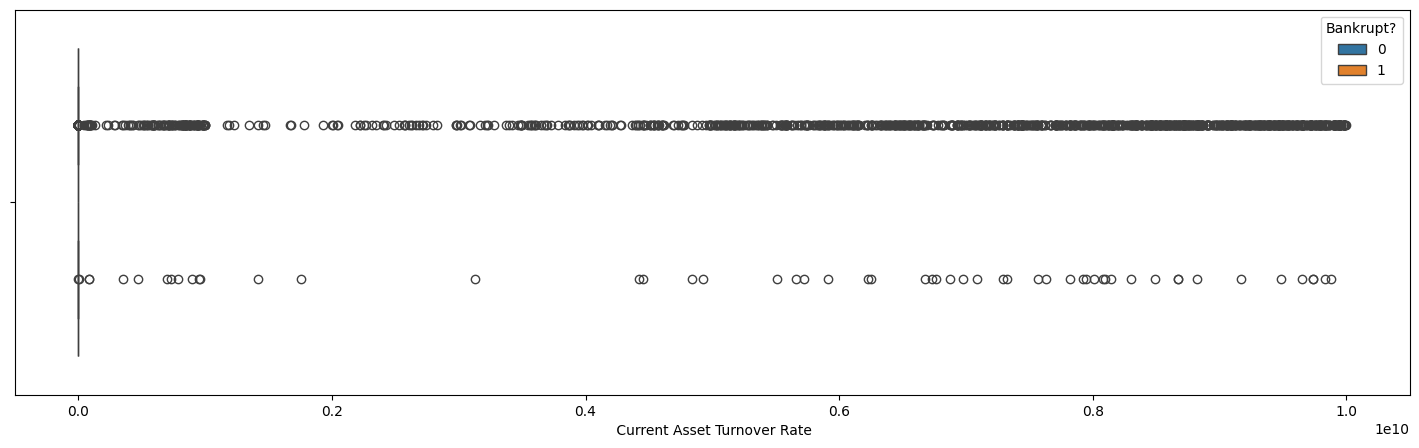

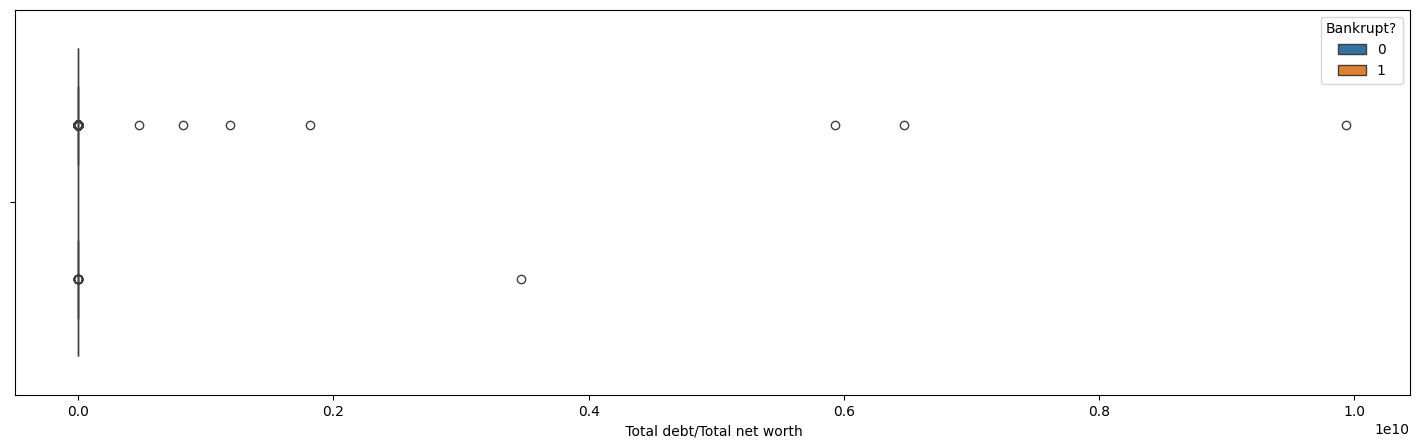

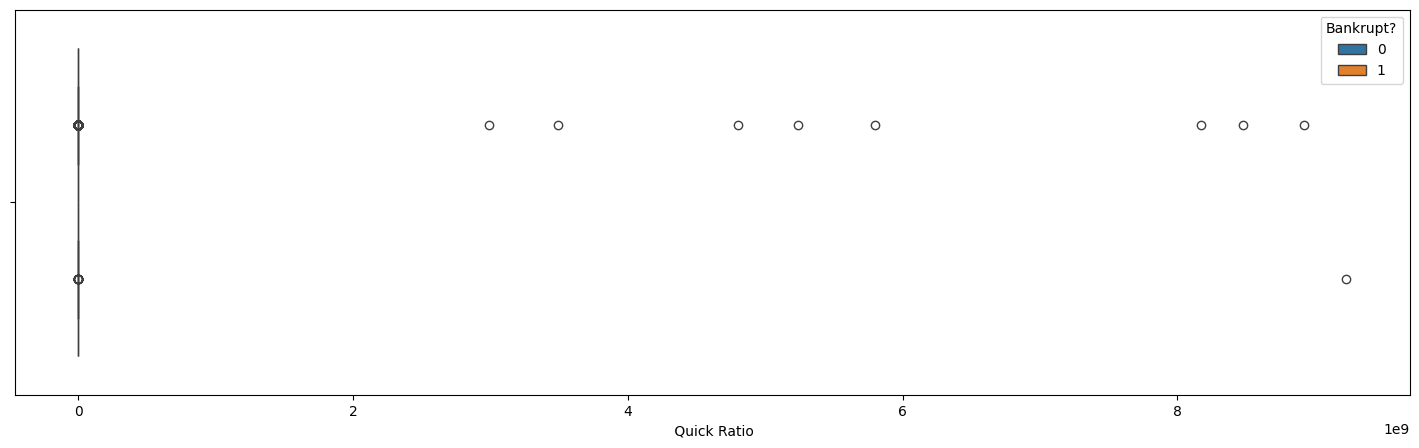

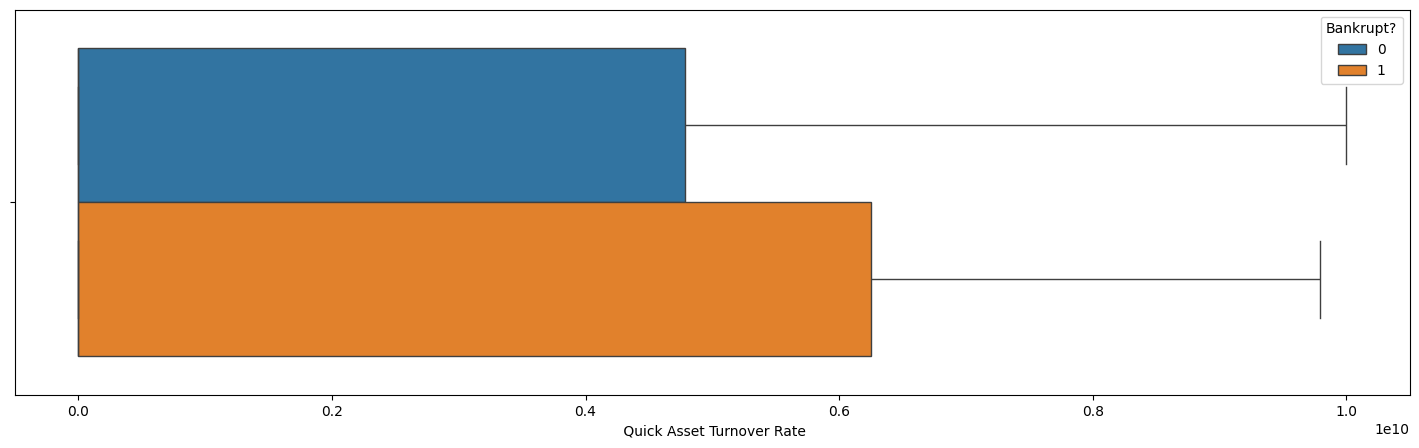

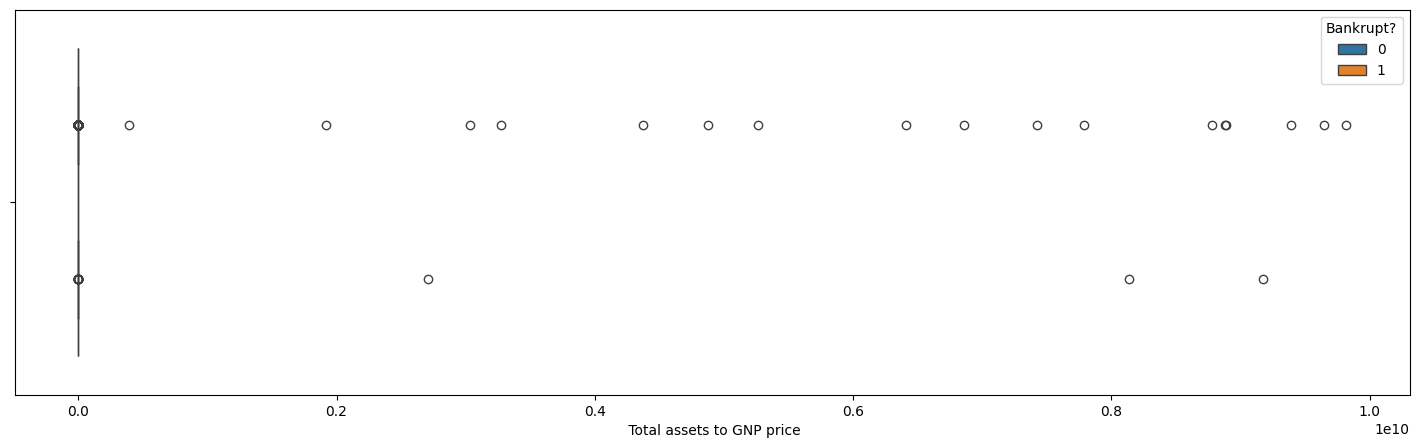

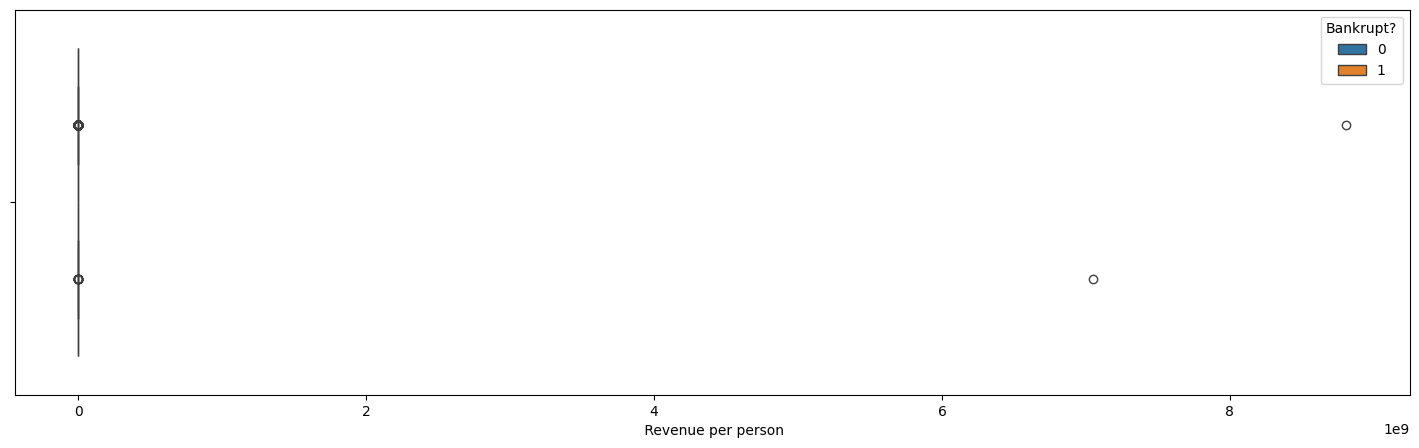

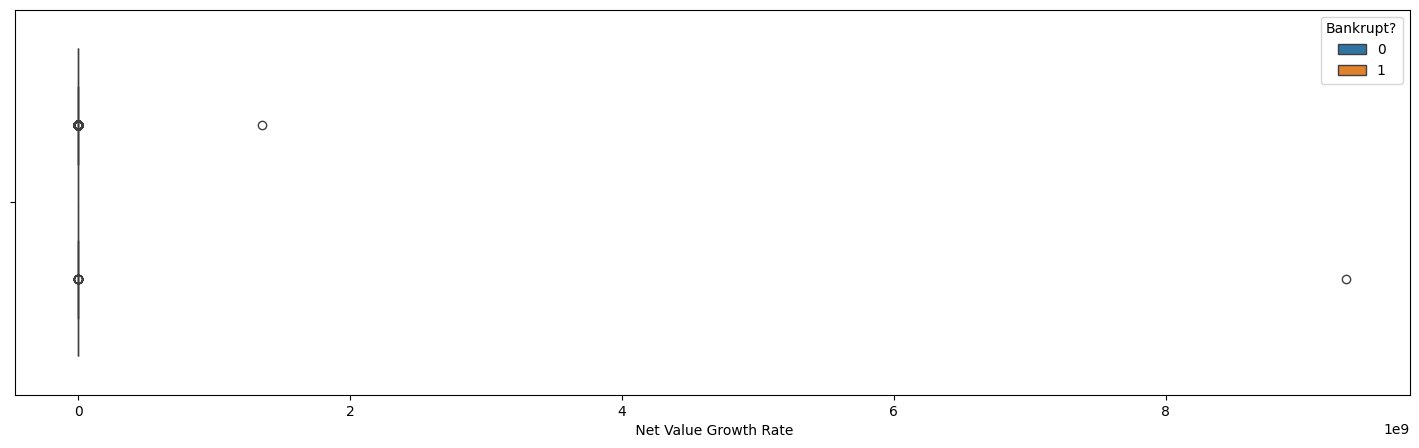

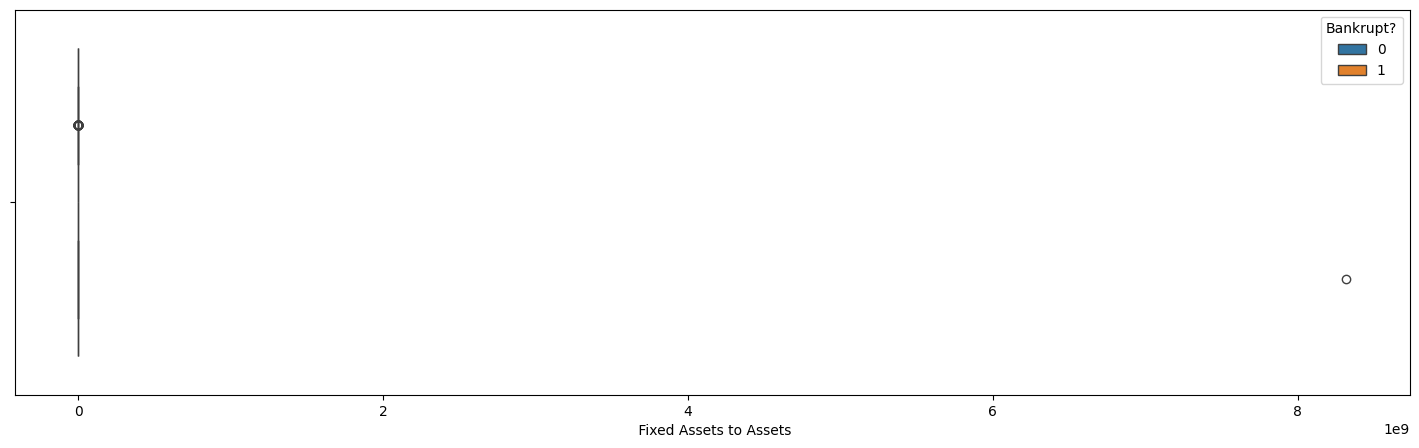

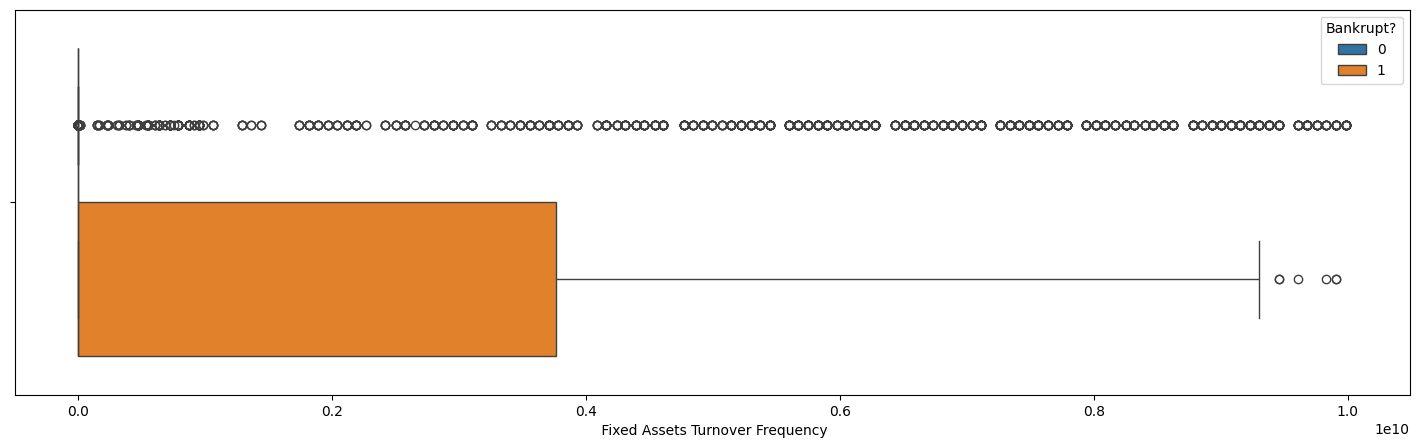

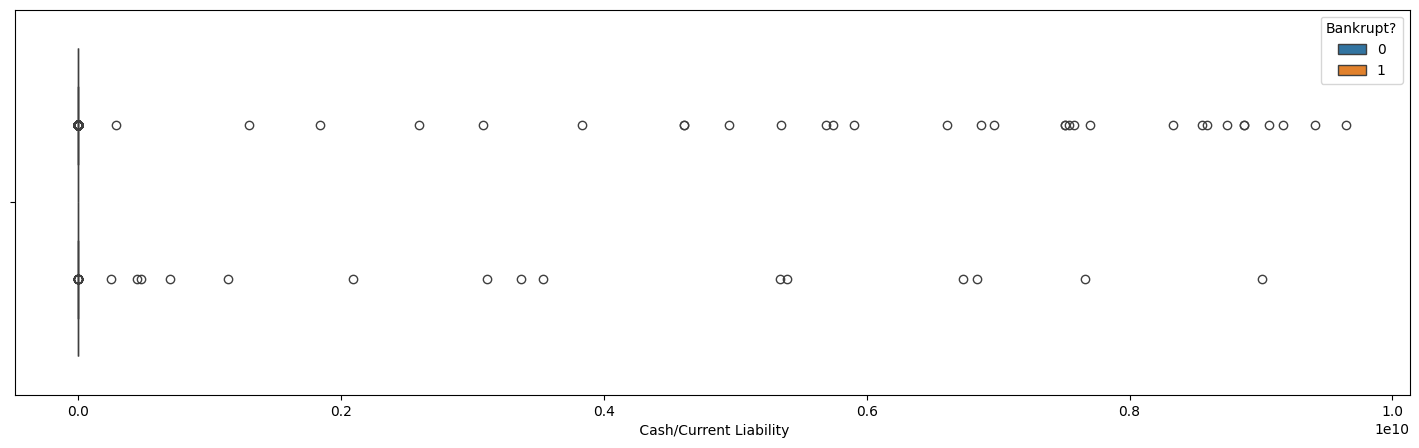

In [23]:
# show boxplots of other range float data based on 'Bankrupt?'
other_range_float_cols_sorted = cmp_df_corr.loc[other_range_float_cols, 'Bankrupt?'].sort_values().index
for col in other_range_float_cols_sorted:
    fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
    ax = fig.add_subplot(1, 1, 1)
    ax = sns.boxplot(data = cmp_bankrupt_df_no_NIF, x = col, hue = 'Bankrupt?')
    plt.show()
    fig.clear()
    plt.close(fig)

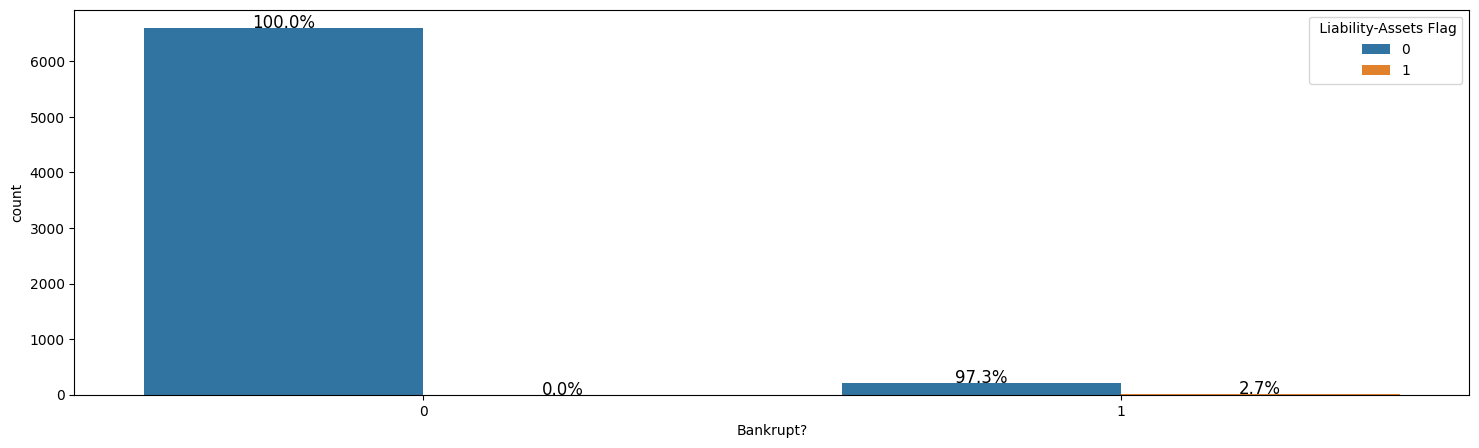

In [24]:
# show countplot of 'Bankrupt?' in relation to ' Liability-Assets Flag'
totals = cmp_bankrupt_df_no_NIF['Bankrupt?'].value_counts()
n_hues = cmp_bankrupt_df_no_NIF[' Liability-Assets Flag'].unique().size

fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
ax = fig.add_subplot(1, 1, 1)
ax = sns.countplot(data = cmp_bankrupt_df_no_NIF, x = 'Bankrupt?', hue = ' Liability-Assets Flag', order = totals.index)

temp_totals = totals.values.tolist()*n_hues
for p,t in zip(ax.patches,temp_totals):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{0:.1%}'.format(height/t),
        ha="center", fontsize=12)

plt.show()
fig.clear()
plt.close(fig)

#### Conclusion
Univariate Analysis:
- We see that almost all features have a significant number of outliers, which can be very extreme. Furthermore many features do have a very narrow distribution and/or are not particularly symmetrically distributed around the median. Might be a problem for regression models, maybe scaling helps.
- Continuous features not in unit range in particular seem to have massive outliers.
- In the categorical features ' Net Income Flag' is a constant value over the whole dataset, so we remove it since we cannot extract any information for modelling from it (stateless operation, can be done in preprocessing). In addition ' Liability-Assets Flag' is also almost constantly 0 over the whole dataset.

Multivariate Analysis:
- We see 5 bigger clusters of strongly correlated features, 4 of which contain features which display a decent correlation to the target feature. Additionally some smaller clusters and seemingly isolated features in terms of correlations exist, generally exhibiting moderate to low correlation to the target feature.
- The target feature itself appears rather isolated from the other features in terms of correlation. Some moderate correlations to other features exist, but none of them is strong enough that one could assume the target to be explained by a single feature.
- We look at the boxplots of continuous features separated by the target feature. Here we see that the separated two main boxplot regions of the features most correlated to the target feature for the most part have no overlap. Could indicate that some binary decision process on these might work well (Decision Tree). Furthermore it suggests that (moderate) outliers provide valuable information and cannot simply be excluded.
- Looking at the boxplots and correlation with the target feature, we see that continuous features not in unit range in general seem rather unimportant.
- ' Liability-Assets Flag' is only 1 if the company is bankrupt. However only a tiny fraction of actually bankrupt companies have this flag set to 1. So probably this feature will not be particurlarly helpful either for modelling, which would mean that we would only need to care about continous features. Furthermore since the feature is binary, we do not need to encode it and can simply treat it as a continuous feature capped with 0 and 1.

## 3. Feature Engineering and Modeling

### 3.1 Train Test Split

First get a train test split to be kept throughout the rest of the project and a KFold for cross validation to be used on the train set. Use test set only for finally selected model!

In [25]:
seed = 799
X_train , X_test , y_train , y_test = train_test_split(cmp_bankrupt_df_no_NIF.drop('Bankrupt?', axis = 1),
                                                       cmp_bankrupt_df_no_NIF['Bankrupt?'],
                                                       test_size = 0.25,
                                                       random_state=seed)
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

### 3.2 Baseline Model

It may be useful to fit a simple baseline model based on what we learned in EDA first, let's fit a decision tree of depth 1 (single decision) using only ' Net Income to Total Assets'. Heuristically that might work well enough, since it is the feature with the highest correlation to the target feature, it makes sense conceptually that this should be linked to bankruptcy and boxplots from multivariate analysis show that this feature seems to separate bankrupt and not bankrupt companies pretty well.

In [26]:
base_feature = ' Net Income to Total Assets'
X_train_base = X_train[[base_feature]]
X_test_base = X_test[[base_feature]]

In [27]:
# initialize decision tree model
decision_tree_base = DecisionTreeClassifier(max_depth = 1, random_state=seed)

In [28]:
# fit model
decision_tree_base.fit(X_train_base, y_train)

DecisionTreeClassifier(max_depth=1, random_state=799)

In [29]:
# show single chosen threshold on ' Net Income to Total Assets'
decision_tree_base.tree_.threshold[0]

0.7286920547485352

In [30]:
# predict targets
y_train_hat = decision_tree_base.predict(X_train_base)
y_train_hat_probs = decision_tree_base.predict_proba(X_train_base)[:,1]

In [31]:
# define functions for model checking to be used throughout

def show_metrics(y_true, y_predict, y_predict_proba):
    print('confusion matrix')
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_true, y_predict))
    disp.plot()
    plt.show()
    print(f'classification report\n {metrics.classification_report(y_true, y_predict)}\n')
    print(f'average precision score {metrics.average_precision_score(y_true, y_predict_proba)}')
    pass

def cross_validation_show(model, data_X, data_y, k_fold, scoring, plot_scores = True):
    # validate the prediction
    results = cross_validate(model, data_X, data_y, cv=k_fold, scoring = scoring, return_train_score = True)
    for split in ('train', 'test'):
        for measure in scoring:
            print(f'mean {split} {measure}: {results[f'{split}_{measure}'].mean()}')
        if split != 'test': print('\n')

    if plot_scores:
        # visualize test scores
        score_df_list = []
        for measure in scoring:
            score_df_curr = pd.DataFrame({'Iteration':list(range(1,kfold.get_n_splits()+1)),
                                          'Score':results[f'test_{measure}'],
                                          'Measure':measure})
            score_df_list.append(score_df_curr)
        score_df = pd.concat(score_df_list, axis = 0)
    
        fig = plt.figure(num = 1, figsize = (18, 5), clear = True)
        ax = fig.add_subplot(1, 1, 1)
        ax = sns.lineplot(score_df, x = 'Iteration', y = 'Score', hue = 'Measure')
        plt.locator_params(axis='x', nbins=kfold.get_n_splits())
        plt.show()
        fig.clear()
        plt.close(fig)

    return results

def cross_validation_confusion_matrix_show(model, data_X, data_y, k_fold, threshold = 0.5):
    data_y_prob_cross = cross_val_predict(model, data_X, data_y, cv=k_fold, method = 'predict_proba')
    data_y_cross = (data_y_prob_cross[:,1] > threshold).astype('int64')
    i = 1
    for train_ix, test_ix in kfold.split(data_X):
        print(f'confusion matrix {i} \n {metrics.confusion_matrix(data_y.values[test_ix], data_y_cross[test_ix])}') # simple print of iterative confusion matrix to save space
        i += 1
    print('sum of confusion matrices')
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(data_y, data_y_cross)) # plot summed up confusion matrices
    disp.plot()
    plt.show()
    pass

In [32]:
# define scoring measures to be used throughout
scoring_measures_cross_val = ('accuracy', 'precision', 'recall', 'f1', 'average_precision')

confusion matrix


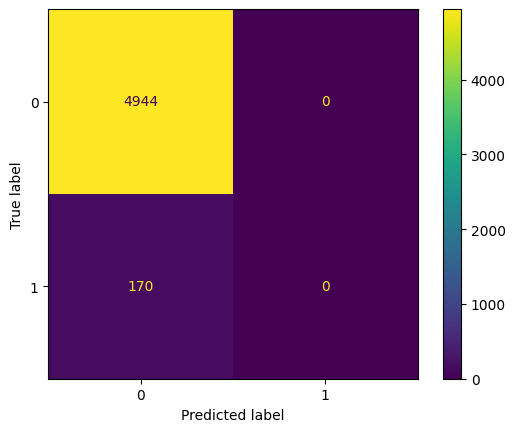

classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4944
           1       0.00      0.00      0.00       170

    accuracy                           0.97      5114
   macro avg       0.48      0.50      0.49      5114
weighted avg       0.93      0.97      0.95      5114


average precision score 0.12558918105111944


\\uniqa.at\konzern$\Abteilung\GRM\05-Teams\03-MRM\01-Members\Thomas\masterclass\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\uniqa.at\konzern$\Abteilung\GRM\05-Teams\03-MRM\01-Members\Thomas\masterclass\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
\\uniqa.at\konzern$\Abteilung\GRM\05-Teams\03-MRM\01-Members\Thomas\masterclass\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

In [33]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

Accuracy is pretty good, which is misleading however due to an imbalanced data set (most companies are not actually bankrupt in the data set). We can however already stop with further evaluation, since it seems that the model is paying too much attention to the not actually bankrupt companies, because 0 companies are predicted as bankrupt. Recall seems to be the most important measure here, since we do not want to misclassify a company as not being bankrupt when it is actually bankrupt (whatever the application will be we probably want to be conservative here and capture most bankrupt companies with the model), whereas misclassifying a not actually bankrupt company as bankrupt seems less bad. We therefore need to address the imbalance somehow before proceeding further.

#### 3.2.1 Balancing class weight

The next best thing to try after our initial baseline modelling would probably be addressing the data imbalance. We can do this by using the class weight parameter in our base model, to make the datapoints labeled as bankrupt more important. This might lead to a better initial baseline.

In [34]:
# initialize decision tree model
decision_tree_base_balanced = DecisionTreeClassifier(max_depth = 1, random_state=seed, class_weight = 'balanced')

In [35]:
# fit model
decision_tree_base_balanced.fit(X_train_base, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=799)

In [36]:
# show single chosen threshold on ' Net Income to Total Assets'
decision_tree_base_balanced.tree_.threshold[0]

0.8007920980453491

In [37]:
# predict targets
y_train_hat = decision_tree_base_balanced.predict(X_train_base)
y_train_hat_probs = decision_tree_base_balanced.predict_proba(X_train_base)[:,1]

confusion matrix


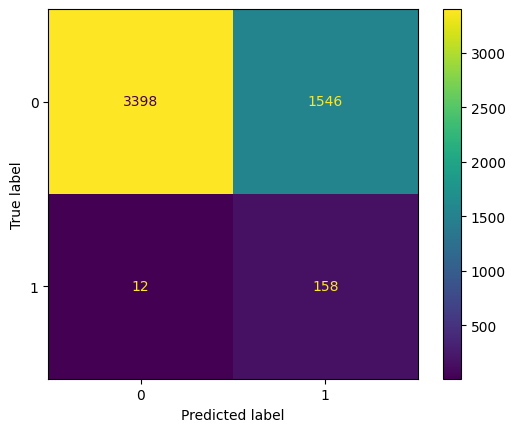

classification report
               precision    recall  f1-score   support

           0       1.00      0.69      0.81      4944
           1       0.09      0.93      0.17       170

    accuracy                           0.70      5114
   macro avg       0.54      0.81      0.49      5114
weighted avg       0.97      0.70      0.79      5114


average precision score 0.0885243512267174


In [38]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

looks better let's do some cross validation testing

mean train accuracy: 0.697453538935881
mean train precision: 0.09326718247472726
mean train recall: 0.9287601571109304
mean train f1: 0.16950367216576262
mean train average_precision: 0.08899049140293956


mean test accuracy: 0.6969063417318981
mean test precision: 0.09241809118792196
mean test recall: 0.9179261265909874
mean test f1: 0.16726219060046632
mean test average_precision: 0.08762928071370439


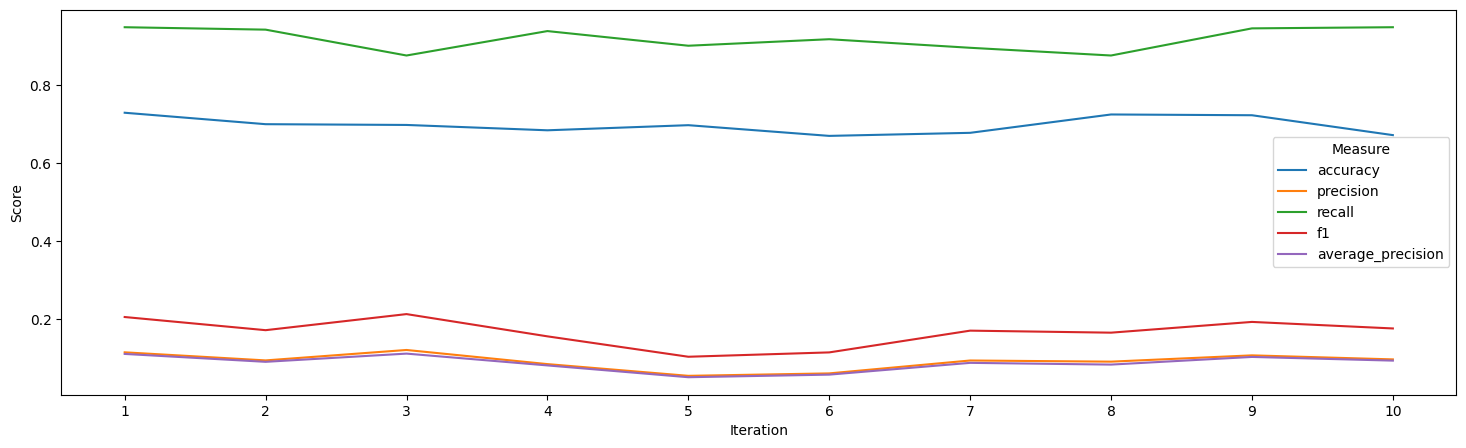

In [39]:
# validate the prediction
cross_val_results = cross_validation_show(decision_tree_base_balanced, X_train_base, y_train, kfold, scoring_measures_cross_val)

confusion matrix 1 
 [[355 138]
 [  1  18]]
confusion matrix 2 
 [[342 153]
 [  1  16]]
confusion matrix 3 
 [[336 152]
 [  3  21]]
confusion matrix 4 
 [[335 161]
 [  1  15]]
confusion matrix 5 
 [[347 154]
 [  1   9]]
confusion matrix 6 
 [[331 168]
 [  1  11]]
confusion matrix 7 
 [[329 163]
 [  2  17]]
confusion matrix 8 
 [[356 139]
 [  2  14]]
confusion matrix 9 
 [[352 141]
 [  1  17]]
confusion matrix 10 
 [[325 167]
 [  1  18]]
sum of confusion matrices


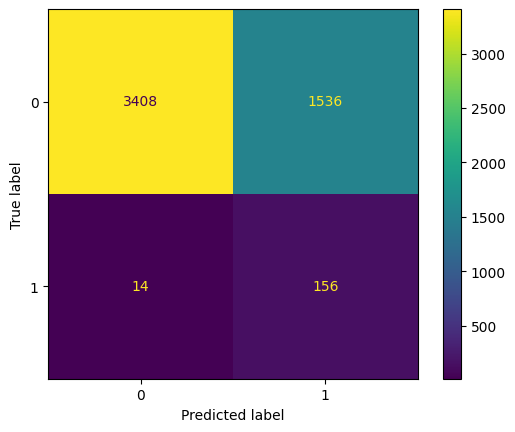

In [40]:
# get confusion matrices and sum of them for cross predicted models
cross_validation_confusion_matrix_show(decision_tree_base_balanced, X_train_base, y_train, kfold)

Adding the weight balancing parameter definetly helped with improving the recall, which we care most about. We do have a very small amount of false negatives now, which is good. Unfortunately the precision is rather bad now due to a non negligible amount of false positives, we should try getting better here since although it should not be the most important feature of our model to have low false positives they should still not get too large (we do not want to be too conservative). Still the majority of the not bankrupt companies are also classified as not bankrupt, shown by a decent accuracy. So this seems to work reasonably well as a baseline, we should be able to beat this to justify more complex modelling.

#### Conclusion
A simple decision tree baseline model of depth 1 based on correlation with the target and heuristics seems to suffice to achieve a good recall with moderate accuracy. Precision is however not very optimal, maybe this can be improved by more complex modeling approaches.

### 3.3 Further low depth decision trees

Let's try something just a little more complex first. Let's fit a decision tree of max depth 6 to the first 6 highest correlated features from the clusters retrieved from hierarchical clustering, again heuristically that might work well enough.

In [41]:
# repeat hierarchical clustering on the train set, since we should not use clustering information from EDA for learning
df_corr_train = pd.concat([X_train, y_train], axis = 1).corr().clip(lower = -0.999999) # there appears to a problem with a correlation estimated to be slightly higher than -1
df_corr_clustered_train, target_corr_abs_max_by_cluster_train = hierarchical_corr_clustering(df_corr_train, 'Bankrupt?', 0.5)

In [42]:
# get feature names to be considered, restrict X_train, X_test
cluster_features = target_corr_abs_max_by_cluster_train.head(6).index
X_train_cluster = X_train[cluster_features]
X_test_cluster = X_test[cluster_features]

In [43]:
# show chosen features
cluster_features

Index([' Net Income to Total Assets', ' Debt ratio %',
       ' Persistent EPS in the Last Four Seasons',
       ' Working Capital to Total Assets',
       ' Net Income to Stockholder's Equity', ' Total expense/Assets'],
      dtype='object')

In [44]:
# initialize decision tree model
decision_tree_cluster = DecisionTreeClassifier(random_state=seed, class_weight = 'balanced', max_depth = 6)

In [45]:
# fit model
decision_tree_cluster.fit(X_train_cluster, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=799)

In [46]:
# predict targets
y_train_hat = decision_tree_cluster.predict(X_train_cluster)
y_train_hat_probs = decision_tree_cluster.predict_proba(X_train_cluster)[:,1]

confusion matrix


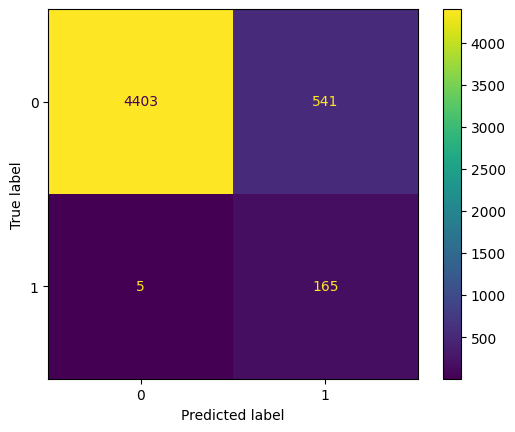

classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      4944
           1       0.23      0.97      0.38       170

    accuracy                           0.89      5114
   macro avg       0.62      0.93      0.66      5114
weighted avg       0.97      0.89      0.92      5114


average precision score 0.42978553054124785


In [47]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8965368087985246
mean train precision: 0.24206387853886363
mean train recall: 0.97389192216687
mean train f1: 0.3871581226441141
mean train average_precision: 0.4345479346912712


mean test accuracy: 0.8830674382338553
mean test precision: 0.18847873654146838
mean test recall: 0.7641898864809081
mean test f1: 0.2991526225917854
mean test average_precision: 0.2753982598640102


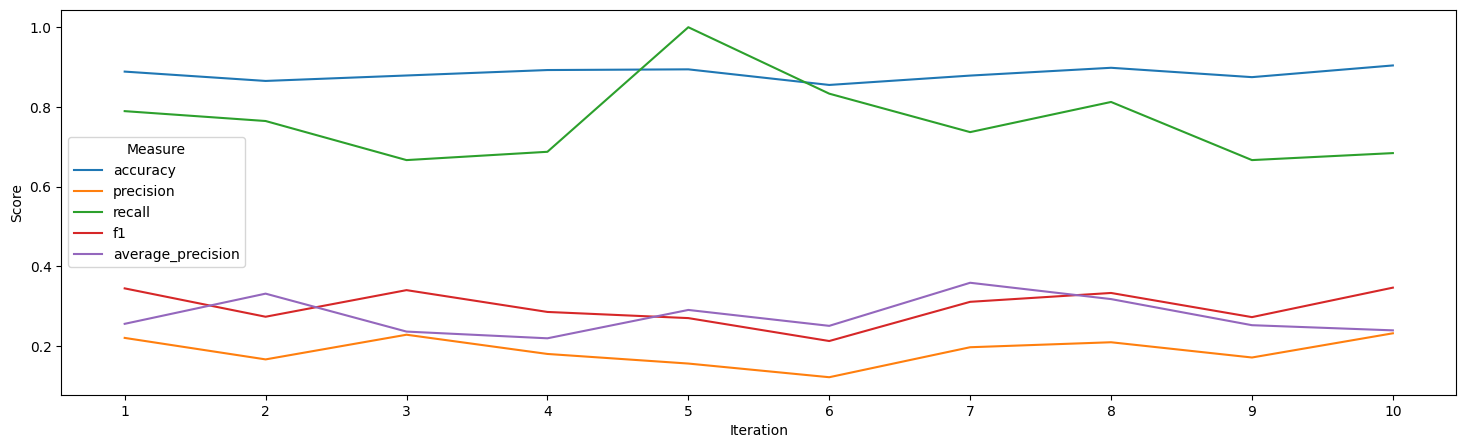

In [48]:
# validate the prediction
cross_val_results = cross_validation_show(decision_tree_cluster, X_train_cluster, y_train, kfold, scoring_measures_cross_val)

confusion matrix 1 
 [[440  53]
 [  4  15]]
confusion matrix 2 
 [[430  65]
 [  4  13]]
confusion matrix 3 
 [[434  54]
 [  8  16]]
confusion matrix 4 
 [[446  50]
 [  5  11]]
confusion matrix 5 
 [[447  54]
 [  0  10]]
confusion matrix 6 
 [[427  72]
 [  2  10]]
confusion matrix 7 
 [[435  57]
 [  5  14]]
confusion matrix 8 
 [[446  49]
 [  3  13]]
confusion matrix 9 
 [[435  58]
 [  6  12]]
confusion matrix 10 
 [[449  43]
 [  6  13]]
sum of confusion matrices


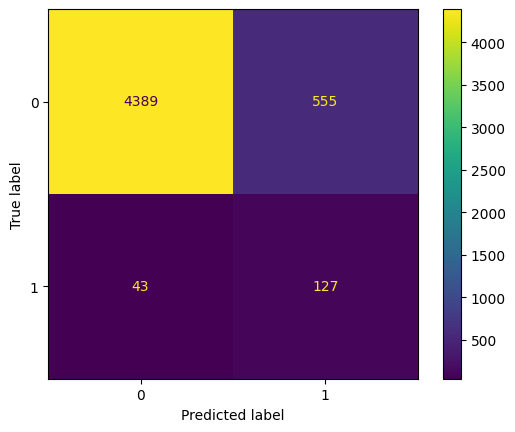

In [49]:
# get confusion matrices and sum of them for cross predicted models
cross_validation_confusion_matrix_show(decision_tree_cluster, X_train_cluster, y_train, kfold)

Looks ok in terms of recall. Precision, f1 score, average precision and accuracy has gotten somewhat better compared to baseline model. Still we do see quite a considerable amount of additional false negatives now, so it is questionable if this is an improvement to the baseline. We probably need something better.

Let's see if using all features, while keeping the same max depth actually helps.

In [50]:
# initialize decision tree model
decision_tree_full = DecisionTreeClassifier(random_state=seed, class_weight = 'balanced', max_depth = 6)

In [51]:
# fit model
decision_tree_full.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=799)

In [52]:
# show chosen features
decision_tree_full_feature_series = pd.Series(decision_tree_full.feature_importances_, index = X_train.columns)
decision_tree_full_feature_series = decision_tree_full_feature_series[decision_tree_full_feature_series > 0.0].sort_values(ascending = False)
decision_tree_full_feature_series

Persistent EPS in the Last Four Seasons               4.890663e-01
Interest Expense Ratio                                1.077792e-01
Total debt/Total net worth                            8.454756e-02
Cash/Total Assets                                     3.322365e-02
Average Collection Days                               3.165716e-02
Borrowing dependency                                  2.731686e-02
Research and development expense rate                 2.336265e-02
Degree of Financial Leverage (DFL)                    2.208420e-02
Retained Earnings to Total Assets                     1.728668e-02
Quick Assets/Total Assets                             1.616206e-02
Current Assets/Total Assets                           1.561017e-02
Interest-bearing debt interest rate                   1.503872e-02
Inventory Turnover Rate (times)                       1.395894e-02
Interest Coverage Ratio (Interest expense to EBIT)    1.326501e-02
Operating profit/Paid-in capital                      1.309673

In [53]:
# predict targets
y_train_hat = decision_tree_full.predict(X_train)
y_train_hat_probs = decision_tree_full.predict_proba(X_train)[:,1]

confusion matrix


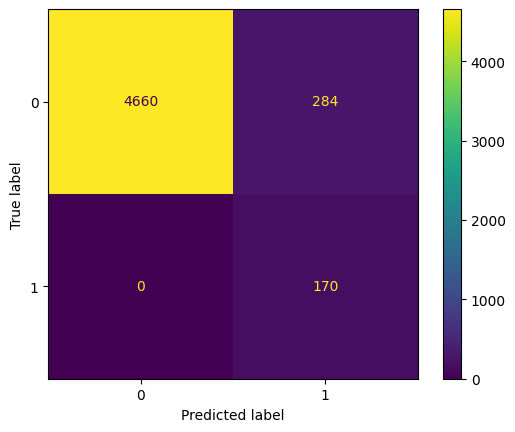

classification report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4944
           1       0.37      1.00      0.54       170

    accuracy                           0.94      5114
   macro avg       0.69      0.97      0.76      5114
weighted avg       0.98      0.94      0.96      5114


average precision score 0.46403368948719576


In [54]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.931603210611374
mean train precision: 0.3293100691329528
mean train recall: 0.999375
mean train f1: 0.49471084845455293
mean train average_precision: 0.4469151057053026


mean test accuracy: 0.9084928449119374
mean test precision: 0.21902624668038068
mean test recall: 0.6531862745098038
mean test f1: 0.322913194614439
mean test average_precision: 0.2000353976820805


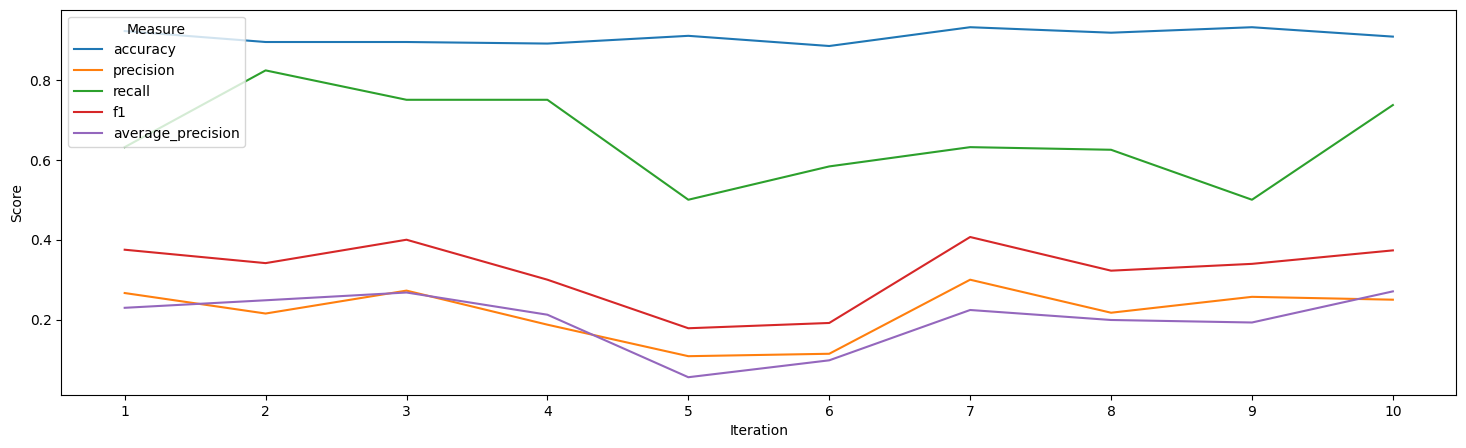

In [55]:
# validate the prediction
cross_val_results = cross_validation_show(decision_tree_full, X_train, y_train, kfold, scoring_measures_cross_val)

confusion matrix 1 
 [[460  33]
 [  7  12]]
confusion matrix 2 
 [[444  51]
 [  3  14]]
confusion matrix 3 
 [[440  48]
 [  6  18]]
confusion matrix 4 
 [[444  52]
 [  4  12]]
confusion matrix 5 
 [[460  41]
 [  5   5]]
confusion matrix 6 
 [[445  54]
 [  5   7]]
confusion matrix 7 
 [[464  28]
 [  7  12]]
confusion matrix 8 
 [[459  36]
 [  6  10]]
confusion matrix 9 
 [[467  26]
 [  9   9]]
confusion matrix 10 
 [[450  42]
 [  5  14]]
sum of confusion matrices


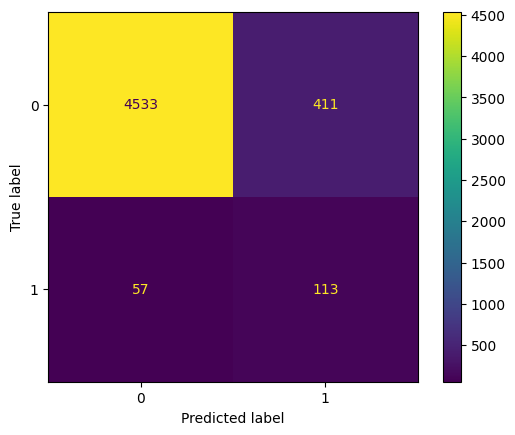

In [56]:
# get confusion matrices and sum of them for cross predicted models
cross_validation_confusion_matrix_show(decision_tree_full, X_train, y_train, kfold)

Does not seem to make too much of a difference. It seems that the natural feature engineering properties of the decision tree perform similar to our clustering. Anyway given the difference between the train and test evaluations in cross validation, using a higher depth will probably only lead to overfitting. So we will probably need to try something else than a simple decision tree to get better.

### 3.4 Further Models

let's try out some different models and see if they perform better

In [57]:
# random forest
random_forest = RandomForestClassifier(n_estimators=50, max_features=6, random_state=seed, class_weight = 'balanced')

In [58]:
# fit model
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=6, n_estimators=50,
                       random_state=799)

In [59]:
# predict targets
y_train_hat = random_forest.predict(X_train)
y_train_hat_probs = random_forest.predict_proba(X_train)[:,1]

confusion matrix


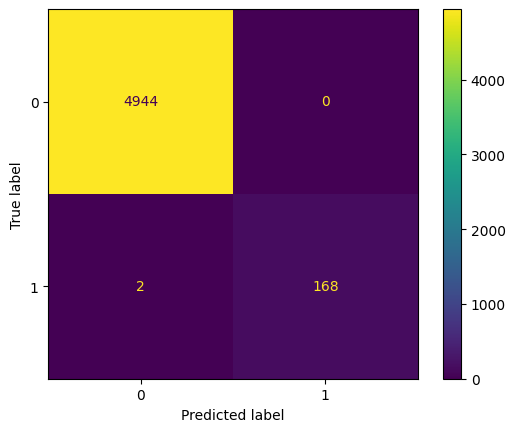

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4944
           1       1.00      0.99      0.99       170

    accuracy                           1.00      5114
   macro avg       1.00      0.99      1.00      5114
weighted avg       1.00      1.00      1.00      5114


average precision score 1.0000000000000002


In [60]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.9998044611798722
mean train precision: 1.0
mean train recall: 0.9941539125152055
mean train f1: 0.9970587505805412
mean train average_precision: 1.0


mean test accuracy: 0.9681292808219176
mean test precision: 0.6458333333333333
mean test recall: 0.11244668042655656
mean test f1: 0.18740162615162614
mean test average_precision: 0.43240110496522305


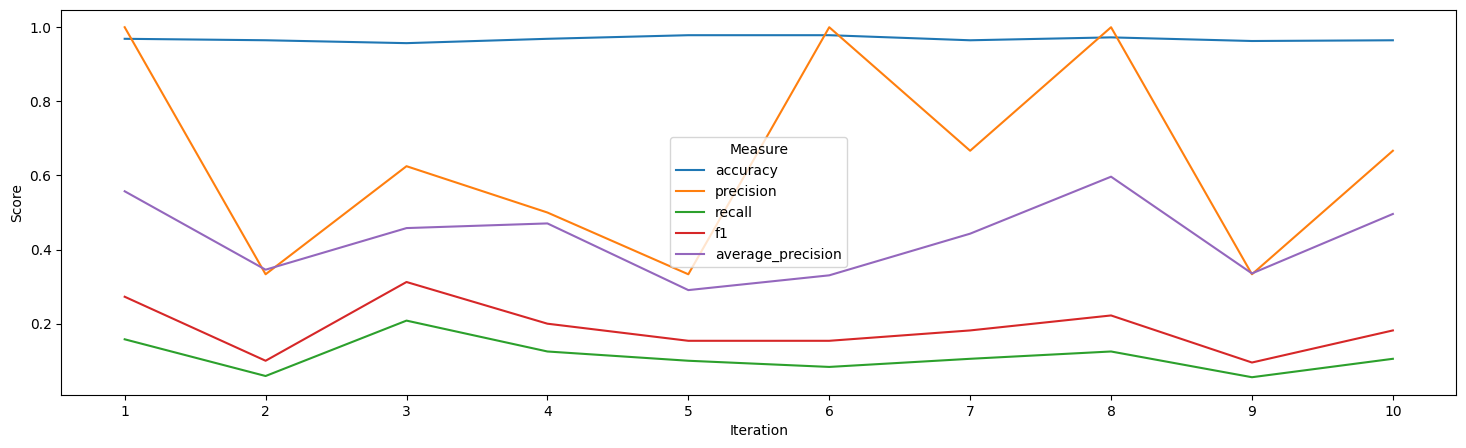

In [61]:
# validate the prediction
cross_val_results = cross_validation_show(random_forest, X_train, y_train, kfold, scoring_measures_cross_val)

the random forest is a more complex model then a single decision tree, but seems to overfit even for a small choice of the max depth for the trees in the ensemble, probably not a good choice

In [62]:
# scaled 'l1' regularized logistic regression (reduce C and increase max_iter to ensure convergence)
scaled_lr = Pipeline([('scaler', StandardScaler()),
                      ('lr', LogisticRegression(C = 0.001, penalty='l1', random_state=seed, solver = 'saga',  class_weight = 'balanced', max_iter = 200))])

In [63]:
# fit model
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=200, penalty='l1',
                                    random_state=799, solver='saga'))])

In [64]:
# show chosen features
scaled_lr_feature_series = pd.Series(scaled_lr['lr'].coef_[0,:], index = X_train.columns)
scaled_lr_feature_series = scaled_lr_feature_series[scaled_lr_feature_series.abs() > 0.0].sort_values()
scaled_lr_feature_series

Net Income to Total Assets   -0.346886
Net worth/Assets             -0.132070
Debt ratio %                  0.132070
dtype: float64

In [65]:
# predict targets
y_train_hat = scaled_lr.predict(X_train)
y_train_hat_probs = scaled_lr.predict_proba(X_train)[:,1]

confusion matrix


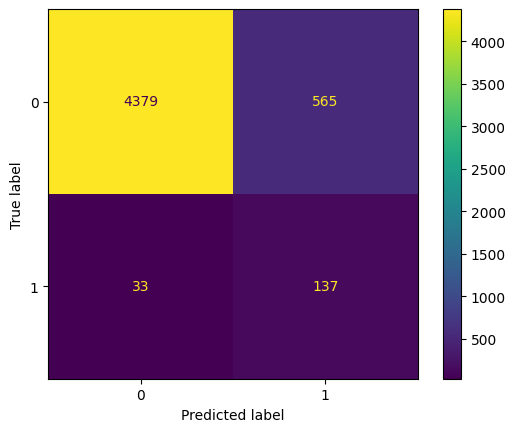

classification report
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      4944
           1       0.20      0.81      0.31       170

    accuracy                           0.88      5114
   macro avg       0.59      0.85      0.63      5114
weighted avg       0.97      0.88      0.92      5114


average precision score 0.3588257403757783


In [66]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8919523130947514
mean train precision: 0.20396543127679898
mean train recall: 0.7753146009634094
mean train f1: 0.32291501598691374
mean train average_precision: 0.35476682511808855


mean test accuracy: 0.8912827941536202
mean test precision: 0.2035772139181657
mean test recall: 0.7811394908840729
mean test f1: 0.32062923424561285
mean test average_precision: 0.3979589891840256


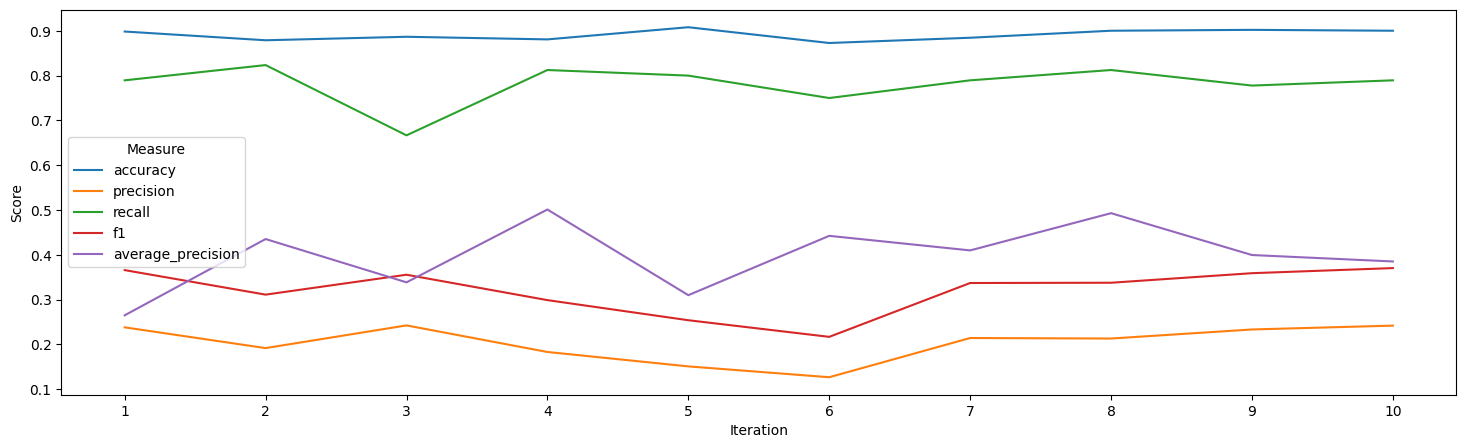

In [67]:
# validate the prediction
cross_val_results = cross_validation_show(scaled_lr, X_train, y_train, kfold, scoring_measures_cross_val)

confusion matrix 1 
 [[445  48]
 [  4  15]]
confusion matrix 2 
 [[436  59]
 [  3  14]]
confusion matrix 3 
 [[438  50]
 [  8  16]]
confusion matrix 4 
 [[438  58]
 [  3  13]]
confusion matrix 5 
 [[456  45]
 [  2   8]]
confusion matrix 6 
 [[437  62]
 [  3   9]]
confusion matrix 7 
 [[437  55]
 [  4  15]]
confusion matrix 8 
 [[447  48]
 [  3  13]]
confusion matrix 9 
 [[447  46]
 [  4  14]]
confusion matrix 10 
 [[445  47]
 [  4  15]]
sum of confusion matrices


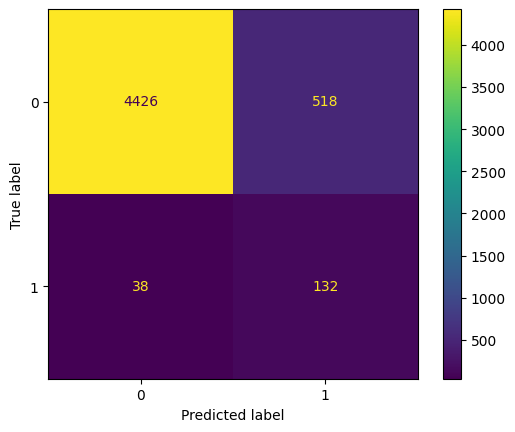

In [68]:
# get confusion matrices and sum of them for cross predicted models
cross_validation_confusion_matrix_show(scaled_lr, X_train, y_train, kfold)

This looks quite ok. Recall is ok and the precision is also fine. F1 score and average precision are also quite good. Also there seems to be no overfitting. Accuracy decreased somewhat compared to the tree models however, so still questionable at this point if it really is an improvement.

In [69]:
# scaled k nearest neighbors (with k = 5)
scaled_knn = Pipeline([('scaler', StandardScaler()),
                       ('knn', KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'distance'))])

In [70]:
# fit model
scaled_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', weights='distance'))])

In [71]:
# predict targets
y_train_hat = scaled_knn.predict(X_train)
y_train_hat_probs = scaled_knn.predict_proba(X_train)[:,1]

confusion matrix


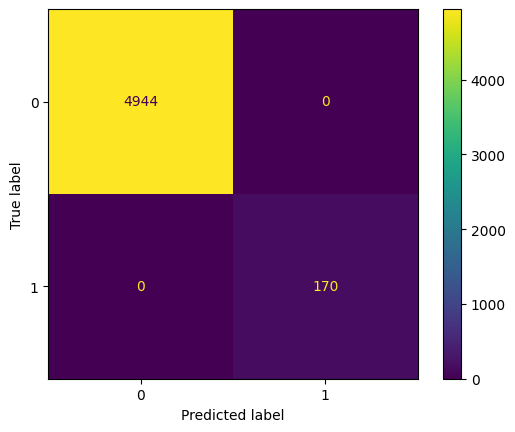

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4944
           1       1.00      1.00      1.00       170

    accuracy                           1.00      5114
   macro avg       1.00      1.00      1.00      5114
weighted avg       1.00      1.00      1.00      5114


average precision score 1.0


In [72]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 1.0
mean train precision: 1.0
mean train recall: 1.0
mean train f1: 1.0
mean train average_precision: 1.0


mean test accuracy: 0.9687175116193737
mean test precision: 0.6475
mean test recall: 0.1824204506363949
mean test f1: 0.27283130509728976
mean test average_precision: 0.31122644150021855


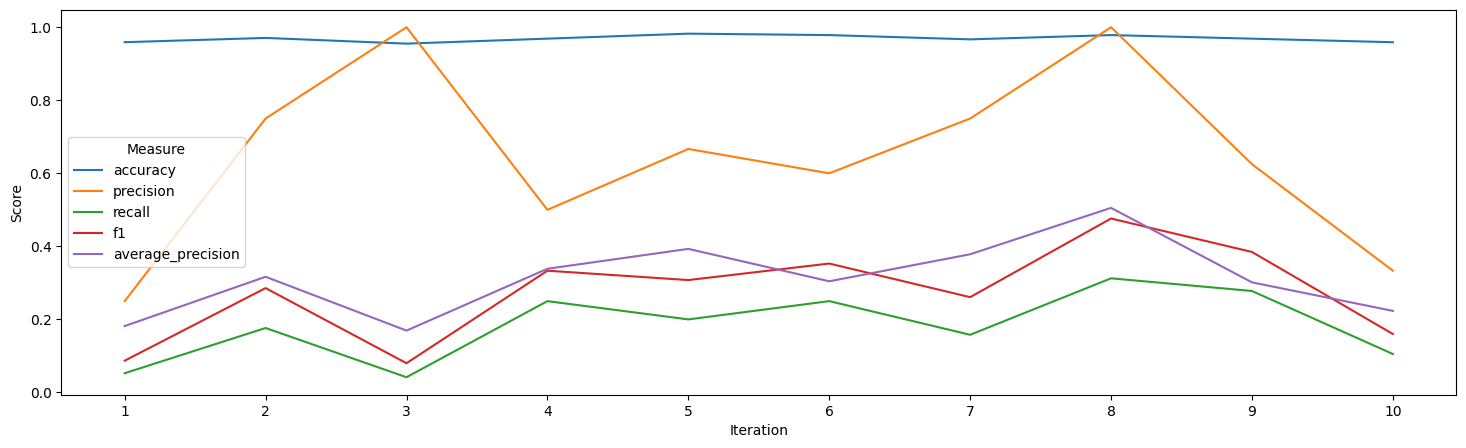

In [73]:
# validate the prediction
cross_val_results = cross_validation_show(scaled_knn, X_train, y_train, kfold, scoring_measures_cross_val)

This seems to overfit even for small values of k. Probably also not a good choice.

#### Conclusion
Of the models considered up to this point only low depth decision trees and logistic regression look promising. Random forests and (weighted) K-nearest neighbors seem to easily produce overfitting.

### 3.5 More sophisticated feature engineering techniques

Let's try now some models involving more sophisticated feature engineering techniques. First let's try to make logistic regression more precise, by first reducing the feature space via pca projection and then introducing polynomial features of the chosen factors to include potential cross effects. Before that let's get rid of the columns not in unit range because the huge outliers could be a problem for pca, and they seem to be unimportant anyway. Furthermore also before pca we only keep a few of the features, indicated as most related to the target via an f-test, to not include unimportant variance in the pca. We scale our features before pca and before the logistic regression to ensure stability.

In [74]:
# remove other range cols
unit_range_cols = unit_range_float_cols.append(pd.Index([' Liability-Assets Flag']))
X_train_unit = X_train[unit_range_cols]
X_test_unit = X_test[unit_range_cols]

In [75]:
# check fclassif values
f_statistic, p_values = f_classif(X_train_unit, y_train)
p_val_series = pd.Series(p_values, index = unit_range_cols).sort_values()
p_val_series

Net Income to Total Assets                                 4.220107e-137
ROA(A) before interest and % after tax                     5.888093e-104
ROA(B) before interest and depreciation after tax           6.951406e-97
ROA(C) before interest and depreciation before interest     2.168245e-89
Retained Earnings to Total Assets                           6.455321e-82
Net worth/Assets                                            8.903289e-75
Debt ratio %                                                8.903289e-75
Persistent EPS in the Last Four Seasons                     5.716483e-58
Net profit before tax/Paid-in capital                       1.446958e-52
Per Share Net profit before tax (Yuan ¥)                    1.009839e-48
Current Liability to Assets                                 1.215744e-44
Working Capital to Total Assets                             4.935965e-44
Net Income to Stockholder's Equity                          3.786704e-37
Total expense/Assets                               

In [76]:
# number of features to chose
n_kbest = p_val_series[p_val_series < 1e-10].size
n_kbest

34

In [77]:
# construct model pipeline
projected_poly_lr = Pipeline([('Fselector', SelectKBest(score_func = f_classif, k = n_kbest)),
                              ('scaler', StandardScaler()),
                              ('pca', PCA(n_components = 15, random_state = seed)),
                              ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                              ('scaler2', StandardScaler()),
                              ('lr', LogisticRegression(C = 0.001, penalty='l1', random_state=seed, solver = 'saga',  class_weight = 'balanced', max_iter = 400))])

In [78]:
# fit model
projected_poly_lr.fit(X_train_unit, y_train)

Pipeline(steps=[('Fselector', SelectKBest(k=34)), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=15, random_state=799)),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler2', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=400, penalty='l1',
                                    random_state=799, solver='saga'))])

In [79]:
# check explained variance
projected_poly_lr['pca'].explained_variance_ratio_.sum()

0.965835105927906

In [80]:
# predict targets
y_train_hat = projected_poly_lr.predict(X_train_unit)
y_train_hat_probs = projected_poly_lr.predict_proba(X_train_unit)[:,1]

confusion matrix


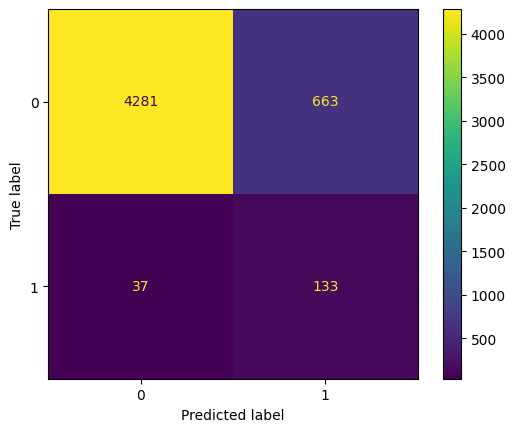

classification report
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      4944
           1       0.17      0.78      0.28       170

    accuracy                           0.86      5114
   macro avg       0.58      0.82      0.60      5114
weighted avg       0.96      0.86      0.90      5114


average precision score 0.31657765437567426


In [81]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.865597932606921
mean train precision: 0.16758539077200765
mean train recall: 0.7666530241715227
mean train f1: 0.27500194539900924
mean train average_precision: 0.32022402733337757


mean test accuracy: 0.8662533635029355
mean test precision: 0.16726523008286928
mean test recall: 0.7580525455796353
mean test f1: 0.27228459232474467
mean test average_precision: 0.3549424872102428


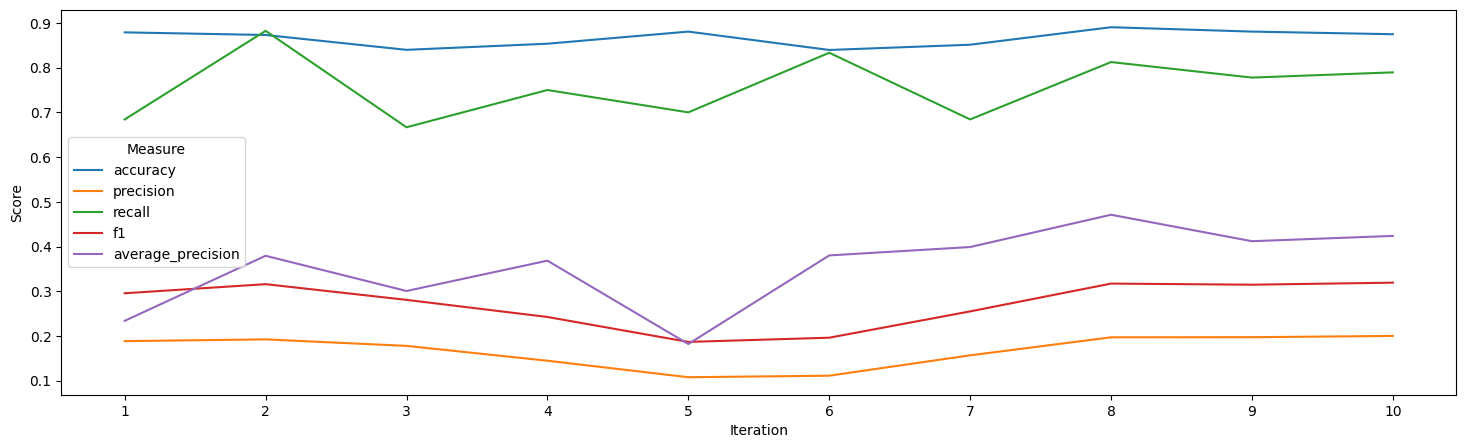

In [82]:
# validate the prediction
cross_val_results = cross_validation_show(projected_poly_lr, X_train_unit, y_train, kfold, scoring_measures_cross_val)

We could not achieve a better accuracy or a better average precision than with our original logistic regression model, indicating that this more complicated feature engineering is actually unnecessary and does not help at all.

Maybe the pca projection makes problems. Let's try if including polynomial features, based on the features chosen in our original logistic regression helps.

In [83]:
# keep only cols from scaled_lr
scaled_lr_cols = scaled_lr_feature_series.index
X_train_scaled_lr = X_train[scaled_lr_cols]
X_test_scaled_lr = X_test[scaled_lr_cols]

In [84]:
# construct model pipeline
selected_poly_lr = Pipeline([('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                             ('scaler', StandardScaler()),
                             ('lr', LogisticRegression(C = 0.001, penalty='l1', random_state=seed, solver = 'saga',  class_weight = 'balanced', max_iter = 300))])

In [85]:
# fit model
selected_poly_lr.fit(X_train_scaled_lr, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=300, penalty='l1',
                                    random_state=799, solver='saga'))])

In [86]:
# predict targets
y_train_hat = selected_poly_lr.predict(X_train_scaled_lr)
y_train_hat_probs = selected_poly_lr.predict_proba(X_train_scaled_lr)[:,1]

confusion matrix


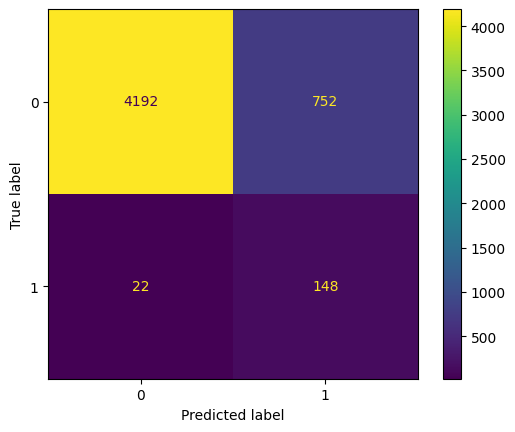

classification report
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      4944
           1       0.16      0.87      0.28       170

    accuracy                           0.85      5114
   macro avg       0.58      0.86      0.60      5114
weighted avg       0.97      0.85      0.89      5114


average precision score 0.35782487160245585


In [87]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8512582444625659
mean train precision: 0.166558357490339
mean train recall: 0.8674124705946152
mean train f1: 0.27943591669116163
mean train average_precision: 0.35875895768183247


mean test accuracy: 0.8506061949608611
mean test precision: 0.1659982899932908
mean test recall: 0.871205280357757
mean test f1: 0.276589847850781
mean test average_precision: 0.4021818563434071


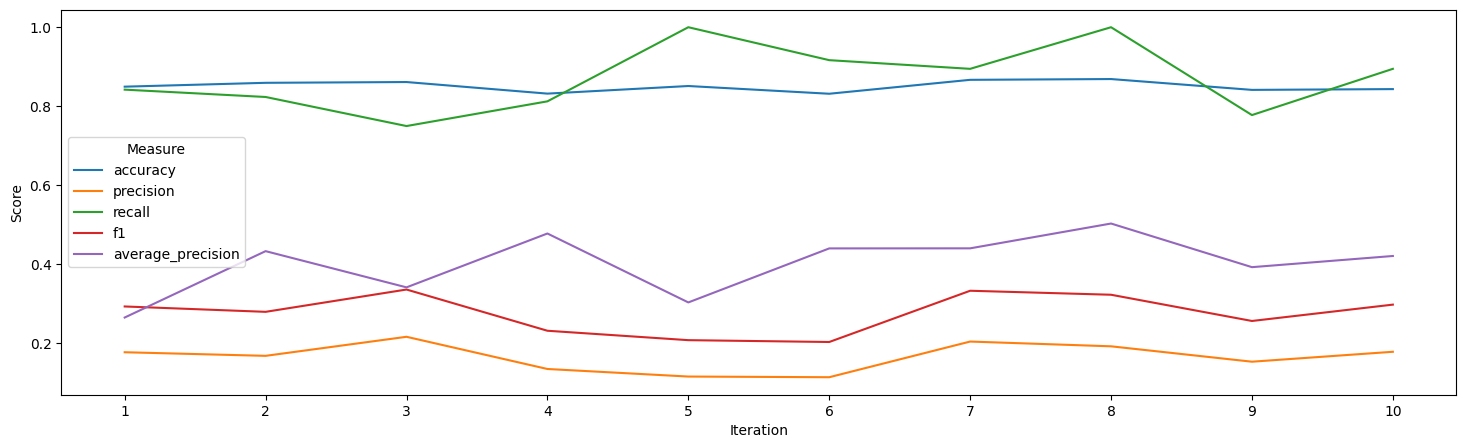

In [88]:
# validate the prediction
cross_val_results = cross_validation_show(selected_poly_lr, X_train_scaled_lr, y_train, kfold, scoring_measures_cross_val)

Average precision got a little better but accuracy and f1 score got worse. Still does not seem to be worth including more sophisticated feature engineering here.

Looks like polynomials are not really helping either. Let's try a final model using a decision tree, with the pca applied as in our first model in this section.

In [89]:
# construct model pipeline
projected_dt = Pipeline([('Fselector', SelectKBest(score_func = f_classif, k = n_kbest)),
                         ('scaler', StandardScaler()),
                         ('pca', PCA(n_components = 15, random_state = seed)),
                         ('dt', DecisionTreeClassifier(random_state=seed, class_weight = 'balanced', max_depth = 6))])

In [90]:
# fit model
projected_dt.fit(X_train_unit, y_train)

Pipeline(steps=[('Fselector', SelectKBest(k=34)), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=15, random_state=799)),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                        random_state=799))])

In [91]:
# check explained variance
projected_dt['pca'].explained_variance_ratio_.sum()

0.965835105927906

In [92]:
# predict targets
y_train_hat = projected_dt.predict(X_train_unit)
y_train_hat_probs = projected_dt.predict_proba(X_train_unit)[:,1]

confusion matrix


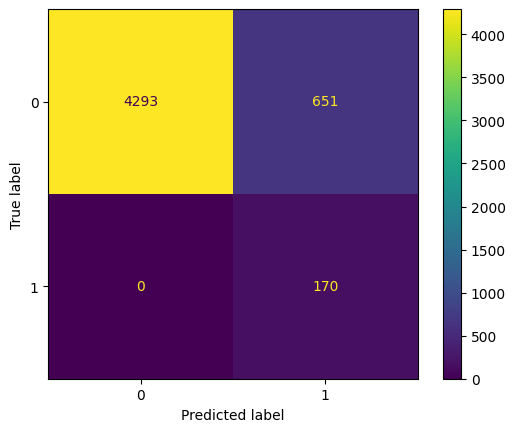

classification report
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      4944
           1       0.21      1.00      0.34       170

    accuracy                           0.87      5114
   macro avg       0.60      0.93      0.64      5114
weighted avg       0.97      0.87      0.91      5114


average precision score 0.42586492553021427


In [93]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8773523691585604
mean train precision: 0.21393000908547974
mean train recall: 0.9934804357008182
mean train f1: 0.35167695182738423
mean train average_precision: 0.3849866689329613


mean test accuracy: 0.8599880748532289
mean test precision: 0.15008750158914233
mean test recall: 0.6953418472652219
mean test f1: 0.2455338886880479
mean test average_precision: 0.18724546508462808


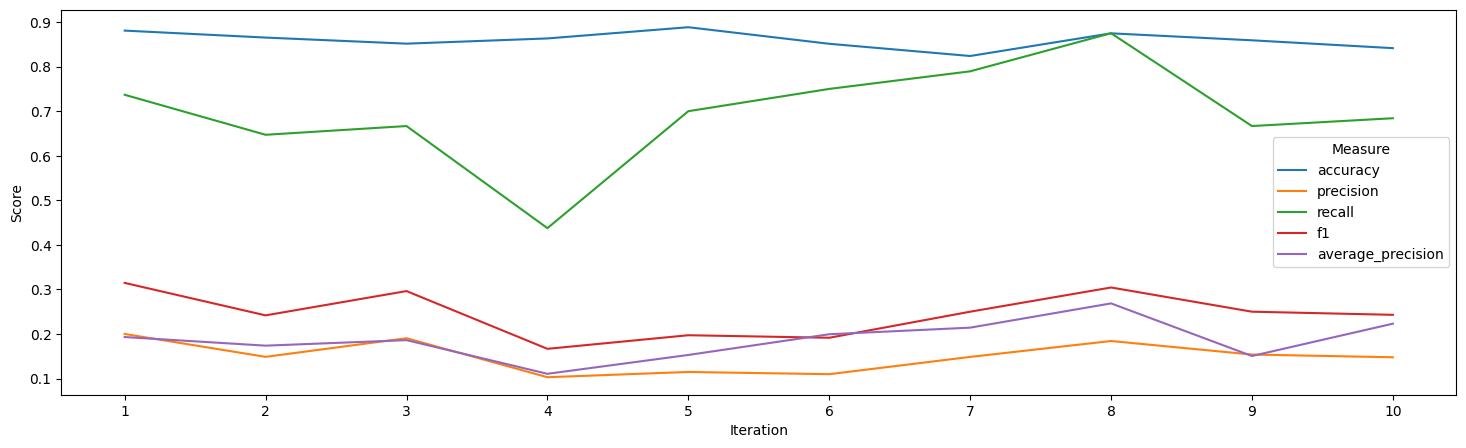

In [94]:
# validate the prediction
cross_val_results = cross_validation_show(projected_dt, X_train_unit, y_train, kfold, scoring_measures_cross_val)

Average precision, f1 score and accuracy got worse then in our decision tree on the full feature space without prior feature engineering. PCA alone also does not seem to be helpful.

#### Conclusion
None of the models using more sophisticated feature engineering techniques show any improvement, compared to our simpler models. Since these models are also quite complicated to explain, we ignore more complicated pipeline approaches from this point on and proceed with our simpler models.

### 3.6 Hyperparameter tuning

Let us now try some hyperparameter tuning for the models, which have been looking promising up to now: simple decision trees and regularized logistic regression. We optimize for the average precision via grid search, to achieve a good precision recall tradeoff and later try to find a good threshold on the precision recall curve to achieve a high recall.

We start with the decision trees.

In [95]:
# get class_weight parameters for setting 'balanced' in percent
balanced_weights = X_train.shape[0] / (2 * np.bincount(y_train))
balanced_weights_sum = balanced_weights.sum()
balanced_weights_perc = balanced_weights / balanced_weights_sum
balanced_weights_perc

array([0.03324208, 0.96675792])

In [96]:
# set new class_weight pairs for grid search
weights_1_array = np.array([0.02,0.98]) * balanced_weights_sum
weights_1 = {0:weights_1_array[0],1:weights_1_array[1]}
weights_2_array = np.array([0.01,0.99]) * balanced_weights_sum
weights_2 = {0:weights_2_array[0],1:weights_2_array[1]}

In [97]:
# decision tree param grid and tuner
dt_tune_init = clone(decision_tree_full)

dt_param_grid = {'max_depth':list(range(1,7)),
                 'splitter':['best', 'random'],
                 'min_samples_split':[2, 5, 10, 20],
                 'class_weight':['balanced', weights_1, weights_2]}

dt_tuning = GridSearchCV(dt_tune_init, dt_param_grid, cv = kfold, scoring = 'average_precision', return_train_score = False)

In [98]:
# decision tree tuning
dt_tuning.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=799, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=6, random_state=799),
             param_grid={'class_weight': ['balanced',
                                          {0: 0.3111673805444508,
                                           1: 15.24720164667809},
                                          {0: 0.1555836902722254,
                                           1: 15.402785336950314}],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='average_precision')

In [99]:
# get best estimator and print best parameters
dt_best = dt_tuning.best_estimator_
print(dt_tuning.best_params_)

{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_split': 20, 'splitter': 'random'}


In [100]:
# predict targets
y_train_hat = dt_best.predict(X_train)
y_train_hat_probs = dt_best.predict_proba(X_train)[:,1]

confusion matrix


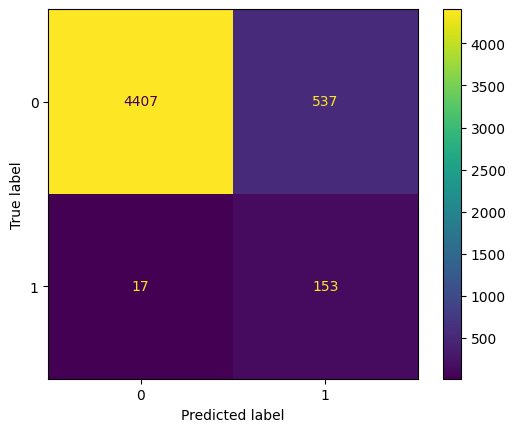

classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94      4944
           1       0.22      0.90      0.36       170

    accuracy                           0.89      5114
   macro avg       0.61      0.90      0.65      5114
weighted avg       0.97      0.89      0.92      5114


average precision score 0.3382692386484999


In [101]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8701589661070767
mean train precision: 0.2034077981267069
mean train recall: 0.9294683066322801
mean train f1: 0.3310928334635156
mean train average_precision: 0.3328719856484884


mean test accuracy: 0.8650841640166341
mean test precision: 0.18189900863198155
mean test recall: 0.7979076367389061
mean test f1: 0.2904349334084788
mean test average_precision: 0.26410958438397086


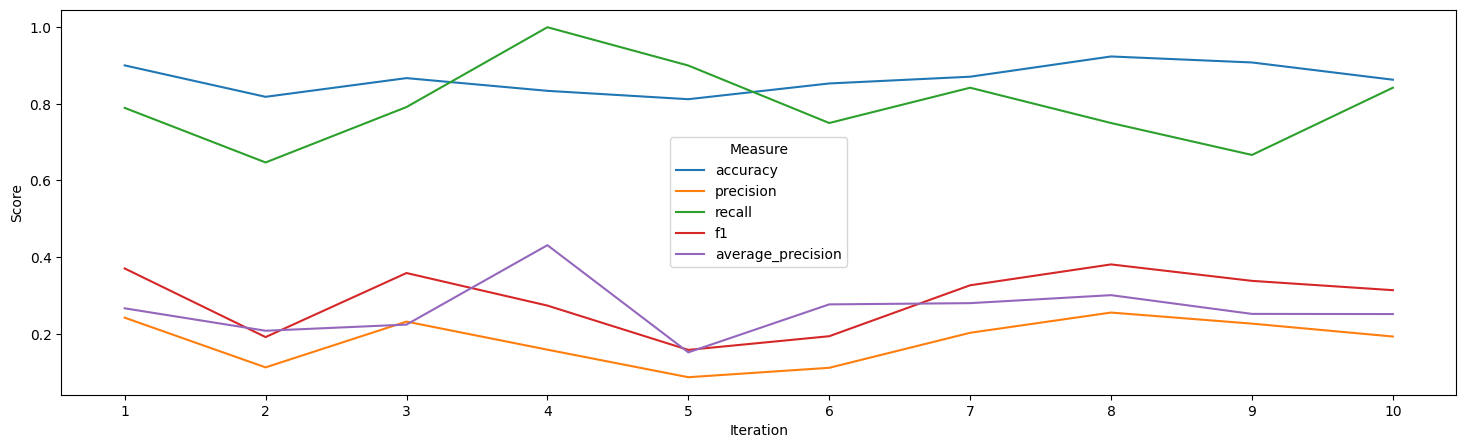

In [102]:
# validate the prediction
cross_val_results = cross_validation_show(dt_best, X_train, y_train, kfold, scoring_measures_cross_val)

The best found decision tree does not look particularly overfitted and average precision got better compared to our original tree. However accuracy reduced and compared to the logistic regression models average precision still looks rather bad. Probably also not something to proceed with.

Let us continue with the logistic regression.

In [103]:
# scaled logistic regression param grid and tuner
scaled_lr_tune_init = clone(scaled_lr)
penalty_param = {'lr__penalty':'elasticnet'}
scaled_lr_tune_init.set_params(**penalty_param)

scaled_lr_param_grid = {'lr__C':[0.001, 0.0025, 0.005, 0.0075, 0.0085, 0.009],
                        'lr__class_weight':['balanced', weights_1, weights_2],
                        'lr__l1_ratio':[0.5, 1]}

scaled_lr_tuning = GridSearchCV(scaled_lr_tune_init, scaled_lr_param_grid, cv = kfold, scoring = 'average_precision', return_train_score = False)

In [104]:
# logistic regression tuning
warnings.simplefilter('ignore')
scaled_lr_tuning.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=799, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(C=0.001,
                                                           class_weight='balanced',
                                                           max_iter=200,
                                                           penalty='elasticnet',
                                                           random_state=799,
                                                           solver='saga'))]),
             param_grid={'lr__C': [0.001, 0.0025, 0.005, 0.0075, 0.0085, 0.009],
                         'lr__class_weight': ['balanced',
                                              {0: 0.3111673805444508,
                                               1: 15.24720164667809},
                                              {0: 0.1555836902722254,
                                               1: 15.402785336950314}],
                         'lr__l1_ratio': [0.5, 1]},
             scoring='average_precision')

In [105]:
warnings.resetwarnings()

In [106]:
# get best estimator and print best parameters
scaled_lr_best = scaled_lr_tuning.best_estimator_
print(scaled_lr_tuning.best_params_)

{'lr__C': 0.009, 'lr__class_weight': 'balanced', 'lr__l1_ratio': 0.5}


In [107]:
# refit best estimator, try to force convergence by increasing max iterations (not done during grid search to save computing time)
max_iter_param = {'lr__max_iter':500}
scaled_lr_best.set_params(**max_iter_param)
scaled_lr_best.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.009, class_weight='balanced',
                                    l1_ratio=0.5, max_iter=500,
                                    penalty='elasticnet', random_state=799,
                                    solver='saga'))])

In [108]:
# show chosen features
scaled_lr_best_feature_series = pd.Series(scaled_lr_best['lr'].coef_[0,:], index = X_train.columns)
scaled_lr_best_feature_series = scaled_lr_best_feature_series[scaled_lr_best_feature_series.abs() > 0.0].sort_values()
scaled_lr_best_feature_series

Net worth/Assets                                          -0.576940
Persistent EPS in the Last Four Seasons                   -0.436191
Net Income to Total Assets                                -0.316621
Cash/Total Assets                                         -0.293985
ROA(C) before interest and depreciation before interest   -0.232594
ROA(B) before interest and depreciation after tax         -0.216298
Total Asset Turnover                                      -0.181348
Net profit before tax/Paid-in capital                     -0.180716
Cash Flow to Liability                                    -0.169289
Net Worth Turnover Rate (times)                           -0.151692
Retained Earnings to Total Assets                         -0.134511
Cash Turnover Rate                                        -0.133857
Inventory/Current Liability                               -0.041270
Per Share Net profit before tax (Yuan ¥)                  -0.030724
Accounts Receivable Turnover                    

In [109]:
# predict targets
y_train_hat = scaled_lr_best.predict(X_train)
y_train_hat_probs = scaled_lr_best.predict_proba(X_train)[:,1]

In [110]:
#(y_train_hat_probs > 0.5).astype('int64')
y_train_hat

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

confusion matrix


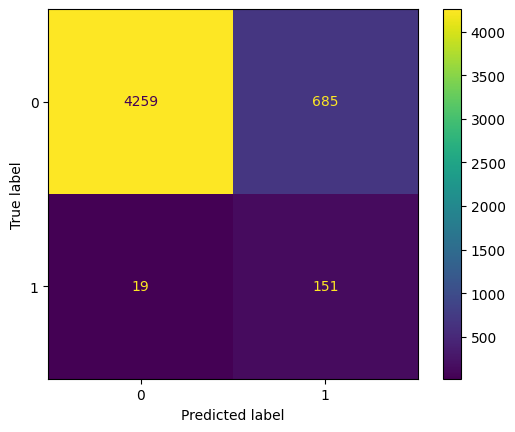

classification report
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      4944
           1       0.18      0.89      0.30       170

    accuracy                           0.86      5114
   macro avg       0.59      0.87      0.61      5114
weighted avg       0.97      0.86      0.90      5114


average precision score 0.4176084787110574


In [111]:
# check fit on train set
show_metrics(y_train, y_train_hat, y_train_hat_probs)

mean train accuracy: 0.8630990662987112
mean train precision: 0.18313602539574228
mean train recall: 0.9007084249787717
mean train f1: 0.30436042362962085
mean train average_precision: 0.41766294187964326


mean test accuracy: 0.8576439426369863
mean test precision: 0.1724006934979115
mean test recall: 0.8718734950120398
mean test f1: 0.2862706592249781
mean test average_precision: 0.43442134456904347


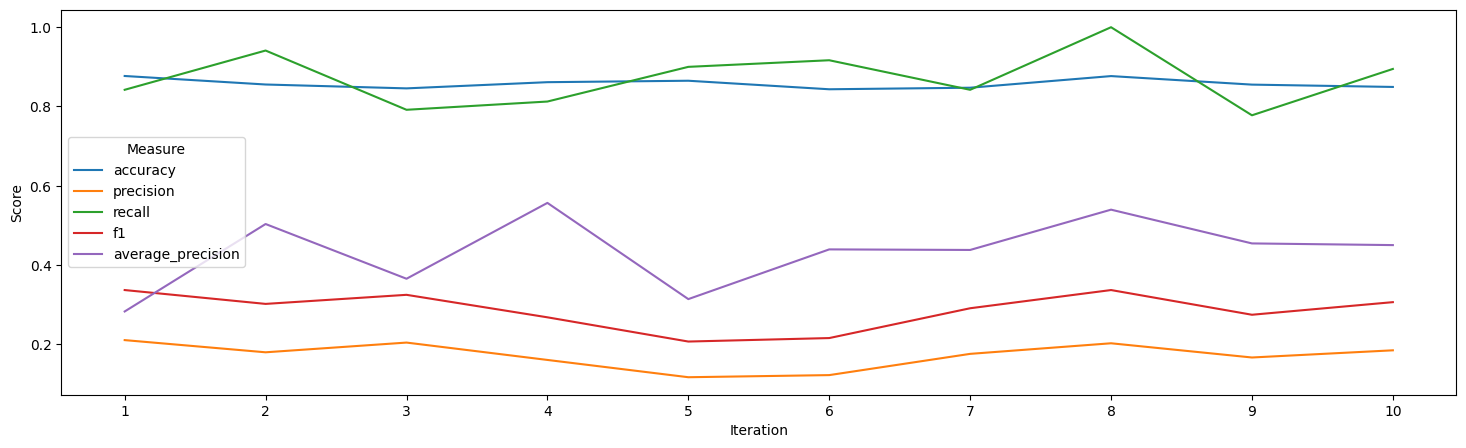

In [112]:
# validate the prediction
warnings.simplefilter('ignore')
cross_val_results = cross_validation_show(scaled_lr_best, X_train, y_train, kfold, scoring_measures_cross_val)

confusion matrix 1 
 [[433  60]
 [  3  16]]
confusion matrix 2 
 [[422  73]
 [  1  16]]
confusion matrix 3 
 [[414  74]
 [  5  19]]
confusion matrix 4 
 [[428  68]
 [  3  13]]
confusion matrix 5 
 [[433  68]
 [  1   9]]
confusion matrix 6 
 [[420  79]
 [  1  11]]
confusion matrix 7 
 [[417  75]
 [  3  16]]
confusion matrix 8 
 [[432  63]
 [  0  16]]
confusion matrix 9 
 [[423  70]
 [  4  14]]
confusion matrix 10 
 [[417  75]
 [  2  17]]
sum of confusion matrices


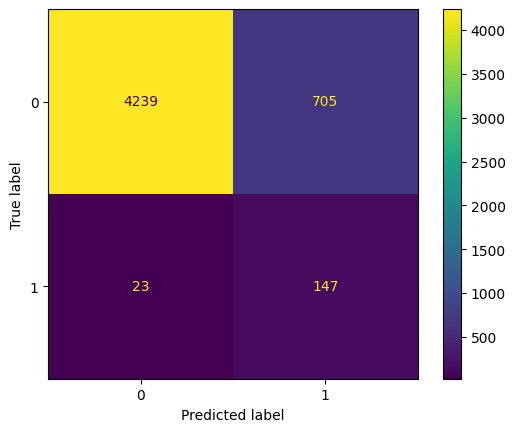

In [113]:
# get confusion matrices and sum of them for cross predicted models
cross_validation_confusion_matrix_show(scaled_lr_best, X_train, y_train, kfold)

This seems to be the most promising model so far. Average precision is the best of all the models we have studied so far and we do not see much overfitting. However the f1 score and accuracy reduced somewhat in comparison to the original logistic regression and we are using a lot more features now. Let's have look at the precision recall curves for both the original and the optimized logistic regression models and try to find thresholds where both have comparable good recall values as observed in our baseline model. By this we should be able to decide if we achieved a significant improvement.

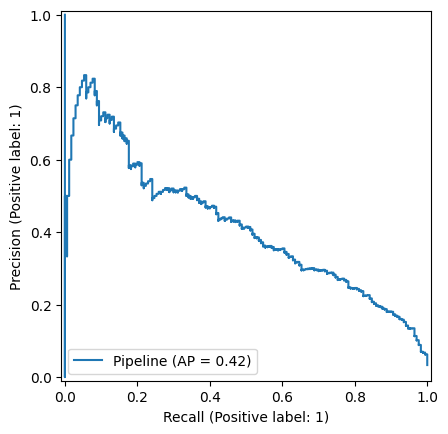

In [114]:
# show precision recall curve for best found logistic regression
metrics.PrecisionRecallDisplay.from_estimator(scaled_lr_best, X_train, y_train)

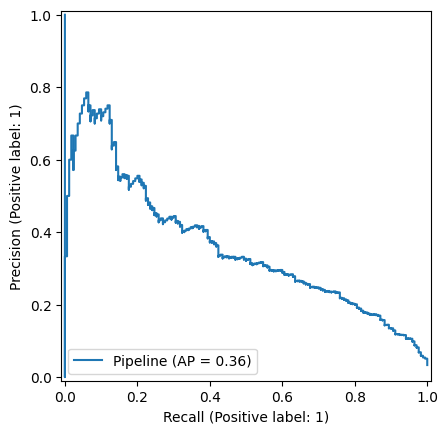

In [115]:
# show precision recall curve for original logisitic regression
metrics.PrecisionRecallDisplay.from_estimator(scaled_lr, X_train, y_train)

looks like our optimized modell indeed achieves better precision values at thresholds with a high recall, let's try to find fitting thresholds for both models to check if it is indeed the case

confusion matrix 1 
 [[409  84]
 [  2  17]]
confusion matrix 2 
 [[393 102]
 [  1  16]]
confusion matrix 3 
 [[389  99]
 [  3  21]]
confusion matrix 4 
 [[398  98]
 [  2  14]]
confusion matrix 5 
 [[397 104]
 [  0  10]]
confusion matrix 6 
 [[398 101]
 [  1  11]]
confusion matrix 7 
 [[394  98]
 [  2  17]]
confusion matrix 8 
 [[413  82]
 [  0  16]]
confusion matrix 9 
 [[396  97]
 [  1  17]]
confusion matrix 10 
 [[389 103]
 [  1  18]]
sum of confusion matrices


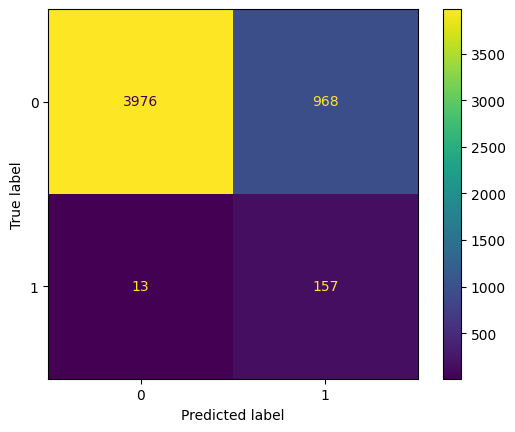

In [116]:
# get confusion matrices and sum of them for cross predicted models with different thresholds for class separation for best found logistic regression
thresh_scaled_lr_best = 0.4
cross_validation_confusion_matrix_show(scaled_lr_best, X_train, y_train, kfold, threshold = thresh_scaled_lr_best)

confusion matrix 1 
 [[393 100]
 [  2  17]]
confusion matrix 2 
 [[385 110]
 [  1  16]]
confusion matrix 3 
 [[362 126]
 [  3  21]]
confusion matrix 4 
 [[374 122]
 [  2  14]]
confusion matrix 5 
 [[394 107]
 [  0  10]]
confusion matrix 6 
 [[372 127]
 [  1  11]]
confusion matrix 7 
 [[397  95]
 [  2  17]]
confusion matrix 8 
 [[393 102]
 [  0  16]]
confusion matrix 9 
 [[382 111]
 [  2  16]]
confusion matrix 10 
 [[383 109]
 [  1  18]]
sum of confusion matrices


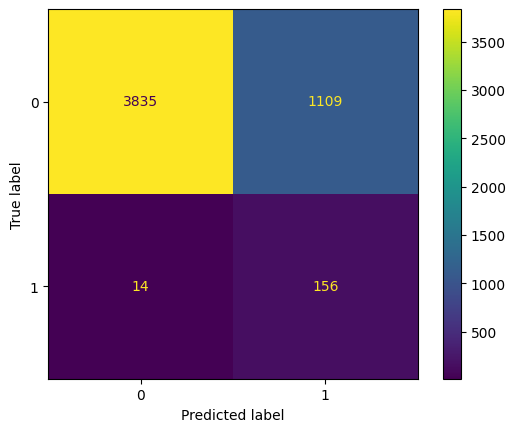

In [117]:
# get confusion matrices and sum of them for cross predicted models with different thresholds for class separation for original logistic regression
thresh_scaled_lr = 0.46
cross_validation_confusion_matrix_show(scaled_lr, X_train, y_train, kfold, threshold = thresh_scaled_lr)

In [118]:
warnings.resetwarnings()

The confusion matrices for the chosen thresholds show that our optimized model indeed seems to be better by a non-negligible degree, compared to our original modell if we want to achieve a high recall.

#### Conclusion
For the decision tree model hyperparameter search also did not lead to desirable results. For the logistic regression model on the other we could achieve a non-negligible improvement, to our previous models. As a tradeoff our modeling got more complex however (we need more features). Nevertheless we will now proceed with the optimized logistic regression as our final modell, and move on to the final evaluation on the test set.

## 4. Final Model Evaluation

After chosing our final model (logistic regression with optimized hyperparameters), we will now evaluate this model on the test set, to get a final estimate of how good the model is. Furthermore for comparison (but not for model selection, that should be done beforehand based on cross validation) we will also show the evaluation on the test set for our baseline modell and the original logistic regression model.

In [119]:
# predict targets on test set for baseline model
y_test_hat = decision_tree_base_balanced.predict(X_test_base)
y_test_hat_probs = decision_tree_base_balanced.predict_proba(X_test_base)[:,1]

confusion matrix


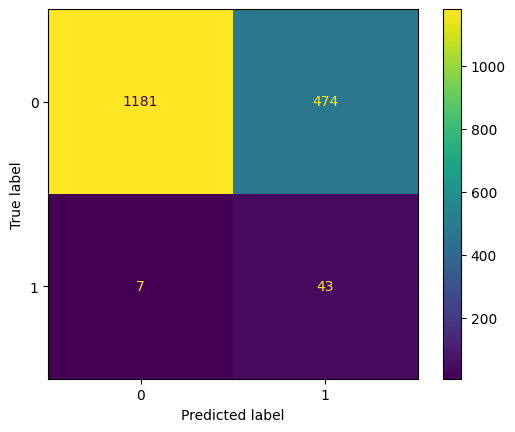

classification report
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      1655
           1       0.08      0.86      0.15        50

    accuracy                           0.72      1705
   macro avg       0.54      0.79      0.49      1705
weighted avg       0.97      0.72      0.81      1705


average precision score 0.07563361826917077


In [120]:
# check fit on test set for baseline model
show_metrics(y_test, y_test_hat, y_test_hat_probs)

In [121]:
# predict targets on test set for original logistic regression model
y_test_hat_probs = scaled_lr.predict_proba(X_test)[:,1]
y_test_hat = (y_test_hat_probs > thresh_scaled_lr).astype('int64')

confusion matrix


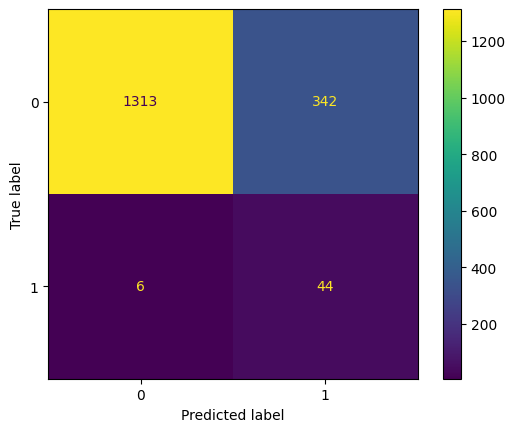

classification report
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      1655
           1       0.11      0.88      0.20        50

    accuracy                           0.80      1705
   macro avg       0.55      0.84      0.54      1705
weighted avg       0.97      0.80      0.86      1705


average precision score 0.29629248157898647


In [122]:
# check fit on test set for original logistic regression model
show_metrics(y_test, y_test_hat, y_test_hat_probs)

In [123]:
# predict targets on test set for best found logistic regression model
y_test_hat_probs = scaled_lr_best.predict_proba(X_test)[:,1]
y_test_hat = (y_test_hat_probs > thresh_scaled_lr_best).astype('int64')

confusion matrix


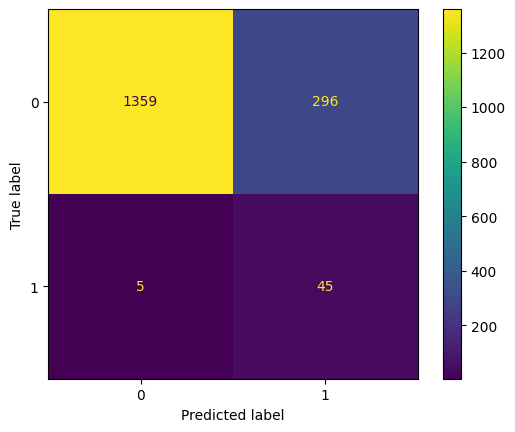

classification report
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      1655
           1       0.13      0.90      0.23        50

    accuracy                           0.82      1705
   macro avg       0.56      0.86      0.57      1705
weighted avg       0.97      0.82      0.88      1705


average precision score 0.3348883555166603


In [124]:
# check fit on test set for original logistic regression model
show_metrics(y_test, y_test_hat, y_test_hat_probs)

#### Conclusion
We could select a modell achieving 90% recall with an accuracy of 82%. Considering that we wanted to mainly reduce the amount of false negatives this seems to be a rather satisfiable result. The precision of only 13% is still not ideal, but could not be improved further with the considered tools. Comparison of the finally chosen model with other promising models shows that it indeed also performs best on the test set.